jupyter notebook --NotebookApp.iopub_data_rate_limit=10000000

In [62]:
import networkx as nx
import numpy as np
import pandas as pd
import time
import matplotlib.pyplot as plt
import random
import copy
import heapq
import math

In [5]:
df = pd.read_csv('C:/Projects IT/Python/Projet Metaheuristic/project.csv', sep =';')
nameTable = pd.read_csv('C:/Projects IT/Python/Projet Metaheuristic/indexStation.csv', sep =';')

df.head(3)

Station  Connection  Time
0        0         238  41.0
1        0         159  46.0
2        1          12  36.0

In [6]:
nameTable.head(3)

indexStation      nameStation
0             0         Abbesses
1             1  Alexandre Dumas
2             2     Alma Marceau

In [7]:
MG = nx.MultiGraph()

In [8]:
for i in range(0, len(df.Station)):
    MG.add_edge(df.Station[i], df.Connection[i], weight=df.Time[i])

In [9]:
MG

In [10]:
print(MG.adj)

{0: {238: {0: {'weight': 41.0}, 1: {'weight': 41.0}}, 159: {0: {'weight': 46.0}, 1: {'weight': 46.0}}}, 238: {0: {0: {'weight': 41.0}, 1: {'weight': 41.0}}, 322: {0: {'weight': 27.0}, 1: {'weight': 27.0}}, 239: {0: {'weight': 120.0}, 1: {'weight': 120.0}}}, 159: {0: {0: {'weight': 46.0}, 1: {'weight': 46.0}}, 147: {0: {'weight': 44.0}, 1: {'weight': 44.0}}}, 1: {12: {0: {'weight': 36.0}, 1: {'weight': 36.0}}, 235: {0: {'weight': 44.0}, 1: {'weight': 44.0}}}, 12: {1: {0: {'weight': 36.0}, 1: {'weight': 36.0}}, 213: {0: {'weight': 42.0}, 1: {'weight': 42.0}}}, 235: {1: {0: {'weight': 44.0}, 1: {'weight': 44.0}}, 284: {0: {'weight': 44.0}, 1: {'weight': 44.0}}}, 2: {110: {0: {'weight': 69.0}, 1: {'weight': 69.0}}, 139: {0: {'weight': 50.0}, 1: {'weight': 50.0}}}, 110: {2: {0: {'weight': 69.0}, 1: {'weight': 69.0}}, 332: {0: {'weight': 37.0}, 1: {'weight': 37.0}}, 109: {0: {'weight': 120.0}, 1: {'weight': 120.0}}}, 139: {2: {0: {'weight': 50.0}, 1: {'weight': 50.0}}, 355: {0: {'weight': 46

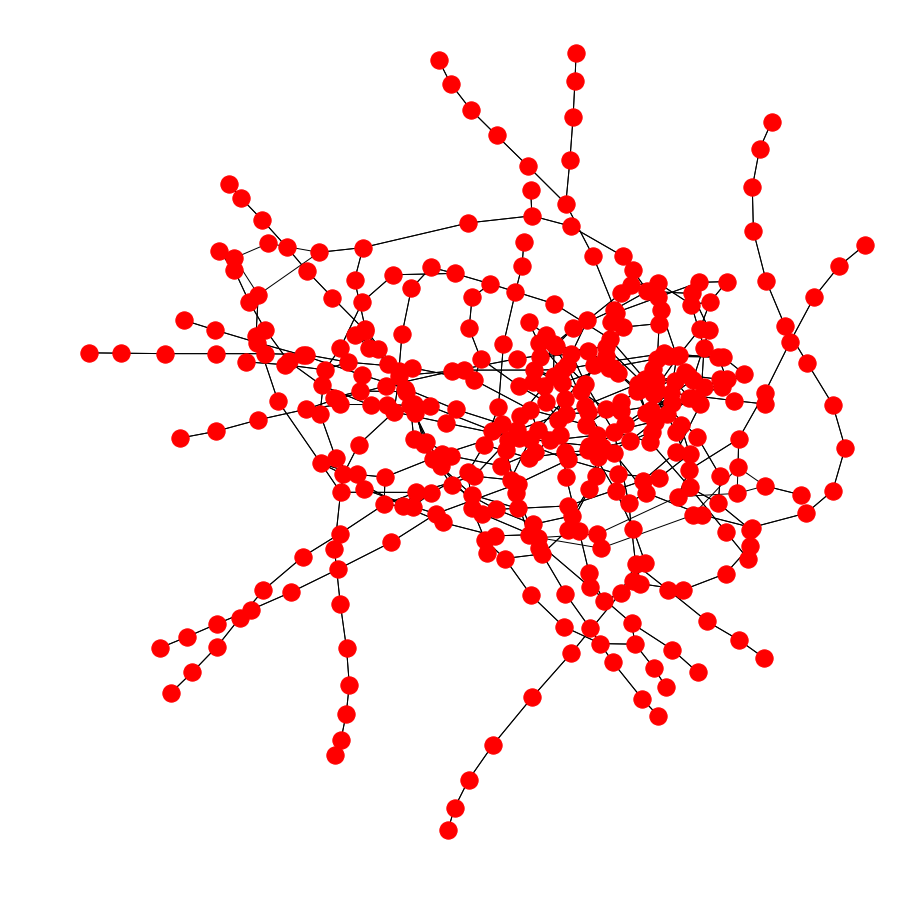

In [11]:

plt.figure(figsize=(12,12))
nx.draw(MG, label=False)

plt.show()

In [12]:
shortestMulti = nx.johnson(MG)

In [13]:
class Chromosome:
    def __init__(self, nodes):
        self.nodes = nodes       
    
    def shuffleGenes(self):
        random.shuffle(self.nodes)   
    
    #Order Changing Mutation, 1 gene is selected thanks to Pm probability then swapped with the other node(cant duplicate)
    def mutationGene(self, Pm):
        self.Pm = Pm
        for i in range(0, len(self.nodes)):
            self.randMutate = random.random()
            if self.randMutate < self.Pm:
                self.mutateTo = random.randint(0,len(self.nodes)-1)
                self.tmpGene = copy.copy(self.nodes[i])
                self.nodes = np.where(self.nodes == self.mutateTo, self.tmpGene, self.nodes)
                self.nodes[i] = self.mutateTo

    def pathWay(self, Multigraph): #Multigraph come from the Johnson Networkx calculation for shortest path between 2 nodes
        self.Multigraph = Multigraph
        self.totalPath = []
        for i in range(0, len(self.nodes)-1):        
            if i+1 is not None:
                self.totalPath = merge(self.totalPath, self.Multigraph[self.nodes[i]][self.nodes[i+1]])   
        return self.totalPath
        
    def __repr__(self):
        self.strNodes = "Chromosome :"
        for i in self.nodes:
            self.node = str(i)
            self.strNodes = self.strNodes + "|" + self.node
        self.strNodes = self.strNodes + "|"
        return self.strNodes

In [59]:
#Crossover PErmutation Encoding (1)ABC DEF + (2)DAB CFE --> ABC(1) DFE (in the order of the 2d chromosome genes)
def crossoverPermutation(chromo1, chromo2):
    lenChromo = int(len(chromo1.nodes) / 2)
    childrenChr = chromo1.nodes[0:lenChromo]
    for i in chromo2.nodes:
        if i not in childrenChr:
            childrenChr = np.append(childrenChr, [i])
    return childrenChr
    

In [60]:
def populationGenerationStart(popsize, nodeList, start):
    populationOpti = np.array([])
    for i in range(0,popsize,1):
        nodeList = np.unique(nodeList, axis=0)
        random.shuffle(nodeList)
        nodeList = np.where(nodeList == start, nodeList[0], nodeList)
        nodeList[0] = start
        populationOpti = np.append(populationOpti, Chromosome(nodeList))
    return populationOpti

In [40]:
def populationGenerationClassic(popsize, nodeList):
    populationOpti = []
    for i in range(0,popsize,1):
        nodeList = np.unique(nodeList, axis=0)
        random.shuffle(nodeList)
        populationOpti = populationOpti + [Chromosome(nodeList)]
    return populationOpti

In [16]:
#function can merge 2 list where last element of one(a) is the first element of the second(b)
#for example [1,2,3,4] + [4,5,6] = [1,2,3,4,5,6]
def merge(a, b):
    c = a[:-1] + b[:]
    return c
    

In [17]:
def fitnessScore(uniqueNodeList, chromosome, MultiG):
    fitScore = len(uniqueNodeList.unique()) / len(chromosome.pathWay(MultiG))
    return fitScore

In [192]:
def nameFit(uniqueNodeName, chromosome, MultiG):
    NameList = np.array([])
    for i in chromosome.pathWay(MultiG):
        NameList = np.append(NameList, uniqueNodeName[i])
    NameFreq = np.unique(NameList, return_counts=True)
    NameFreq = np.sort(NameFreq[1])
    score = 376 / np.sum((NameFreq[0:300]))
    return score

In [21]:
def nodesFit(chromosome, MultiG):
    score = 1 / len(chromosome.pathWay(MultiG))
    return score
    

In [72]:
def betweenNodesFit(chromFct, MG):
    scoreFinal = 0
    for i in range(0, len(chromFct.nodes)-1):
        if i+1 is not None:
            lenEdges = len(MG[chromFct.nodes[i]][chromFct.nodes[i+1]])
            scoreEdge = 1 / ((lenEdges)**2)
            scoreFinal = scoreEdge + scoreFinal
    return scoreFinal
            

In [156]:
'''
def mainIterOptimization(popLocal, popsize, nbIter):
    for z in range(0,nbIter):
        fitList = np.array([])
        for i in range(0,len(popLocal)):
            fitList = np.append(fitList, fitnessScore(df.Station, popLocal[i], shortestMulti))
        IndexfitBest = heapq.nlargest(int(popsize / 2), range(len(fitList)), fitList.take)
        popLocal_best = np.take(popLocal, IndexfitBest)
        child = np.array([Chromosome(crossoverPermutation(popLocal_best[0], popLocal_best[int(popsize/2) - 1]))])
        for u in range(1, len(popLocal_best)):
            crossChr = Chromosome(crossoverPermutation(popLocal_best[u-1], popLocal_best[u]))
            if crossChr not in child:
                child = np.append(child, crossChr)
            else:
                crossChr.mutationGene(0.2)
                child = np.append(child, crossChr)
        popLocal = np.append(child, popLocal_best)
        for mutIter in range(0, len(popLocal)-1):
            rand = random.random()
            if rand < 0.2:
                popLocal[mutIter].mutationGene(0.1)
    return popLocal[1]
'''

In [164]:
fitList = np.array([])
for i in range(0,len(newNewnewPop)):
            fitList = np.append(fitList, fitnessScore(df.Station, newNewnewPop[i], shortestMulti))
fitList

array([0.0776699 , 0.07917456, 0.07833333, 0.07497507, 0.07861175,
       0.07781457, 0.07907466, 0.07821926, 0.07857889, 0.07609796])

In [193]:
'''
#BEST 3611 nodes
#MAIN LOOP
population = populationGenerationClassic(20, df.Station)
for z in range(0,50000):
    fitList = np.array([])
    for i in range(0,len(population)):
        fitList = np.append(fitList, fitnessScore(df.Station, population[i], shortestMulti))
    IndexfitBest = heapq.nlargest(10, range(len(fitList)), fitList.take)
    population_best = np.take(population, IndexfitBest)
    child = np.array([Chromosome(crossoverPermutation(population_best[0], population_best[9]))])
    for u in range(1, len(population_best)):
        crossChr = Chromosome(crossoverPermutation(population_best[u-1], population_best[u]))
        if crossChr not in child:
            child = np.append(child, crossChr)
        else:
            crossChr.mutationGene(0.03)
            child = np.append(child, crossChr)
            #child = np.append(child, Chromosome(df.Station).shuffleGenes())
    population = np.append(child, population_best)
    for mutIter in range(0, len(population)-1):
        rand = random.random()
        if rand < 0.2:
            population[mutIter].mutationGene(0.03)
   # bestChromoIter = population[1]
   # newPopulation = np.append(newPopulation,bestChromoIter)
    print(fitList)

print(newPopulation)
'''

'\n#BEST 3611 nodes\n#MAIN LOOP\npopulation = populationGenerationClassic(20, df.Station)\nfor z in range(0,50000):\n    fitList = np.array([])\n    for i in range(0,len(population)):\n        fitList = np.append(fitList, fitnessScore(df.Station, population[i], shortestMulti))\n    IndexfitBest = heapq.nlargest(10, range(len(fitList)), fitList.take)\n    population_best = np.take(population, IndexfitBest)\n    child = np.array([Chromosome(crossoverPermutation(population_best[0], population_best[9]))])\n    for u in range(1, len(population_best)):\n        crossChr = Chromosome(crossoverPermutation(population_best[u-1], population_best[u]))\n        if crossChr not in child:\n            child = np.append(child, crossChr)\n        else:\n            crossChr.mutationGene(0.03)\n            child = np.append(child, crossChr)\n            #child = np.append(child, Chromosome(df.Station).shuffleGenes())\n    population = np.append(child, population_best)\n    for mutIter in range(0, len(po

In [195]:
#MAIN LOOP
population = populationGenerationClassic(100, df.Station)
for z in range(0,50000):
    fitList = np.array([])
    for i in range(0,len(population)):
        fitList = np.append(fitList, nameFit(nameTable.indexStation, population[i], shortestMulti))
    IndexfitBest = heapq.nlargest(50, range(len(fitList)), fitList.take)
    population_best = np.take(population, IndexfitBest)
    child = np.array([Chromosome(crossoverPermutation(population_best[0], population_best[49]))])
    for u in range(1, len(population_best)):
        crossChr = Chromosome(crossoverPermutation(population_best[u-1], population_best[u]))
        if crossChr not in child:
            child = np.append(child, crossChr)
        else:
            crossChr.mutationGene(0.03)
            child = np.append(child, crossChr)
            #child = np.append(child, Chromosome(df.Station).shuffleGenes())
    population = np.append(child, population_best)
    for mutIter in range(0, len(population)-1):
        rand = random.random()
        if rand < 0.2:
            population[mutIter].mutationGene(0.03)
   # bestChromoIter = population[1]
   # newPopulation = np.append(newPopulation,bestChromoIter)
    print(fitList)

print(newPopulation)


[0.1175     0.11551459 0.12129032 0.11898734 0.1172801  0.11537281
 0.11846251 0.11622875 0.11794228 0.11470409 0.11637264 0.11717046
 0.11622875 0.11677019 0.11947887 0.1172801  0.11816468 0.11801632
 0.11167211 0.11233941 0.11902501 0.12113402 0.11622875 0.12295618
 0.11328713 0.11720698 0.11619283 0.12093921 0.11835065 0.11651689
 0.11551459 0.12082262 0.11775759 0.11498471 0.11193808 0.11947887
 0.11608521 0.1175     0.11812755 0.11608521 0.11864942 0.11494956
 0.11587057 0.11775759 0.11597779 0.11913815 0.11651689 0.11738995
 0.11709748 0.12032    0.11658915 0.11558561 0.11684276 0.11583487
 0.11775759 0.11838791 0.11494956 0.11902501 0.11779449 0.11898734
 0.1201278  0.11680646 0.11366385 0.11373261 0.1166615  0.11533742
 0.11891208 0.12078381 0.11846251 0.12047421 0.11366385 0.11491443
 0.12113402 0.12008943 0.12093921 0.11523138 0.1179053  0.11779449
 0.11257485 0.11655301 0.11551459 0.11480916 0.11619283 0.1157992
 0.11768388 0.11951685 0.11846251 0.11753673 0.11601358 0.11861

[0.12207792 0.12117306 0.12694126 0.12706996 0.12706996 0.12458582
 0.12454455 0.12706996 0.12706996 0.12706996 0.12575251 0.12698413
 0.12706996 0.12545879 0.12613217 0.12566845 0.12541694 0.12621685
 0.12625923 0.12625923 0.12608987 0.12596315 0.12596315 0.12554257
 0.12596315 0.12307692 0.12698413 0.12566845 0.12344058 0.12566845
 0.12062881 0.12491694 0.12364354 0.12458582 0.12164348 0.12348112
 0.12396967 0.12376564 0.12275547 0.12129032 0.12140781 0.12287582
 0.12694126 0.11655301 0.12172224 0.1190627  0.12401055 0.12392881
 0.12024304 0.12421539 0.12745763 0.12732814 0.12706996 0.12579458
 0.12706996 0.12706996 0.12706996 0.12706996 0.12706996 0.12706996
 0.12698413 0.12698413 0.1268556  0.12681282 0.12681282 0.12524983
 0.12651413 0.12267537 0.12625923 0.12625923 0.12608987 0.12596315
 0.12596315 0.12596315 0.12583668 0.12571046 0.12566845 0.12566845
 0.12566845 0.12566845 0.12442091 0.12495846 0.12251548 0.12491694
 0.12491694 0.12487546 0.12470978 0.12508317 0.12458582 0.1245

[0.12706996 0.12912088 0.12889955 0.12947658 0.12655671 0.1304197
 0.12758738 0.12211757 0.12920962 0.12797822 0.12797822 0.12409241
 0.12797822 0.12784767 0.12732814 0.12512479 0.12780421 0.12780421
 0.12745763 0.12388797 0.12780421 0.12859097 0.12719892 0.1275441
 0.12767402 0.12956582 0.12706996 0.12943201 0.12462711 0.1275441
 0.12961048 0.12745763 0.12745763 0.12495846 0.12664197 0.12425644
 0.12741444 0.12741444 0.12741444 0.12741444 0.12689841 0.12789116
 0.12711291 0.12784767 0.12694126 0.12732814 0.12668464 0.12634409
 0.12793467 0.12388797 0.12706996 0.1296999  0.12956582 0.12925404
 0.12920962 0.12854701 0.1284153  0.12698413 0.12797822 0.12797822
 0.12797822 0.12797822 0.12219695 0.12784767 0.12780421 0.12780421
 0.12780421 0.12780421 0.12642905 0.12780421 0.12672733 0.12771739
 0.12767402 0.12495846 0.12767402 0.12763069 0.12763069 0.1275441
 0.12466844 0.1275441  0.12750085 0.12745763 0.12745763 0.12745763
 0.12745763 0.12741444 0.12741444 0.12741444 0.12741444 0.12741444

[0.13281526 0.13481535 0.13390313 0.13262787 0.13428571 0.12929849
 0.13642961 0.12952118 0.13380783 0.13295615 0.1317911  0.13319164
 0.13165266 0.12907655 0.12978944 0.13142258 0.12992398 0.13142258
 0.1327215  0.13101045 0.13073713 0.13253437 0.13253437 0.13390313
 0.13123909 0.13051024 0.13220816 0.13220816 0.13220816 0.130239
 0.132441   0.13133077 0.13082811 0.13202247 0.1325811  0.13295615
 0.1327215  0.13073713 0.13073713 0.12965517 0.13165266 0.13165266
 0.13165266 0.13165266 0.13165266 0.13165266 0.13165266 0.13165266
 0.13165266 0.13165266 0.1343817  0.13395084 0.13390313 0.13385546
 0.12920962 0.13319164 0.130239   0.13174492 0.13295615 0.13295615
 0.13290916 0.13276836 0.12934297 0.1327215  0.1327215  0.1304197
 0.1327215  0.1327215  0.1327215  0.13267466 0.13253437 0.12929849
 0.13253437 0.13234776 0.13225466 0.13220816 0.13220816 0.13220816
 0.1306009  0.13211525 0.13211525 0.13206884 0.13202247 0.13202247
 0.12789116 0.13323884 0.1317911  0.13165266 0.13165266 0.1316526

[0.13428571 0.1354955  0.13183731 0.13457409 0.13248767 0.13442975
 0.13467049 0.13442975 0.13133077 0.1343817  0.1343817  0.1343817
 0.13314448 0.13433369 0.13073713 0.13433369 0.13395084 0.13267466
 0.12952118 0.13428571 0.13428571 0.12916524 0.13428571 0.13428571
 0.13352273 0.13428571 0.13428571 0.13428571 0.13428571 0.13428571
 0.13428571 0.13428571 0.13428571 0.13202247 0.13428571 0.13428571
 0.13428571 0.13428571 0.13428571 0.13428571 0.13428571 0.13428571
 0.13428571 0.13428571 0.13428571 0.13428571 0.13300318 0.13428571
 0.13428571 0.13286219 0.13628126 0.13574007 0.13328607 0.1348637
 0.13476703 0.13442975 0.13442975 0.13442975 0.1343817  0.1343817
 0.1343817  0.13385546 0.13433369 0.13433369 0.13433369 0.135106
 0.13433369 0.13433369 0.13433369 0.13428571 0.13428571 0.13399857
 0.13428571 0.13428571 0.13428571 0.13414199 0.13452594 0.13428571
 0.13428571 0.13428571 0.13428571 0.13428571 0.13428571 0.13174492
 0.13428571 0.13428571 0.13428571 0.13188355 0.13357016 0.13428571


[0.13657828 0.13697632 0.13220816 0.13697632 0.13697632 0.13692644
 0.13692644 0.13105612 0.13667757 0.13697632 0.13603473 0.13828613
 0.13569109 0.13554434 0.13633067 0.13633067 0.13633067 0.13633067
 0.13395084 0.13633067 0.13633067 0.13380783 0.13633067 0.13418986
 0.13578909 0.13539791 0.13192982 0.13583815 0.1354955  0.13583815
 0.13520316 0.13613324 0.13554434 0.13613324 0.13613324 0.13677701
 0.13598553 0.13598553 0.13598553 0.13598553 0.1343817  0.13520316
 0.13309735 0.13500898 0.13598553 0.13505747 0.13618254 0.13583815
 0.13657828 0.13578909 0.13697632 0.13697632 0.13697632 0.13697632
 0.13697632 0.13692644 0.13667757 0.13667757 0.13667757 0.13295615
 0.13652869 0.13638012 0.13633067 0.13633067 0.13633067 0.13633067
 0.13633067 0.13633067 0.13169877 0.13633067 0.13633067 0.13633067
 0.13633067 0.13633067 0.13628126 0.13628126 0.13534917 0.13618254
 0.13376023 0.13618254 0.13618254 0.13618254 0.13613324 0.13613324
 0.13613324 0.13598553 0.13598553 0.13598553 0.13234776 0.1359

[0.13793103 0.13833701 0.1387966  0.1387966  0.13672727 0.13803231
 0.13727638 0.13662791 0.1387966  0.13662791 0.1387966  0.138083
 0.13423777 0.1387966  0.13757775 0.13697632 0.13380783 0.13757775
 0.13623188 0.138083   0.13500898 0.13747715 0.13762811 0.13747715
 0.13747715 0.13747715 0.13515457 0.13747715 0.13747715 0.13578909
 0.13657828 0.13598553 0.13652869 0.13672727 0.13697632 0.13697632
 0.13697632 0.13618254 0.13697632 0.13697632 0.13697632 0.13697632
 0.13697632 0.13697632 0.13697632 0.13697632 0.13697632 0.13697632
 0.13697632 0.13276836 0.13915618 0.1387966  0.1387966  0.1387966
 0.13869421 0.13848987 0.138083   0.13657828 0.13657828 0.138083
 0.138083   0.138083   0.13457409 0.138083   0.13793103 0.13788045
 0.13757775 0.13588724 0.13757775 0.13747715 0.13588724 0.13747715
 0.13747715 0.13747715 0.13747715 0.13747715 0.13747715 0.13520316
 0.13747715 0.13583815 0.13702624 0.13702624 0.13574007 0.13697632
 0.13319164 0.13697632 0.13697632 0.13697632 0.13697632 0.13697632


[0.13848987 0.13798165 0.14040329 0.14040329 0.14040329 0.13946588
 0.14040329 0.14040329 0.14040329 0.14040329 0.14040329 0.14040329
 0.14040329 0.13687659 0.13281526 0.1392077  0.13998511 0.13833701
 0.13864307 0.13404635 0.13428571 0.13727638 0.13712619 0.13915618
 0.13925926 0.13915618 0.13915618 0.13915618 0.13915618 0.13915618
 0.13915618 0.13915618 0.13889915 0.13915618 0.13915618 0.13915618
 0.13608397 0.13915618 0.13915618 0.13798165 0.13915618 0.13697632
 0.13895048 0.13925926 0.13915618 0.13915618 0.13915618 0.13915618
 0.13598553 0.13677701 0.14050822 0.14040329 0.14253222 0.13687659
 0.13588724 0.14040329 0.14040329 0.14040329 0.14040329 0.13380783
 0.14040329 0.14040329 0.14029851 0.14014163 0.13998511 0.13588724
 0.13998511 0.13982893 0.13977695 0.13962124 0.13818449 0.13946588
 0.1385409  0.13915618 0.13915618 0.13915618 0.13915618 0.13915618
 0.13915618 0.13915618 0.1374269  0.13915618 0.13915618 0.13915618
 0.13915618 0.13915618 0.13915618 0.13409415 0.13539791 0.1391

[0.13998511 0.14029851 0.14183327 0.13578909 0.14231643 0.14231643
 0.14231643 0.14231643 0.14231643 0.14231643 0.14226258 0.14226258
 0.14226258 0.13895048 0.14226258 0.14226258 0.14226258 0.14226258
 0.14226258 0.14108818 0.14226258 0.14220877 0.14220877 0.14103526
 0.14029851 0.14167295 0.1374269  0.14231643 0.1387966  0.13452594
 0.13967311 0.14103526 0.14103526 0.14103526 0.13977695 0.14098238
 0.138083   0.14098238 0.14098238 0.13722628 0.14098238 0.14098238
 0.14098238 0.14098238 0.14098238 0.14098238 0.13757775 0.14098238
 0.14098238 0.14098238 0.14291144 0.1426945  0.14237031 0.14231643
 0.14231643 0.13638012 0.14231643 0.14231643 0.14231643 0.14231643
 0.14226258 0.14226258 0.14226258 0.14226258 0.14103526 0.14226258
 0.14226258 0.13843888 0.13722628 0.14226258 0.14050822 0.14220877
 0.14220877 0.14183327 0.14167295 0.14167295 0.14161959 0.14119414
 0.14119414 0.14119414 0.14103526 0.14103526 0.14103526 0.14103526
 0.14098238 0.14098238 0.14098238 0.14098238 0.14098238 0.1409

[0.14242424 0.1440613  0.13813373 0.14318355 0.14318355 0.14318355
 0.14318355 0.14318355 0.14318355 0.13505747 0.14318355 0.14318355
 0.14318355 0.14318355 0.14318355 0.14318355 0.14318355 0.14318355
 0.14318355 0.14318355 0.14318355 0.14040329 0.14242424 0.14242424
 0.14242424 0.14242424 0.14242424 0.14242424 0.13982893 0.13838793
 0.14242424 0.14161959 0.14242424 0.14242424 0.1392077  0.14242424
 0.14242424 0.14242424 0.13692644 0.14242424 0.14130026 0.14231643
 0.14231643 0.14231643 0.14231643 0.14119414 0.14231643 0.14231643
 0.14231643 0.13977695 0.14400613 0.14351145 0.14318355 0.14318355
 0.14318355 0.14318355 0.14318355 0.14318355 0.14019389 0.14318355
 0.14318355 0.14318355 0.14318355 0.14318355 0.14318355 0.14318355
 0.14318355 0.14318355 0.14318355 0.14098238 0.14296578 0.14242424
 0.1391047  0.14242424 0.14242424 0.14242424 0.14242424 0.14242424
 0.13428571 0.14242424 0.14242424 0.14242424 0.14242424 0.14242424
 0.14242424 0.14242424 0.14242424 0.14242424 0.14242424 0.1423

[0.14428243 0.14455978 0.14455978 0.13982893 0.14455978 0.14455978
 0.14114114 0.14428243 0.14417178 0.14422708 0.14428243 0.14428243
 0.14210128 0.14428243 0.1440613  0.13998511 0.1440613  0.1440613
 0.1440613  0.1440613  0.14291144 0.1440613  0.14264036 0.14050822
 0.1440613  0.1440613  0.1440613  0.14258627 0.13702624 0.1440613
 0.1440613  0.1440613  0.1440613  0.1440613  0.14253222 0.1440613
 0.1440613  0.1440613  0.14231643 0.1440613  0.14092954 0.14356625
 0.1440613  0.1440613  0.1440613  0.14119414 0.1440613  0.1440613
 0.1440613  0.13848987 0.14467103 0.14455978 0.14455978 0.14455978
 0.14455978 0.14455978 0.14428243 0.14428243 0.14428243 0.14428243
 0.14428243 0.14422708 0.14422708 0.1440613  0.1440613  0.14056075
 0.1440613  0.14114114 0.1440613  0.1440613  0.14151298 0.13613324
 0.1440613  0.1440613  0.1440613  0.1440613  0.14356625 0.1440613
 0.1440613  0.1440613  0.1440613  0.1440613  0.13972501 0.1440613
 0.1440613  0.13915618 0.1440613  0.1440613  0.1440613  0.14439324
 

[0.14056075 0.14040329 0.14455978 0.14077125 0.14455978 0.13956941
 0.14455978 0.14455978 0.14455978 0.14455978 0.14455978 0.14455978
 0.14231643 0.14455978 0.14455978 0.14455978 0.13895048 0.14455978
 0.14455978 0.14455978 0.14455978 0.14455978 0.13993301 0.14455978
 0.14455978 0.14455978 0.14061331 0.14455978 0.14014163 0.14455978
 0.14329268 0.14455978 0.14455978 0.14455978 0.14455978 0.14455978
 0.14455978 0.14455978 0.14455978 0.14455978 0.14455978 0.14455978
 0.14092954 0.14455978 0.14455978 0.14455978 0.13833701 0.14455978
 0.14384086 0.14455978 0.14489403 0.14040329 0.14455978 0.14455978
 0.14455978 0.14455978 0.14455978 0.14455978 0.14455978 0.14455978
 0.14455978 0.14455978 0.14455978 0.14455978 0.14455978 0.14455978
 0.14455978 0.13838793 0.14455978 0.14455978 0.14092954 0.14455978
 0.14455978 0.14455978 0.14247821 0.14455978 0.14455978 0.14455978
 0.14455978 0.14455978 0.14455978 0.14455978 0.14455978 0.13793103
 0.14455978 0.14455978 0.1387966  0.14455978 0.14455978 0.1374

[0.1458495  0.1458495  0.13972501 0.1458495  0.1458495  0.1458495
 0.14455978 0.14455978 0.14455978 0.14455978 0.14455978 0.14455978
 0.14455978 0.14077125 0.14455978 0.14177979 0.14455978 0.14455978
 0.14455978 0.14455978 0.14455978 0.14455978 0.14455978 0.14455978
 0.14455978 0.14455978 0.14455978 0.14455978 0.14455978 0.14455978
 0.14455978 0.14455978 0.14455978 0.14455978 0.14455978 0.14455978
 0.14455978 0.14455978 0.14455978 0.14455978 0.14455978 0.14455978
 0.14455978 0.14455978 0.14455978 0.14087673 0.14455978 0.14455978
 0.14455978 0.13647913 0.1458495  0.1458495  0.1458495  0.1458495
 0.1458495  0.13998511 0.14455978 0.14455978 0.14455978 0.14455978
 0.14455978 0.14455978 0.14455978 0.14455978 0.14455978 0.14455978
 0.14199396 0.14455978 0.14455978 0.14077125 0.14210128 0.14455978
 0.14455978 0.14455978 0.14455978 0.14455978 0.14455978 0.14264036
 0.14455978 0.14340198 0.14455978 0.14242424 0.14455978 0.14092954
 0.14455978 0.13915618 0.14455978 0.14291144 0.14455978 0.144559

[0.1458495  0.1458495  0.1458495  0.1458495  0.1458495  0.1458495
 0.1458495  0.1458495  0.1458495  0.1458495  0.1458495  0.1458495
 0.1458495  0.1458495  0.1458495  0.1458495  0.1458495  0.1458495
 0.1458495  0.13361763 0.1458495  0.1458495  0.1458495  0.1458495
 0.1458495  0.1458495  0.1458495  0.1458495  0.1458495  0.1458495
 0.1458495  0.1458495  0.1458495  0.1458495  0.1458495  0.1458495
 0.1458495  0.1458495  0.1458495  0.1458495  0.1458495  0.1458495
 0.1458495  0.1458495  0.1458495  0.1458495  0.1458495  0.14285714
 0.1458495  0.1458495  0.1458495  0.1458495  0.1458495  0.14008942
 0.14130026 0.1458495  0.1458495  0.1458495  0.14329268 0.1458495
 0.13967311 0.1458495  0.1458495  0.1458495  0.1458495  0.1458495
 0.1458495  0.13972501 0.1458495  0.1458495  0.14008942 0.1458495
 0.1458495  0.1458495  0.1458495  0.1458495  0.1385409  0.1458495
 0.1458495  0.1458495  0.1458495  0.1458495  0.13818449 0.14045573
 0.1458495  0.1458495  0.1458495  0.1458495  0.1458495  0.1458495
 0.1404

[0.14641745 0.14318355 0.14613292 0.14231643 0.14556717 0.1458495
 0.1458495  0.1458495  0.1458495  0.1458495  0.14177979 0.1458495
 0.1458495  0.1458495  0.13972501 0.1458495  0.14082397 0.14066592
 0.14050822 0.1458495  0.1458495  0.1458495  0.14417178 0.13843888
 0.1458495  0.1458495  0.13864307 0.14061331 0.13946588 0.14258627
 0.1458495  0.13803231 0.1458495  0.1458495  0.1458495  0.1458495
 0.1458495  0.1458495  0.1458495  0.14172635 0.1458495  0.1458495
 0.1458495  0.13874539 0.1458495  0.1458495  0.1458495  0.1458495
 0.1458495  0.1458495  0.14681765 0.14428243 0.13993301 0.14618974
 0.14334731 0.1458495  0.1458495  0.1374269  0.14130026 0.1458495
 0.1458495  0.14296578 0.14066592 0.14172635 0.1458495  0.1458495
 0.14231643 0.1458495  0.1458495  0.1458495  0.1458495  0.13993301
 0.1458495  0.14003724 0.1458495  0.1458495  0.1458495  0.13931086
 0.1458495  0.13946588 0.1458495  0.14124718 0.1458495  0.1458495
 0.14035088 0.1458495  0.14124718 0.1458495  0.14151298 0.1458495
 0.1

[0.14450423 0.14183327 0.13687659 0.14467103 0.14681765 0.14647448
 0.14647448 0.14647448 0.14647448 0.14647448 0.14647448 0.14647448
 0.14647448 0.14647448 0.14247821 0.14641745 0.14641745 0.14641745
 0.14641745 0.14329268 0.14641745 0.13823529 0.14641745 0.14641745
 0.14641745 0.14641745 0.14156627 0.14641745 0.14641745 0.14641745
 0.14641745 0.14641745 0.14641745 0.14056075 0.14641745 0.14641745
 0.14077125 0.14641745 0.14551084 0.14641745 0.14641745 0.14641745
 0.14641745 0.14014163 0.13951763 0.14641745 0.14641745 0.14641745
 0.14285714 0.14641745 0.14745098 0.14698984 0.14698984 0.14681765
 0.14522982 0.14647448 0.14647448 0.14647448 0.14647448 0.14647448
 0.14647448 0.14024618 0.14647448 0.14647448 0.14641745 0.14641745
 0.14641745 0.14641745 0.14641745 0.14641745 0.14199396 0.14641745
 0.14641745 0.14641745 0.14291144 0.14641745 0.14641745 0.14641745
 0.14641745 0.14641745 0.14114114 0.14641745 0.14641745 0.14641745
 0.14641745 0.14008942 0.14641745 0.14641745 0.14641745 0.1464

[0.14647448 0.14258627 0.14733542 0.14428243 0.14681765 0.14681765
 0.14340198 0.14334731 0.14681765 0.13788045 0.14092954 0.14551084
 0.14103526 0.14681765 0.14681765 0.14681765 0.14681765 0.14573643
 0.14389591 0.14681765 0.14433781 0.14681765 0.14681765 0.14681765
 0.14681765 0.14710485 0.14658869 0.14653157 0.14653157 0.14658869
 0.14567997 0.14647448 0.14647448 0.14647448 0.14647448 0.14647448
 0.14647448 0.14647448 0.14647448 0.14647448 0.14647448 0.14647448
 0.14647448 0.14647448 0.13702624 0.14647448 0.14647448 0.14647448
 0.14750883 0.14647448 0.14745098 0.14733542 0.14733542 0.14710485
 0.14681765 0.14681765 0.14681765 0.14681765 0.14681765 0.14681765
 0.14681765 0.14681765 0.14681765 0.14681765 0.14681765 0.14681765
 0.14681765 0.14378585 0.14681765 0.14681765 0.14681765 0.14681765
 0.14681765 0.14681765 0.14312904 0.14658869 0.14658869 0.14653157
 0.14653157 0.14647448 0.14647448 0.14647448 0.14647448 0.14367596
 0.14647448 0.14312904 0.14215501 0.14647448 0.14647448 0.1464

[0.14873418 0.14908803 0.14641745 0.14814815 0.14814815 0.14551084
 0.14814815 0.14814815 0.14417178 0.14797324 0.14199396 0.14797324
 0.14797324 0.14797324 0.14797324 0.14797324 0.14797324 0.14567997
 0.14797324 0.14797324 0.14797324 0.14797324 0.14296578 0.14774067
 0.14774067 0.14750883 0.14750883 0.14750883 0.14750883 0.14750883
 0.14750883 0.14750883 0.14750883 0.14750883 0.143951   0.14422708
 0.14545455 0.14739318 0.14739318 0.143951   0.14797324 0.14733542
 0.14733542 0.14733542 0.14733542 0.13884786 0.14733542 0.14188679
 0.14733542 0.14733542 0.14472671 0.14814815 0.14024618 0.14814815
 0.14814815 0.14814815 0.14019389 0.14814815 0.14797324 0.14797324
 0.14797324 0.14797324 0.14329268 0.14797324 0.14797324 0.14797324
 0.14607615 0.14008942 0.14797324 0.14797324 0.14797324 0.14797324
 0.14797324 0.14774067 0.14774067 0.14750883 0.14750883 0.14750883
 0.14750883 0.14750883 0.14750883 0.14750883 0.14750883 0.14750883
 0.14745098 0.14739318 0.14739318 0.14082397 0.14285714 0.1473

[0.14956245 0.14926558 0.14926558 0.14926558 0.14926558 0.14926558
 0.14926558 0.14318355 0.14750883 0.14215501 0.14920635 0.14384086
 0.14920635 0.14247821 0.14920635 0.14920635 0.14307458 0.14920635
 0.14908803 0.14517375 0.14820654 0.14908803 0.14926558 0.14820654
 0.14653157 0.14820654 0.14926558 0.14258627 0.14926558 0.14873418
 0.14873418 0.14389591 0.14455978 0.14400613 0.14873418 0.14873418
 0.14873418 0.143951   0.143951   0.14873418 0.14873418 0.14873418
 0.14873418 0.14226258 0.14873418 0.14411652 0.14873418 0.14873418
 0.14873418 0.14873418 0.14956245 0.14926558 0.14926558 0.14926558
 0.14926558 0.14926558 0.14926558 0.14926558 0.14926558 0.14926558
 0.14920635 0.14920635 0.1453421  0.14920635 0.14920635 0.1453983
 0.14920635 0.14920635 0.14908803 0.14291144 0.14908803 0.14908803
 0.14908803 0.14908803 0.14908803 0.14908803 0.14908803 0.14908803
 0.14908803 0.14873418 0.14455978 0.14873418 0.14873418 0.14873418
 0.1420476  0.14873418 0.14040329 0.14873418 0.14873418 0.14873

[0.14956245 0.14956245 0.14956245 0.14522982 0.14215501 0.14956245
 0.14956245 0.14956245 0.14956245 0.14956245 0.14956245 0.14590609
 0.14956245 0.14956245 0.14956245 0.14237031 0.14956245 0.14956245
 0.14956245 0.14956245 0.14956245 0.14467103 0.13767851 0.14956245
 0.14710485 0.14956245 0.14956245 0.14956245 0.14956245 0.14956245
 0.14956245 0.14956245 0.14956245 0.14956245 0.14956245 0.14956245
 0.14956245 0.14956245 0.14745098 0.14956245 0.14956245 0.14351145
 0.14199396 0.148382   0.14956245 0.14956245 0.14956245 0.14956245
 0.14956245 0.14670308 0.14956245 0.14956245 0.14956245 0.14956245
 0.14956245 0.14956245 0.14956245 0.14956245 0.14956245 0.14956245
 0.14956245 0.14956245 0.14098238 0.14956245 0.14956245 0.14956245
 0.14956245 0.14956245 0.14956245 0.14590609 0.14956245 0.14556717
 0.14785686 0.14956245 0.14956245 0.14956245 0.14956245 0.14956245
 0.14351145 0.14956245 0.14956245 0.14517375 0.14956245 0.14956245
 0.13818449 0.14956245 0.14956245 0.14956245 0.14956245 0.1495

[0.14494988 0.1480898  0.14956245 0.14956245 0.14956245 0.14956245
 0.14956245 0.14956245 0.14956245 0.14956245 0.14956245 0.14956245
 0.14956245 0.14956245 0.14956245 0.14932486 0.14956245 0.14956245
 0.14579294 0.14956245 0.14455978 0.14167295 0.14956245 0.14956245
 0.14956245 0.14956245 0.14956245 0.14478244 0.14956245 0.14956245
 0.14956245 0.14956245 0.14956245 0.14956245 0.14956245 0.14956245
 0.14956245 0.14618974 0.14826498 0.14956245 0.14956245 0.14956245
 0.14956245 0.14522982 0.14956245 0.14956245 0.14956245 0.14956245
 0.14956245 0.14750883 0.15076183 0.14956245 0.14956245 0.14956245
 0.14956245 0.14844058 0.14956245 0.14956245 0.14956245 0.14956245
 0.14956245 0.14956245 0.14956245 0.14956245 0.14956245 0.14956245
 0.14956245 0.14956245 0.14956245 0.14956245 0.14215501 0.14956245
 0.1426945  0.14956245 0.13988095 0.14242424 0.14698984 0.14956245
 0.14956245 0.14956245 0.14956245 0.14956245 0.14647448 0.14956245
 0.14956245 0.14956245 0.14956245 0.14956245 0.1458495  0.1495

[0.14613292 0.14956245 0.14956245 0.14956245 0.14956245 0.14956245
 0.14956245 0.14956245 0.14956245 0.14956245 0.14956245 0.14956245
 0.14956245 0.14956245 0.14956245 0.14956245 0.14956245 0.14237031
 0.14114114 0.14956245 0.14956245 0.14956245 0.14956245 0.14956245
 0.14956245 0.14956245 0.14956245 0.14956245 0.14956245 0.14956245
 0.14489403 0.14956245 0.14956245 0.14956245 0.14956245 0.14956245
 0.14956245 0.14296578 0.14956245 0.14956245 0.14956245 0.14956245
 0.14956245 0.14956245 0.14956245 0.14956245 0.14956245 0.14956245
 0.14956245 0.1498605  0.14956245 0.14956245 0.14956245 0.14956245
 0.14956245 0.14956245 0.14956245 0.14956245 0.14956245 0.14956245
 0.14956245 0.14647448 0.14658869 0.14956245 0.14956245 0.14956245
 0.14579294 0.14607615 0.14956245 0.14956245 0.14956245 0.14956245
 0.14528594 0.14956245 0.14956245 0.14956245 0.14956245 0.13931086
 0.14956245 0.14956245 0.146875   0.14636045 0.14956245 0.14956245
 0.14956245 0.14956245 0.14956245 0.14849921 0.14956245 0.1481

[0.14029851 0.1507014  0.1507014  0.14891089 0.1507014  0.1507014
 0.1507014  0.1507014  0.15106468 0.14832347 0.14613292 0.15033986
 0.15033986 0.14664587 0.15033986 0.14762466 0.14114114 0.15033986
 0.15021974 0.15021974 0.15021974 0.15021974 0.15021974 0.15021974
 0.15021974 0.14183327 0.15021974 0.1432381  0.15021974 0.15021974
 0.15021974 0.14956245 0.14956245 0.14664587 0.14956245 0.14956245
 0.14956245 0.14956245 0.14956245 0.14956245 0.14956245 0.14494988
 0.14956245 0.14956245 0.14956245 0.14768264 0.14704732 0.14956245
 0.146875   0.14956245 0.15088283 0.1507014  0.1507014  0.1507014
 0.1507014  0.1507014  0.1507014  0.14636045 0.1504     0.15033986
 0.15033986 0.1462466  0.15033986 0.15033986 0.14428243 0.15033986
 0.15033986 0.15021974 0.15021974 0.15021974 0.14439324 0.143951
 0.15021974 0.15021974 0.15021974 0.15021974 0.15021974 0.1453421
 0.15021974 0.15021974 0.14956245 0.14956245 0.14956245 0.14956245
 0.14956245 0.14167295 0.14956245 0.14956245 0.14956245 0.14956245


[0.15088283 0.15106468 0.15106468 0.15106468 0.15106468 0.15106468
 0.15106468 0.148382   0.15106468 0.15106468 0.15106468 0.14762466
 0.15106468 0.15106468 0.15106468 0.15106468 0.15106468 0.15106468
 0.15106468 0.15106468 0.14641745 0.15106468 0.15106468 0.15106468
 0.14517375 0.15106468 0.15106468 0.15106468 0.15106468 0.15106468
 0.15106468 0.15106468 0.15106468 0.15106468 0.15106468 0.14914716
 0.1505807  0.14998006 0.14797324 0.15064103 0.15088283 0.15088283
 0.15088283 0.15088283 0.15088283 0.15088283 0.15088283 0.15088283
 0.15088283 0.14908803 0.15106468 0.15106468 0.15106468 0.15106468
 0.15106468 0.14478244 0.14334731 0.14607615 0.14814815 0.15106468
 0.15106468 0.15106468 0.15106468 0.15106468 0.15106468 0.15106468
 0.14161959 0.15106468 0.15106468 0.14567997 0.15106468 0.15106468
 0.15106468 0.14779874 0.15106468 0.1463035  0.15106468 0.15106468
 0.15106468 0.15106468 0.15106468 0.14739318 0.15106468 0.15106468
 0.15106468 0.15106468 0.1509434  0.1509434  0.1509434  0.1508

[0.15247364 0.15372036 0.15359477 0.15359477 0.1498605  0.15372036
 0.1525355  0.1525355  0.1525355  0.1525355  0.1525355  0.1525355
 0.15247364 0.15247364 0.15027978 0.15247364 0.15247364 0.1525355
 0.15247364 0.15247364 0.14920635 0.15247364 0.15247364 0.15247364
 0.15247364 0.14556717 0.15241184 0.15241184 0.15241184 0.1480315
 0.15241184 0.15241184 0.14739318 0.15241184 0.15241184 0.15241184
 0.15235008 0.15235008 0.14826498 0.15235008 0.15235008 0.15235008
 0.15235008 0.15235008 0.15235008 0.15235008 0.15235008 0.15247364
 0.15106468 0.15106468 0.15384615 0.15372036 0.15359477 0.15359477
 0.15321923 0.15272136 0.1525355  0.14896989 0.14710485 0.14896989
 0.14215501 0.15247364 0.14762466 0.15247364 0.15247364 0.15247364
 0.1469324  0.15247364 0.15247364 0.15247364 0.15247364 0.15247364
 0.14329268 0.1516129  0.15247364 0.14607615 0.15241184 0.15241184
 0.15241184 0.15241184 0.15241184 0.14779874 0.15241184 0.14739318
 0.14658869 0.15241184 0.15235008 0.15235008 0.14373089 0.1421012

[0.15614618 0.14500578 0.15634096 0.15179653 0.15634096 0.15634096
 0.15634096 0.15634096 0.15634096 0.15634096 0.15634096 0.15634096
 0.15621105 0.15621105 0.15543613 0.15303215 0.15621105 0.15228838
 0.15608136 0.1525974  0.15447823 0.15447823 0.15447823 0.15550041
 0.15397215 0.14556717 0.1462466  0.14716243 0.15372036 0.15372036
 0.14220877 0.15372036 0.15372036 0.15372036 0.15372036 0.15372036
 0.14489403 0.15372036 0.14891089 0.15372036 0.15372036 0.15372036
 0.15372036 0.15372036 0.15372036 0.15372036 0.15372036 0.15372036
 0.15372036 0.14998006 0.15614618 0.15634096 0.15634096 0.15634096
 0.15634096 0.14750883 0.14522982 0.15634096 0.15634096 0.15634096
 0.15634096 0.15634096 0.15621105 0.15621105 0.15621105 0.14676034
 0.15621105 0.15614618 0.15608136 0.15608136 0.15479621 0.15447823
 0.15447823 0.15397215 0.15397215 0.14389591 0.14444871 0.15372036
 0.15372036 0.1507014  0.15372036 0.15372036 0.14618974 0.15372036
 0.15372036 0.15372036 0.15372036 0.14653157 0.15372036 0.1537

[0.15634096 0.15634096 0.15634096 0.1509434  0.15634096 0.15634096
 0.14908803 0.15634096 0.15634096 0.15634096 0.1525355  0.15634096
 0.14722005 0.15634096 0.14779874 0.15634096 0.15634096 0.14938419
 0.15634096 0.15634096 0.1511254  0.15634096 0.15634096 0.14698984
 0.15634096 0.15634096 0.15340677 0.15634096 0.15634096 0.15634096
 0.15634096 0.15634096 0.15634096 0.15634096 0.15634096 0.15027978
 0.15634096 0.14932486 0.15106468 0.15634096 0.15634096 0.15155179
 0.15634096 0.14938419 0.15634096 0.15634096 0.15353205 0.15634096
 0.15634096 0.15634096 0.1498008  0.15634096 0.15634096 0.15634096
 0.15634096 0.1504     0.15634096 0.15634096 0.15634096 0.15634096
 0.15634096 0.15634096 0.15634096 0.15634096 0.15634096 0.1462466
 0.15634096 0.15634096 0.15634096 0.14750883 0.15634096 0.15634096
 0.15634096 0.15634096 0.15634096 0.15634096 0.15634096 0.15046018
 0.15634096 0.15634096 0.15634096 0.15634096 0.15634096 0.15634096
 0.15634096 0.15634096 0.15634096 0.15634096 0.15634096 0.14658

[0.15634096 0.15634096 0.15210356 0.15634096 0.15634096 0.15634096
 0.15498763 0.14517375 0.15634096 0.15634096 0.15634096 0.15634096
 0.15634096 0.15634096 0.15634096 0.15634096 0.15511551 0.15634096
 0.14885194 0.15634096 0.15634096 0.15222672 0.15634096 0.15634096
 0.15634096 0.15634096 0.15634096 0.15634096 0.15634096 0.1525355
 0.15634096 0.15634096 0.15634096 0.1504     0.15634096 0.15634096
 0.15634096 0.15634096 0.15634096 0.15634096 0.15634096 0.15634096
 0.15634096 0.15634096 0.15634096 0.15634096 0.15634096 0.15634096
 0.15634096 0.15397215 0.15634096 0.15634096 0.15634096 0.15634096
 0.15365754 0.15634096 0.15634096 0.15634096 0.1560166  0.15634096
 0.15634096 0.15634096 0.15634096 0.1516129  0.15634096 0.15634096
 0.15634096 0.15634096 0.15634096 0.1532817  0.15634096 0.15634096
 0.15179653 0.15634096 0.15634096 0.15634096 0.15634096 0.15634096
 0.14756672 0.15634096 0.15634096 0.15634096 0.15634096 0.15634096
 0.15634096 0.15634096 0.15634096 0.15634096 0.15634096 0.15634

[0.15660142 0.15265936 0.15660142 0.15334421 0.15647108 0.15660142
 0.15634096 0.15634096 0.15634096 0.14814815 0.15634096 0.15634096
 0.15634096 0.15634096 0.15634096 0.15149073 0.15634096 0.15634096
 0.14483821 0.15634096 0.14932486 0.15634096 0.15634096 0.15634096
 0.15634096 0.15634096 0.15046018 0.15634096 0.15634096 0.15634096
 0.15634096 0.15634096 0.15416154 0.15634096 0.15634096 0.1519806
 0.15634096 0.15634096 0.15634096 0.15634096 0.15634096 0.1504
 0.15634096 0.15634096 0.15634096 0.15634096 0.15409836 0.15634096
 0.15634096 0.15179653 0.15660142 0.15660142 0.15660142 0.15647108
 0.15647108 0.14573643 0.15179653 0.15634096 0.15634096 0.15634096
 0.15634096 0.15634096 0.15634096 0.15634096 0.15634096 0.15634096
 0.15634096 0.15634096 0.15384615 0.15634096 0.15634096 0.15634096
 0.1525974  0.14066592 0.15634096 0.15076183 0.15634096 0.15634096
 0.15634096 0.15634096 0.15634096 0.15634096 0.14879304 0.15179653
 0.14932486 0.15290769 0.15634096 0.15142972 0.15634096 0.15634096


[0.15871676 0.14992026 0.15334421 0.15791684 0.15925455 0.15479621
 0.15673197 0.15660142 0.14820654 0.15660142 0.15660142 0.15660142
 0.15660142 0.15660142 0.15660142 0.15149073 0.15660142 0.15660142
 0.15660142 0.15660142 0.15660142 0.15397215 0.14750883 0.15660142
 0.15660142 0.15660142 0.15660142 0.15660142 0.15660142 0.15660142
 0.15660142 0.15660142 0.15660142 0.15660142 0.15660142 0.15660142
 0.15660142 0.15660142 0.15660142 0.15660142 0.15660142 0.15660142
 0.15359477 0.15660142 0.15660142 0.15660142 0.14590609 0.15660142
 0.15660142 0.15660142 0.15871676 0.15142972 0.15871676 0.15228838
 0.15673197 0.15428806 0.15660142 0.15660142 0.15660142 0.15660142
 0.15660142 0.15562914 0.1508223  0.15660142 0.15660142 0.15660142
 0.15660142 0.15660142 0.14908803 0.15660142 0.15660142 0.14791503
 0.15660142 0.15660142 0.15660142 0.15660142 0.15660142 0.1507014
 0.15660142 0.15052042 0.15660142 0.15660142 0.14974114 0.15660142
 0.14926558 0.15660142 0.14844058 0.15660142 0.15660142 0.15660

[0.15871676 0.15871676 0.15871676 0.15871676 0.15871676 0.14873418
 0.15871676 0.15871676 0.15871676 0.15543613 0.15871676 0.15871676
 0.14867537 0.15871676 0.14891089 0.15106468 0.14455978 0.15871676
 0.15284553 0.14962197 0.15871676 0.15871676 0.15871676 0.15871676
 0.1498605  0.15871676 0.15871676 0.15871676 0.15871676 0.15179653
 0.15871676 0.15871676 0.15871676 0.14974114 0.15871676 0.15871676
 0.15871676 0.15871676 0.15871676 0.15871676 0.15871676 0.1507014
 0.15247364 0.15871676 0.15871676 0.15871676 0.15871676 0.15871676
 0.15871676 0.15871676 0.15871676 0.15608136 0.15124698 0.15871676
 0.15100402 0.15871676 0.15228838 0.15871676 0.15871676 0.15871676
 0.15871676 0.15871676 0.15871676 0.15871676 0.15871676 0.15871676
 0.15871676 0.15871676 0.15871676 0.15871676 0.15627598 0.15871676
 0.15871676 0.1505807  0.15871676 0.15871676 0.15871676 0.15315682
 0.15556475 0.15871676 0.15871676 0.15303215 0.15871676 0.15871676
 0.15871676 0.15871676 0.15384615 0.15871676 0.15372036 0.15871

[0.15871676 0.15871676 0.15441478 0.15871676 0.15871676 0.15871676
 0.15871676 0.15871676 0.15871676 0.15871676 0.15871676 0.15871676
 0.15871676 0.15871676 0.15871676 0.15871676 0.15871676 0.15871676
 0.15562914 0.15871676 0.15871676 0.15871676 0.15871676 0.15871676
 0.15871676 0.15315682 0.15871676 0.1516129  0.15871676 0.15871676
 0.14956245 0.15871676 0.15871676 0.15871676 0.15871676 0.14855788
 0.15871676 0.15871676 0.15871676 0.15136876 0.15871676 0.15871676
 0.15871676 0.15871676 0.15556475 0.15765199 0.15871676 0.15871676
 0.15871676 0.15871676 0.15871676 0.14647448 0.15871676 0.15871676
 0.15871676 0.15871676 0.15871676 0.15871676 0.14914716 0.15871676
 0.15871676 0.1505807  0.15871676 0.15871676 0.15210356 0.15871676
 0.15871676 0.15871676 0.15871676 0.15871676 0.14636045 0.15033986
 0.15871676 0.15871676 0.15871676 0.15871676 0.1500399  0.15871676
 0.15871676 0.15871676 0.15871676 0.15871676 0.15871676 0.1553719
 0.15871676 0.15871676 0.15871676 0.15871676 0.15136876 0.15871

[0.15871676 0.15871676 0.15871676 0.15871676 0.15871676 0.15871676
 0.15871676 0.15871676 0.15871676 0.15871676 0.1505807  0.15871676
 0.15871676 0.15871676 0.15871676 0.15871676 0.15871676 0.15871676
 0.15871676 0.15871676 0.15466886 0.15871676 0.15871676 0.15871676
 0.15871676 0.15372036 0.15550041 0.15871676 0.15871676 0.15871676
 0.15871676 0.15871676 0.15871676 0.15871676 0.15871676 0.15871676
 0.1498008  0.15871676 0.15871676 0.15871676 0.15871676 0.15871676
 0.15871676 0.15871676 0.15871676 0.15871676 0.15871676 0.15871676
 0.15871676 0.15871676 0.1532817  0.15871676 0.15871676 0.15871676
 0.15272136 0.15871676 0.15871676 0.15871676 0.15871676 0.15315682
 0.15871676 0.15871676 0.15871676 0.15871676 0.15871676 0.15052042
 0.15871676 0.15871676 0.15871676 0.15871676 0.15871676 0.15871676
 0.15871676 0.15871676 0.15871676 0.15871676 0.15871676 0.15871676
 0.15871676 0.15871676 0.15871676 0.15871676 0.15871676 0.15871676
 0.15871676 0.15871676 0.15871676 0.15871676 0.15871676 0.1552

KeyboardInterrupt: 

In [200]:
#BEST 3611 nodes
#MAIN LOOP
population = populationGenerationClassic(10000, df.Station)
for z in range(0,50000):
    fitList = np.array([])
    for i in range(0,len(population)):
        fitList = np.append(fitList, fitnessScore(df.Station, population[i], shortestMulti))
    IndexfitBest = heapq.nlargest(50, range(len(fitList)), fitList.take)
    population_best = np.take(population, IndexfitBest)
    child = np.array([Chromosome(crossoverPermutation(population_best[0], population_best[25]))])
    for u in range(1, len(population_best)):
        crossChr = Chromosome(crossoverPermutation(population_best[u-1], population_best[u]))
        if crossChr not in child:
            child = np.append(child, crossChr)
        else:
            crossChr.mutationGene(0.03)
            child = np.append(child, crossChr)
            #child = np.append(child, Chromosome(df.Station).shuffleGenes())
    population = np.append(child, population_best)
    for mutIter in range(0, len(population)-1):
        rand = random.random()
        if rand < 0.2:
            population[mutIter].mutationGene(0.03)
   # bestChromoIter = population[1]
   # newPopulation = np.append(newPopulation,bestChromoIter)
    print(fitList)

print(newPopulation)

[0.07079646 0.07110439 0.07243306 ... 0.07204445 0.07148289 0.0740449 ]
[0.07576063 0.0743083  0.07432299 0.07435238 0.07472178 0.07513989
 0.07574537 0.07625228 0.07664085 0.07365328 0.0747961  0.07568438
 0.07586764 0.07631419 0.07700184 0.07585233 0.07606717 0.07609796
 0.07487057 0.07608256 0.07333723 0.07715986 0.07454401 0.07515491
 0.07401575 0.07600566 0.07481098 0.07401575 0.07602103 0.07251688
 0.07503492 0.07553234 0.07319447 0.07353804 0.07746189 0.07426427
 0.07682877 0.07375441 0.07194795 0.07458838 0.07315175 0.07316599
 0.07602103 0.07408867 0.07545655 0.07433768 0.07262894 0.07614419
 0.07484076 0.07597494 0.07671904 0.07609796 0.07654723 0.07640723
 0.07636068 0.07634518 0.07632968 0.07565392 0.07500499 0.07619048
 0.07526021 0.07611336 0.07670339 0.07606717 0.07606717 0.07600566
 0.0759596  0.07594425 0.07589826 0.07586764 0.07585233 0.07585233
 0.07583703 0.0757759  0.07571486 0.07622137 0.07562349 0.07568438
 0.07560828 0.07559308 0.07559308 0.07469209 0.07559308 0

[0.07781457 0.07919124 0.07815423 0.07895842 0.0789916  0.07877645
 0.07861175 0.07823554 0.07867755 0.07867755 0.07781457 0.07807309
 0.07957672 0.07889215 0.07739811 0.07843137 0.07657841 0.07559308
 0.0776699  0.07799212 0.07744593 0.07817048 0.07817048 0.07817048
 0.07817048 0.07817048 0.07867755 0.07812175 0.07812175 0.07812175
 0.07812175 0.07812175 0.07812175 0.07812175 0.07791131 0.07854606
 0.07807309 0.07818673 0.0756387  0.07910793 0.07802449 0.07802449
 0.07804068 0.0780083  0.07815423 0.07843137 0.07742998 0.07791131
 0.07791131 0.07802449 0.07920792 0.07904141 0.0789916  0.07895842
 0.07877645 0.07877645 0.07757376 0.07867755 0.07867755 0.07867755
 0.07867755 0.07859532 0.07848048 0.07844774 0.07843137 0.07843137
 0.07838232 0.07656282 0.07831702 0.07826811 0.07818673 0.07817048
 0.07817048 0.07817048 0.07817048 0.07749382 0.07812175 0.07812175
 0.07812175 0.07812175 0.07812175 0.07812175 0.07812175 0.07812175
 0.07755776 0.07727086 0.07807309 0.07810553 0.07805688 0.0780

[0.08070401 0.08018767 0.07857889 0.07932489 0.08015349 0.08082545
 0.08032472 0.08032472 0.08032472 0.07957672 0.07957672 0.08037623
 0.0790248  0.08017058 0.08017058 0.08017058 0.07823554 0.07867755
 0.08017058 0.08017058 0.08017058 0.08017058 0.07979626 0.08017058
 0.08017058 0.08017058 0.08017058 0.07852966 0.08017058 0.08017058
 0.08017058 0.08017058 0.07900819 0.079459   0.07954305 0.07983015
 0.07920792 0.07996597 0.07991498 0.07935838 0.07991498 0.07741404
 0.07907466 0.0794758  0.08003406 0.07991498 0.07866109 0.08030756
 0.07979626 0.07922461 0.08082545 0.07974549 0.08058294 0.07983015
 0.08039341 0.08032472 0.0806175  0.07854606 0.07895842 0.08032472
 0.08030756 0.08020478 0.08017058 0.08017058 0.08017058 0.08017058
 0.08017058 0.08017058 0.07839867 0.08017058 0.08017058 0.08017058
 0.08017058 0.08017058 0.08017058 0.08017058 0.08017058 0.08017058
 0.08017058 0.08017058 0.08017058 0.08017058 0.08010226 0.0800511
 0.0800511  0.08       0.07998298 0.07996597 0.07991498 0.07991

[0.08229372 0.08105195 0.08198866 0.08172136 0.08154413 0.08051392
 0.08127972 0.0817569  0.08198866 0.08156182 0.07966102 0.08163265
 0.08163265 0.08098212 0.08029041 0.07972858 0.08163265 0.08025614
 0.0817569  0.08157952 0.08157952 0.08157952 0.08157952 0.08157952
 0.08157952 0.08157952 0.08157952 0.08089501 0.08156182 0.08202443
 0.08154413 0.08077336 0.08209607 0.07861175 0.08135006 0.08065208
 0.07862819 0.08150878 0.08084283 0.07935838 0.08131488 0.07994897
 0.08106943 0.08152645 0.08079072 0.08039341 0.08044501 0.0801364
 0.08092983 0.08098212 0.08256478 0.08209607 0.08202443 0.08191721
 0.08181027 0.08181027 0.07895842 0.0817569  0.0817569  0.08172136
 0.08163265 0.08161493 0.08163265 0.08163265 0.08163265 0.08163265
 0.08163265 0.08163265 0.08157952 0.08157952 0.08157952 0.08202443
 0.08157952 0.08157952 0.08157952 0.08018767 0.08157952 0.08156182
 0.08156182 0.08154413 0.08154413 0.0817569  0.08150878 0.08135006
 0.08135006 0.08131488 0.08127972 0.08127972 0.08126216 0.08126

[0.08245614 0.08309392 0.08313067 0.08254665 0.08202443 0.0812973
 0.08143816 0.08278292 0.08103448 0.08179247 0.08168586 0.08225771
 0.08243806 0.08157952 0.08285588 0.08195292 0.0826737  0.08256478
 0.08256478 0.08256478 0.08256478 0.08256478 0.08256478 0.08256478
 0.08256478 0.08256478 0.08256478 0.08256478 0.08143816 0.08163265
 0.08245614 0.08256478 0.08256478 0.08303887 0.08256478 0.08256478
 0.08256478 0.08227571 0.08313067 0.08168586 0.08029041 0.08089501
 0.08202443 0.08143816 0.08245614 0.08271007 0.08245614 0.08245614
 0.08245614 0.08245614 0.08335181 0.08313067 0.08254665 0.08089501
 0.08303887 0.08289242 0.08287415 0.08135006 0.08274648 0.08271007
 0.0826737  0.0826737  0.08265553 0.08265553 0.0826192  0.0826192
 0.08256478 0.08256478 0.08256478 0.08047945 0.08256478 0.08256478
 0.0801364  0.08075601 0.08256478 0.08168586 0.08256478 0.08256478
 0.08256478 0.08179247 0.08256478 0.08241999 0.08256478 0.08256478
 0.08256478 0.08256478 0.08256478 0.08251042 0.08249232 0.082492

[0.0846275  0.08466562 0.08458943 0.08458943 0.08426714 0.08458943
 0.08458943 0.08445642 0.08445642 0.08445642 0.08445642 0.08445642
 0.08476105 0.08434275 0.08430493 0.08458943 0.08428603 0.08428603
 0.08428603 0.08428603 0.08269188 0.08428603 0.08379764 0.08458943
 0.08307556 0.08419167 0.08240193 0.08346282 0.08390984 0.08422939
 0.08249232 0.08390984 0.08353699 0.08202443 0.08220376 0.08333333
 0.08353699 0.08353699 0.08353699 0.08287415 0.08417282 0.08316744
 0.08316744 0.08302053 0.08313067 0.08313067 0.08313067 0.08313067
 0.08313067 0.08313067 0.08506787 0.08466562 0.08458943 0.08458943
 0.08458943 0.08458943 0.08458943 0.08445642 0.08445642 0.08445642
 0.08445642 0.08445642 0.08434275 0.08430493 0.08430493 0.08184589
 0.08243806 0.08428603 0.08260105 0.08428603 0.08428603 0.08428603
 0.08060021 0.08419167 0.08419167 0.08419167 0.08404113 0.08269188
 0.08390984 0.08377897 0.08256478 0.08353699 0.08353699 0.08126216
 0.08269188 0.08353699 0.08285588 0.08353699 0.08353699 0.0834

[0.08559071 0.08559071 0.08545455 0.08522212 0.08621876 0.08366711
 0.08516421 0.08516421 0.08516421 0.08516421 0.08516421 0.08516421
 0.08516421 0.08516421 0.08516421 0.08516421 0.08516421 0.08082545
 0.08464656 0.08516421 0.08516421 0.08499096 0.08499096 0.08499096
 0.08294728 0.08499096 0.08499096 0.08499096 0.08499096 0.08443746
 0.08499096 0.08499096 0.08413515 0.08499096 0.08499096 0.08499096
 0.08499096 0.08499096 0.08510638 0.08499096 0.08499096 0.08499096
 0.08193506 0.08499096 0.08499096 0.08499096 0.08234779 0.08499096
 0.08499096 0.08499096 0.08588397 0.08559071 0.08559071 0.08543513
 0.08529946 0.08311229 0.08516421 0.08516421 0.08516421 0.08516421
 0.08516421 0.08516421 0.08516421 0.08516421 0.08516421 0.08516421
 0.08516421 0.08366711 0.08516421 0.08516421 0.08516421 0.08357413
 0.08499096 0.08499096 0.08499096 0.08499096 0.08329641 0.08499096
 0.08499096 0.08499096 0.08499096 0.08499096 0.08499096 0.08499096
 0.08499096 0.08499096 0.08499096 0.08499096 0.08499096 0.0832

[0.08504863 0.08256478 0.08574686 0.08594286 0.08331487 0.08612002
 0.08653625 0.08566872 0.08588397 0.08580557 0.08580557 0.08580557
 0.08580557 0.08580557 0.08580557 0.08580557 0.08580557 0.08580557
 0.08580557 0.08580557 0.08497175 0.08580557 0.08580557 0.08580557
 0.08580557 0.08580557 0.08612002 0.08576642 0.08568824 0.08574686
 0.08574686 0.08572731 0.08572731 0.08572731 0.08572731 0.08572731
 0.08572731 0.08572731 0.08426714 0.08572731 0.08426714 0.08396606
 0.08572731 0.08407871 0.08245614 0.08541572 0.08303887 0.08529946
 0.08580557 0.08541572 0.08641692 0.08520281 0.08613975 0.08612002
 0.08613975 0.08390984 0.08608059 0.08592322 0.08588397 0.08580557
 0.08421053 0.08580557 0.08580557 0.08580557 0.08147346 0.08580557
 0.08580557 0.08580557 0.08580557 0.08400357 0.08449438 0.08580557
 0.08580557 0.08458943 0.08531881 0.08580557 0.08578599 0.08574686
 0.08574686 0.08574686 0.0844754  0.08572731 0.08572731 0.08572731
 0.08572731 0.08572731 0.08572731 0.08572731 0.08572731 0.0857

[0.08729974 0.08719852 0.08752328 0.08752328 0.08752328 0.08752328
 0.08752328 0.0874622  0.08689623 0.08311229 0.08689623 0.08689623
 0.08689623 0.08689623 0.08689623 0.08689623 0.08689623 0.08543513
 0.08689623 0.08689623 0.08689623 0.08653625 0.08675588 0.0846275
 0.08545455 0.08729974 0.08596251 0.08066938 0.08671587 0.08671587
 0.08671587 0.08466562 0.08663594 0.08653625 0.08752328 0.08653625
 0.08402235 0.08470376 0.08653625 0.08653625 0.08653625 0.08653625
 0.08445642 0.08653625 0.08653625 0.08653625 0.08653625 0.08458943
 0.08679594 0.08633754 0.08752328 0.08752328 0.08752328 0.08479928
 0.08752328 0.08752328 0.08752328 0.0874622  0.08689623 0.08689623
 0.08689623 0.08689623 0.08689623 0.08689623 0.08689623 0.08689623
 0.08689623 0.08689623 0.08689623 0.08689623 0.08689623 0.08687616
 0.08685609 0.08685609 0.08685609 0.08679594 0.08675588 0.08671587
 0.08671587 0.08671587 0.08671587 0.08671587 0.08663594 0.08653625
 0.0856102  0.08653625 0.08653625 0.08653625 0.08653625 0.08653

[0.08752328 0.08752328 0.08752328 0.08752328 0.08752328 0.08752328
 0.08752328 0.08752328 0.08752328 0.08752328 0.08752328 0.08752328
 0.08752328 0.08612002 0.08752328 0.08752328 0.08752328 0.08752328
 0.08752328 0.08752328 0.08752328 0.08752328 0.08752328 0.08752328
 0.08752328 0.08752328 0.08752328 0.08752328 0.08752328 0.08752328
 0.08752328 0.08752328 0.08409752 0.08752328 0.08752328 0.08752328
 0.08635737 0.08458943 0.08752328 0.08752328 0.08752328 0.08752328
 0.08752328 0.08752328 0.08752328 0.08752328 0.08752328 0.08606088
 0.08508712 0.08752328 0.08453237 0.0856492  0.08752328 0.08752328
 0.08566872 0.0845704  0.08752328 0.08752328 0.08752328 0.08752328
 0.08635737 0.08675588 0.08752328 0.08671587 0.08752328 0.08752328
 0.08752328 0.08752328 0.08752328 0.08752328 0.08752328 0.08752328
 0.08752328 0.08752328 0.08506787 0.08752328 0.08752328 0.08635737
 0.08752328 0.08524144 0.08752328 0.08752328 0.08752328 0.08752328
 0.08752328 0.08752328 0.08752328 0.08752328 0.08752328 0.0875

[0.08752328 0.08752328 0.08752328 0.08752328 0.08752328 0.08752328
 0.08752328 0.08752328 0.08752328 0.08752328 0.08514493 0.08752328
 0.08752328 0.08752328 0.08752328 0.08443746 0.08752328 0.08752328
 0.08752328 0.08752328 0.08752328 0.08752328 0.08645666 0.08752328
 0.08752328 0.08752328 0.08752328 0.08580557 0.08752328 0.08472285
 0.08752328 0.08752328 0.08493336 0.08479928 0.08752328 0.08752328
 0.08752328 0.08685609 0.08635737 0.08752328 0.08752328 0.08752328
 0.08752328 0.08594286 0.08789154 0.08752328 0.08752328 0.08752328
 0.08752328 0.08752328 0.08613975 0.0856297  0.08635737 0.08495255
 0.08705719 0.08522212 0.0844185  0.08522212 0.08752328 0.08752328
 0.08752328 0.08594286 0.08752328 0.08752328 0.08752328 0.08752328
 0.08649643 0.08752328 0.08752328 0.08752328 0.08752328 0.08752328
 0.08752328 0.08752328 0.08629791 0.08752328 0.08752328 0.08752328
 0.08596251 0.08752328 0.08752328 0.08752328 0.08752328 0.08752328
 0.08752328 0.08590359 0.08752328 0.08752328 0.08481841 0.0875

[0.08768657 0.08768657 0.0844185  0.08768657 0.08673587 0.08768657
 0.08768657 0.08768657 0.08768657 0.08537693 0.08768657 0.08768657
 0.08768657 0.08762526 0.08762526 0.08762526 0.0850294  0.08665591
 0.08752328 0.08576642 0.08455138 0.08756404 0.08679594 0.08752328
 0.08752328 0.08752328 0.08752328 0.08752328 0.08752328 0.08752328
 0.08752328 0.08752328 0.08752328 0.08752328 0.08752328 0.08752328
 0.08752328 0.08752328 0.08752328 0.08752328 0.08752328 0.08752328
 0.08752328 0.08752328 0.08752328 0.08752328 0.08752328 0.08752328
 0.08752328 0.08752328 0.087871   0.08768657 0.08768657 0.08768657
 0.08768657 0.08768657 0.08768657 0.08768657 0.08768657 0.08768657
 0.08768657 0.08768657 0.08768657 0.08762526 0.08497175 0.08762526
 0.08756404 0.08594286 0.08752328 0.08752328 0.08466562 0.08752328
 0.08752328 0.08752328 0.08493336 0.08543513 0.08752328 0.0871783
 0.08588397 0.08752328 0.08752328 0.08752328 0.08752328 0.08400357
 0.08752328 0.08752328 0.08752328 0.08752328 0.08508712 0.08752

[0.08774796 0.0856102  0.08776844 0.08774796 0.08774796 0.08774796
 0.08768657 0.08768657 0.08768657 0.08608059 0.08768657 0.08768657
 0.08768657 0.08768657 0.08768657 0.08512565 0.08768657 0.08768657
 0.08768657 0.08768657 0.08768657 0.08768657 0.08439955 0.08768657
 0.08768657 0.08768657 0.08768657 0.08768657 0.08768657 0.08768657
 0.08768657 0.08768657 0.08768657 0.08768657 0.08768657 0.08491418
 0.08768657 0.08768657 0.08768657 0.08768657 0.08768657 0.08768657
 0.08768657 0.08768657 0.08768657 0.08768657 0.08768657 0.08637721
 0.08594286 0.08768657 0.08691632 0.08776844 0.08776844 0.08774796
 0.08774796 0.08768657 0.08768657 0.08430493 0.08768657 0.08768657
 0.08651634 0.08639706 0.08524144 0.08768657 0.08768657 0.08768657
 0.08768657 0.08559071 0.08768657 0.08768657 0.08594286 0.08768657
 0.08768657 0.08768657 0.08768657 0.08768657 0.08768657 0.08768657
 0.08768657 0.08606088 0.08768657 0.08768657 0.08269188 0.08649643
 0.08768657 0.08768657 0.08568824 0.08768657 0.08645666 0.0876

[0.08776844 0.08776844 0.08776844 0.08776844 0.08574686 0.08535755
 0.08776844 0.08776844 0.08776844 0.08776844 0.08776844 0.08641692
 0.08776844 0.08776844 0.08776844 0.08776844 0.08776844 0.08776844
 0.08547397 0.08438061 0.08689623 0.08776844 0.08776844 0.08776844
 0.08615949 0.08776844 0.08776844 0.08776844 0.08381632 0.08776844
 0.08776844 0.08776844 0.08394731 0.08776844 0.08776844 0.08776844
 0.08776844 0.08776844 0.08776844 0.08572731 0.08776844 0.08776844
 0.08776844 0.08351844 0.08776844 0.08774796 0.08584475 0.08776844
 0.08445642 0.08776844 0.08643678 0.08776844 0.08776844 0.08776844
 0.08776844 0.08776844 0.08776844 0.08776844 0.08776844 0.08776844
 0.08776844 0.08776844 0.08637721 0.08776844 0.08776844 0.08776844
 0.08667589 0.08776844 0.08776844 0.08776844 0.08776844 0.08776844
 0.08776844 0.08776844 0.08555176 0.08776844 0.08776844 0.08776844
 0.08776844 0.08776844 0.08776844 0.08776844 0.08663594 0.08776844
 0.08776844 0.08776844 0.08695652 0.08776844 0.08685609 0.0877

[0.08818011 0.08818011 0.08818011 0.08807683 0.08807683 0.08782995
 0.08776844 0.08776844 0.08478016 0.08619899 0.08776844 0.08776844
 0.08776844 0.08776844 0.08776844 0.08776844 0.08776844 0.08776844
 0.08535755 0.08776844 0.08776844 0.08776844 0.08776844 0.08776844
 0.08600183 0.08776844 0.08776844 0.08411633 0.08535755 0.08776844
 0.08776844 0.08776844 0.08776844 0.08776844 0.08776844 0.08776844
 0.08776844 0.08776844 0.08776844 0.08776844 0.08776844 0.08776844
 0.08776844 0.08272827 0.08776844 0.08776844 0.08776844 0.08776844
 0.08776844 0.08776844 0.08818011 0.08818011 0.08818011 0.08807683
 0.08669587 0.08776844 0.08776844 0.08602151 0.08776844 0.08776844
 0.08683603 0.08776844 0.08588397 0.08776844 0.08776844 0.08776844
 0.08590359 0.08776844 0.08776844 0.08776844 0.08776844 0.08776844
 0.08776844 0.08776844 0.08594286 0.08776844 0.08776844 0.08776844
 0.08776844 0.08776844 0.08776844 0.08776844 0.08776844 0.08776844
 0.08776844 0.08776844 0.08754366 0.08489501 0.08776844 0.0877

[0.08818011 0.08818011 0.08818011 0.08782995 0.08818011 0.08818011
 0.08818011 0.08818011 0.08818011 0.08818011 0.08818011 0.08729974
 0.08604119 0.08818011 0.08818011 0.08516421 0.08818011 0.08818011
 0.08818011 0.08818011 0.08818011 0.08818011 0.08818011 0.08818011
 0.08818011 0.08818011 0.08818011 0.08818011 0.08818011 0.08874203
 0.08818011 0.08818011 0.08818011 0.08495255 0.08818011 0.08818011
 0.08818011 0.0861003  0.08818011 0.08818011 0.08818011 0.08818011
 0.08707735 0.08818011 0.08818011 0.08818011 0.08818011 0.08818011
 0.08818011 0.08818011 0.08818011 0.08818011 0.08818011 0.08818011
 0.08818011 0.08818011 0.08818011 0.08641692 0.08818011 0.08818011
 0.08818011 0.08818011 0.08818011 0.08818011 0.08818011 0.08818011
 0.08818011 0.08818011 0.08818011 0.08818011 0.08818011 0.08818011
 0.08818011 0.08744186 0.08818011 0.08818011 0.08818011 0.08818011
 0.08818011 0.08818011 0.08818011 0.08818011 0.08572731 0.08818011
 0.08818011 0.08612002 0.08818011 0.08818011 0.08818011 0.0881

[0.08497175 0.08818011 0.08818011 0.08818011 0.08818011 0.08818011
 0.08659604 0.08818011 0.08818011 0.08818011 0.08818011 0.08818011
 0.08818011 0.08818011 0.08531881 0.08818011 0.08685609 0.08818011
 0.08818011 0.08818011 0.08606088 0.08499096 0.08818011 0.08818011
 0.08665591 0.08818011 0.08770702 0.08818011 0.08818011 0.08818011
 0.08818011 0.08576642 0.08818011 0.08818011 0.08818011 0.08687616
 0.08514493 0.08818011 0.08818011 0.08818011 0.08818011 0.08818011
 0.08818011 0.08818011 0.08566872 0.08818011 0.08818011 0.08818011
 0.08663594 0.08637721 0.08818011 0.08818011 0.08818011 0.08818011
 0.08818011 0.08818011 0.08578599 0.08818011 0.08651634 0.08818011
 0.08818011 0.08547397 0.08818011 0.08818011 0.08818011 0.0871177
 0.08818011 0.08818011 0.08818011 0.08818011 0.08818011 0.08818011
 0.08818011 0.08818011 0.08818011 0.08818011 0.08818011 0.08818011
 0.08818011 0.08818011 0.08818011 0.08818011 0.08818011 0.08818011
 0.08818011 0.08818011 0.08592322 0.08818011 0.08818011 0.08818

[0.08888889 0.08956646 0.08888889 0.08888889 0.08956646 0.0882422
 0.0882422  0.0882422  0.0882422  0.0882422  0.0882422  0.0882422
 0.0882422  0.0882422  0.0882422  0.08818011 0.08818011 0.08818011
 0.08818011 0.08818011 0.08818011 0.08818011 0.08818011 0.08818011
 0.08818011 0.08818011 0.08818011 0.08727948 0.08818011 0.08818011
 0.08659604 0.08818011 0.08818011 0.08818011 0.08818011 0.08818011
 0.08818011 0.08514493 0.08818011 0.08643678 0.08818011 0.08818011
 0.08818011 0.08818011 0.08818011 0.08818011 0.08705719 0.08818011
 0.08818011 0.08818011 0.08956646 0.08956646 0.08888889 0.08888889
 0.08844978 0.0882422  0.0882422  0.0882422  0.0882422  0.0882422
 0.0882422  0.08723898 0.0882422  0.0882422  0.08818011 0.08594286
 0.08818011 0.08679594 0.08818011 0.08818011 0.08818011 0.08818011
 0.08818011 0.08818011 0.08818011 0.08539632 0.08818011 0.08818011
 0.08818011 0.08818011 0.08818011 0.08818011 0.08818011 0.08818011
 0.08818011 0.08818011 0.08348135 0.08818011 0.08818011 0.0881801

[0.09001676 0.08813877 0.08828363 0.08956646 0.08727948 0.08415398
 0.08956646 0.08956646 0.08956646 0.08956646 0.08956646 0.08956646
 0.08764569 0.08956646 0.08956646 0.08956646 0.08956646 0.08956646
 0.08956646 0.08727948 0.08956646 0.08679594 0.08956646 0.08756404
 0.08956646 0.09001676 0.08956646 0.08956646 0.08506787 0.08956646
 0.0861003  0.08629791 0.08956646 0.08956646 0.08600183 0.08617923
 0.08956646 0.08956646 0.08956646 0.08956646 0.09001676 0.08956646
 0.08928995 0.08709752 0.08956646 0.08956646 0.0874622  0.08956646
 0.08956646 0.08653625 0.09001676 0.08999521 0.08956646 0.08956646
 0.08956646 0.08602151 0.08956646 0.08956646 0.08956646 0.08956646
 0.08956646 0.08956646 0.08956646 0.08956646 0.08956646 0.08956646
 0.08956646 0.08956646 0.08956646 0.08598216 0.08956646 0.08727948
 0.08956646 0.08826291 0.08956646 0.08635737 0.08956646 0.08956646
 0.08956646 0.08956646 0.08514493 0.0874622  0.08956646 0.08956646
 0.08956646 0.08956646 0.08956646 0.08516421 0.08956646 0.0888

[0.08943863 0.08705719 0.08780943 0.09031948 0.08641692 0.09031948
 0.08960915 0.08931116 0.09001676 0.09001676 0.08719852 0.09001676
 0.09001676 0.08909953 0.09001676 0.09001676 0.09001676 0.09001676
 0.09001676 0.09001676 0.08619899 0.09001676 0.09001676 0.09001676
 0.09001676 0.09001676 0.08899408 0.09001676 0.09001676 0.09001676
 0.08909953 0.09001676 0.09001676 0.08832511 0.09001676 0.09001676
 0.09001676 0.09001676 0.09001676 0.08836663 0.09001676 0.09001676
 0.09001676 0.09001676 0.09001676 0.09001676 0.09001676 0.08768657
 0.09001676 0.09001676 0.09053696 0.09031948 0.09031948 0.09031948
 0.09031948 0.09031948 0.09014625 0.09001676 0.09001676 0.09001676
 0.08645666 0.09001676 0.09001676 0.08785047 0.0873809  0.09001676
 0.08830437 0.09001676 0.09001676 0.09001676 0.09001676 0.09001676
 0.09001676 0.08928995 0.09001676 0.09001676 0.09001676 0.09001676
 0.09001676 0.08893094 0.09001676 0.09001676 0.09001676 0.09001676
 0.09001676 0.09001676 0.08740121 0.09001676 0.0873403  0.0880

[0.08916291 0.08945991 0.08890991 0.09031948 0.09031948 0.09031948
 0.09031948 0.08766612 0.09031948 0.08719852 0.09031948 0.09031948
 0.09031948 0.09031948 0.09031948 0.08673587 0.08897302 0.08689623
 0.08822149 0.0873809  0.09031948 0.09031948 0.09031948 0.09031948
 0.09031948 0.09031948 0.08857479 0.09031948 0.09031948 0.09031948
 0.08785047 0.09031948 0.09031948 0.09031948 0.09031948 0.09031948
 0.09031948 0.09031948 0.09031948 0.09031948 0.09031948 0.09031948
 0.09031948 0.09031948 0.09031948 0.09031948 0.09031948 0.08778893
 0.09031948 0.09031948 0.08878394 0.09053696 0.09031948 0.09031948
 0.09031948 0.09031948 0.09031948 0.09031948 0.09031948 0.09031948
 0.09031948 0.08893094 0.09031948 0.09031948 0.09031948 0.09031948
 0.09031948 0.08602151 0.09031948 0.09031948 0.09031948 0.09031948
 0.09031948 0.09031948 0.09031948 0.08969466 0.09031948 0.09031948
 0.08637721 0.09031948 0.09031948 0.09031948 0.09031948 0.09031948
 0.09031948 0.09031948 0.08677591 0.08627811 0.09031948 0.0903

[0.08982322 0.08982322 0.08506787 0.09031948 0.09031948 0.09031948
 0.09031948 0.09031948 0.08673587 0.08795322 0.09031948 0.09031948
 0.09031948 0.09031948 0.09031948 0.09031948 0.08715809 0.0895878
 0.08613975 0.09031948 0.08421053 0.09031948 0.08770702 0.09031948
 0.09031948 0.08926876 0.09031948 0.09031948 0.09031948 0.0879738
 0.09031948 0.09031948 0.09031948 0.09031948 0.09031948 0.09031948
 0.09031948 0.08756404 0.09031948 0.09031948 0.09031948 0.09031948
 0.09031948 0.09031948 0.09031948 0.09031948 0.09031948 0.09031948
 0.08836663 0.08893094 0.09060241 0.09031948 0.08888889 0.09031948
 0.09031948 0.09031948 0.09031948 0.09031948 0.09031948 0.09031948
 0.09031948 0.09031948 0.09031948 0.09031948 0.09031948 0.09031948
 0.09031948 0.09031948 0.09031948 0.09031948 0.09031948 0.09031948
 0.09031948 0.08578599 0.09031948 0.09031948 0.08623853 0.09031948
 0.09031948 0.09031948 0.09031948 0.0883874  0.09031948 0.09031948
 0.09031948 0.08707735 0.09031948 0.09031948 0.09031948 0.090319

[0.08980177 0.08980177 0.09031948 0.09031948 0.09031948 0.09031948
 0.09031948 0.09031948 0.08935361 0.09031948 0.09031948 0.08723898
 0.09031948 0.09031948 0.09031948 0.09031948 0.09031948 0.08840818
 0.09031948 0.09031948 0.08834586 0.09031948 0.08878394 0.09031948
 0.09031948 0.08681598 0.08805621 0.09031948 0.09031948 0.09031948
 0.09031948 0.09031948 0.09031948 0.09031948 0.08899408 0.09031948
 0.0871783  0.09031948 0.09031948 0.09031948 0.09031948 0.09031948
 0.08984468 0.08697664 0.09031948 0.09031948 0.09031948 0.09031948
 0.09031948 0.09031948 0.09062425 0.09031948 0.09031948 0.08847059
 0.09031948 0.08780943 0.09018949 0.08762526 0.09031948 0.09031948
 0.09031948 0.09031948 0.09031948 0.09031948 0.09031948 0.08836663
 0.09031948 0.09031948 0.09031948 0.09031948 0.09031948 0.09031948
 0.08715809 0.09031948 0.09031948 0.09031948 0.09031948 0.09031948
 0.09031948 0.09031948 0.08855393 0.09031948 0.08785047 0.09031948
 0.09031948 0.09031948 0.09031948 0.09031948 0.08880491 0.0903

[0.08997368 0.08997368 0.09031948 0.09031948 0.08865834 0.09031948
 0.09031948 0.09031948 0.09031948 0.08844978 0.09031948 0.09031948
 0.09031948 0.09031948 0.09031948 0.0879738  0.09031948 0.08681598
 0.09031948 0.08772748 0.09031948 0.08713789 0.09031948 0.08842897
 0.09031948 0.09031948 0.09031948 0.09031948 0.09031948 0.09031948
 0.09031948 0.09031948 0.09031948 0.09031948 0.09031948 0.09031948
 0.08764569 0.09031948 0.09031948 0.08799438 0.09031948 0.09031948
 0.09031948 0.09031948 0.08893094 0.08635737 0.09031948 0.08744186
 0.09031948 0.08655617 0.09068982 0.09031948 0.09031948 0.09031948
 0.08867925 0.09031948 0.09031948 0.0856492  0.09031948 0.09031948
 0.09031948 0.09031948 0.09031948 0.09031948 0.09031948 0.09031948
 0.08905732 0.08439955 0.09031948 0.09031948 0.09031948 0.08699676
 0.09031948 0.09031948 0.09031948 0.09031948 0.09031948 0.09031948
 0.08645666 0.0873809  0.09031948 0.09031948 0.09031948 0.09031948
 0.09031948 0.09031948 0.08673587 0.09031948 0.09031948 0.0903

[0.09031948 0.09031948 0.09031948 0.09031948 0.09031948 0.09031948
 0.09031948 0.08721874 0.09031948 0.08713789 0.08689623 0.09031948
 0.09031948 0.09031948 0.08495255 0.09031948 0.09031948 0.09031948
 0.09031948 0.09031948 0.09031948 0.09031948 0.09031948 0.09031948
 0.09031948 0.09031948 0.09031948 0.09031948 0.09031948 0.09031948
 0.09031948 0.09031948 0.08677591 0.09031948 0.09031948 0.09031948
 0.09031948 0.09031948 0.08882589 0.09031948 0.09031948 0.09031948
 0.09031948 0.09031948 0.09031948 0.08768657 0.09031948 0.09031948
 0.08760485 0.09031948 0.09031948 0.08596251 0.09031948 0.09031948
 0.09031948 0.09031948 0.09031948 0.08458943 0.09031948 0.08853308
 0.08774796 0.09031948 0.09031948 0.09031948 0.09031948 0.09031948
 0.09031948 0.09031948 0.09031948 0.09031948 0.09031948 0.09031948
 0.09031948 0.08884688 0.09031948 0.08905732 0.09031948 0.09031948
 0.09031948 0.09031948 0.09031948 0.09031948 0.09031948 0.09031948
 0.09031948 0.09031948 0.08907842 0.09031948 0.09031948 0.0903

[0.09031948 0.09031948 0.09031948 0.09031948 0.09031948 0.08635737
 0.09031948 0.09031948 0.09031948 0.09031948 0.08669587 0.09031948
 0.09031948 0.08756404 0.09031948 0.09031948 0.09031948 0.09031948
 0.09031948 0.09031948 0.09031948 0.08643678 0.08876298 0.09031948
 0.09031948 0.09031948 0.09031948 0.09031948 0.09031948 0.09031948
 0.09031948 0.09031948 0.09031948 0.09031948 0.09031948 0.08941736
 0.09031948 0.09031948 0.08803559 0.09031948 0.09031948 0.09031948
 0.08924757 0.09031948 0.08926876 0.09031948 0.09031948 0.09031948
 0.09031948 0.09031948 0.09031948 0.09031948 0.09010304 0.09031948
 0.08748255 0.09031948 0.09031948 0.09031948 0.09031948 0.09031948
 0.09031948 0.09040635 0.09031948 0.08510638 0.09031948 0.09031948
 0.09031948 0.09031948 0.09031948 0.09031948 0.09031948 0.09031948
 0.09031948 0.09031948 0.09031948 0.09031948 0.08778893 0.09031948
 0.09031948 0.08643678 0.09031948 0.09031948 0.09031948 0.09031948
 0.09031948 0.09031948 0.09031948 0.09031948 0.09031948 0.0891

[0.08651634 0.08952381 0.09031948 0.09031948 0.09031948 0.08713789
 0.09031948 0.09031948 0.08719852 0.09031948 0.09031948 0.09031948
 0.09031948 0.09031948 0.09031948 0.09031948 0.08988764 0.09031948
 0.09031948 0.09031948 0.09031948 0.09031948 0.09031948 0.09031948
 0.09031948 0.08785047 0.09031948 0.09031948 0.09031948 0.09031948
 0.09031948 0.09031948 0.09031948 0.09031948 0.09031948 0.09031948
 0.09031948 0.09031948 0.09031948 0.09031948 0.0895025  0.09031948
 0.09031948 0.09031948 0.09031948 0.09031948 0.09031948 0.09031948
 0.09031948 0.09031948 0.0908432  0.09031948 0.09031948 0.09031948
 0.08982322 0.09031948 0.09031948 0.08778893 0.09031948 0.09031948
 0.09031948 0.09031948 0.09031948 0.09031948 0.09031948 0.09031948
 0.09031948 0.09031948 0.08725922 0.09031948 0.09031948 0.08822149
 0.09031948 0.09031948 0.09031948 0.09031948 0.08758444 0.09031948
 0.09031948 0.08933238 0.09031948 0.09031948 0.08815944 0.09031948
 0.09031948 0.09031948 0.09031948 0.09031948 0.09031948 0.0903

[0.0908432  0.0908432  0.0908432  0.0908432  0.0908432  0.0908432
 0.0908432  0.0908432  0.0908432  0.0908432  0.08851224 0.08916291
 0.0908432  0.0908432  0.0871177  0.0908432  0.0908432  0.0908432
 0.0882422  0.08813877 0.0908432  0.0908432  0.0908432  0.0908432
 0.08872109 0.0908432  0.0908432  0.0908432  0.0908432  0.0908432
 0.0908432  0.08799438 0.0908432  0.0908432  0.0908432  0.0908432
 0.0882008  0.0908432  0.0908432  0.0908432  0.0908432  0.0908432
 0.08754366 0.0908432  0.0908432  0.0908432  0.0908432  0.08535755
 0.0908432  0.08600183 0.0908432  0.0908432  0.0908432  0.0908432
 0.0908432  0.0908432  0.0908432  0.0908432  0.08888889 0.0908432
 0.0908432  0.0908432  0.0908432  0.0908432  0.0908432  0.0908432
 0.0908432  0.0908432  0.0908432  0.0908432  0.08937485 0.0908432
 0.0908432  0.0908432  0.0908432  0.0908432  0.0908432  0.0908432
 0.0908432  0.0908432  0.0908432  0.0908432  0.0908432  0.0908432
 0.0908432  0.09060241 0.08815944 0.0908432  0.0908432  0.0908432
 0.09084

[0.08653625 0.0883874  0.09115152 0.09115152 0.09058058 0.08671587
 0.0908432  0.0908432  0.0908432  0.0908432  0.0908432  0.0908432
 0.0908432  0.0908432  0.0908432  0.08920522 0.0908432  0.08727948
 0.0908432  0.0908432  0.0908432  0.0908432  0.0908432  0.0908432
 0.0908432  0.0908432  0.0908432  0.0908432  0.0908432  0.0908432
 0.0908432  0.08772748 0.0908432  0.0908432  0.0908432  0.0908432
 0.0908432  0.0908432  0.0879738  0.0908432  0.0908432  0.08701689
 0.09012464 0.0908432  0.08905732 0.08780943 0.0908432  0.087871
 0.0908432  0.0908432  0.09115152 0.08807683 0.09115152 0.09115152
 0.0908432  0.0908432  0.0908432  0.0908432  0.0908432  0.0908432
 0.0908432  0.0908432  0.0908432  0.0908432  0.08886788 0.0908432
 0.0908432  0.08655617 0.0908432  0.0908432  0.0908432  0.0908432
 0.0908432  0.0908432  0.0908432  0.0908432  0.08813877 0.08937485
 0.0908432  0.0908432  0.0908432  0.08920522 0.0908432  0.08907842
 0.0908432  0.0908432  0.0908432  0.08851224 0.08748255 0.0908432
 0.08

[0.09115152 0.09115152 0.08903623 0.08803559 0.09115152 0.09055877
 0.09115152 0.09115152 0.09115152 0.09115152 0.09115152 0.09115152
 0.09115152 0.09115152 0.09115152 0.09115152 0.09115152 0.09115152
 0.08822149 0.09115152 0.09115152 0.09115152 0.09115152 0.09115152
 0.09115152 0.08874203 0.09115152 0.09115152 0.09115152 0.08643678
 0.0893961  0.09115152 0.08756404 0.09115152 0.09115152 0.09115152
 0.09115152 0.09115152 0.09115152 0.08822149 0.09115152 0.09115152
 0.09115152 0.09115152 0.09115152 0.09115152 0.09115152 0.08834586
 0.09115152 0.09115152 0.09115152 0.09115152 0.09115152 0.09115152
 0.09115152 0.09115152 0.09115152 0.08778893 0.08859566 0.09115152
 0.09115152 0.09115152 0.09115152 0.09049338 0.09115152 0.09115152
 0.09115152 0.09115152 0.09115152 0.09115152 0.09115152 0.09115152
 0.08888889 0.09115152 0.09115152 0.09115152 0.0883874  0.09115152
 0.09115152 0.09115152 0.09115152 0.09115152 0.09115152 0.09115152
 0.09115152 0.09115152 0.08762526 0.08637721 0.09115152 0.0862

[0.09115152 0.09115152 0.09115152 0.09115152 0.09115152 0.09115152
 0.09115152 0.09115152 0.08809747 0.09115152 0.09115152 0.08909953
 0.08752328 0.09115152 0.09115152 0.08805621 0.09115152 0.09115152
 0.09115152 0.09115152 0.09115152 0.09115152 0.09115152 0.09115152
 0.09115152 0.09115152 0.0882422  0.09115152 0.09115152 0.09115152
 0.09115152 0.09115152 0.09115152 0.08744186 0.09115152 0.09115152
 0.09115152 0.09115152 0.0895025  0.09115152 0.09115152 0.09115152
 0.09115152 0.09115152 0.09115152 0.09115152 0.09115152 0.087871
 0.09115152 0.09115152 0.08699676 0.08895198 0.09115152 0.09115152
 0.09115152 0.08897302 0.09115152 0.09115152 0.09115152 0.09115152
 0.09115152 0.08627811 0.09115152 0.09115152 0.09115152 0.09115152
 0.09115152 0.09018949 0.09115152 0.08772748 0.09115152 0.09115152
 0.09115152 0.09115152 0.09115152 0.09115152 0.09115152 0.09115152
 0.09115152 0.09115152 0.09115152 0.09115152 0.09115152 0.09115152
 0.09115152 0.09115152 0.09115152 0.08756404 0.09115152 0.091151

[0.08872109 0.09148418 0.09148418 0.09055877 0.09119573 0.09119573
 0.09119573 0.09119573 0.08725922 0.09115152 0.09115152 0.09115152
 0.09115152 0.09115152 0.09115152 0.09014625 0.09115152 0.09115152
 0.09115152 0.09115152 0.08732002 0.09115152 0.09115152 0.09003831
 0.09115152 0.09115152 0.09115152 0.09115152 0.09115152 0.09115152
 0.09115152 0.09115152 0.09115152 0.09115152 0.09115152 0.09115152
 0.09115152 0.09115152 0.09115152 0.09115152 0.08508712 0.09115152
 0.09115152 0.09115152 0.09115152 0.09115152 0.09115152 0.09115152
 0.09115152 0.09115152 0.09164026 0.09148418 0.09130646 0.09119573
 0.09119573 0.09119573 0.09119573 0.09119573 0.09115152 0.09115152
 0.09115152 0.09115152 0.09115152 0.09115152 0.08928995 0.09115152
 0.09115152 0.09115152 0.09115152 0.09115152 0.09115152 0.09115152
 0.09115152 0.09115152 0.09115152 0.09115152 0.09115152 0.0894812
 0.09115152 0.08849141 0.09021113 0.08880491 0.09115152 0.09115152
 0.08840818 0.08732002 0.09115152 0.08801498 0.09115152 0.09115

[0.09148418 0.09148418 0.08619899 0.0909971  0.09148418 0.09148418
 0.09148418 0.08699676 0.09023278 0.09148418 0.09066795 0.09148418
 0.09148418 0.09148418 0.09148418 0.09148418 0.09148418 0.08897302
 0.08903623 0.09148418 0.09148418 0.08840818 0.09148418 0.09148418
 0.09148418 0.09148418 0.09148418 0.09148418 0.09148418 0.09148418
 0.09148418 0.09148418 0.08811812 0.09101912 0.09148418 0.09148418
 0.09148418 0.09148418 0.08813877 0.09148418 0.08945991 0.09148418
 0.09148418 0.09148418 0.09148418 0.09148418 0.08621876 0.09148418
 0.09148418 0.09148418 0.09148418 0.09148418 0.09148418 0.09148418
 0.09148418 0.09148418 0.09148418 0.09148418 0.09148418 0.09148418
 0.09018949 0.09148418 0.09148418 0.08895198 0.08736059 0.09148418
 0.09148418 0.09148418 0.09148418 0.09148418 0.09148418 0.09148418
 0.08931116 0.09148418 0.08776844 0.09148418 0.09148418 0.09148418
 0.09148418 0.09148418 0.08914177 0.09148418 0.09148418 0.09148418
 0.09148418 0.087871   0.09148418 0.09148418 0.09148418 0.0914

[0.09148418 0.09148418 0.09148418 0.09148418 0.09148418 0.09148418
 0.09148418 0.08604119 0.09148418 0.09148418 0.09148418 0.09148418
 0.09148418 0.09148418 0.09148418 0.08793265 0.09148418 0.09148418
 0.09148418 0.08960915 0.09148418 0.09148418 0.09148418 0.09148418
 0.08803559 0.09148418 0.09027611 0.09148418 0.09148418 0.09148418
 0.09148418 0.09148418 0.08793265 0.09148418 0.09148418 0.09148418
 0.09148418 0.08901515 0.09148418 0.09148418 0.09148418 0.09148418
 0.09148418 0.08952381 0.09148418 0.0893961  0.08557123 0.08840818
 0.08811812 0.09148418 0.09148418 0.09148418 0.09148418 0.09148418
 0.09148418 0.09148418 0.09148418 0.09148418 0.09148418 0.08916291
 0.09040635 0.09148418 0.09148418 0.09148418 0.09148418 0.09148418
 0.09148418 0.09148418 0.09148418 0.09148418 0.09148418 0.09148418
 0.09148418 0.09148418 0.09148418 0.09148418 0.09148418 0.09148418
 0.09148418 0.09148418 0.09148418 0.09148418 0.09148418 0.09148418
 0.09148418 0.09148418 0.09016787 0.09148418 0.09148418 0.0914

[0.09148418 0.09148418 0.09148418 0.09148418 0.09148418 0.09148418
 0.08982322 0.09148418 0.09148418 0.08997368 0.09148418 0.09119573
 0.09148418 0.09148418 0.09148418 0.09148418 0.09148418 0.09148418
 0.08695652 0.08895198 0.09148418 0.08954513 0.08895198 0.09148418
 0.09148418 0.09148418 0.09148418 0.09148418 0.09148418 0.09148418
 0.09148418 0.09148418 0.09148418 0.09148418 0.09148418 0.09148418
 0.09148418 0.09148418 0.08876298 0.09148418 0.08639706 0.08884688
 0.0895878  0.09148418 0.09148418 0.09148418 0.09148418 0.08945991
 0.09148418 0.09148418 0.09148418 0.08807683 0.09148418 0.08665591
 0.09148418 0.0895878  0.09148418 0.09148418 0.09005988 0.09148418
 0.09148418 0.09148418 0.09148418 0.09148418 0.08912064 0.09148418
 0.09148418 0.08886788 0.09148418 0.09148418 0.08592322 0.09148418
 0.09148418 0.09148418 0.08874203 0.0893961  0.08568824 0.09148418
 0.09148418 0.09148418 0.09148418 0.09148418 0.09148418 0.09148418
 0.09148418 0.09148418 0.09148418 0.09148418 0.08990913 0.0914

[0.09148418 0.09148418 0.09148418 0.09090909 0.09148418 0.09148418
 0.09148418 0.09148418 0.09148418 0.09148418 0.09148418 0.09012464
 0.08863744 0.09148418 0.09148418 0.09148418 0.09148418 0.09148418
 0.09148418 0.09148418 0.09148418 0.09148418 0.08876298 0.0909971
 0.09148418 0.09148418 0.09148418 0.09148418 0.09148418 0.09148418
 0.09148418 0.09148418 0.08980177 0.09148418 0.09148418 0.09148418
 0.09148418 0.09148418 0.09148418 0.08865834 0.09148418 0.09148418
 0.09148418 0.08914177 0.08770702 0.09148418 0.09023278 0.09148418
 0.09148418 0.09110734 0.09148418 0.09148418 0.09148418 0.09148418
 0.09148418 0.08828363 0.09148418 0.09148418 0.09148418 0.09148418
 0.09148418 0.09148418 0.09148418 0.09031948 0.09148418 0.09148418
 0.09148418 0.09148418 0.09148418 0.09148418 0.09148418 0.09148418
 0.09148418 0.09148418 0.09148418 0.09148418 0.09148418 0.0907774
 0.08847059 0.09066795 0.09148418 0.09148418 0.0894812  0.09148418
 0.09148418 0.09148418 0.09148418 0.09148418 0.09148418 0.087871

[0.09148418 0.09148418 0.09148418 0.09148418 0.09148418 0.09148418
 0.09148418 0.09148418 0.09148418 0.09148418 0.09148418 0.09148418
 0.08975889 0.09148418 0.09148418 0.08993064 0.09148418 0.09066795
 0.08965188 0.09148418 0.09148418 0.09148418 0.09148418 0.09148418
 0.087871   0.08909953 0.09148418 0.09148418 0.08828363 0.09148418
 0.09148418 0.09148418 0.09148418 0.09148418 0.09148418 0.09148418
 0.08954513 0.08844978 0.09148418 0.09148418 0.08844978 0.09148418
 0.09148418 0.09148418 0.09148418 0.09044984 0.09148418 0.09148418
 0.09148418 0.09148418 0.08665591 0.08893094 0.09148418 0.09139524
 0.08986616 0.09148418 0.09148418 0.09148418 0.09148418 0.09148418
 0.09148418 0.09148418 0.09148418 0.09148418 0.09148418 0.08890991
 0.09148418 0.08884688 0.08880491 0.09148418 0.09148418 0.09148418
 0.09148418 0.09148418 0.09148418 0.09148418 0.08830437 0.09148418
 0.09148418 0.09148418 0.09148418 0.09148418 0.09148418 0.09148418
 0.09148418 0.09148418 0.09148418 0.09148418 0.08729974 0.0914

[0.08899408 0.09208915 0.09208915 0.09254246 0.09170732 0.09155101
 0.09208915 0.09148418 0.09148418 0.09148418 0.0871177  0.09148418
 0.08975889 0.09148418 0.08766612 0.09148418 0.09148418 0.09148418
 0.09148418 0.09148418 0.09148418 0.09148418 0.09148418 0.09148418
 0.09148418 0.09148418 0.09148418 0.09148418 0.09148418 0.09148418
 0.09148418 0.09148418 0.08545455 0.09208915 0.08770702 0.08993064
 0.0882422  0.08870017 0.08701689 0.09148418 0.09148418 0.09148418
 0.09148418 0.09031948 0.09208915 0.09148418 0.09148418 0.09148418
 0.09148418 0.08899408 0.08844978 0.09208915 0.09208915 0.09181929
 0.08990913 0.09148418 0.09148418 0.08859566 0.08924757 0.09148418
 0.09148418 0.09148418 0.0916626  0.09148418 0.09148418 0.09148418
 0.09148418 0.08922639 0.09148418 0.09148418 0.09148418 0.09148418
 0.09148418 0.08842897 0.09148418 0.09148418 0.09148418 0.09148418
 0.09148418 0.09148418 0.09148418 0.09148418 0.09148418 0.09148418
 0.08750291 0.09148418 0.08842897 0.09148418 0.09148418 0.0914

[0.09254246 0.09254246 0.09254246 0.09254246 0.09254246 0.09254246
 0.08973747 0.09254246 0.09254246 0.09254246 0.09254246 0.09254246
 0.09254246 0.09254246 0.09047161 0.09254246 0.09254246 0.09082126
 0.09254246 0.09254246 0.09254246 0.09254246 0.09254246 0.09254246
 0.09254246 0.08980177 0.09254246 0.09001676 0.09254246 0.09254246
 0.09254246 0.09254246 0.09254246 0.09172969 0.09220206 0.0895878
 0.08895198 0.08732002 0.09220206 0.09220206 0.09220206 0.09208915
 0.09208915 0.09208915 0.09208915 0.09208915 0.09208915 0.09208915
 0.09208915 0.09208915 0.09254246 0.09254246 0.09254246 0.09254246
 0.09254246 0.09254246 0.09254246 0.09254246 0.09254246 0.09254246
 0.09254246 0.09254246 0.09066795 0.08880491 0.09254246 0.09254246
 0.09254246 0.09254246 0.09254246 0.09254246 0.09254246 0.08853308
 0.09254246 0.09254246 0.09254246 0.09254246 0.08980177 0.09254246
 0.09254246 0.09254246 0.09254246 0.09254246 0.09254246 0.09245144
 0.09220206 0.09220206 0.09220206 0.09220206 0.09220206 0.09220

[0.08842897 0.09135083 0.09254246 0.09254246 0.09079932 0.09254246
 0.09254246 0.09254246 0.09254246 0.09254246 0.09254246 0.09254246
 0.09254246 0.09254246 0.09254246 0.09254246 0.09254246 0.09254246
 0.09115152 0.09254246 0.09254246 0.09254246 0.09254246 0.0908432
 0.09254246 0.09254246 0.09254246 0.09254246 0.0871177  0.09254246
 0.09254246 0.09254246 0.09053696 0.09254246 0.09254246 0.09254246
 0.09254246 0.09254246 0.09254246 0.09254246 0.09254246 0.09254246
 0.09254246 0.09254246 0.09254246 0.09254246 0.09254246 0.09254246
 0.09058058 0.09254246 0.09270217 0.09254246 0.09254246 0.09254246
 0.08799438 0.09101912 0.09254246 0.08969466 0.09254246 0.08791209
 0.09254246 0.09254246 0.09254246 0.09254246 0.09254246 0.09254246
 0.09254246 0.09016787 0.09254246 0.09254246 0.09254246 0.09254246
 0.09101912 0.09254246 0.09008146 0.09254246 0.09254246 0.08995215
 0.09003831 0.09254246 0.09254246 0.09068982 0.08897302 0.08954513
 0.09254246 0.09254246 0.08986616 0.09110734 0.09155101 0.09254

[0.09135083 0.0879738  0.09254246 0.09254246 0.09254246 0.08861654
 0.09254246 0.08895198 0.09254246 0.09254246 0.09254246 0.09254246
 0.09254246 0.09254246 0.09010304 0.09254246 0.09254246 0.09254246
 0.09254246 0.09254246 0.09254246 0.08844978 0.09254246 0.09254246
 0.09254246 0.09254246 0.09254246 0.09254246 0.09254246 0.08971606
 0.09254246 0.09254246 0.09254246 0.09254246 0.09254246 0.09254246
 0.09254246 0.09075549 0.09254246 0.09254246 0.08667589 0.09254246
 0.09254246 0.09254246 0.09254246 0.08876298 0.09254246 0.09254246
 0.09254246 0.09254246 0.09047161 0.09254246 0.09254246 0.08926876
 0.09254246 0.09254246 0.09254246 0.09254246 0.09254246 0.09254246
 0.09254246 0.09254246 0.08995215 0.09254246 0.09254246 0.09254246
 0.09119573 0.08813877 0.09254246 0.09254246 0.09302326 0.09254246
 0.08973747 0.09254246 0.09254246 0.09254246 0.09034118 0.08993064
 0.08941736 0.09254246 0.09088712 0.09254246 0.09254246 0.09254246
 0.09254246 0.09254246 0.09254246 0.09254246 0.09038462 0.0915

[0.09254246 0.09254246 0.09254246 0.09254246 0.09172969 0.09254246
 0.09254246 0.09254246 0.0894812  0.09181929 0.09254246 0.08756404
 0.09115152 0.09254246 0.09254246 0.09254246 0.09254246 0.08795322
 0.09254246 0.0920666  0.09254246 0.09254246 0.09143969 0.09254246
 0.09254246 0.09254246 0.0920666  0.09254246 0.09254246 0.0895025
 0.09254246 0.09254246 0.09254246 0.09254246 0.09141746 0.09254246
 0.09254246 0.08952381 0.09211171 0.09254246 0.09254246 0.09254246
 0.09254246 0.09254246 0.09254246 0.08922639 0.09254246 0.09254246
 0.08980177 0.08897302 0.09302326 0.09254246 0.09254246 0.09254246
 0.08897302 0.09254246 0.09051517 0.09254246 0.09016787 0.09254246
 0.09254246 0.09254246 0.08893094 0.09005988 0.09254246 0.08874203
 0.09088712 0.09254246 0.09254246 0.09021113 0.09254246 0.09254246
 0.09254246 0.09254246 0.09254246 0.09254246 0.09254246 0.09254246
 0.09254246 0.08754366 0.09254246 0.09254246 0.09254246 0.09254246
 0.09249692 0.08888889 0.09254246 0.09254246 0.09254246 0.09254

[0.0922473  0.09082126 0.0923606  0.09254246 0.09254246 0.09254246
 0.09034118 0.09254246 0.09254246 0.08855393 0.09254246 0.09254246
 0.09254246 0.09215686 0.09254246 0.09254246 0.09254246 0.09254246
 0.09254246 0.08905732 0.09254246 0.09254246 0.09254246 0.09254246
 0.08750291 0.09254246 0.09254246 0.09254246 0.09254246 0.09254246
 0.09254246 0.09254246 0.08893094 0.09254246 0.09254246 0.09254246
 0.08982322 0.09254246 0.09254246 0.09254246 0.09254246 0.09254246
 0.09254246 0.08931116 0.09254246 0.09254246 0.09254246 0.09254246
 0.09254246 0.09093108 0.09318463 0.09267932 0.09254246 0.09254246
 0.09254246 0.09254246 0.09254246 0.09254246 0.09254246 0.09254246
 0.09254246 0.09254246 0.09254246 0.09254246 0.09254246 0.09254246
 0.09254246 0.09254246 0.09254246 0.09254246 0.09254246 0.09254246
 0.08863744 0.08830437 0.09254246 0.09254246 0.09051517 0.09254246
 0.09254246 0.09254246 0.09254246 0.09254246 0.09254246 0.09254246
 0.09254246 0.09254246 0.09254246 0.09254246 0.09254246 0.0925

[0.08978032 0.09254246 0.09254246 0.09254246 0.08828363 0.09254246
 0.09036289 0.09254246 0.09254246 0.09254246 0.09254246 0.09254246
 0.09254246 0.09254246 0.08997368 0.09254246 0.09254246 0.09254246
 0.09254246 0.09254246 0.09254246 0.09254246 0.09254246 0.09254246
 0.09254246 0.09254246 0.09254246 0.09001676 0.08978032 0.08956646
 0.09254246 0.09254246 0.09254246 0.09254246 0.09254246 0.08941736
 0.09254246 0.09254246 0.09254246 0.09254246 0.09254246 0.09086515
 0.09254246 0.09082126 0.09254246 0.08811812 0.09254246 0.09254246
 0.09254246 0.09254246 0.09254246 0.09254246 0.09254246 0.09254246
 0.09254246 0.09254246 0.09254246 0.09254246 0.09254246 0.09254246
 0.09254246 0.09254246 0.09254246 0.09254246 0.09254246 0.09254246
 0.09254246 0.09254246 0.09042809 0.09254246 0.09254246 0.09254246
 0.09254246 0.09254246 0.09254246 0.09254246 0.09254246 0.09254246
 0.08945991 0.09254246 0.09254246 0.09254246 0.09058058 0.08982322
 0.09254246 0.09254246 0.09254246 0.09254246 0.09254246 0.0925

[0.09254246 0.09254246 0.09254246 0.09254246 0.09254246 0.09254246
 0.08874203 0.09254246 0.09036289 0.09254246 0.09254246 0.08863744
 0.09254246 0.09254246 0.09254246 0.09005988 0.09254246 0.09254246
 0.09254246 0.09254246 0.09254246 0.08924757 0.09254246 0.09139524
 0.08952381 0.09254246 0.09254246 0.08954513 0.09254246 0.09254246
 0.09254246 0.09254246 0.09254246 0.09254246 0.09254246 0.09254246
 0.08832511 0.09254246 0.09254246 0.09254246 0.09254246 0.09254246
 0.09254246 0.09254246 0.09254246 0.09254246 0.09254246 0.08752328
 0.09254246 0.09254246 0.09254246 0.09254246 0.09254246 0.09254246
 0.09254246 0.08993064 0.09254246 0.09254246 0.09254246 0.09254246
 0.09254246 0.09254246 0.09254246 0.08909953 0.09082126 0.09254246
 0.09254246 0.09254246 0.09254246 0.08931116 0.09119573 0.09254246
 0.09086515 0.09254246 0.09254246 0.09254246 0.09254246 0.09254246
 0.09053696 0.09254246 0.09254246 0.09254246 0.09254246 0.09254246
 0.09254246 0.09254246 0.09254246 0.09254246 0.09254246 0.0925

[0.08886788 0.09300025 0.09254246 0.09254246 0.09254246 0.09254246
 0.09254246 0.09254246 0.09254246 0.09208915 0.09254246 0.09254246
 0.09021113 0.09254246 0.09199902 0.09254246 0.09254246 0.09008146
 0.09254246 0.09254246 0.09254246 0.09254246 0.09254246 0.09254246
 0.09254246 0.09254246 0.09254246 0.09254246 0.09254246 0.09254246
 0.09254246 0.09254246 0.09254246 0.09254246 0.09254246 0.09254246
 0.08884688 0.09254246 0.09254246 0.09254246 0.09254246 0.09143969
 0.08859566 0.09254246 0.08916291 0.09254246 0.09254246 0.09254246
 0.09254246 0.09254246 0.09283951 0.09016787 0.09254246 0.09254246
 0.09254246 0.09172969 0.08886788 0.09049338 0.09254246 0.09254246
 0.09254246 0.08849141 0.08997368 0.09254246 0.09254246 0.09254246
 0.09254246 0.09254246 0.09254246 0.09254246 0.09254246 0.09254246
 0.09254246 0.09254246 0.09254246 0.09254246 0.09254246 0.09254246
 0.09254246 0.09254246 0.08884688 0.09254246 0.09254246 0.09254246
 0.09254246 0.09254246 0.09254246 0.09254246 0.09254246 0.0925

[0.09233792 0.09233792 0.09300025 0.0895025  0.09300025 0.09300025
 0.09300025 0.09300025 0.09300025 0.09300025 0.09300025 0.09300025
 0.09300025 0.09300025 0.09300025 0.09300025 0.09300025 0.09300025
 0.09300025 0.09300025 0.09300025 0.09155101 0.09300025 0.09300025
 0.09300025 0.09300025 0.09300025 0.09152872 0.09300025 0.09300025
 0.09300025 0.09300025 0.09095307 0.09300025 0.09300025 0.09300025
 0.09300025 0.09300025 0.09300025 0.09300025 0.08756404 0.09132864
 0.09300025 0.09300025 0.09300025 0.09300025 0.09300025 0.09300025
 0.09300025 0.09300025 0.09313847 0.09300025 0.09300025 0.09300025
 0.09300025 0.09300025 0.09300025 0.09300025 0.09300025 0.09300025
 0.09300025 0.09300025 0.08815944 0.09300025 0.09300025 0.09300025
 0.09300025 0.0894812  0.09300025 0.09300025 0.08990913 0.0923606
 0.09300025 0.09300025 0.09300025 0.09300025 0.09300025 0.09300025
 0.09300025 0.09300025 0.08758444 0.09053696 0.08982322 0.09300025
 0.08723898 0.09300025 0.09300025 0.09300025 0.09300025 0.09300

[0.09341615 0.09341615 0.08986616 0.09320773 0.09320773 0.09172969
 0.09320773 0.09042809 0.09320773 0.09290833 0.09286244 0.09265648
 0.09300025 0.09300025 0.09300025 0.09031948 0.09016787 0.08931116
 0.09300025 0.09300025 0.09300025 0.09300025 0.09300025 0.09300025
 0.09300025 0.09300025 0.0895025  0.09300025 0.09300025 0.09300025
 0.09300025 0.08954513 0.09106321 0.09300025 0.08984468 0.09300025
 0.09300025 0.08937485 0.09300025 0.09300025 0.08982322 0.09300025
 0.08840818 0.09300025 0.09300025 0.09300025 0.09300025 0.09300025
 0.09300025 0.09300025 0.09341615 0.09341615 0.09332341 0.09320773
 0.09320773 0.09320773 0.09320773 0.08865834 0.09320773 0.09313847
 0.09304628 0.08922639 0.09300025 0.09300025 0.09300025 0.09300025
 0.09300025 0.09300025 0.09300025 0.09300025 0.09290833 0.09300025
 0.09300025 0.09177447 0.09300025 0.09300025 0.09300025 0.08880491
 0.09300025 0.09300025 0.09300025 0.09300025 0.09300025 0.09300025
 0.0908432  0.09300025 0.09300025 0.09300025 0.09300025 0.0930

[0.09341615 0.09367215 0.09367215 0.08903623 0.09367215 0.09367215
 0.09367215 0.09367215 0.09367215 0.09367215 0.09367215 0.09135083
 0.09053696 0.09367215 0.09367215 0.09367215 0.08980177 0.09367215
 0.09367215 0.09367215 0.09066795 0.09367215 0.09341615 0.09341615
 0.09341615 0.09341615 0.09038462 0.09184172 0.09341615 0.09341615
 0.09341615 0.09341615 0.09341615 0.09341615 0.09341615 0.09341615
 0.09341615 0.09341615 0.09341615 0.09014625 0.09341615 0.09341615
 0.09341615 0.09341615 0.09341615 0.09341615 0.09341615 0.09341615
 0.09341615 0.09341615 0.09390609 0.09367215 0.09367215 0.09367215
 0.09115152 0.09093108 0.09367215 0.09367215 0.09367215 0.09367215
 0.09367215 0.09367215 0.09010304 0.09367215 0.09367215 0.09367215
 0.09367215 0.09367215 0.09367215 0.09367215 0.09367215 0.09367215
 0.09168495 0.09341615 0.09341615 0.09341615 0.09341615 0.09341615
 0.09341615 0.09341615 0.08822149 0.09341615 0.09341615 0.09341615
 0.09341615 0.09341615 0.09341615 0.08995215 0.09341615 0.0887

[0.09254246 0.09279368 0.09397651 0.09397651 0.09397651 0.09397651
 0.09390609 0.09008146 0.09390609 0.09390609 0.09110734 0.09047161
 0.09367215 0.09367215 0.09367215 0.09106321 0.09367215 0.09367215
 0.09040635 0.09367215 0.09367215 0.09367215 0.09367215 0.09367215
 0.09367215 0.09367215 0.09367215 0.09367215 0.09367215 0.09367215
 0.09367215 0.09170732 0.09367215 0.09367215 0.09367215 0.09367215
 0.09367215 0.09367215 0.09367215 0.09367215 0.09367215 0.08988764
 0.09367215 0.09367215 0.09367215 0.09367215 0.09090909 0.09367215
 0.09367215 0.09367215 0.09402351 0.09190907 0.09397651 0.09397651
 0.09397651 0.09093108 0.09086515 0.09390609 0.09390609 0.09390609
 0.09390609 0.09390609 0.09367215 0.09367215 0.09367215 0.09367215
 0.09316155 0.09367215 0.09367215 0.09367215 0.09367215 0.09126214
 0.09367215 0.09367215 0.09367215 0.09367215 0.09367215 0.09325397
 0.09367215 0.09027611 0.09367215 0.09367215 0.09367215 0.09367215
 0.09367215 0.09367215 0.09220206 0.09367215 0.09155101 0.0936

[0.09397651 0.09397651 0.09397651 0.09397651 0.09397651 0.09097508
 0.09397651 0.09397651 0.09397651 0.09397651 0.09397651 0.09047161
 0.09397651 0.09397651 0.09001676 0.09397651 0.09073359 0.09397651
 0.09188661 0.09397651 0.09397651 0.09397651 0.09397651 0.09397651
 0.09397651 0.09397651 0.09397651 0.09397651 0.08982322 0.09397651
 0.09397651 0.09397651 0.09397651 0.09034118 0.09397651 0.09397651
 0.09397651 0.09397651 0.09397651 0.09397651 0.09397651 0.09397651
 0.09397651 0.08965188 0.09397651 0.09397651 0.09283951 0.09397651
 0.09397651 0.09397651 0.09397651 0.09397651 0.09397651 0.09397651
 0.09397651 0.09397651 0.09397651 0.09397651 0.09397651 0.09397651
 0.08973747 0.08975889 0.09397651 0.09397651 0.09397651 0.09397651
 0.09397651 0.09397651 0.09397651 0.09397651 0.09397651 0.09397651
 0.09397651 0.09188661 0.09397651 0.09075549 0.09082126 0.09397651
 0.09397651 0.09397651 0.09397651 0.09397651 0.09397651 0.09397651
 0.08922639 0.08901515 0.09005988 0.09397651 0.09397651 0.0939

[0.09418838 0.09418838 0.09418838 0.09418838 0.09418838 0.09418838
 0.09418838 0.09418838 0.09397651 0.09397651 0.09397651 0.09397651
 0.09267932 0.09397651 0.09397651 0.09397651 0.09137303 0.09397651
 0.09397651 0.09397651 0.09397651 0.09397651 0.08990913 0.09302326
 0.09397651 0.09397651 0.08995215 0.09397651 0.09397651 0.09397651
 0.09137303 0.09397651 0.08855393 0.09397651 0.09397651 0.09027611
 0.09374221 0.09397651 0.09397651 0.09397651 0.09397651 0.09397651
 0.09397651 0.09397651 0.09397651 0.09397651 0.09397651 0.09397651
 0.09397651 0.09397651 0.09425921 0.09418838 0.09418838 0.09418838
 0.09164026 0.09418838 0.09418838 0.09397651 0.09397651 0.09397651
 0.09397651 0.09397651 0.09397651 0.09177447 0.09397651 0.09397651
 0.09126214 0.09397651 0.09397651 0.09397651 0.09397651 0.09397651
 0.09397651 0.09397651 0.08890991 0.09397651 0.09397651 0.09397651
 0.09397651 0.09397651 0.09397651 0.09397651 0.09397651 0.09397651
 0.09397651 0.09397651 0.09397651 0.09397651 0.09397651 0.0939

[0.09418838 0.09418838 0.09418838 0.09418838 0.09418838 0.08847059
 0.09418838 0.09418838 0.09418838 0.09418838 0.09418838 0.09418838
 0.09418838 0.09418838 0.09304628 0.09418838 0.09418838 0.09418838
 0.09418838 0.09418838 0.09418838 0.09418838 0.09418838 0.09418838
 0.09418838 0.09418838 0.09010304 0.09418838 0.09215686 0.09418838
 0.09418838 0.09220206 0.09418838 0.09418838 0.09418838 0.09164026
 0.09418838 0.09418838 0.09418838 0.09418838 0.09418838 0.09418838
 0.09418838 0.09418838 0.09418838 0.09418838 0.09418838 0.09418838
 0.09418838 0.09418838 0.09425921 0.09418838 0.09418838 0.09418838
 0.09418838 0.09418838 0.09418838 0.09418838 0.09093108 0.09418838
 0.09418838 0.09418838 0.09418838 0.09123999 0.09418838 0.09418838
 0.09418838 0.09418838 0.09418838 0.09418838 0.09418838 0.09418838
 0.09418838 0.09418838 0.09418838 0.09418838 0.09418838 0.09418838
 0.09418838 0.09418838 0.09190907 0.09418838 0.08697664 0.09418838
 0.09418838 0.09418838 0.09418838 0.09418838 0.09418838 0.0941

[0.09418838 0.09418838 0.09159562 0.09418838 0.09418838 0.09418838
 0.09418838 0.09418838 0.09418838 0.09418838 0.09204406 0.09418838
 0.08888889 0.09418838 0.09418838 0.09418838 0.09175207 0.09418838
 0.09242871 0.09418838 0.09418838 0.09418838 0.09418838 0.09418838
 0.09418838 0.09418838 0.09418838 0.09418838 0.09086515 0.09418838
 0.09418838 0.09051517 0.09418838 0.08840818 0.09418838 0.09088712
 0.09418838 0.09418838 0.09418838 0.09283951 0.09418838 0.09418838
 0.09418838 0.09418838 0.09418838 0.09418838 0.09418838 0.09418838
 0.09418838 0.09418838 0.09110734 0.09141746 0.09418838 0.09217946
 0.09418838 0.09418838 0.09418838 0.09418838 0.09418838 0.09418838
 0.09418838 0.09418838 0.08803559 0.09418838 0.08990913 0.09418838
 0.09418838 0.09418838 0.09418838 0.09418838 0.09418838 0.09418838
 0.09418838 0.09086515 0.09418838 0.09418838 0.09418838 0.09418838
 0.09418838 0.09418838 0.09027611 0.09418838 0.09418838 0.09418838
 0.09418838 0.09204406 0.09418838 0.09418838 0.09044984 0.0941

[0.09418838 0.09141746 0.09418838 0.09418838 0.09418838 0.09418838
 0.09418838 0.08933238 0.09418838 0.09418838 0.09418838 0.09121786
 0.09418838 0.09418838 0.09418838 0.09418838 0.09418838 0.09418838
 0.09001676 0.09418838 0.09159562 0.09418838 0.09418838 0.09418838
 0.09418838 0.09418838 0.09418838 0.09418838 0.09418838 0.09418838
 0.09418838 0.09418838 0.09068982 0.09418838 0.0908432  0.08909953
 0.09418838 0.09195402 0.09418838 0.09418838 0.09418838 0.09418838
 0.09418838 0.09418838 0.08984468 0.09418838 0.09418838 0.09418838
 0.09418838 0.09418838 0.09418838 0.09418838 0.08963051 0.09418838
 0.08903623 0.09316155 0.09418838 0.09418838 0.09418838 0.09172969
 0.09139524 0.09418838 0.09418838 0.09418838 0.09418838 0.09418838
 0.09418838 0.09418838 0.09418838 0.09036289 0.09418838 0.09418838
 0.09418838 0.08832511 0.09418838 0.09418838 0.09418838 0.09418838
 0.09211171 0.09418838 0.09418838 0.09418838 0.09418838 0.09418838
 0.09418838 0.09418838 0.09418838 0.09418838 0.09217946 0.0926

[0.09471033 0.09471033 0.09302326 0.09211171 0.09428285 0.09471033
 0.09418838 0.09418838 0.09418838 0.09018949 0.09418838 0.09418838
 0.09418838 0.09418838 0.09418838 0.09418838 0.09418838 0.09418838
 0.09418838 0.09418838 0.09418838 0.09418838 0.09293129 0.09418838
 0.09418838 0.09119573 0.09418838 0.09418838 0.09418838 0.09418838
 0.09418838 0.09418838 0.09247418 0.09040635 0.09263365 0.09418838
 0.08965188 0.09418838 0.09418838 0.09044984 0.09418838 0.09418838
 0.09418838 0.09418838 0.09418838 0.09418838 0.08971606 0.09418838
 0.09418838 0.09418838 0.09471033 0.09471033 0.09471033 0.09428285
 0.09428285 0.08980177 0.09418838 0.09418838 0.09418838 0.0908432
 0.09418838 0.09418838 0.08764569 0.09418838 0.09418838 0.09418838
 0.09418838 0.09418838 0.09418838 0.09418838 0.09418838 0.09418838
 0.09418838 0.09418838 0.09418838 0.08995215 0.09418838 0.08943863
 0.09418838 0.09418838 0.09418838 0.09418838 0.09388265 0.09418838
 0.09418838 0.09418838 0.09418838 0.09418838 0.09418838 0.09418

[0.09471033 0.09471033 0.09471033 0.09471033 0.09471033 0.09471033
 0.09471033 0.09471033 0.09471033 0.09288538 0.09471033 0.09471033
 0.09471033 0.09471033 0.09471033 0.09471033 0.09471033 0.09471033
 0.09471033 0.09471033 0.09471033 0.09471033 0.08926876 0.09471033
 0.09471033 0.09471033 0.09471033 0.09471033 0.0893961  0.09471033
 0.09471033 0.09197652 0.09471033 0.09471033 0.09471033 0.0927479
 0.09471033 0.09471033 0.09471033 0.09051517 0.09471033 0.09471033
 0.08971606 0.09471033 0.09471033 0.09062425 0.09471033 0.09471033
 0.09471033 0.09471033 0.09471033 0.09471033 0.09471033 0.09471033
 0.09471033 0.09471033 0.09471033 0.09471033 0.09471033 0.09471033
 0.09471033 0.09471033 0.09471033 0.09471033 0.09471033 0.09471033
 0.09471033 0.09471033 0.09238329 0.09471033 0.09471033 0.09231525
 0.09471033 0.09471033 0.09471033 0.09471033 0.09471033 0.09471033
 0.09188661 0.09471033 0.09471033 0.09471033 0.09471033 0.08982322
 0.09471033 0.09471033 0.09353234 0.09141746 0.09471033 0.09471

[0.09199902 0.09409409 0.09471033 0.09471033 0.09471033 0.09471033
 0.09471033 0.09471033 0.09471033 0.09010304 0.09471033 0.09471033
 0.09471033 0.09471033 0.09471033 0.09471033 0.09471033 0.09471033
 0.09471033 0.09471033 0.09471033 0.09471033 0.09471033 0.09471033
 0.09471033 0.09471033 0.09471033 0.09471033 0.09348583 0.09471033
 0.09471033 0.09231525 0.09471033 0.09471033 0.09471033 0.09471033
 0.09471033 0.09215686 0.08928995 0.09471033 0.09471033 0.09471033
 0.09471033 0.08926876 0.09471033 0.09471033 0.09471033 0.09471033
 0.09471033 0.09471033 0.09560132 0.09471033 0.09471033 0.09471033
 0.09471033 0.0907774  0.09471033 0.09005988 0.09471033 0.09471033
 0.09471033 0.09471033 0.09471033 0.09471033 0.09256524 0.09471033
 0.09471033 0.09471033 0.09471033 0.09471033 0.09471033 0.09471033
 0.09471033 0.09471033 0.09213428 0.09471033 0.09471033 0.09471033
 0.09471033 0.09471033 0.09471033 0.09332341 0.09471033 0.09471033
 0.09471033 0.09471033 0.09471033 0.09471033 0.09471033 0.0947

[0.09509358 0.09454363 0.09499747 0.09509358 0.09509358 0.09509358
 0.09509358 0.09509358 0.09330025 0.09509358 0.09509358 0.09509358
 0.09509358 0.09509358 0.09509358 0.09509358 0.09509358 0.09509358
 0.09509358 0.09509358 0.09106321 0.09509358 0.09066795 0.09509358
 0.09509358 0.09509358 0.09509358 0.09509358 0.09509358 0.09509358
 0.09509358 0.09509358 0.09509358 0.09509358 0.09217946 0.09509358
 0.09509358 0.09509358 0.09509358 0.09509358 0.09509358 0.09509358
 0.09509358 0.09222468 0.09509358 0.09471033 0.0894812  0.09471033
 0.09471033 0.09471033 0.09560132 0.09516578 0.09509358 0.09509358
 0.09509358 0.09168495 0.09509358 0.09509358 0.09509358 0.09509358
 0.09509358 0.09509358 0.09509358 0.09509358 0.09509358 0.09509358
 0.09161793 0.09509358 0.09509358 0.09509358 0.09509358 0.09509358
 0.09509358 0.09509358 0.09509358 0.09295426 0.09509358 0.09509358
 0.09509358 0.09509358 0.09509358 0.09509358 0.09509358 0.09258803
 0.09509358 0.09509358 0.09509358 0.09215686 0.09509358 0.0907

[0.09168495 0.09494949 0.09357889 0.09509358 0.09509358 0.09509358
 0.09509358 0.09509358 0.09509358 0.09509358 0.09509358 0.09073359
 0.09509358 0.09509358 0.09197652 0.09509358 0.09509358 0.08986616
 0.09509358 0.09034118 0.09509358 0.09509358 0.087871   0.0936255
 0.09029779 0.09509358 0.09478195 0.09509358 0.09509358 0.09509358
 0.09286244 0.09509358 0.09509358 0.09509358 0.09509358 0.09509358
 0.09509358 0.09509358 0.09509358 0.09509358 0.09509358 0.09509358
 0.09509358 0.09509358 0.0907774  0.09509358 0.09509358 0.09509358
 0.09509358 0.09509358 0.09526222 0.09509358 0.09509358 0.09509358
 0.09509358 0.09509358 0.09509358 0.09110734 0.09148418 0.09381238
 0.09509358 0.09143969 0.09509358 0.09509358 0.09509358 0.09509358
 0.09270217 0.09509358 0.09509358 0.09055877 0.09509358 0.09509358
 0.09509358 0.09509358 0.09509358 0.09509358 0.09509358 0.09509358
 0.09348583 0.09509358 0.09509358 0.09509358 0.09509358 0.08993064
 0.09509358 0.09383579 0.09509358 0.09509358 0.09509358 0.09509

[0.09290833 0.09509358 0.09509358 0.09509358 0.09509358 0.09509358
 0.09199902 0.09251969 0.09509358 0.09425921 0.09509358 0.09509358
 0.09509358 0.09509358 0.09509358 0.09509358 0.09509358 0.09509358
 0.09509358 0.09509358 0.09509358 0.09509358 0.09509358 0.09509358
 0.09395302 0.09509358 0.09509358 0.09509358 0.09509358 0.09509358
 0.09509358 0.09509358 0.09509358 0.09509358 0.09509358 0.09509358
 0.09509358 0.09509358 0.09509358 0.09509358 0.09509358 0.09509358
 0.09509358 0.09509358 0.09509358 0.09509358 0.09509358 0.09509358
 0.09509358 0.09509358 0.09509358 0.09509358 0.09509358 0.09283951
 0.09509358 0.09509358 0.09509358 0.09509358 0.09055877 0.09509358
 0.09509358 0.09509358 0.09509358 0.09509358 0.09509358 0.09509358
 0.09509358 0.09193154 0.09509358 0.09509358 0.09509358 0.09509358
 0.09509358 0.09509358 0.09509358 0.09509358 0.09242871 0.09509358
 0.09509358 0.09509358 0.09509358 0.09509358 0.09509358 0.09055877
 0.09509358 0.09509358 0.09509358 0.09509358 0.09509358 0.0930

[0.09281659 0.09509358 0.09509358 0.09509358 0.09509358 0.09509358
 0.09509358 0.09509358 0.09509358 0.09509358 0.09509358 0.09509358
 0.09270217 0.09509358 0.09509358 0.09509358 0.09297725 0.09509358
 0.09509358 0.09186416 0.09509358 0.09509358 0.09509358 0.0920666
 0.09509358 0.09509358 0.09509358 0.09055877 0.09509358 0.09509358
 0.09509358 0.09509358 0.09179688 0.09509358 0.09381238 0.09509358
 0.09509358 0.09509358 0.09509358 0.09509358 0.09509358 0.09509358
 0.08709752 0.09350908 0.09509358 0.09509358 0.09509358 0.09509358
 0.09509358 0.09509358 0.09509358 0.09509358 0.09509358 0.09509358
 0.09509358 0.09509358 0.09509358 0.09509358 0.09161793 0.09509358
 0.09509358 0.09509358 0.09509358 0.09509358 0.09509358 0.09509358
 0.09119573 0.09509358 0.09509358 0.09086515 0.09304628 0.09509358
 0.09341615 0.09509358 0.09202154 0.09509358 0.09509358 0.09509358
 0.09509358 0.09509358 0.09318463 0.09509358 0.09509358 0.09509358
 0.09509358 0.09509358 0.09509358 0.09247418 0.09509358 0.09509

[0.09516578 0.09090909 0.09516578 0.09516578 0.09516578 0.09516578
 0.09516578 0.09516578 0.09516578 0.09516578 0.09516578 0.09516578
 0.09509358 0.09509358 0.09509358 0.09509358 0.09509358 0.09126214
 0.09509358 0.09509358 0.09509358 0.09509358 0.09509358 0.09509358
 0.09509358 0.09509358 0.09509358 0.09459119 0.09509358 0.09509358
 0.09509358 0.09509358 0.09117362 0.09509358 0.09509358 0.09509358
 0.09509358 0.09509358 0.09509358 0.09509358 0.09509358 0.09302326
 0.09082126 0.09293129 0.09509358 0.09110734 0.09509358 0.09509358
 0.09509358 0.09509358 0.0954557  0.09516578 0.09516578 0.09516578
 0.09516578 0.09281659 0.09251969 0.0932771  0.09516578 0.09112942
 0.09376559 0.09509358 0.09190907 0.09270217 0.09509358 0.09064609
 0.09509358 0.09068982 0.09509358 0.09509358 0.09509358 0.09509358
 0.09509358 0.09509358 0.09509358 0.09023278 0.09509358 0.09509358
 0.09509358 0.09509358 0.09040635 0.09509358 0.09509358 0.09509358
 0.09509358 0.09509358 0.09509358 0.09509358 0.09509358 0.0950

[0.09106321 0.09516578 0.09516578 0.09516578 0.09516578 0.09516578
 0.09516578 0.09516578 0.09516578 0.09516578 0.09516578 0.09516578
 0.09208915 0.09516578 0.09516578 0.09516578 0.09229259 0.09516578
 0.09516578 0.09304628 0.08933238 0.09516578 0.09516578 0.09516578
 0.09128429 0.09516578 0.09516578 0.09516578 0.08828363 0.09323085
 0.09381238 0.09516578 0.09516578 0.09516578 0.09516578 0.09516578
 0.09516578 0.0920666  0.09516578 0.09516578 0.09516578 0.09516578
 0.09277079 0.09226994 0.09516578 0.09104116 0.09003831 0.09516578
 0.09242871 0.09516578 0.09516578 0.08905732 0.09516578 0.09516578
 0.09283951 0.09516578 0.09516578 0.09383579 0.09516578 0.09516578
 0.09516578 0.09516578 0.09516578 0.09516578 0.09516578 0.09516578
 0.09516578 0.09516578 0.09168495 0.09516578 0.09516578 0.09516578
 0.09516578 0.09516578 0.09516578 0.09516578 0.09516578 0.09516578
 0.09516578 0.09516578 0.09516578 0.09516578 0.09516578 0.09516578
 0.09516578 0.09516578 0.09516578 0.09516578 0.09516578 0.0951

[0.09516578 0.09516578 0.09516578 0.09516578 0.09516578 0.09516578
 0.09516578 0.09516578 0.09516578 0.09516578 0.09516578 0.09516578
 0.09516578 0.09516578 0.09516578 0.08931116 0.09516578 0.09516578
 0.09516578 0.09516578 0.09516578 0.09516578 0.08851224 0.09516578
 0.09516578 0.09516578 0.09516578 0.09226994 0.09516578 0.09104116
 0.09516578 0.09516578 0.09516578 0.09516578 0.09516578 0.09516578
 0.09357889 0.09516578 0.09516578 0.09516578 0.09516578 0.09516578
 0.09516578 0.09516578 0.09516578 0.09516578 0.09516578 0.09516578
 0.09516578 0.09295426 0.09152872 0.09516578 0.09516578 0.09168495
 0.09516578 0.09516578 0.09516578 0.09516578 0.09161793 0.09516578
 0.09516578 0.09516578 0.09516578 0.09516578 0.09516578 0.09516578
 0.09516578 0.0909971  0.09516578 0.09516578 0.09516578 0.09516578
 0.09516578 0.09516578 0.09516578 0.09003831 0.09516578 0.09297725
 0.09516578 0.0936255  0.09516578 0.09516578 0.09516578 0.09516578
 0.09516578 0.09516578 0.09516578 0.09516578 0.09516578 0.0951

[0.09516578 0.09516578 0.09217946 0.09516578 0.09516578 0.09516578
 0.09516578 0.09516578 0.09516578 0.09148418 0.09516578 0.09516578
 0.09115152 0.09516578 0.09516578 0.09516578 0.09172969 0.09516578
 0.09516578 0.09516578 0.09516578 0.09066795 0.09516578 0.09516578
 0.09516578 0.09516578 0.09516578 0.09516578 0.09516578 0.09516578
 0.09516578 0.09119573 0.09318463 0.09516578 0.09516578 0.09516578
 0.09516578 0.09263365 0.09516578 0.09516578 0.09516578 0.09245144
 0.09516578 0.09367215 0.09516578 0.09411765 0.08916291 0.09036289
 0.09516578 0.09516578 0.09516578 0.09516578 0.09516578 0.09516578
 0.09516578 0.09516578 0.09516578 0.09516578 0.09516578 0.09516578
 0.09381238 0.09516578 0.09516578 0.09516578 0.09516578 0.09516578
 0.09516578 0.09516578 0.09279368 0.09516578 0.09516578 0.09516578
 0.09516578 0.09516578 0.09516578 0.09297725 0.09516578 0.09197652
 0.09516578 0.09516578 0.09516578 0.09516578 0.09516578 0.09516578
 0.09516578 0.09516578 0.09516578 0.09297725 0.09516578 0.0951

[0.09516578 0.09516578 0.09516578 0.09516578 0.09003831 0.09516578
 0.09516578 0.09516578 0.09516578 0.09516578 0.09516578 0.09516578
 0.09516578 0.09193154 0.09516578 0.09516578 0.09516578 0.09516578
 0.09516578 0.09516578 0.09516578 0.09293129 0.09516578 0.09516578
 0.09516578 0.09516578 0.09516578 0.09516578 0.0920666  0.09175207
 0.09516578 0.09516578 0.09516578 0.09516578 0.09516578 0.09516578
 0.09516578 0.09516578 0.09516578 0.09516578 0.09516578 0.09516578
 0.09516578 0.09516578 0.09516578 0.09115152 0.09516578 0.09516578
 0.09516578 0.09516578 0.09516578 0.09516578 0.09516578 0.09157331
 0.09141746 0.09516578 0.09516578 0.09516578 0.09516578 0.09516578
 0.09516578 0.09005988 0.08909953 0.09516578 0.09516578 0.09516578
 0.09516578 0.09516578 0.09516578 0.09516578 0.09170732 0.09254246
 0.09516578 0.09516578 0.09516578 0.09516578 0.09108527 0.09516578
 0.09516578 0.09516578 0.09516578 0.09516578 0.0907774  0.09516578
 0.09516578 0.09516578 0.09516578 0.09516578 0.09516578 0.0951

[0.09516578 0.09157331 0.09516578 0.09516578 0.09516578 0.09516578
 0.09516578 0.09516578 0.09516578 0.09516578 0.09516578 0.09516578
 0.09516578 0.09516578 0.09516578 0.09516578 0.09516578 0.09516578
 0.09516578 0.09516578 0.09516578 0.09516578 0.09064609 0.09516578
 0.09516578 0.09516578 0.09516578 0.09516578 0.09516578 0.08984468
 0.08960915 0.09247418 0.09516578 0.09295426 0.09516578 0.09213428
 0.09516578 0.09516578 0.09516578 0.09516578 0.09516578 0.09516578
 0.09516578 0.09516578 0.09101912 0.09516578 0.09516578 0.09300025
 0.09516578 0.09330025 0.09516578 0.09516578 0.09516578 0.09516578
 0.09414121 0.09516578 0.09516578 0.09516578 0.09143969 0.09516578
 0.09516578 0.09058058 0.09516578 0.09516578 0.09516578 0.09516578
 0.09516578 0.09516578 0.09516578 0.09302326 0.09516578 0.09516578
 0.09516578 0.09516578 0.09516578 0.09516578 0.09516578 0.09516578
 0.09516578 0.09304628 0.09516578 0.09516578 0.09516578 0.09516578
 0.09516578 0.09104116 0.09204406 0.09516578 0.09516578 0.0951

[0.09323085 0.09516578 0.09516578 0.09516578 0.08943863 0.09516578
 0.09516578 0.09516578 0.09516578 0.09516578 0.09516578 0.09516578
 0.09516578 0.09516578 0.087871   0.08931116 0.09516578 0.09516578
 0.09516578 0.0932771  0.09516578 0.09516578 0.09516578 0.09516578
 0.09516578 0.09516578 0.09516578 0.09516578 0.09139524 0.09516578
 0.09516578 0.09339295 0.09516578 0.09516578 0.09051517 0.09516578
 0.09202154 0.09516578 0.09516578 0.09516578 0.09516578 0.08984468
 0.09516578 0.09184172 0.09516578 0.09137303 0.09293129 0.09516578
 0.09516578 0.09516578 0.09516578 0.09516578 0.09119573 0.09516578
 0.09516578 0.09516578 0.09516578 0.09516578 0.09516578 0.09150645
 0.09516578 0.09516578 0.09516578 0.09516578 0.09516578 0.09516578
 0.09516578 0.09516578 0.09195402 0.09516578 0.09516578 0.09516578
 0.09516578 0.09516578 0.09516578 0.09516578 0.09516578 0.0908432
 0.09516578 0.09516578 0.09516578 0.09516578 0.09516578 0.09245144
 0.09516578 0.0908432  0.092406   0.09238329 0.09516578 0.09516

[0.09516578 0.09516578 0.09516578 0.09516578 0.09516578 0.09516578
 0.09516578 0.09516578 0.09516578 0.09516578 0.09516578 0.09414121
 0.09376559 0.08975889 0.09152872 0.09516578 0.09516578 0.09516578
 0.09516578 0.09516578 0.09516578 0.09516578 0.09516578 0.09516578
 0.09012464 0.09516578 0.0923606  0.09516578 0.09516578 0.09516578
 0.09516578 0.09516578 0.09516578 0.09516578 0.09516578 0.09516578
 0.09516578 0.09516578 0.09516578 0.09516578 0.09516578 0.09516578
 0.09516578 0.09516578 0.09516578 0.09516578 0.09516578 0.09516578
 0.09516578 0.09516578 0.09516578 0.09175207 0.09516578 0.09407055
 0.09110734 0.09516578 0.09516578 0.09516578 0.09516578 0.09516578
 0.09516578 0.09516578 0.09516578 0.09516578 0.09516578 0.09516578
 0.08918406 0.09516578 0.09516578 0.09516578 0.09016787 0.09516578
 0.09516578 0.09516578 0.09516578 0.09516578 0.09516578 0.09170732
 0.09208915 0.09193154 0.09506953 0.09516578 0.09516578 0.08844978
 0.09516578 0.09388265 0.0920666  0.09516578 0.09516578 0.0951

[0.09547994 0.09547994 0.09547994 0.09547994 0.09547994 0.09547994
 0.09547994 0.09547994 0.09547994 0.09547994 0.09547994 0.09547994
 0.09547994 0.09547994 0.09547994 0.09547994 0.09060241 0.09516578
 0.09190907 0.09516578 0.09130646 0.09516578 0.09516578 0.09516578
 0.09516578 0.09516578 0.09516578 0.09516578 0.09516578 0.09516578
 0.09516578 0.09516578 0.09516578 0.09516578 0.09516578 0.09516578
 0.09516578 0.0920666  0.09516578 0.09516578 0.09516578 0.09106321
 0.09516578 0.09516578 0.09516578 0.09516578 0.09516578 0.09516578
 0.09516578 0.09516578 0.09547994 0.09073359 0.09547994 0.09547994
 0.09547994 0.09547994 0.09547994 0.09202154 0.09547994 0.09547994
 0.09547994 0.09547994 0.09547994 0.09547994 0.09547994 0.09516578
 0.09516578 0.09516578 0.09516578 0.09516578 0.09516578 0.09516578
 0.09516578 0.09516578 0.09516578 0.09516578 0.09516578 0.09516578
 0.09516578 0.09516578 0.09281659 0.09516578 0.09516578 0.09516578
 0.09516578 0.09516578 0.09516578 0.0936255  0.09516578 0.0951

[0.09547994 0.09547994 0.09547994 0.09547994 0.09547994 0.09547994
 0.09547994 0.09047161 0.09547994 0.09547994 0.09547994 0.09547994
 0.09490156 0.09547994 0.0931154  0.09547994 0.09148418 0.09547994
 0.09332341 0.09547994 0.09547994 0.09304628 0.09547994 0.09272503
 0.09547994 0.09547994 0.09095307 0.09547994 0.09547994 0.09547994
 0.09547994 0.09547994 0.09197652 0.09547994 0.09547994 0.09330025
 0.09146193 0.09547994 0.09547994 0.09547994 0.09547994 0.09547994
 0.09101912 0.09547994 0.09547994 0.09547994 0.09547994 0.09547994
 0.09364882 0.09547994 0.09418838 0.09547994 0.09547994 0.09547994
 0.09547994 0.09547994 0.09547994 0.09547994 0.09547994 0.09231525
 0.09411765 0.09547994 0.09547994 0.09547994 0.09547994 0.09547994
 0.09547994 0.09547994 0.09547994 0.09547994 0.09288538 0.09547994
 0.09547994 0.09547994 0.09547994 0.09547994 0.09547994 0.09339295
 0.09547994 0.09547994 0.09547994 0.09547994 0.09547994 0.09547994
 0.09547994 0.09547994 0.09148418 0.09547994 0.09547994 0.0954

[0.0932771  0.09332341 0.09628681 0.09628681 0.09569865 0.09569865
 0.09628681 0.09547994 0.09547994 0.09547994 0.09547994 0.09547994
 0.09547994 0.09547994 0.09283951 0.09547994 0.09279368 0.09547994
 0.09184172 0.09547994 0.09376559 0.09547994 0.09547994 0.09547994
 0.09547994 0.09547994 0.0922473  0.09251969 0.09245144 0.09547994
 0.09547994 0.09547994 0.08920522 0.09547994 0.09547994 0.09547994
 0.09547994 0.09547994 0.09547994 0.09547994 0.09175207 0.09547994
 0.09547994 0.09547994 0.09086515 0.09547994 0.09547994 0.09547994
 0.09547994 0.09547994 0.09418838 0.09628681 0.09628681 0.09628681
 0.09569865 0.09141746 0.09547994 0.09290833 0.09547994 0.09547994
 0.08975889 0.09068982 0.09547994 0.09547994 0.09547994 0.09547994
 0.09547994 0.09146193 0.09313847 0.09547994 0.09547994 0.09547994
 0.09547994 0.09547994 0.09547994 0.09547994 0.09547994 0.09547994
 0.09547994 0.09339295 0.09547994 0.09547994 0.09547994 0.09547994
 0.09547994 0.09547994 0.09547994 0.09290833 0.09547994 0.0925

[0.09628681 0.09636084 0.09636084 0.09628681 0.09628681 0.09628681
 0.09628681 0.09628681 0.09628681 0.09628681 0.09628681 0.09628681
 0.09628681 0.09628681 0.09628681 0.09628681 0.09628681 0.09628681
 0.09628681 0.09628681 0.09628681 0.09628681 0.09628681 0.09628681
 0.09628681 0.09628681 0.09628681 0.09628681 0.09435383 0.09628681
 0.09628681 0.09511763 0.09628681 0.09628681 0.09628681 0.09628681
 0.09628681 0.09628681 0.09628681 0.09388265 0.09628681 0.09628681
 0.09628681 0.09628681 0.09628681 0.09628681 0.09628681 0.09437751
 0.09628681 0.09628681 0.09636084 0.09341615 0.09636084 0.09628681
 0.09628681 0.09628681 0.09628681 0.09355561 0.09628681 0.09628681
 0.09628681 0.09628681 0.09628681 0.09034118 0.09628681 0.09628681
 0.09628681 0.09628681 0.09628681 0.09628681 0.09628681 0.09628681
 0.09628681 0.09628681 0.09141746 0.09628681 0.09628681 0.09628681
 0.09628681 0.09628681 0.09628681 0.09628681 0.09628681 0.09300025
 0.09247418 0.09628681 0.09628681 0.09538305 0.09628681 0.0962

[0.09636084 0.09636084 0.09636084 0.09636084 0.09636084 0.09636084
 0.09636084 0.09636084 0.09636084 0.09636084 0.09636084 0.09636084
 0.09636084 0.09636084 0.09636084 0.09636084 0.09279368 0.09482976
 0.09636084 0.09636084 0.09636084 0.09636084 0.09343936 0.09636084
 0.09636084 0.09636084 0.09636084 0.09636084 0.09636084 0.09636084
 0.09636084 0.09636084 0.0952381  0.09636084 0.09636084 0.09636084
 0.09636084 0.09414121 0.09636084 0.09636084 0.09636084 0.08952381
 0.09636084 0.09636084 0.09636084 0.09636084 0.09636084 0.09636084
 0.09636084 0.09636084 0.09636084 0.08916291 0.09552846 0.09159562
 0.09636084 0.09636084 0.09636084 0.09220206 0.09636084 0.09636084
 0.09636084 0.09082126 0.09332341 0.09172969 0.09636084 0.09636084
 0.09141746 0.09490156 0.09075549 0.09636084 0.09636084 0.09636084
 0.09636084 0.09636084 0.09636084 0.09636084 0.09636084 0.09636084
 0.09636084 0.09636084 0.09213428 0.09636084 0.09636084 0.09636084
 0.09636084 0.09636084 0.0936255  0.09636084 0.09636084 0.0963

[0.09636084 0.09636084 0.09636084 0.09332341 0.0956743  0.08912064
 0.09636084 0.09636084 0.09636084 0.09636084 0.09636084 0.09636084
 0.09636084 0.09636084 0.09494949 0.09636084 0.09636084 0.09636084
 0.09636084 0.09636084 0.09636084 0.09636084 0.09636084 0.09383579
 0.09636084 0.09636084 0.09636084 0.09636084 0.09636084 0.09636084
 0.09636084 0.09636084 0.09636084 0.09126214 0.09636084 0.09636084
 0.09636084 0.09636084 0.09636084 0.09636084 0.09636084 0.09636084
 0.09636084 0.09636084 0.09636084 0.09480585 0.09636084 0.09367215
 0.09383579 0.09636084 0.09636084 0.09636084 0.09086515 0.09636084
 0.09636084 0.09195402 0.09636084 0.09636084 0.09636084 0.09300025
 0.09636084 0.09636084 0.09636084 0.09636084 0.09636084 0.09636084
 0.09636084 0.09636084 0.09425921 0.09636084 0.09636084 0.09636084
 0.09636084 0.09636084 0.09055877 0.09636084 0.09636084 0.09636084
 0.09636084 0.09636084 0.09636084 0.09466264 0.09309235 0.09636084
 0.09636084 0.09636084 0.09564996 0.09636084 0.09636084 0.0915

[0.09636084 0.09636084 0.09636084 0.09636084 0.09343936 0.09636084
 0.09636084 0.09636084 0.09636084 0.09636084 0.09636084 0.09636084
 0.09636084 0.09636084 0.09636084 0.09636084 0.09636084 0.09636084
 0.09636084 0.09636084 0.09636084 0.09636084 0.09636084 0.09636084
 0.09636084 0.09636084 0.09636084 0.09636084 0.09636084 0.09636084
 0.09636084 0.09636084 0.09249692 0.09636084 0.09636084 0.09636084
 0.09636084 0.09636084 0.09378897 0.09636084 0.09636084 0.09636084
 0.09047161 0.09636084 0.09636084 0.09636084 0.09636084 0.09636084
 0.09636084 0.09295426 0.09636084 0.09636084 0.09636084 0.09281659
 0.09636084 0.09211171 0.09636084 0.09636084 0.09636084 0.09636084
 0.09636084 0.09636084 0.09636084 0.09502148 0.09636084 0.09636084
 0.09636084 0.09636084 0.09636084 0.09636084 0.09636084 0.09636084
 0.09636084 0.09636084 0.09636084 0.09636084 0.09636084 0.09636084
 0.09636084 0.09636084 0.09636084 0.09636084 0.09636084 0.09636084
 0.09636084 0.09636084 0.09636084 0.09480585 0.09044984 0.0963

[0.09261084 0.09574739 0.09636084 0.09636084 0.09636084 0.09636084
 0.09636084 0.09636084 0.09636084 0.09636084 0.09636084 0.09636084
 0.09636084 0.09636084 0.09636084 0.09636084 0.09636084 0.09636084
 0.09636084 0.09143969 0.09636084 0.09636084 0.09636084 0.09636084
 0.09636084 0.09636084 0.09108527 0.09636084 0.09636084 0.09636084
 0.09636084 0.09636084 0.09636084 0.09636084 0.09636084 0.09374221
 0.09636084 0.09636084 0.09636084 0.09211171 0.0927479  0.09636084
 0.09636084 0.09636084 0.09636084 0.09636084 0.09636084 0.09636084
 0.09636084 0.09636084 0.09034118 0.09636084 0.09407055 0.09636084
 0.09636084 0.09636084 0.09325397 0.09636084 0.09636084 0.09636084
 0.09636084 0.09636084 0.09636084 0.09636084 0.09636084 0.09636084
 0.09636084 0.09018949 0.09202154 0.0922473  0.09502148 0.09636084
 0.09636084 0.09636084 0.09636084 0.09636084 0.09367215 0.09636084
 0.09636084 0.09636084 0.09636084 0.09636084 0.09636084 0.09636084
 0.09636084 0.09636084 0.09636084 0.09636084 0.09636084 0.0963

[0.09636084 0.09095307 0.09332341 0.09636084 0.0923606  0.09126214
 0.09636084 0.09636084 0.09636084 0.08926876 0.09636084 0.09313847
 0.09636084 0.09636084 0.09636084 0.09636084 0.09636084 0.09636084
 0.09636084 0.09636084 0.09636084 0.09636084 0.09636084 0.09636084
 0.09636084 0.09636084 0.09288538 0.09636084 0.09636084 0.09636084
 0.09636084 0.09636084 0.09636084 0.09636084 0.09636084 0.09636084
 0.0908432  0.09636084 0.09636084 0.09636084 0.09636084 0.09636084
 0.09636084 0.09636084 0.09636084 0.09636084 0.09636084 0.09636084
 0.09636084 0.09636084 0.09636084 0.09636084 0.09636084 0.09636084
 0.09636084 0.09388265 0.09636084 0.09636084 0.09636084 0.09636084
 0.09636084 0.09636084 0.09636084 0.09636084 0.09636084 0.09636084
 0.09238329 0.0893961  0.09636084 0.09636084 0.09636084 0.09636084
 0.09636084 0.09636084 0.09636084 0.09636084 0.09636084 0.09636084
 0.09636084 0.09636084 0.09079932 0.09636084 0.09531052 0.09636084
 0.09636084 0.09636084 0.09636084 0.09034118 0.09636084 0.0963

[0.09229259 0.09217946 0.09302326 0.09636084 0.09636084 0.09636084
 0.09636084 0.09636084 0.09636084 0.09388265 0.09636084 0.09300025
 0.09636084 0.09531052 0.09636084 0.09636084 0.09636084 0.09636084
 0.09425921 0.09636084 0.09184172 0.09636084 0.09636084 0.09636084
 0.09404702 0.09636084 0.09636084 0.09343936 0.09636084 0.09636084
 0.09636084 0.09636084 0.09636084 0.09636084 0.09636084 0.09636084
 0.09636084 0.09636084 0.09636084 0.09636084 0.09636084 0.09636084
 0.09636084 0.09104116 0.09636084 0.09636084 0.09636084 0.09636084
 0.09636084 0.09636084 0.09332341 0.09636084 0.09360219 0.09636084
 0.0944961  0.09636084 0.09217946 0.09636084 0.09636084 0.09636084
 0.09636084 0.09636084 0.09220206 0.09636084 0.09636084 0.09636084
 0.09636084 0.09302326 0.09636084 0.09636084 0.08971606 0.09360219
 0.09636084 0.09636084 0.09636084 0.09381238 0.09636084 0.09636084
 0.09636084 0.09636084 0.09636084 0.09636084 0.09636084 0.09265648
 0.09636084 0.09407055 0.09636084 0.09636084 0.09636084 0.0963

[0.09407055 0.09636084 0.09636084 0.08916291 0.09636084 0.09636084
 0.09636084 0.09636084 0.09636084 0.09636084 0.09636084 0.09636084
 0.09636084 0.09636084 0.09636084 0.09497348 0.09550419 0.09636084
 0.09295426 0.09290833 0.09636084 0.09636084 0.09148418 0.09636084
 0.09636084 0.09150645 0.09242871 0.09636084 0.09636084 0.09636084
 0.09636084 0.09320773 0.09636084 0.09404702 0.09636084 0.09636084
 0.09636084 0.09636084 0.09636084 0.09636084 0.09233792 0.09636084
 0.09636084 0.09636084 0.09636084 0.09636084 0.09636084 0.09636084
 0.09636084 0.09636084 0.09636084 0.09636084 0.09636084 0.09636084
 0.09636084 0.09636084 0.09636084 0.09636084 0.09636084 0.09374221
 0.09636084 0.09025444 0.09636084 0.09636084 0.09636084 0.09636084
 0.09636084 0.09636084 0.09636084 0.09636084 0.09636084 0.09636084
 0.09636084 0.09636084 0.09193154 0.09636084 0.09636084 0.09636084
 0.09636084 0.09636084 0.09494949 0.09636084 0.09636084 0.09636084
 0.09636084 0.09636084 0.09636084 0.09137303 0.09636084 0.0963

[0.09320773 0.09628681 0.09636084 0.09636084 0.09636084 0.09636084
 0.09564996 0.09636084 0.09636084 0.09636084 0.09636084 0.09636084
 0.09636084 0.09636084 0.09355561 0.09636084 0.09636084 0.09636084
 0.09636084 0.09636084 0.09090909 0.09336975 0.09636084 0.09636084
 0.09636084 0.09636084 0.09636084 0.09636084 0.09636084 0.09636084
 0.09332341 0.09636084 0.09636084 0.09636084 0.09636084 0.09636084
 0.09636084 0.09636084 0.09636084 0.09636084 0.09636084 0.09636084
 0.09636084 0.09636084 0.09636084 0.09265648 0.09636084 0.09636084
 0.09313847 0.09636084 0.09648448 0.09636084 0.09636084 0.09636084
 0.09636084 0.09552846 0.09636084 0.09636084 0.09195402 0.09636084
 0.09636084 0.09636084 0.09636084 0.09482976 0.09636084 0.09636084
 0.09636084 0.09636084 0.09636084 0.09636084 0.09636084 0.09636084
 0.09636084 0.09636084 0.09636084 0.09636084 0.09306931 0.09636084
 0.09636084 0.09636084 0.09636084 0.09636084 0.09636084 0.09636084
 0.09636084 0.09636084 0.09636084 0.09636084 0.09636084 0.0963

[0.09636084 0.09204406 0.09636084 0.09325397 0.09636084 0.09197652
 0.09636084 0.09636084 0.09636084 0.09636084 0.09636084 0.09636084
 0.09636084 0.09636084 0.09636084 0.09636084 0.09636084 0.09231525
 0.09509358 0.09636084 0.09636084 0.09390609 0.09636084 0.08937485
 0.09454363 0.09636084 0.09636084 0.09636084 0.09636084 0.09636084
 0.09636084 0.09636084 0.09636084 0.09636084 0.09636084 0.09636084
 0.09636084 0.09636084 0.09636084 0.09636084 0.09636084 0.09038462
 0.09636084 0.09636084 0.09636084 0.09095307 0.09636084 0.08978032
 0.09636084 0.09636084 0.09117362 0.09636084 0.09636084 0.09636084
 0.09636084 0.09636084 0.09636084 0.09126214 0.09636084 0.09636084
 0.09636084 0.09636084 0.09350908 0.09636084 0.0923606  0.09636084
 0.09636084 0.09636084 0.09636084 0.09636084 0.09636084 0.09146193
 0.09636084 0.09636084 0.09164026 0.09636084 0.09290833 0.09636084
 0.09636084 0.09636084 0.09636084 0.09636084 0.09636084 0.09636084
 0.09636084 0.09231525 0.09636084 0.09636084 0.09636084 0.0963

[0.09636084 0.09636084 0.09286244 0.09636084 0.09636084 0.09636084
 0.09414121 0.09293129 0.09636084 0.09636084 0.09636084 0.09636084
 0.09636084 0.09636084 0.09636084 0.09636084 0.09636084 0.09636084
 0.09397651 0.09636084 0.09636084 0.09636084 0.09636084 0.09267932
 0.09636084 0.09636084 0.09058058 0.09636084 0.09636084 0.09636084
 0.09636084 0.09636084 0.09636084 0.09636084 0.09636084 0.09636084
 0.09636084 0.09636084 0.09636084 0.09636084 0.09636084 0.09636084
 0.09636084 0.09636084 0.09636084 0.09636084 0.09636084 0.09636084
 0.09636084 0.09636084 0.09636084 0.09636084 0.09636084 0.09279368
 0.09636084 0.09222468 0.09636084 0.09636084 0.09636084 0.09636084
 0.09636084 0.09636084 0.0931154  0.09636084 0.09323085 0.09636084
 0.09636084 0.09636084 0.09636084 0.09636084 0.09636084 0.09636084
 0.09636084 0.09636084 0.09636084 0.09636084 0.09636084 0.09636084
 0.09636084 0.09636084 0.09636084 0.09636084 0.0922473  0.09636084
 0.09286244 0.09636084 0.09636084 0.09636084 0.09636084 0.0963

[0.09297725 0.09582059 0.09148418 0.09636084 0.09636084 0.09636084
 0.09288538 0.09238329 0.09286244 0.09636084 0.09636084 0.09258803
 0.09636084 0.09636084 0.09636084 0.09395302 0.09636084 0.094615
 0.09233792 0.09636084 0.09670782 0.0931154  0.09636084 0.09636084
 0.09451986 0.09636084 0.09636084 0.09316155 0.09390609 0.09636084
 0.09636084 0.09272503 0.09636084 0.09636084 0.09636084 0.09636084
 0.09281659 0.09636084 0.0936255  0.09636084 0.09636084 0.09364882
 0.09302326 0.09636084 0.09636084 0.09636084 0.09383579 0.09636084
 0.09636084 0.09636084 0.09653402 0.09636084 0.09636084 0.09636084
 0.09636084 0.09636084 0.09636084 0.09636084 0.09636084 0.09636084
 0.09636084 0.09636084 0.09636084 0.09323085 0.09636084 0.08995215
 0.09636084 0.09636084 0.09636084 0.09636084 0.08980177 0.09202154
 0.09636084 0.09636084 0.09636084 0.09636084 0.09402351 0.09636084
 0.09636084 0.09636084 0.09636084 0.09636084 0.09636084 0.09636084
 0.09636084 0.09636084 0.09313847 0.09636084 0.09636084 0.096360

[0.09636084 0.09636084 0.09636084 0.09636084 0.09636084 0.0916626
 0.09636084 0.0944961  0.09636084 0.09636084 0.09636084 0.09636084
 0.09636084 0.09636084 0.09636084 0.09636084 0.09376559 0.09148418
 0.09636084 0.09636084 0.09451986 0.09636084 0.09636084 0.09636084
 0.09636084 0.09636084 0.09636084 0.09636084 0.09636084 0.09323085
 0.09636084 0.09636084 0.0927479  0.09636084 0.09636084 0.09636084
 0.09636084 0.09636084 0.09636084 0.09636084 0.09636084 0.09636084
 0.0920666  0.09636084 0.09636084 0.09636084 0.09143969 0.09636084
 0.09636084 0.09636084 0.09636084 0.09636084 0.09636084 0.09130646
 0.09636084 0.09636084 0.0945674  0.09636084 0.09636084 0.09636084
 0.09599183 0.09636084 0.09636084 0.09636084 0.09611452 0.09636084
 0.09636084 0.09636084 0.09636084 0.09636084 0.09636084 0.09636084
 0.09636084 0.09428285 0.09636084 0.09636084 0.09636084 0.08857479
 0.09636084 0.09636084 0.09636084 0.09636084 0.09369549 0.09636084
 0.09636084 0.09636084 0.09636084 0.09636084 0.09636084 0.09636

[0.09636084 0.09613909 0.09643498 0.09643498 0.09643498 0.09643498
 0.09636084 0.09112942 0.09636084 0.09636084 0.09636084 0.09636084
 0.09636084 0.09636084 0.09636084 0.09636084 0.09636084 0.09636084
 0.09636084 0.09636084 0.09636084 0.09636084 0.09636084 0.09636084
 0.09636084 0.09636084 0.09636084 0.09636084 0.09636084 0.0909971
 0.09636084 0.09636084 0.09636084 0.09636084 0.09636084 0.09364882
 0.09636084 0.09636084 0.09636084 0.09636084 0.09636084 0.09636084
 0.09112942 0.09636084 0.09468648 0.09636084 0.09290833 0.09636084
 0.09636084 0.09636084 0.09715762 0.09643498 0.09643498 0.09302326
 0.09643498 0.08952381 0.09636084 0.09636084 0.09636084 0.09636084
 0.09095307 0.09636084 0.09636084 0.09231525 0.09409409 0.09636084
 0.09636084 0.09381238 0.09636084 0.09636084 0.09586945 0.09636084
 0.09636084 0.09636084 0.09636084 0.0927479  0.09636084 0.09636084
 0.09636084 0.09155101 0.09636084 0.09095307 0.09591837 0.09636084
 0.09636084 0.09636084 0.09636084 0.09636084 0.09636084 0.09636

[0.09613909 0.09613909 0.09643498 0.0922473  0.09643498 0.09643498
 0.09304628 0.09643498 0.09267932 0.09643498 0.09068982 0.09643498
 0.09643498 0.09643498 0.09428285 0.09643498 0.09643498 0.09348583
 0.09643498 0.09643498 0.09643498 0.09643498 0.09643498 0.09643498
 0.0943065  0.09643498 0.09643498 0.09643498 0.09643498 0.09643498
 0.09643498 0.09643498 0.09643498 0.09643498 0.09318463 0.09643498
 0.094      0.09643498 0.09643498 0.09643498 0.09643498 0.09643498
 0.09643498 0.09643498 0.09643498 0.09643498 0.09643498 0.09643498
 0.09643498 0.09643498 0.09715762 0.09643498 0.09643498 0.09643498
 0.09350908 0.09423559 0.09643498 0.09643498 0.09371884 0.09643498
 0.08916291 0.09643498 0.09414121 0.09643498 0.09643498 0.09643498
 0.09643498 0.09643498 0.09643498 0.09643498 0.09643498 0.09159562
 0.09643498 0.09643498 0.09643498 0.09371884 0.09643498 0.09643498
 0.09195402 0.09643498 0.09643498 0.09643498 0.09499747 0.09643498
 0.09643498 0.09643498 0.09643498 0.09643498 0.09643498 0.0964

[0.09584502 0.09584502 0.09643498 0.09643498 0.09643498 0.09643498
 0.09487762 0.09643498 0.09643498 0.09643498 0.09643498 0.09552846
 0.09643498 0.09643498 0.09643498 0.09643498 0.0923606  0.09572301
 0.09267932 0.09643498 0.09643498 0.09643498 0.09643498 0.09643498
 0.09643498 0.09643498 0.09309235 0.09643498 0.09643498 0.09643498
 0.09404702 0.09643498 0.09095307 0.09643498 0.09643498 0.09374221
 0.09643498 0.09643498 0.09414121 0.09643498 0.09643498 0.09643498
 0.09643498 0.09378897 0.09643498 0.09643498 0.09643498 0.09172969
 0.09643498 0.09643498 0.09660843 0.09643498 0.09643498 0.09499747
 0.09416479 0.09643498 0.09643498 0.09381238 0.09643498 0.09643498
 0.09643498 0.09643498 0.09643498 0.09643498 0.09261084 0.09643498
 0.09643498 0.09643498 0.09643498 0.09643498 0.09208915 0.09643498
 0.09643498 0.09643498 0.09643498 0.09643498 0.09643498 0.09643498
 0.09643498 0.09397651 0.09643498 0.09643498 0.09104116 0.09643498
 0.09643498 0.09256524 0.09643498 0.09643498 0.09643498 0.0964

[0.09560132 0.09511763 0.09068982 0.09643498 0.09643498 0.08826291
 0.09643498 0.09643498 0.09552846 0.09643498 0.09643498 0.09281659
 0.09238329 0.09325397 0.0936255  0.09643498 0.09643498 0.09643498
 0.09643498 0.09643498 0.09643498 0.09485368 0.09643498 0.09643498
 0.09494949 0.09643498 0.09643498 0.09643498 0.09643498 0.09643498
 0.09643498 0.09152872 0.09643498 0.09643498 0.09643498 0.09643498
 0.09643498 0.09643498 0.09643498 0.09643498 0.09643498 0.09643498
 0.09643498 0.09306931 0.09643498 0.09643498 0.09421198 0.09643498
 0.09643498 0.09643498 0.0969822  0.09660843 0.09643498 0.09643498
 0.09643498 0.09643498 0.09388265 0.09643498 0.09643498 0.09643498
 0.09643498 0.09126214 0.09643498 0.09643498 0.09643498 0.09643498
 0.09643498 0.09343936 0.09643498 0.09643498 0.09168495 0.09220206
 0.09643498 0.09643498 0.09115152 0.09643498 0.09141746 0.09643498
 0.09643498 0.09334657 0.09643498 0.09643498 0.09643498 0.09304628
 0.09643498 0.09643498 0.09643498 0.09643498 0.09643498 0.0933

[0.09643498 0.09643498 0.09643498 0.09643498 0.09416479 0.09643498
 0.09195402 0.09643498 0.09195402 0.09643498 0.09643498 0.09643498
 0.09643498 0.09155101 0.09643498 0.09643498 0.0923606  0.09643498
 0.09346259 0.09643498 0.09643498 0.09267932 0.09643498 0.09643498
 0.09643498 0.09643498 0.09643498 0.09643498 0.09643498 0.09148418
 0.09433016 0.09643498 0.08893094 0.09643498 0.09643498 0.09643498
 0.09643498 0.09643498 0.09466264 0.09643498 0.09332341 0.09643498
 0.09643498 0.09643498 0.09643498 0.09643498 0.09643498 0.09643498
 0.09010304 0.09643498 0.09383579 0.09643498 0.09643498 0.09215686
 0.09068982 0.09643498 0.09643498 0.09643498 0.09643498 0.09643498
 0.09643498 0.09643498 0.09049338 0.09643498 0.09643498 0.09643498
 0.09643498 0.09643498 0.09643498 0.09643498 0.09643498 0.09643498
 0.09283951 0.09643498 0.09643498 0.09643498 0.09320773 0.09643498
 0.09643498 0.09643498 0.09643498 0.09643498 0.09643498 0.09643498
 0.09643498 0.09643498 0.09643498 0.09643498 0.09643498 0.0964

[0.09643498 0.09643498 0.09643498 0.09643498 0.09643498 0.09297725
 0.09643498 0.09643498 0.09643498 0.0932771  0.09643498 0.09569865
 0.09643498 0.09490156 0.09643498 0.09643498 0.09643498 0.09643498
 0.09643498 0.09404702 0.09435383 0.09295426 0.09643498 0.09643498
 0.09643498 0.09643498 0.09643498 0.09643498 0.09643498 0.09643498
 0.09643498 0.09095307 0.09643498 0.09643498 0.09290833 0.09643498
 0.09643498 0.09038462 0.09643498 0.09395302 0.09643498 0.09643498
 0.09643498 0.09643498 0.09643498 0.09643498 0.09459119 0.09643498
 0.09643498 0.09643498 0.09643498 0.092406   0.09643498 0.09238329
 0.09643498 0.09643498 0.09643498 0.09643498 0.09643498 0.09643498
 0.09643498 0.09643498 0.09643498 0.09385921 0.09643498 0.09643498
 0.09643498 0.09643498 0.09643498 0.09643498 0.09643498 0.09135083
 0.09643498 0.09411765 0.09423559 0.09643498 0.09643498 0.09643498
 0.09643498 0.09643498 0.09643498 0.09643498 0.09643498 0.09643498
 0.09643498 0.0954557  0.09130646 0.09217946 0.0931154  0.0964

[0.09643498 0.09643498 0.09451986 0.09643498 0.09643498 0.09643498
 0.09643498 0.09643498 0.09643498 0.09643498 0.09643498 0.09402351
 0.09643498 0.09643498 0.09643498 0.09283951 0.09643498 0.09188661
 0.09643498 0.09643498 0.09643498 0.09643498 0.09053696 0.09195402
 0.09350908 0.09643498 0.09175207 0.09643498 0.09643498 0.09643498
 0.09643498 0.09130646 0.09643498 0.09643498 0.09643498 0.09643498
 0.09106321 0.09643498 0.09643498 0.09643498 0.09643498 0.09643498
 0.09643498 0.09643498 0.09643498 0.09350908 0.09586945 0.09643498
 0.09208915 0.09643498 0.09643498 0.09643498 0.09643498 0.09374221
 0.09643498 0.09643498 0.09643498 0.09643498 0.09421198 0.09643498
 0.09643498 0.09643498 0.09643498 0.09643498 0.09643498 0.09643498
 0.09643498 0.09643498 0.09643498 0.09643498 0.09511763 0.09643498
 0.09643498 0.09643498 0.09643498 0.09643498 0.09643498 0.09643498
 0.09643498 0.09643498 0.09643498 0.09249692 0.09392955 0.09643498
 0.0931154  0.09643498 0.0927479  0.09643498 0.09416479 0.0964

[0.09643498 0.09643498 0.09643498 0.09042809 0.09643498 0.09643498
 0.09643498 0.09550419 0.09643498 0.09643498 0.09643498 0.09643498
 0.09643498 0.09643498 0.09643498 0.09374221 0.09643498 0.09643498
 0.09643498 0.09643498 0.09643498 0.09643498 0.09643498 0.09643498
 0.09643498 0.09643498 0.09643498 0.09643498 0.09643498 0.094
 0.09643498 0.09643498 0.09643498 0.09643498 0.09643498 0.09643498
 0.09643498 0.09643498 0.09643498 0.09643498 0.09643498 0.09643498
 0.09106321 0.09643498 0.09643498 0.09643498 0.09643498 0.09643498
 0.09643498 0.09643498 0.09643498 0.09643498 0.09643498 0.08965188
 0.09643498 0.08801498 0.09643498 0.09643498 0.09053696 0.09643498
 0.09643498 0.09643498 0.09643498 0.09643498 0.09643498 0.09643498
 0.09643498 0.09643498 0.09643498 0.09643498 0.09643498 0.09451986
 0.09346259 0.09357889 0.09643498 0.09643498 0.09643498 0.09168495
 0.09643498 0.09643498 0.09643498 0.09643498 0.08922639 0.09643498
 0.09643498 0.09643498 0.09643498 0.0931154  0.09643498 0.09643498


[0.09238329 0.09643498 0.09643498 0.09643498 0.09643498 0.09643498
 0.09643498 0.09135083 0.09643498 0.09643498 0.09643498 0.09643498
 0.09265648 0.09643498 0.09643498 0.09300025 0.092406   0.09643498
 0.09044984 0.09643498 0.09643498 0.09643498 0.09643498 0.09643498
 0.09106321 0.09643498 0.09643498 0.09643498 0.09643498 0.09643498
 0.09643498 0.09643498 0.09288538 0.09574739 0.09643498 0.09643498
 0.09643498 0.09643498 0.09643498 0.09643498 0.09643498 0.09643498
 0.09643498 0.09643498 0.09643498 0.09643498 0.09643498 0.09643498
 0.09643498 0.09353234 0.09643498 0.09643498 0.0956743  0.09369549
 0.09643498 0.09643498 0.09643498 0.09093108 0.09643498 0.09643498
 0.09330025 0.09643498 0.09643498 0.09643498 0.09643498 0.09643498
 0.09643498 0.09643498 0.09643498 0.09643498 0.09643498 0.09643498
 0.09643498 0.09256524 0.09643498 0.09316155 0.09643498 0.09277079
 0.09643498 0.09643498 0.09454363 0.09643498 0.09643498 0.09643498
 0.09643498 0.09164026 0.09270217 0.09643498 0.09643498 0.0964

[0.09658361 0.09650924 0.09703226 0.09663326 0.09663326 0.09550419
 0.09357889 0.09663326 0.09663326 0.09663326 0.09663326 0.09008146
 0.09663326 0.09663326 0.09663326 0.0944961  0.09663326 0.09663326
 0.09663326 0.0936255  0.09360219 0.09663326 0.09663326 0.09663326
 0.09663326 0.09663326 0.09075549 0.09663326 0.09663326 0.09663326
 0.09402351 0.09663326 0.09663326 0.09663326 0.09663326 0.09663326
 0.09663326 0.09663326 0.09663326 0.09663326 0.09663326 0.09663326
 0.09195402 0.09663326 0.09663326 0.09663326 0.09663326 0.09497348
 0.09316155 0.09663326 0.09683235 0.09095307 0.09663326 0.09663326
 0.09663326 0.09663326 0.09663326 0.09663326 0.09663326 0.09353234
 0.09663326 0.09663326 0.09663326 0.09606541 0.09663326 0.09663326
 0.09663326 0.09663326 0.09663326 0.09663326 0.09663326 0.0931154
 0.09374221 0.09663326 0.09663326 0.09663326 0.09663326 0.09663326
 0.09663326 0.09663326 0.09663326 0.09168495 0.09663326 0.09564996
 0.09663326 0.09663326 0.09663326 0.09435383 0.09663326 0.09663

[0.09703226 0.09703226 0.09263365 0.09355561 0.09454363 0.09703226
 0.09425921 0.09703226 0.09703226 0.09703226 0.09703226 0.09703226
 0.09703226 0.09190907 0.09703226 0.09703226 0.09703226 0.09703226
 0.09703226 0.09473419 0.09433016 0.09703226 0.09703226 0.09703226
 0.09155101 0.09703226 0.09703226 0.09703226 0.09703226 0.09703226
 0.09703226 0.09306931 0.09703226 0.09703226 0.09703226 0.09703226
 0.09703226 0.09703226 0.09703226 0.09703226 0.09703226 0.09703226
 0.09703226 0.09703226 0.09325397 0.09343936 0.09703226 0.09703226
 0.09703226 0.09318463 0.09440121 0.0952381  0.09528637 0.09703226
 0.0956743  0.09703226 0.09703226 0.09126214 0.09703226 0.09703226
 0.09703226 0.08997368 0.09703226 0.09703226 0.09703226 0.09703226
 0.09703226 0.0907117  0.09703226 0.09703226 0.09703226 0.09703226
 0.09703226 0.09703226 0.09703226 0.09703226 0.09703226 0.09703226
 0.09703226 0.09381238 0.09703226 0.09703226 0.09703226 0.09703226
 0.09090909 0.09703226 0.09703226 0.09703226 0.09703226 0.0970

[0.09703226 0.09703226 0.09703226 0.09703226 0.09703226 0.09703226
 0.09703226 0.09334657 0.09703226 0.09703226 0.09703226 0.09703226
 0.09703226 0.09703226 0.09703226 0.0927479  0.09703226 0.09703226
 0.09703226 0.09703226 0.09703226 0.09703226 0.09703226 0.09518987
 0.09703226 0.09421198 0.09703226 0.09703226 0.09703226 0.09341615
 0.09226994 0.09703226 0.09586945 0.09703226 0.09703226 0.09703226
 0.09703226 0.09703226 0.09703226 0.09703226 0.09703226 0.09703226
 0.0951417  0.0916626  0.09703226 0.09703226 0.09703226 0.09703226
 0.09703226 0.09703226 0.09256524 0.09346259 0.09703226 0.09703226
 0.09703226 0.09703226 0.09703226 0.09703226 0.09703226 0.09703226
 0.09286244 0.09526222 0.09703226 0.09703226 0.09703226 0.09703226
 0.09703226 0.09703226 0.09703226 0.09703226 0.09703226 0.09703226
 0.09703226 0.09703226 0.09703226 0.09703226 0.09703226 0.09703226
 0.09703226 0.09703226 0.09703226 0.09703226 0.09703226 0.09703226
 0.09703226 0.09421198 0.09411765 0.09703226 0.09703226 0.0970

[0.09286244 0.09411765 0.09703226 0.09703226 0.09190907 0.09179688
 0.09703226 0.09703226 0.09703226 0.09703226 0.09703226 0.09703226
 0.09066795 0.09703226 0.09703226 0.09447236 0.09703226 0.09703226
 0.09528637 0.09286244 0.0952381  0.09703226 0.09703226 0.09304628
 0.09703226 0.09703226 0.09703226 0.09703226 0.09703226 0.09703226
 0.09703226 0.09703226 0.09703226 0.09703226 0.09703226 0.09703226
 0.09703226 0.09703226 0.09703226 0.09703226 0.09444863 0.09703226
 0.09703226 0.09204406 0.09425921 0.09703226 0.09703226 0.09703226
 0.09703226 0.09411765 0.08956646 0.09339295 0.09703226 0.09703226
 0.09531052 0.09703226 0.09128429 0.09703226 0.09703226 0.09703226
 0.09703226 0.09703226 0.09703226 0.09703226 0.09703226 0.09703226
 0.09703226 0.09703226 0.09703226 0.09703226 0.09703226 0.09703226
 0.09703226 0.09703226 0.09703226 0.09703226 0.09409409 0.09703226
 0.09703226 0.09703226 0.09703226 0.09703226 0.09703226 0.09703226
 0.09703226 0.09703226 0.09703226 0.09703226 0.09703226 0.0970

[0.09618828 0.09618828 0.09355561 0.09451986 0.09703226 0.09703226
 0.09703226 0.09703226 0.09703226 0.09703226 0.09703226 0.09703226
 0.09703226 0.09703226 0.09703226 0.09031948 0.09397651 0.09421198
 0.09703226 0.09703226 0.09075549 0.09703226 0.09703226 0.09392955
 0.09703226 0.09703226 0.09703226 0.09703226 0.09703226 0.09703226
 0.09703226 0.09703226 0.09703226 0.09703226 0.09703226 0.09703226
 0.09703226 0.09703226 0.09703226 0.09531052 0.09703226 0.09703226
 0.09703226 0.09703226 0.09703226 0.09703226 0.09703226 0.09703226
 0.0927479  0.09703226 0.09725815 0.09360219 0.09703226 0.09703226
 0.09703226 0.09703226 0.09703226 0.09390609 0.09703226 0.09703226
 0.09703226 0.09703226 0.09703226 0.09473419 0.09703226 0.09703226
 0.09703226 0.09703226 0.09703226 0.09703226 0.09703226 0.09703226
 0.09254246 0.09703226 0.09703226 0.09703226 0.09703226 0.09703226
 0.09703226 0.09703226 0.09703226 0.09703226 0.09703226 0.09703226
 0.09369549 0.09703226 0.09703226 0.09703226 0.09318463 0.0970

[0.09685729 0.09685729 0.09703226 0.09703226 0.09454363 0.09703226
 0.09202154 0.09703226 0.09703226 0.09703226 0.09703226 0.09616368
 0.09703226 0.09186416 0.09471033 0.0927479  0.0950455  0.09703226
 0.09703226 0.09703226 0.09703226 0.09703226 0.09480585 0.09703226
 0.09591837 0.09703226 0.09703226 0.09313847 0.09703226 0.09703226
 0.09703226 0.09703226 0.09703226 0.09703226 0.09418838 0.09703226
 0.09703226 0.09703226 0.09703226 0.09547994 0.09703226 0.09703226
 0.09586945 0.09703226 0.09703226 0.09703226 0.09703226 0.09703226
 0.09416479 0.09703226 0.09720786 0.09703226 0.09263365 0.09703226
 0.09703226 0.09703226 0.09297725 0.09703226 0.09703226 0.09703226
 0.09703226 0.09703226 0.09703226 0.09703226 0.09703226 0.09703226
 0.09703226 0.09703226 0.09703226 0.09703226 0.09703226 0.09703226
 0.09703226 0.09703226 0.09703226 0.09281659 0.0945674  0.09279368
 0.09703226 0.09703226 0.09703226 0.09703226 0.09703226 0.09703226
 0.09418838 0.09023278 0.0920666  0.09497348 0.09703226 0.0970

[0.09703226 0.09703226 0.09703226 0.09703226 0.09703226 0.09703226
 0.09703226 0.09334657 0.09526222 0.09601634 0.09425921 0.09703226
 0.09703226 0.09703226 0.09703226 0.09703226 0.09703226 0.09547994
 0.09343936 0.09703226 0.09703226 0.09703226 0.09703226 0.09641026
 0.09703226 0.09703226 0.09703226 0.09703226 0.09703226 0.09526222
 0.09703226 0.09703226 0.09703226 0.09703226 0.09390609 0.09283951
 0.09703226 0.09047161 0.09703226 0.09416479 0.09703226 0.09703226
 0.09437751 0.09703226 0.0945674  0.09703226 0.09302326 0.09636084
 0.09703226 0.09703226 0.09703226 0.09703226 0.09703226 0.09703226
 0.09703226 0.09703226 0.09703226 0.09703226 0.09703226 0.09703226
 0.09703226 0.09703226 0.09703226 0.09703226 0.09703226 0.0936255
 0.09703226 0.09703226 0.09231525 0.09390609 0.09703226 0.09265648
 0.09703226 0.09703226 0.09374221 0.09703226 0.09703226 0.09703226
 0.09703226 0.09703226 0.09175207 0.094615   0.09703226 0.09703226
 0.09442491 0.09703226 0.09703226 0.09703226 0.09703226 0.09703

[0.09703226 0.09703226 0.09703226 0.09703226 0.09703226 0.09703226
 0.09703226 0.09703226 0.09703226 0.09703226 0.09703226 0.09703226
 0.09703226 0.09277079 0.09703226 0.09703226 0.09703226 0.09703226
 0.09703226 0.09703226 0.09703226 0.09703226 0.09703226 0.09313847
 0.09703226 0.09703226 0.09703226 0.09703226 0.09703226 0.09402351
 0.092406   0.09703226 0.09703226 0.09444863 0.09703226 0.09703226
 0.09703226 0.09703226 0.09703226 0.09473419 0.09703226 0.09703226
 0.09703226 0.09703226 0.09703226 0.09703226 0.09703226 0.09703226
 0.09703226 0.09703226 0.09497348 0.09608996 0.09703226 0.09703226
 0.09703226 0.09703226 0.09703226 0.09703226 0.09703226 0.09703226
 0.0951417  0.09703226 0.09703226 0.09703226 0.09703226 0.09703226
 0.094      0.09703226 0.09249692 0.09703226 0.09703226 0.09703226
 0.09703226 0.09703226 0.09281659 0.09703226 0.09703226 0.09290833
 0.09251969 0.09300025 0.09190907 0.09703226 0.09703226 0.09703226
 0.09703226 0.09703226 0.09703226 0.09703226 0.09395302 0.0970

[0.09703226 0.09703226 0.09703226 0.09703226 0.09703226 0.09703226
 0.09703226 0.09703226 0.09703226 0.09703226 0.09703226 0.09703226
 0.09499747 0.09703226 0.09703226 0.09703226 0.09703226 0.09703226
 0.09283951 0.09703226 0.09703226 0.09336975 0.09608996 0.09703226
 0.09703226 0.09703226 0.09703226 0.09703226 0.09703226 0.09703226
 0.09703226 0.09367215 0.09703226 0.09703226 0.09703226 0.09703226
 0.09703226 0.09487762 0.09703226 0.09360219 0.09703226 0.09703226
 0.09703226 0.09703226 0.09703226 0.09703226 0.09703226 0.09703226
 0.09703226 0.09703226 0.09703226 0.09703226 0.09703226 0.09325397
 0.09703226 0.09703226 0.09703226 0.09703226 0.09703226 0.09703226
 0.09703226 0.09703226 0.09703226 0.09703226 0.09703226 0.09703226
 0.09703226 0.08727948 0.09703226 0.09703226 0.09703226 0.09703226
 0.09703226 0.09528637 0.09383579 0.09323085 0.09341615 0.09703226
 0.09703226 0.09703226 0.09703226 0.09703226 0.09703226 0.09703226
 0.09703226 0.09703226 0.09404702 0.09703226 0.09360219 0.0970

[0.09703226 0.09703226 0.09703226 0.09703226 0.09703226 0.09703226
 0.09703226 0.09480585 0.09440121 0.09703226 0.09703226 0.09703226
 0.09703226 0.09703226 0.09272503 0.09703226 0.09117362 0.09703226
 0.09213428 0.09703226 0.09703226 0.09703226 0.09703226 0.09703226
 0.09703226 0.09190907 0.09258803 0.09703226 0.09343936 0.09703226
 0.09511763 0.09703226 0.09703226 0.09703226 0.09703226 0.09703226
 0.09703226 0.09535886 0.09703226 0.09703226 0.09703226 0.09703226
 0.09703226 0.09703226 0.09703226 0.09325397 0.09703226 0.09703226
 0.09395302 0.09703226 0.09703226 0.09152872 0.09703226 0.09703226
 0.09703226 0.09703226 0.09106321 0.09703226 0.09703226 0.09703226
 0.09703226 0.09466264 0.09703226 0.09703226 0.09703226 0.09703226
 0.09703226 0.09115152 0.09703226 0.09618828 0.09703226 0.09703226
 0.09703226 0.09703226 0.09703226 0.09703226 0.09703226 0.09703226
 0.09703226 0.09703226 0.09425921 0.09378897 0.09703226 0.09703226
 0.09703226 0.09263365 0.09703226 0.09703226 0.09703226 0.0970

[0.097233   0.097233   0.097233   0.097233   0.097233   0.097233
 0.097233   0.097233   0.09245144 0.09437751 0.097233   0.097233
 0.097233   0.097233   0.097233   0.097233   0.097233   0.097233
 0.097233   0.097233   0.097233   0.097233   0.097233   0.09397651
 0.097233   0.09277079 0.097233   0.097233   0.09511763 0.097233
 0.09533469 0.09423559 0.097233   0.097233   0.097233   0.097233
 0.09703226 0.09703226 0.09281659 0.09552846 0.09703226 0.09560132
 0.09703226 0.09703226 0.09703226 0.09703226 0.09703226 0.09703226
 0.09703226 0.09703226 0.097233   0.097233   0.097233   0.097233
 0.097233   0.097233   0.09302326 0.097233   0.097233   0.097233
 0.097233   0.097233   0.097233   0.0944961  0.097233   0.09471033
 0.097233   0.097233   0.097233   0.09161793 0.097233   0.097233
 0.097233   0.097233   0.097233   0.097233   0.09313847 0.097233
 0.097233   0.097233   0.097233   0.097233   0.097233   0.097233
 0.097233   0.09409409 0.09150645 0.09703226 0.09293129 0.09703226
 0.09703226 0.0

[0.097233   0.097233   0.097233   0.09440121 0.097233   0.097233
 0.097233   0.097233   0.09355561 0.097233   0.097233   0.097233
 0.097233   0.09267932 0.097233   0.097233   0.097233   0.097233
 0.097233   0.097233   0.097233   0.097233   0.097233   0.097233
 0.097233   0.097233   0.097233   0.09295426 0.09217946 0.097233
 0.097233   0.097233   0.097233   0.097233   0.097233   0.097233
 0.097233   0.097233   0.097233   0.097233   0.097233   0.09437751
 0.097233   0.097233   0.09636084 0.097233   0.097233   0.097233
 0.097233   0.09238329 0.097233   0.09404702 0.097233   0.09139524
 0.097233   0.097233   0.097233   0.097233   0.09369549 0.097233
 0.097233   0.097233   0.097233   0.097233   0.097233   0.097233
 0.097233   0.097233   0.097233   0.097233   0.09385921 0.094
 0.097233   0.097233   0.097233   0.09518987 0.097233   0.097233
 0.097233   0.097233   0.097233   0.097233   0.09409409 0.097233
 0.097233   0.097233   0.097233   0.09608996 0.097233   0.09390609
 0.097233   0.097233  

[0.09473419 0.097233   0.097233   0.097233   0.097233   0.097233
 0.097233   0.097233   0.09397651 0.097233   0.097233   0.097233
 0.097233   0.097233   0.097233   0.097233   0.09421198 0.097233
 0.097233   0.097233   0.097233   0.097233   0.097233   0.097233
 0.097233   0.097233   0.097233   0.097233   0.097233   0.0943065
 0.097233   0.097233   0.097233   0.097233   0.097233   0.097233
 0.097233   0.097233   0.09086515 0.09357889 0.097233   0.09471033
 0.097233   0.097233   0.097233   0.097233   0.097233   0.097233
 0.097233   0.097233   0.097233   0.097233   0.097233   0.09442491
 0.097233   0.097233   0.097233   0.097233   0.097233   0.097233
 0.097233   0.097233   0.097233   0.097233   0.097233   0.09279368
 0.097233   0.097233   0.097233   0.097233   0.097233   0.097233
 0.097233   0.097233   0.097233   0.097233   0.097233   0.097233
 0.097233   0.097233   0.097233   0.097233   0.097233   0.097233
 0.097233   0.097233   0.097233   0.09148418 0.097233   0.097233
 0.097233   0.0972

[0.097233   0.097233   0.097233   0.097233   0.097233   0.097233
 0.097233   0.097233   0.097233   0.097233   0.09506953 0.09332341
 0.097233   0.097233   0.097233   0.097233   0.097233   0.097233
 0.097233   0.097233   0.09404702 0.097233   0.097233   0.09184172
 0.097233   0.09168495 0.097233   0.097233   0.097233   0.097233
 0.097233   0.097233   0.097233   0.097233   0.097233   0.097233
 0.097233   0.097233   0.097233   0.09509358 0.09014625 0.097233
 0.097233   0.09550419 0.097233   0.097233   0.097233   0.097233
 0.097233   0.097233   0.097233   0.097233   0.097233   0.09339295
 0.097233   0.097233   0.097233   0.097233   0.09695719 0.097233
 0.09454363 0.097233   0.097233   0.097233   0.097233   0.097233
 0.097233   0.097233   0.09082126 0.09502148 0.09381238 0.097233
 0.09106321 0.0936255  0.097233   0.097233   0.097233   0.097233
 0.09390609 0.097233   0.097233   0.097233   0.097233   0.097233
 0.097233   0.097233   0.097233   0.097233   0.097233   0.09283951
 0.097233   0.093

[0.09418838 0.09437751 0.09735888 0.09735888 0.097233   0.097233
 0.097233   0.097233   0.097233   0.097233   0.097233   0.09270217
 0.09550419 0.09119573 0.097233   0.097233   0.097233   0.097233
 0.097233   0.09199902 0.097233   0.09313847 0.097233   0.09440121
 0.09381238 0.0950455  0.09367215 0.097233   0.09295426 0.097233
 0.097233   0.097233   0.097233   0.097233   0.094615   0.097233
 0.097233   0.097233   0.097233   0.097233   0.097233   0.097233
 0.097233   0.09279368 0.097233   0.097233   0.097233   0.097233
 0.09346259 0.097233   0.09323085 0.09735888 0.09735888 0.097233
 0.09414121 0.097233   0.097233   0.09177447 0.097233   0.097233
 0.097233   0.09582059 0.09318463 0.097233   0.097233   0.097233
 0.097233   0.097233   0.09217946 0.097233   0.09376559 0.097233
 0.097233   0.097233   0.09297725 0.097233   0.09582059 0.097233
 0.097233   0.097233   0.097233   0.09343936 0.097233   0.09473419
 0.097233   0.09339295 0.097233   0.097233   0.09256524 0.097233
 0.097233   0.09723

[0.09735888 0.09735888 0.09735888 0.09735888 0.09735888 0.09735888
 0.09735888 0.09735888 0.09492552 0.09309235 0.09119573 0.09506953
 0.09735888 0.09735888 0.09735888 0.09735888 0.09735888 0.09735888
 0.09735888 0.09357889 0.09735888 0.09735888 0.09735888 0.09341615
 0.09735888 0.09334657 0.09735888 0.09161793 0.09735888 0.09330025
 0.09735888 0.09735888 0.09735888 0.09735888 0.09735888 0.09735888
 0.09735888 0.09735888 0.09735888 0.09735888 0.09735888 0.09735888
 0.09735888 0.094615   0.09735888 0.09735888 0.09735888 0.09735888
 0.09735888 0.09735888 0.09735888 0.09735888 0.09735888 0.09735888
 0.09423559 0.09735888 0.09735888 0.09735888 0.09735888 0.09735888
 0.09181929 0.09735888 0.09735888 0.09735888 0.09735888 0.09735888
 0.09433016 0.09735888 0.09735888 0.09369549 0.09735888 0.09735888
 0.09735888 0.09468648 0.094      0.09369549 0.09735888 0.09395302
 0.09735888 0.0962129  0.09047161 0.09735888 0.09735888 0.09735888
 0.09735888 0.09735888 0.09435383 0.09735888 0.09735888 0.0973

[0.09756098 0.09740933 0.09402351 0.09735888 0.09735888 0.09490156
 0.09735888 0.09735888 0.09735888 0.09735888 0.09735888 0.09735888
 0.09735888 0.09735888 0.0951417  0.09735888 0.09735888 0.09735888
 0.09277079 0.09735888 0.09735888 0.09735888 0.09735888 0.09735888
 0.09735888 0.09735888 0.09735888 0.09735888 0.09735888 0.09735888
 0.09735888 0.09511763 0.09735888 0.09735888 0.09735888 0.094
 0.09735888 0.09735888 0.09735888 0.09402351 0.09485368 0.09631148
 0.09735888 0.09735888 0.09735888 0.09735888 0.09735888 0.09735888
 0.09735888 0.09735888 0.09482976 0.09740933 0.09735888 0.09735888
 0.09606541 0.09735888 0.09233792 0.0936255  0.09735888 0.09735888
 0.09735888 0.09735888 0.09735888 0.09735888 0.09735888 0.09540726
 0.09735888 0.09735888 0.09735888 0.09735888 0.0956743  0.09735888
 0.09735888 0.09735888 0.09735888 0.09735888 0.09735888 0.09451986
 0.09735888 0.09735888 0.09735888 0.09735888 0.09735888 0.09367215
 0.09409409 0.09735888 0.09735888 0.09735888 0.09199902 0.09735888


[0.09756098 0.09756098 0.09756098 0.09756098 0.09756098 0.09756098
 0.09756098 0.09407055 0.09383579 0.09756098 0.09756098 0.09148418
 0.09756098 0.09756098 0.09395302 0.09756098 0.09494949 0.09756098
 0.09756098 0.09756098 0.09756098 0.0943065  0.09756098 0.09756098
 0.09616368 0.09756098 0.09756098 0.09756098 0.09756098 0.09756098
 0.09756098 0.09756098 0.09756098 0.09756098 0.09756098 0.09756098
 0.0952381  0.09756098 0.09756098 0.09756098 0.09756098 0.09756098
 0.09756098 0.09756098 0.09756098 0.09756098 0.09756098 0.09279368
 0.09217946 0.09756098 0.09295426 0.09756098 0.09475806 0.09756098
 0.09756098 0.09756098 0.09756098 0.09756098 0.09756098 0.09251969
 0.09756098 0.09756098 0.09756098 0.09756098 0.09334657 0.09756098
 0.09756098 0.09756098 0.09756098 0.09756098 0.09756098 0.09418838
 0.09402351 0.09756098 0.09756098 0.09123999 0.09756098 0.09628681
 0.09756098 0.09242871 0.09756098 0.09756098 0.09756098 0.09756098
 0.09756098 0.09526222 0.09756098 0.09756098 0.09756098 0.0959

[0.09756098 0.09247418 0.09756098 0.09756098 0.09516578 0.09756098
 0.09497348 0.09756098 0.09756098 0.09756098 0.09371884 0.09756098
 0.09756098 0.09604087 0.09756098 0.09756098 0.09756098 0.09756098
 0.09564996 0.09756098 0.09756098 0.09756098 0.09756098 0.09756098
 0.09756098 0.09756098 0.09411765 0.09756098 0.09272503 0.09756098
 0.0969822  0.09756098 0.09756098 0.09756098 0.09756098 0.09346259
 0.09756098 0.092406   0.09756098 0.09756098 0.09357889 0.09756098
 0.09756098 0.09756098 0.09756098 0.09601634 0.09756098 0.09756098
 0.09414121 0.09179688 0.09756098 0.09756098 0.09222468 0.09756098
 0.09756098 0.0945674  0.09756098 0.09756098 0.09756098 0.09756098
 0.09756098 0.09478195 0.09756098 0.09756098 0.09756098 0.09756098
 0.09756098 0.09756098 0.09279368 0.09756098 0.09756098 0.09756098
 0.09756098 0.09756098 0.09756098 0.09428285 0.09756098 0.09756098
 0.09756098 0.09756098 0.09444863 0.09756098 0.09756098 0.09756098
 0.09756098 0.09756098 0.09756098 0.09756098 0.09756098 0.0975

[0.09376559 0.09756098 0.09756098 0.09533469 0.09407055 0.09756098
 0.09756098 0.09756098 0.09756098 0.09756098 0.09231525 0.09343936
 0.09756098 0.09756098 0.09756098 0.09756098 0.09756098 0.09756098
 0.09756098 0.09756098 0.09756098 0.09756098 0.09027611 0.09756098
 0.09756098 0.09756098 0.09756098 0.09756098 0.09756098 0.09756098
 0.09756098 0.09756098 0.09756098 0.09756098 0.09756098 0.09756098
 0.09756098 0.09378897 0.09756098 0.09577178 0.09756098 0.09756098
 0.09756098 0.09756098 0.09482976 0.09756098 0.09756098 0.09756098
 0.09756098 0.09756098 0.09756098 0.09756098 0.09658361 0.09756098
 0.09088712 0.09756098 0.09756098 0.09756098 0.09756098 0.09756098
 0.09756098 0.09756098 0.09756098 0.09756098 0.09756098 0.09756098
 0.09756098 0.09490156 0.09756098 0.09407055 0.09336975 0.09756098
 0.09756098 0.09756098 0.09756098 0.09756098 0.09164026 0.09756098
 0.09756098 0.09756098 0.09756098 0.09756098 0.09756098 0.09756098
 0.09177447 0.09480585 0.09756098 0.09594284 0.09756098 0.0975

[0.09756098 0.09247418 0.09756098 0.09756098 0.09756098 0.09756098
 0.09267932 0.09756098 0.09756098 0.09756098 0.09756098 0.09756098
 0.09756098 0.09756098 0.09756098 0.09756098 0.09756098 0.09756098
 0.09756098 0.09756098 0.09756098 0.09756098 0.09012464 0.09756098
 0.09756098 0.09756098 0.09756098 0.09756098 0.09756098 0.09756098
 0.09756098 0.0962129  0.09756098 0.09756098 0.09636084 0.09756098
 0.09756098 0.09756098 0.09756098 0.09233792 0.09756098 0.09756098
 0.09756098 0.09756098 0.09756098 0.09383579 0.09756098 0.09756098
 0.09220206 0.09756098 0.09756098 0.09756098 0.09756098 0.09756098
 0.09756098 0.09245144 0.09756098 0.09184172 0.09756098 0.09756098
 0.09756098 0.09756098 0.09756098 0.09756098 0.09756098 0.09756098
 0.09756098 0.09258803 0.09756098 0.09300025 0.09756098 0.09756098
 0.09756098 0.09756098 0.09756098 0.09756098 0.09756098 0.09756098
 0.09756098 0.0944961  0.09325397 0.09756098 0.09533469 0.09756098
 0.09756098 0.09756098 0.09756098 0.09478195 0.0920666  0.0975

[0.09756098 0.09756098 0.09756098 0.09756098 0.09756098 0.09756098
 0.09756098 0.09272503 0.09756098 0.09217946 0.09756098 0.09756098
 0.09756098 0.09454363 0.09756098 0.09756098 0.09756098 0.09756098
 0.09756098 0.09756098 0.09540726 0.09756098 0.09756098 0.09756098
 0.09756098 0.09756098 0.09756098 0.09756098 0.09756098 0.09756098
 0.09247418 0.09756098 0.09756098 0.09756098 0.09756098 0.09756098
 0.09756098 0.09320773 0.09756098 0.09756098 0.09756098 0.09756098
 0.09756098 0.09756098 0.09756098 0.09756098 0.09756098 0.09756098
 0.09756098 0.09756098 0.09195402 0.09756098 0.09367215 0.09756098
 0.09756098 0.09756098 0.09756098 0.09601634 0.09295426 0.09756098
 0.09756098 0.09756098 0.09756098 0.09756098 0.09199902 0.09473419
 0.09756098 0.09756098 0.09756098 0.09058058 0.08931116 0.09756098
 0.09473419 0.09258803 0.09516578 0.09756098 0.09756098 0.09756098
 0.09533469 0.09756098 0.09756098 0.09756098 0.09756098 0.09756098
 0.09756098 0.09480585 0.09756098 0.09756098 0.09756098 0.0975

[0.09756098 0.09756098 0.09756098 0.09756098 0.09631148 0.09756098
 0.09756098 0.09459119 0.09756098 0.09756098 0.09756098 0.09756098
 0.09756098 0.09756098 0.09601634 0.09318463 0.09756098 0.09756098
 0.09756098 0.09756098 0.09756098 0.09756098 0.09756098 0.09756098
 0.09164026 0.09756098 0.09756098 0.09756098 0.09756098 0.09433016
 0.09756098 0.09023278 0.09756098 0.09756098 0.09756098 0.09756098
 0.09756098 0.08847059 0.09756098 0.09756098 0.09756098 0.09756098
 0.09756098 0.09334657 0.09756098 0.09353234 0.09756098 0.09756098
 0.09756098 0.09756098 0.09756098 0.09371884 0.09411765 0.09756098
 0.09756098 0.09756098 0.09616368 0.09302326 0.09756098 0.08982322
 0.0895025  0.09756098 0.09756098 0.09756098 0.09756098 0.09756098
 0.09756098 0.09756098 0.09756098 0.09756098 0.09533469 0.09756098
 0.09756098 0.09756098 0.09756098 0.09756098 0.09756098 0.09150645
 0.09756098 0.09756098 0.09756098 0.09756098 0.09756098 0.09628681
 0.09360219 0.09756098 0.09756098 0.09756098 0.09756098 0.0975

[0.09756098 0.09756098 0.09756098 0.09341615 0.09756098 0.09756098
 0.09756098 0.09756098 0.09409409 0.09756098 0.09756098 0.09756098
 0.09756098 0.09371884 0.09756098 0.09518987 0.09756098 0.09756098
 0.09756098 0.09756098 0.09756098 0.09756098 0.09594284 0.09756098
 0.09756098 0.09756098 0.09756098 0.08914177 0.09756098 0.09756098
 0.09756098 0.09756098 0.09756098 0.09756098 0.09343936 0.09756098
 0.09756098 0.09756098 0.09756098 0.09756098 0.09756098 0.09756098
 0.09756098 0.09756098 0.09756098 0.09756098 0.09756098 0.09756098
 0.09756098 0.09756098 0.09756098 0.09756098 0.09756098 0.09756098
 0.09756098 0.09756098 0.09756098 0.09796769 0.09756098 0.09756098
 0.09756098 0.09756098 0.09756098 0.09756098 0.09756098 0.09628681
 0.09756098 0.09468648 0.09756098 0.09756098 0.09756098 0.09591837
 0.09756098 0.09756098 0.09756098 0.09756098 0.09756098 0.09756098
 0.09756098 0.09155101 0.09756098 0.09756098 0.0932771  0.09756098
 0.09756098 0.09756098 0.09756098 0.09756098 0.09756098 0.0975

[0.09835208 0.09835208 0.09604087 0.09835208 0.09490156 0.09835208
 0.09835208 0.09835208 0.09835208 0.09835208 0.09835208 0.09835208
 0.09835208 0.09835208 0.09454363 0.09835208 0.09835208 0.09835208
 0.09835208 0.09835208 0.09835208 0.09835208 0.09835208 0.09835208
 0.09835208 0.09835208 0.09835208 0.09835208 0.09835208 0.09835208
 0.09835208 0.09835208 0.08943863 0.09835208 0.09835208 0.09835208
 0.09835208 0.09835208 0.09835208 0.09835208 0.09835208 0.09835208
 0.09835208 0.09835208 0.09835208 0.09835208 0.09835208 0.09835208
 0.09835208 0.09835208 0.09835208 0.09835208 0.09835208 0.09643498
 0.09835208 0.09835208 0.09367215 0.09835208 0.09611452 0.09835208
 0.09835208 0.09835208 0.0973841  0.09835208 0.09835208 0.09835208
 0.09435383 0.09835208 0.09670782 0.09835208 0.09835208 0.09835208
 0.09835208 0.09835208 0.09835208 0.09835208 0.09835208 0.09835208
 0.09835208 0.09835208 0.09835208 0.09215686 0.09835208 0.09835208
 0.09835208 0.09442491 0.09835208 0.09835208 0.09835208 0.0983

[0.09835208 0.09835208 0.09835208 0.0951417  0.09835208 0.09835208
 0.09835208 0.09835208 0.09835208 0.09835208 0.09835208 0.09835208
 0.09835208 0.09835208 0.09835208 0.09835208 0.09835208 0.09369549
 0.09835208 0.09633615 0.09835208 0.09835208 0.09835208 0.09835208
 0.0923606  0.09835208 0.09835208 0.09835208 0.09835208 0.09835208
 0.09336975 0.0952381  0.09547994 0.09835208 0.09835208 0.09835208
 0.09316155 0.09164026 0.09835208 0.09411765 0.09835208 0.09835208
 0.09388265 0.09835208 0.09835208 0.09835208 0.09835208 0.09835208
 0.09835208 0.09835208 0.09835208 0.09835208 0.09835208 0.09835208
 0.09835208 0.09835208 0.09835208 0.09835208 0.09835208 0.09835208
 0.09835208 0.09835208 0.09835208 0.09835208 0.09533469 0.09835208
 0.09835208 0.09579618 0.09594284 0.09835208 0.09835208 0.09835208
 0.09835208 0.09835208 0.09835208 0.09613909 0.09835208 0.09835208
 0.09835208 0.09835208 0.09835208 0.09835208 0.09547994 0.09835208
 0.09492552 0.09835208 0.09835208 0.09466264 0.09835208 0.0933

[0.09835208 0.09700722 0.09835208 0.09835208 0.09195402 0.09388265
 0.09835208 0.09835208 0.09835208 0.09290833 0.09835208 0.09835208
 0.09835208 0.09835208 0.09835208 0.09835208 0.09835208 0.09835208
 0.09835208 0.09835208 0.09835208 0.09835208 0.09835208 0.09835208
 0.09835208 0.09835208 0.09835208 0.09835208 0.09490156 0.09835208
 0.09636084 0.09835208 0.09835208 0.09835208 0.09835208 0.09835208
 0.09562564 0.09835208 0.09835208 0.09835208 0.09295426 0.09835208
 0.09835208 0.09835208 0.0893961  0.09835208 0.09835208 0.09835208
 0.09835208 0.09487762 0.09835208 0.09835208 0.09835208 0.09433016
 0.09459119 0.09835208 0.09835208 0.09835208 0.09835208 0.09421198
 0.09835208 0.09835208 0.09835208 0.09835208 0.09835208 0.09835208
 0.09835208 0.09835208 0.09835208 0.09835208 0.09835208 0.09835208
 0.09835208 0.09490156 0.09835208 0.09599183 0.09835208 0.09835208
 0.09835208 0.09835208 0.09835208 0.09835208 0.09835208 0.09835208
 0.09835208 0.09547994 0.09473419 0.09835208 0.09835208 0.0983

[0.09835208 0.09835208 0.09835208 0.09660843 0.09835208 0.09835208
 0.09835208 0.09835208 0.09490156 0.09835208 0.09835208 0.0952381
 0.09586945 0.09835208 0.09835208 0.09835208 0.09835208 0.09835208
 0.09552846 0.09835208 0.09511763 0.0967825  0.09835208 0.09835208
 0.09835208 0.09835208 0.09835208 0.09835208 0.09835208 0.09835208
 0.0966581  0.09835208 0.09388265 0.09835208 0.09538305 0.09835208
 0.09339295 0.09835208 0.09835208 0.09835208 0.09835208 0.0945674
 0.09835208 0.09835208 0.09835208 0.09835208 0.09835208 0.09835208
 0.09835208 0.09835208 0.09835208 0.09835208 0.09835208 0.09550419
 0.09835208 0.09835208 0.09835208 0.09835208 0.09835208 0.09411765
 0.09835208 0.09835208 0.09608996 0.09835208 0.09835208 0.09564996
 0.09835208 0.09835208 0.09835208 0.09835208 0.09835208 0.09645972
 0.09497348 0.09835208 0.09835208 0.09835208 0.09835208 0.09835208
 0.0950455  0.09835208 0.09835208 0.09835208 0.09835208 0.09835208
 0.09835208 0.09835208 0.09835208 0.09835208 0.09835208 0.098352

[0.09835208 0.09835208 0.09506953 0.09835208 0.09249692 0.09835208
 0.09835208 0.09835208 0.09835208 0.09835208 0.09835208 0.09835208
 0.09835208 0.09835208 0.09835208 0.09835208 0.09835208 0.09478195
 0.09835208 0.09835208 0.09835208 0.09835208 0.09835208 0.09835208
 0.09835208 0.09547994 0.09835208 0.09835208 0.0967825  0.09835208
 0.09835208 0.09835208 0.09835208 0.09835208 0.09835208 0.09835208
 0.09835208 0.09835208 0.09835208 0.09835208 0.09835208 0.09835208
 0.09835208 0.09835208 0.09835208 0.09550419 0.09835208 0.09582059
 0.09835208 0.09835208 0.09835208 0.09155101 0.09835208 0.09835208
 0.09835208 0.09835208 0.09423559 0.09835208 0.09835208 0.09835208
 0.09835208 0.09835208 0.09835208 0.09835208 0.09835208 0.097233
 0.09835208 0.09835208 0.09835208 0.09835208 0.09608996 0.09835208
 0.09835208 0.09835208 0.09835208 0.09835208 0.09835208 0.09835208
 0.09835208 0.09835208 0.09835208 0.09835208 0.09440121 0.0943065
 0.09835208 0.09835208 0.09516578 0.09835208 0.09459119 0.0983520

[0.09437751 0.09411765 0.09835208 0.09835208 0.09835208 0.09703226
 0.09835208 0.09835208 0.09835208 0.09835208 0.09835208 0.09835208
 0.09835208 0.09572301 0.09835208 0.09835208 0.09591837 0.09485368
 0.09531052 0.09835208 0.09835208 0.09835208 0.09835208 0.09835208
 0.09835208 0.09835208 0.09835208 0.09835208 0.09835208 0.09835208
 0.09835208 0.09835208 0.09835208 0.09835208 0.09835208 0.09473419
 0.09835208 0.09835208 0.09611452 0.09835208 0.09835208 0.09332341
 0.09835208 0.09835208 0.09835208 0.09835208 0.09835208 0.09835208
 0.09270217 0.09835208 0.09835208 0.09835208 0.09835208 0.09835208
 0.09835208 0.09835208 0.09835208 0.09835208 0.09835208 0.09835208
 0.09835208 0.09502148 0.09835208 0.09835208 0.09835208 0.09835208
 0.09835208 0.09835208 0.09835208 0.09835208 0.09835208 0.09835208
 0.09720786 0.09835208 0.09193154 0.09835208 0.09835208 0.09261084
 0.09835208 0.09835208 0.09835208 0.09835208 0.09835208 0.0954557
 0.09835208 0.09835208 0.09835208 0.09297725 0.09835208 0.09835

[0.09835208 0.09835208 0.09353234 0.09835208 0.09835208 0.09835208
 0.09835208 0.09835208 0.09835208 0.09320773 0.09577178 0.09835208
 0.09411765 0.09835208 0.09835208 0.09626216 0.09835208 0.09835208
 0.09835208 0.09835208 0.09835208 0.09835208 0.09835208 0.09835208
 0.09835208 0.09835208 0.0967327  0.09835208 0.09569865 0.09835208
 0.09835208 0.09835208 0.09835208 0.09835208 0.09835208 0.09835208
 0.09550419 0.09835208 0.09835208 0.09188661 0.09835208 0.09835208
 0.09835208 0.09835208 0.09835208 0.0958939  0.09835208 0.09835208
 0.09540726 0.09360219 0.09628681 0.09835208 0.09835208 0.09835208
 0.09835208 0.09835208 0.09835208 0.09835208 0.09835208 0.09835208
 0.09475806 0.09835208 0.09835208 0.09835208 0.09835208 0.09835208
 0.09835208 0.09835208 0.09490156 0.09835208 0.09835208 0.09835208
 0.09835208 0.09835208 0.09502148 0.09835208 0.09444863 0.09835208
 0.09835208 0.09835208 0.09835208 0.09309235 0.09835208 0.09835208
 0.09835208 0.09835208 0.09835208 0.09835208 0.09835208 0.0983

[0.09866177 0.09866177 0.09835208 0.09835208 0.09440121 0.09835208
 0.09835208 0.09835208 0.09835208 0.09835208 0.09835208 0.09715762
 0.09835208 0.09835208 0.09835208 0.09835208 0.09835208 0.09835208
 0.09835208 0.09336975 0.09708237 0.09835208 0.09343936 0.09355561
 0.09835208 0.0967327  0.09835208 0.09835208 0.09835208 0.09835208
 0.09835208 0.09835208 0.09835208 0.09835208 0.09835208 0.09835208
 0.09402351 0.09604087 0.09835208 0.09623752 0.09835208 0.09835208
 0.09835208 0.09835208 0.09835208 0.09835208 0.09835208 0.09835208
 0.09835208 0.09835208 0.09866177 0.09835208 0.09835208 0.09835208
 0.09835208 0.09835208 0.09835208 0.09293129 0.09835208 0.09835208
 0.09835208 0.09835208 0.09835208 0.09835208 0.09835208 0.09835208
 0.09447236 0.09835208 0.09835208 0.09835208 0.09835208 0.09618828
 0.09835208 0.09835208 0.09835208 0.09835208 0.09835208 0.09835208
 0.09835208 0.09835208 0.09835208 0.09835208 0.09835208 0.09835208
 0.09835208 0.09835208 0.09265648 0.09288538 0.09835208 0.0969

[0.09866177 0.09866177 0.09866177 0.09866177 0.09866177 0.09866177
 0.09866177 0.09108527 0.09866177 0.09336975 0.09866177 0.09866177
 0.09866177 0.09636084 0.09866177 0.09582059 0.09866177 0.09866177
 0.09353234 0.09866177 0.09866177 0.09866177 0.09866177 0.09179688
 0.0973841  0.09320773 0.09866177 0.09866177 0.09866177 0.09866177
 0.09866177 0.09866177 0.09866177 0.09866177 0.09866177 0.09866177
 0.09866177 0.09866177 0.09866177 0.09866177 0.09320773 0.09866177
 0.09533469 0.09866177 0.09866177 0.09866177 0.09866177 0.09866177
 0.09866177 0.0956743  0.09866177 0.09866177 0.09866177 0.09238329
 0.09866177 0.09866177 0.09866177 0.09404702 0.09866177 0.09866177
 0.09866177 0.09866177 0.09866177 0.09866177 0.09866177 0.09574739
 0.09866177 0.09866177 0.09866177 0.09866177 0.09866177 0.09866177
 0.09866177 0.09293129 0.09866177 0.09866177 0.09381238 0.09383579
 0.09866177 0.09866177 0.09866177 0.09866177 0.09433016 0.09866177
 0.09866177 0.09866177 0.09866177 0.09378897 0.09866177 0.0986

[0.09866177 0.09866177 0.09444863 0.09390609 0.09407055 0.09866177
 0.09866177 0.09866177 0.09866177 0.09866177 0.09468648 0.09618828
 0.09866177 0.09866177 0.09866177 0.09866177 0.09740933 0.09645972
 0.09866177 0.09866177 0.09866177 0.09591837 0.09866177 0.09866177
 0.09866177 0.09688225 0.09866177 0.09866177 0.09866177 0.09866177
 0.09866177 0.09866177 0.09601634 0.09866177 0.09509358 0.09866177
 0.09866177 0.09866177 0.09866177 0.09866177 0.09866177 0.09715762
 0.09866177 0.09866177 0.09442491 0.09866177 0.09866177 0.09866177
 0.09866177 0.09451986 0.09866177 0.09390609 0.09866177 0.09866177
 0.0969822  0.09866177 0.09866177 0.09866177 0.09866177 0.09866177
 0.09866177 0.09866177 0.09866177 0.09866177 0.09866177 0.09866177
 0.09866177 0.09866177 0.09866177 0.09866177 0.09866177 0.09866177
 0.09866177 0.09866177 0.09866177 0.09866177 0.09395302 0.09866177
 0.09866177 0.09866177 0.09866177 0.09866177 0.09485368 0.09633615
 0.09866177 0.09409409 0.09146193 0.09866177 0.09866177 0.0986

[0.09866177 0.09650924 0.09866177 0.09866177 0.09866177 0.09418838
 0.09866177 0.09866177 0.09866177 0.09866177 0.09866177 0.09866177
 0.09267932 0.09866177 0.09866177 0.09866177 0.094      0.09866177
 0.09866177 0.09866177 0.09866177 0.09866177 0.09866177 0.09866177
 0.09866177 0.09866177 0.09866177 0.09866177 0.09866177 0.09866177
 0.09866177 0.09378897 0.09866177 0.09866177 0.09866177 0.09866177
 0.09866177 0.0969822  0.09866177 0.09866177 0.09745982 0.09866177
 0.09866177 0.09866177 0.09866177 0.09866177 0.09866177 0.09866177
 0.09348583 0.09866177 0.09538305 0.09866177 0.09866177 0.09866177
 0.09866177 0.09866177 0.09866177 0.09866177 0.09866177 0.09866177
 0.09866177 0.09866177 0.09866177 0.0958939  0.09866177 0.09866177
 0.09866177 0.09866177 0.09866177 0.09270217 0.09866177 0.09866177
 0.09866177 0.0951417  0.09866177 0.09866177 0.09866177 0.09866177
 0.09866177 0.09454363 0.09866177 0.09866177 0.09560132 0.09866177
 0.09866177 0.09492552 0.09680742 0.09866177 0.09866177 0.0986

[0.09866177 0.09395302 0.09348583 0.09866177 0.09866177 0.09866177
 0.09866177 0.09586945 0.09866177 0.09866177 0.09866177 0.09866177
 0.09866177 0.09866177 0.09866177 0.09866177 0.09866177 0.09866177
 0.09866177 0.09591837 0.09582059 0.09866177 0.09466264 0.09866177
 0.09866177 0.09866177 0.09866177 0.09866177 0.09866177 0.09866177
 0.09866177 0.09540726 0.09480585 0.09866177 0.09866177 0.09866177
 0.09402351 0.09866177 0.0951417  0.09866177 0.09866177 0.09866177
 0.09695719 0.09866177 0.09866177 0.09866177 0.09866177 0.09866177
 0.09866177 0.09866177 0.09866177 0.09866177 0.09866177 0.09866177
 0.09866177 0.09866177 0.09866177 0.09293129 0.09490156 0.09866177
 0.09332341 0.09866177 0.09866177 0.09346259 0.09866177 0.09492552
 0.09866177 0.09497348 0.09866177 0.09866177 0.09866177 0.09638554
 0.09866177 0.09866177 0.09866177 0.09866177 0.09866177 0.09866177
 0.09866177 0.09866177 0.09866177 0.09866177 0.09866177 0.0977385
 0.09579618 0.09866177 0.09866177 0.0932771  0.09866177 0.09283

[0.09866177 0.09866177 0.09866177 0.09392955 0.09866177 0.09866177
 0.09866177 0.09336975 0.0945674  0.09866177 0.09866177 0.09866177
 0.09866177 0.09866177 0.09866177 0.09866177 0.09866177 0.09866177
 0.09866177 0.09866177 0.0916626  0.09866177 0.09511763 0.09293129
 0.09582059 0.09866177 0.09866177 0.09378897 0.09866177 0.09866177
 0.09591837 0.09866177 0.09407055 0.09866177 0.09416479 0.09866177
 0.09866177 0.09866177 0.09866177 0.09655881 0.09866177 0.09866177
 0.09866177 0.09336975 0.09866177 0.09177447 0.09866177 0.09866177
 0.09866177 0.09866177 0.09866177 0.09304628 0.09866177 0.09866177
 0.09245144 0.09784023 0.09866177 0.09866177 0.09866177 0.09866177
 0.09217946 0.09866177 0.09866177 0.09866177 0.09866177 0.09560132
 0.09866177 0.09866177 0.09641026 0.09866177 0.09866177 0.09866177
 0.09866177 0.09866177 0.09451986 0.09866177 0.09866177 0.09866177
 0.09866177 0.09866177 0.09866177 0.09866177 0.09866177 0.09866177
 0.09866177 0.09866177 0.09414121 0.09866177 0.09866177 0.0986

[0.09866177 0.09866177 0.09866177 0.09866177 0.09866177 0.09866177
 0.09490156 0.09866177 0.09866177 0.09866177 0.09866177 0.09866177
 0.09866177 0.09471033 0.09866177 0.09866177 0.09866177 0.09866177
 0.09475806 0.09866177 0.09866177 0.09866177 0.09866177 0.09866177
 0.09866177 0.09330025 0.09866177 0.09866177 0.09866177 0.09213428
 0.09866177 0.09866177 0.0958939  0.09866177 0.09866177 0.09866177
 0.09263365 0.09535886 0.09866177 0.09866177 0.09383579 0.09866177
 0.09866177 0.0927479  0.09866177 0.09866177 0.09866177 0.09866177
 0.09866177 0.09866177 0.09866177 0.09866177 0.09318463 0.09866177
 0.09866177 0.09866177 0.09866177 0.09866177 0.09866177 0.09866177
 0.09866177 0.09866177 0.09866177 0.09866177 0.09369549 0.09582059
 0.09866177 0.09866177 0.09866177 0.09487762 0.09866177 0.09866177
 0.09866177 0.09027611 0.09866177 0.09866177 0.09866177 0.09641026
 0.09866177 0.09866177 0.09866177 0.09407055 0.09866177 0.09866177
 0.09866177 0.09866177 0.09866177 0.09866177 0.09447236 0.0986

[0.09866177 0.09866177 0.09866177 0.09866177 0.09866177 0.09866177
 0.09866177 0.09866177 0.09866177 0.09866177 0.09866177 0.0981467
 0.09866177 0.09866177 0.09866177 0.09866177 0.09866177 0.09866177
 0.09866177 0.09866177 0.09468648 0.0951417  0.09866177 0.09866177
 0.09866177 0.09404702 0.09866177 0.09866177 0.09866177 0.09866177
 0.0977385  0.09866177 0.09866177 0.09866177 0.09866177 0.09579618
 0.09866177 0.09866177 0.09866177 0.09866177 0.09866177 0.09543147
 0.09866177 0.09866177 0.09866177 0.09866177 0.09866177 0.09866177
 0.09866177 0.09442491 0.09866177 0.09309235 0.09866177 0.09866177
 0.09866177 0.09279368 0.09866177 0.09866177 0.09591837 0.09866177
 0.09866177 0.09866177 0.09866177 0.09866177 0.09866177 0.09866177
 0.09866177 0.09866177 0.09428285 0.09866177 0.09866177 0.09866177
 0.09866177 0.0932771  0.09866177 0.09866177 0.09866177 0.09866177
 0.09866177 0.09866177 0.09866177 0.0977131  0.09866177 0.09866177
 0.09866177 0.09866177 0.09866177 0.09866177 0.09866177 0.09866

[0.09866177 0.09866177 0.09866177 0.09866177 0.09866177 0.09866177
 0.09866177 0.09866177 0.09254246 0.09866177 0.09557702 0.09866177
 0.09535886 0.09866177 0.09866177 0.09866177 0.09866177 0.09866177
 0.09866177 0.09866177 0.09866177 0.09866177 0.09866177 0.09586945
 0.09866177 0.09350908 0.09866177 0.09866177 0.09473419 0.09866177
 0.09866177 0.09866177 0.09547994 0.09866177 0.09866177 0.09866177
 0.09866177 0.09330025 0.09866177 0.09866177 0.09866177 0.09866177
 0.09866177 0.09021113 0.09866177 0.09339295 0.09866177 0.09866177
 0.09866177 0.09866177 0.09866177 0.09866177 0.09728331 0.09866177
 0.09866177 0.09323085 0.09569865 0.09866177 0.09866177 0.09866177
 0.09866177 0.09866177 0.09466264 0.09866177 0.09316155 0.09468648
 0.09866177 0.09660843 0.09866177 0.09866177 0.09866177 0.09866177
 0.09866177 0.09866177 0.09866177 0.09866177 0.09866177 0.09866177
 0.09866177 0.09866177 0.09547994 0.09866177 0.09866177 0.09866177
 0.09866177 0.09866177 0.09866177 0.09866177 0.09866177 0.0986

[0.09494949 0.09866177 0.09866177 0.09540726 0.09866177 0.0977131
 0.09866177 0.09866177 0.09866177 0.09866177 0.09866177 0.09866177
 0.09866177 0.09866177 0.09866177 0.09866177 0.09866177 0.09866177
 0.09866177 0.09866177 0.09866177 0.09866177 0.09866177 0.09866177
 0.09866177 0.09866177 0.09866177 0.09866177 0.09866177 0.09866177
 0.09866177 0.09866177 0.09866177 0.09222468 0.09866177 0.09866177
 0.09866177 0.09866177 0.09866177 0.09866177 0.09866177 0.09866177
 0.09302326 0.09866177 0.09060241 0.09866177 0.09866177 0.09482976
 0.09866177 0.09866177 0.09390609 0.09618828 0.09866177 0.09569865
 0.09866177 0.09705731 0.09866177 0.09371884 0.09866177 0.09866177
 0.09425921 0.09866177 0.09866177 0.09866177 0.09459119 0.09108527
 0.09866177 0.09866177 0.09866177 0.09425921 0.09866177 0.09866177
 0.09866177 0.09866177 0.09866177 0.09866177 0.09866177 0.09866177
 0.09866177 0.09866177 0.09866177 0.09866177 0.09866177 0.09866177
 0.09866177 0.09766234 0.09695719 0.09866177 0.09866177 0.09866

[0.09866177 0.09670782 0.09866177 0.09866177 0.09866177 0.09866177
 0.09423559 0.09560132 0.09866177 0.09866177 0.09866177 0.09866177
 0.09866177 0.09866177 0.09866177 0.09463881 0.09528637 0.09866177
 0.09866177 0.09866177 0.09866177 0.09866177 0.09866177 0.09866177
 0.09866177 0.09866177 0.09866177 0.09866177 0.09866177 0.09866177
 0.09866177 0.09866177 0.0954557  0.09866177 0.09440121 0.09866177
 0.09866177 0.09866177 0.09866177 0.09190907 0.09866177 0.09378897
 0.09866177 0.09866177 0.09866177 0.09866177 0.09392955 0.09866177
 0.09866177 0.09866177 0.09866177 0.09866177 0.09150645 0.09866177
 0.09866177 0.09440121 0.09866177 0.09866177 0.09866177 0.09866177
 0.09866177 0.09866177 0.09866177 0.09866177 0.09866177 0.09866177
 0.09866177 0.09866177 0.09663326 0.09428285 0.09866177 0.09866177
 0.09866177 0.09490156 0.09866177 0.09866177 0.09866177 0.09866177
 0.09866177 0.09866177 0.09866177 0.09866177 0.09866177 0.09404702
 0.09866177 0.09866177 0.09866177 0.09866177 0.09866177 0.0986

[0.09866177 0.09414121 0.09866177 0.09866177 0.09866177 0.09866177
 0.09866177 0.09866177 0.09866177 0.09866177 0.09562564 0.09866177
 0.09866177 0.09866177 0.09866177 0.09866177 0.09139524 0.09502148
 0.09866177 0.09866177 0.0943065  0.09866177 0.09866177 0.09866177
 0.09866177 0.09866177 0.09866177 0.09866177 0.09866177 0.09866177
 0.09866177 0.09313847 0.09866177 0.09390609 0.09866177 0.09866177
 0.09866177 0.09866177 0.09601634 0.09866177 0.09866177 0.09866177
 0.09866177 0.09866177 0.09866177 0.09367215 0.09866177 0.09866177
 0.09866177 0.09866177 0.09866177 0.09866177 0.09584502 0.09866177
 0.09866177 0.09866177 0.09866177 0.09346259 0.0977131  0.09560132
 0.09858416 0.09866177 0.09866177 0.09866177 0.09866177 0.09866177
 0.09866177 0.09866177 0.09866177 0.09866177 0.09866177 0.09866177
 0.09866177 0.09866177 0.09385921 0.09866177 0.09866177 0.09866177
 0.09866177 0.09866177 0.09564996 0.09402351 0.09866177 0.09332341
 0.09866177 0.09343936 0.09866177 0.09866177 0.09866177 0.0986

[0.09866177 0.09866177 0.09866177 0.09866177 0.09866177 0.09866177
 0.09866177 0.09471033 0.09215686 0.09866177 0.09866177 0.09753567
 0.09866177 0.09866177 0.09866177 0.09866177 0.09866177 0.09866177
 0.09866177 0.09866177 0.09584502 0.09866177 0.09866177 0.09866177
 0.09104116 0.09866177 0.09866177 0.09502148 0.09866177 0.09866177
 0.09725815 0.09866177 0.09866177 0.09866177 0.09866177 0.09866177
 0.09866177 0.09866177 0.09866177 0.09482976 0.09543147 0.09866177
 0.09866177 0.09499747 0.09866177 0.09866177 0.09550419 0.09866177
 0.09866177 0.09866177 0.09866177 0.09866177 0.09866177 0.09866177
 0.09866177 0.09866177 0.09866177 0.09866177 0.09866177 0.09866177
 0.09866177 0.09866177 0.09866177 0.09357889 0.09533469 0.09115152
 0.09866177 0.09509358 0.09414121 0.09866177 0.09866177 0.09866177
 0.09866177 0.09866177 0.09866177 0.09499747 0.09866177 0.09866177
 0.09866177 0.09309235 0.09866177 0.09866177 0.09866177 0.09866177
 0.09866177 0.09866177 0.09866177 0.09407055 0.09866177 0.0986

[0.09866177 0.09866177 0.09866177 0.09866177 0.09866177 0.09866177
 0.09866177 0.09866177 0.09866177 0.09866177 0.09866177 0.09866177
 0.09866177 0.09743457 0.09866177 0.09866177 0.09866177 0.09407055
 0.09866177 0.09866177 0.09866177 0.09866177 0.09866177 0.09866177
 0.09591837 0.09812109 0.09703226 0.09866177 0.09866177 0.09866177
 0.09866177 0.09866177 0.09866177 0.09866177 0.09866177 0.09866177
 0.09866177 0.09866177 0.09866177 0.09866177 0.09866177 0.09866177
 0.09658361 0.09866177 0.09027611 0.09866177 0.09688225 0.09304628
 0.09866177 0.09866177 0.09866177 0.09346259 0.09715762 0.09866177
 0.09866177 0.09866177 0.09866177 0.09866177 0.09437751 0.09866177
 0.09866177 0.09866177 0.09866177 0.09866177 0.09866177 0.09866177
 0.09645972 0.09866177 0.09866177 0.09866177 0.09866177 0.09866177
 0.09608996 0.09552846 0.09097508 0.09866177 0.09866177 0.09543147
 0.09866177 0.09866177 0.09866177 0.09866177 0.09866177 0.09866177
 0.09490156 0.09866177 0.09866177 0.09866177 0.09582059 0.0941

[0.09866177 0.09866177 0.09866177 0.09866177 0.09866177 0.09506953
 0.09866177 0.09866177 0.09866177 0.09866177 0.09866177 0.09866177
 0.09433016 0.0954557  0.09866177 0.09866177 0.09866177 0.09866177
 0.09866177 0.09265648 0.09735888 0.09866177 0.09577178 0.09866177
 0.09866177 0.09866177 0.09866177 0.09866177 0.09866177 0.09866177
 0.09866177 0.09866177 0.09866177 0.09866177 0.09604087 0.09866177
 0.09866177 0.09866177 0.09866177 0.09866177 0.09866177 0.09866177
 0.09866177 0.09866177 0.09866177 0.09866177 0.09866177 0.09866177
 0.09866177 0.09866177 0.09866177 0.09866177 0.09866177 0.09866177
 0.09866177 0.09866177 0.09866177 0.09866177 0.09866177 0.09866177
 0.09866177 0.09866177 0.09866177 0.09866177 0.09866177 0.09866177
 0.09866177 0.09866177 0.09261084 0.09866177 0.09866177 0.09866177
 0.09866177 0.09866177 0.09866177 0.09866177 0.09866177 0.09866177
 0.09866177 0.09866177 0.09866177 0.09866177 0.09866177 0.09866177
 0.09866177 0.09866177 0.09660843 0.09866177 0.09866177 0.0968

[0.09866177 0.09866177 0.09866177 0.09866177 0.09866177 0.09866177
 0.09866177 0.09487762 0.09866177 0.09574739 0.09866177 0.09866177
 0.09866177 0.09866177 0.09866177 0.09866177 0.09866177 0.09866177
 0.09866177 0.09866177 0.09866177 0.09866177 0.09866177 0.09866177
 0.09866177 0.09866177 0.09866177 0.09866177 0.09866177 0.09866177
 0.09866177 0.09866177 0.09866177 0.09866177 0.09866177 0.09866177
 0.09866177 0.09866177 0.09685729 0.08943863 0.09866177 0.09866177
 0.09466264 0.09866177 0.09866177 0.09330025 0.09866177 0.09309235
 0.09535886 0.09866177 0.09866177 0.09049338 0.0954557  0.09866177
 0.09866177 0.09866177 0.09866177 0.09866177 0.09572301 0.09217946
 0.09866177 0.09638554 0.09302326 0.09866177 0.09866177 0.09866177
 0.09866177 0.09497348 0.09866177 0.09866177 0.0954557  0.09381238
 0.09222468 0.09866177 0.09866177 0.09866177 0.09866177 0.09866177
 0.09866177 0.09866177 0.09866177 0.09866177 0.09866177 0.09866177
 0.09866177 0.09866177 0.09866177 0.09658361 0.09866177 0.0986

[0.09866177 0.09866177 0.09866177 0.09497348 0.09866177 0.09866177
 0.09866177 0.09866177 0.09866177 0.09601634 0.09866177 0.09591837
 0.09866177 0.09866177 0.09409409 0.09367215 0.09574739 0.09866177
 0.09866177 0.09866177 0.09866177 0.09866177 0.09866177 0.09866177
 0.09866177 0.09866177 0.09866177 0.09866177 0.09866177 0.09367215
 0.09866177 0.09866177 0.09471033 0.09480585 0.09866177 0.09866177
 0.09866177 0.09866177 0.09866177 0.09866177 0.09866177 0.0956743
 0.09655881 0.09367215 0.09866177 0.09346259 0.09866177 0.09866177
 0.09866177 0.09866177 0.09866177 0.09866177 0.09866177 0.09866177
 0.09866177 0.09866177 0.09866177 0.09866177 0.09451986 0.09866177
 0.09866177 0.09866177 0.09643498 0.09866177 0.09866177 0.09866177
 0.09866177 0.09866177 0.09866177 0.09866177 0.09866177 0.09866177
 0.09866177 0.09866177 0.09866177 0.09442491 0.09866177 0.09435383
 0.09866177 0.09866177 0.09866177 0.09866177 0.09866177 0.09866177
 0.09866177 0.09526222 0.09283951 0.09866177 0.09451986 0.09866

[0.09868766 0.09868766 0.09868766 0.09868766 0.09728331 0.09868766
 0.09868766 0.09564996 0.09868766 0.09418838 0.09866177 0.09348583
 0.09866177 0.0932771  0.09866177 0.09866177 0.09572301 0.09866177
 0.09371884 0.09866177 0.09866177 0.09866177 0.09866177 0.09866177
 0.09866177 0.09586945 0.09560132 0.09866177 0.09866177 0.09866177
 0.0967825  0.09866177 0.09866177 0.09866177 0.09866177 0.09866177
 0.09866177 0.09866177 0.09866177 0.09866177 0.09866177 0.09866177
 0.09866177 0.09700722 0.0952381  0.09866177 0.09584502 0.09866177
 0.09866177 0.09866177 0.09868766 0.09868766 0.09868766 0.09868766
 0.09242871 0.09868766 0.09868766 0.09868766 0.09866177 0.0909971
 0.09866177 0.0962129  0.09866177 0.09866177 0.09866177 0.09866177
 0.09866177 0.09866177 0.09866177 0.09866177 0.09437751 0.09866177
 0.09471033 0.09641026 0.09535886 0.09866177 0.09866177 0.09866177
 0.09866177 0.09866177 0.09866177 0.09528637 0.09866177 0.09866177
 0.0962129  0.09866177 0.09866177 0.09866177 0.09866177 0.09159

[0.09868766 0.09868766 0.09868766 0.09868766 0.09868766 0.09868766
 0.09824928 0.09868766 0.09868766 0.09416479 0.09868766 0.09868766
 0.09868766 0.0967327  0.09868766 0.09143969 0.09868766 0.09868766
 0.09868766 0.09868766 0.09868766 0.09582059 0.09868766 0.09868766
 0.09263365 0.09868766 0.09868766 0.09868766 0.09643498 0.09868766
 0.09233792 0.09868766 0.09868766 0.09485368 0.09868766 0.09868766
 0.09868766 0.09868766 0.09868766 0.09868766 0.09868766 0.09868766
 0.094615   0.09475806 0.09868766 0.09868766 0.09868766 0.09868766
 0.09868766 0.09868766 0.09868766 0.09868766 0.09868766 0.09868766
 0.09428285 0.09868766 0.09868766 0.09626216 0.09868766 0.09868766
 0.09641026 0.09868766 0.09868766 0.09868766 0.09868766 0.09868766
 0.09868766 0.09868766 0.09868766 0.09868766 0.0954557  0.09868766
 0.09868766 0.09868766 0.09868766 0.09868766 0.09761163 0.09868766
 0.09868766 0.09868766 0.09868766 0.09868766 0.09868766 0.09506953
 0.09868766 0.09868766 0.09868766 0.09868766 0.09868766 0.0986

[0.09868766 0.09868766 0.09868766 0.09868766 0.09868766 0.09868766
 0.09868766 0.09316155 0.09868766 0.09868766 0.09511763 0.0977131
 0.09868766 0.09868766 0.09868766 0.09868766 0.09868766 0.09518987
 0.09868766 0.09868766 0.09868766 0.09868766 0.09868766 0.09868766
 0.09868766 0.09388265 0.09868766 0.09868766 0.09868766 0.09868766
 0.09868766 0.09868766 0.09868766 0.09868766 0.09868766 0.09868766
 0.09521398 0.09868766 0.09411765 0.09868766 0.09868766 0.09868766
 0.09608996 0.09502148 0.09346259 0.09868766 0.09868766 0.09353234
 0.09868766 0.09868766 0.09437751 0.09868766 0.09868766 0.09868766
 0.09447236 0.09868766 0.09688225 0.09868766 0.09868766 0.09868766
 0.09868766 0.09868766 0.09655881 0.09868766 0.09868766 0.09604087
 0.09868766 0.09868766 0.09868766 0.09868766 0.09868766 0.09868766
 0.09868766 0.09868766 0.09126214 0.09868766 0.09868766 0.09868766
 0.09868766 0.09868766 0.09868766 0.09868766 0.09868766 0.09868766
 0.09868766 0.09868766 0.09868766 0.09868766 0.09868766 0.09868

[0.09868766 0.09868766 0.09407055 0.09868766 0.09868766 0.09868766
 0.09868766 0.09868766 0.09868766 0.09029779 0.09444863 0.09868766
 0.09868766 0.09868766 0.09868766 0.09437751 0.09868766 0.09868766
 0.09868766 0.09868766 0.09414121 0.09433016 0.09868766 0.09868766
 0.09868766 0.09202154 0.09868766 0.09599183 0.09279368 0.09868766
 0.09868766 0.09868766 0.09868766 0.09868766 0.09868766 0.09868766
 0.09868766 0.09868766 0.09868766 0.09526222 0.09868766 0.09868766
 0.09868766 0.09868766 0.09868766 0.09868766 0.09475806 0.09868766
 0.09868766 0.09868766 0.09868766 0.09868766 0.0980699  0.09868766
 0.09341615 0.09868766 0.09868766 0.09868766 0.09868766 0.09868766
 0.09868766 0.09868766 0.09868766 0.09868766 0.09868766 0.09868766
 0.09286244 0.09868766 0.09868766 0.09868766 0.09309235 0.09868766
 0.09868766 0.09868766 0.09868766 0.09478195 0.09868766 0.09868766
 0.09868766 0.09868766 0.09521398 0.09572301 0.09868766 0.09868766
 0.09685729 0.09868766 0.09868766 0.09868766 0.09868766 0.0941

[0.09868766 0.09868766 0.09868766 0.09388265 0.09868766 0.09868766
 0.09868766 0.09868766 0.09868766 0.09868766 0.09868766 0.09868766
 0.09868766 0.09868766 0.09868766 0.09868766 0.09868766 0.09868766
 0.09868766 0.09868766 0.09868766 0.09868766 0.09868766 0.09868766
 0.09868766 0.09868766 0.09868766 0.09868766 0.09868766 0.09868766
 0.09868766 0.09868766 0.09868766 0.09868766 0.09868766 0.09251969
 0.09604087 0.09868766 0.09868766 0.09868766 0.09421198 0.09868766
 0.09868766 0.09407055 0.09868766 0.09868766 0.09685729 0.09023278
 0.09868766 0.09528637 0.09868766 0.09868766 0.09868766 0.09868766
 0.09868766 0.09437751 0.09378897 0.09868766 0.09868766 0.09868766
 0.09868766 0.09060241 0.09868766 0.09868766 0.09868766 0.09868766
 0.09868766 0.09868766 0.09868766 0.09868766 0.09868766 0.09868766
 0.09868766 0.09868766 0.09868766 0.09868766 0.09868766 0.09868766
 0.09868766 0.09761163 0.09868766 0.09868766 0.09868766 0.09868766
 0.09409409 0.09868766 0.09616368 0.09868766 0.09277079 0.0942

[0.09868766 0.09868766 0.09868766 0.09543147 0.09868766 0.09868766
 0.09868766 0.09868766 0.09868766 0.09868766 0.09418838 0.09868766
 0.09868766 0.09868766 0.09868766 0.09868766 0.09631148 0.09868766
 0.09868766 0.09868766 0.09868766 0.09447236 0.09868766 0.09418838
 0.09868766 0.09868766 0.09868766 0.09868766 0.09868766 0.09868766
 0.09868766 0.09435383 0.09175207 0.09868766 0.09868766 0.09868766
 0.09868766 0.09868766 0.09868766 0.09868766 0.09733368 0.09868766
 0.09868766 0.09868766 0.09868766 0.09868766 0.09868766 0.09868766
 0.09868766 0.09868766 0.09868766 0.09868766 0.09660843 0.09868766
 0.09868766 0.09868766 0.09868766 0.09579618 0.09868766 0.09868766
 0.09868766 0.09199902 0.09868766 0.09868766 0.09868766 0.09868766
 0.09868766 0.09868766 0.09868766 0.09868766 0.09348583 0.09433016
 0.09868766 0.09868766 0.09868766 0.09868766 0.09868766 0.09868766
 0.09868766 0.09868766 0.09868766 0.09868766 0.09868766 0.09249692
 0.0920666  0.09868766 0.09868766 0.09868766 0.09868766 0.0986

[0.09868766 0.09730849 0.09868766 0.09611452 0.09868766 0.09868766
 0.09868766 0.09868766 0.09868766 0.09868766 0.09868766 0.09868766
 0.09868766 0.09868766 0.09868766 0.09868766 0.09552846 0.09868766
 0.09868766 0.09868766 0.09616368 0.09641026 0.09492552 0.09868766
 0.09407055 0.09868766 0.09868766 0.09868766 0.09868766 0.09378897
 0.09868766 0.09868766 0.09720786 0.09868766 0.09868766 0.09868766
 0.09868766 0.09868766 0.09868766 0.09868766 0.09868766 0.09868766
 0.09511763 0.09868766 0.09700722 0.09868766 0.09868766 0.09868766
 0.09868766 0.09868766 0.09868766 0.09868766 0.09868766 0.09868766
 0.09868766 0.09868766 0.09868766 0.09868766 0.09868766 0.09868766
 0.09868766 0.09868766 0.09868766 0.09868766 0.09868766 0.09316155
 0.09868766 0.09868766 0.09868766 0.09868766 0.09868766 0.09868766
 0.09868766 0.09868766 0.09868766 0.09868766 0.09868766 0.09868766
 0.09868766 0.09868766 0.09868766 0.09868766 0.09868766 0.09868766
 0.09868766 0.09868766 0.09868766 0.09418838 0.09868766 0.0986

[0.09868766 0.09868766 0.0945674  0.09868766 0.09217946 0.09868766
 0.09868766 0.09868766 0.09663326 0.09868766 0.09868766 0.09868766
 0.09526222 0.09868766 0.09868766 0.09868766 0.09868766 0.09466264
 0.09868766 0.09868766 0.09868766 0.09868766 0.09383579 0.09868766
 0.09868766 0.09868766 0.09868766 0.09868766 0.09466264 0.09868766
 0.09868766 0.09868766 0.09868766 0.09868766 0.09868766 0.09868766
 0.09447236 0.09868766 0.09868766 0.09521398 0.09868766 0.09868766
 0.09868766 0.09868766 0.09868766 0.09339295 0.09868766 0.09868766
 0.09868766 0.09868766 0.09868766 0.09868766 0.09695719 0.09868766
 0.09478195 0.09868766 0.09242871 0.09868766 0.09868766 0.09868766
 0.09868766 0.09868766 0.09685729 0.09868766 0.09202154 0.09868766
 0.09141746 0.09868766 0.09868766 0.09868766 0.09868766 0.09626216
 0.09868766 0.09868766 0.09868766 0.09868766 0.09390609 0.09868766
 0.09414121 0.09868766 0.09868766 0.09369549 0.09868766 0.09868766
 0.09868766 0.09478195 0.09868766 0.09868766 0.09868766 0.0986

[0.09868766 0.09718273 0.09868766 0.09604087 0.09868766 0.09868766
 0.09868766 0.09868766 0.09868766 0.09868766 0.09868766 0.09868766
 0.09868766 0.09411765 0.09868766 0.09868766 0.09868766 0.09868766
 0.09868766 0.09868766 0.09868766 0.09868766 0.09868766 0.09868766
 0.09868766 0.09868766 0.09300025 0.09868766 0.09868766 0.09868766
 0.09868766 0.09868766 0.09868766 0.09868766 0.09868766 0.09868766
 0.09339295 0.09868766 0.09868766 0.09868766 0.09868766 0.09868766
 0.09868766 0.09868766 0.09868766 0.09868766 0.09582059 0.0895878
 0.09868766 0.09868766 0.09868766 0.09868766 0.09868766 0.09868766
 0.09868766 0.09582059 0.09868766 0.09868766 0.09868766 0.09868766
 0.09868766 0.09868766 0.09868766 0.09868766 0.09868766 0.09868766
 0.09868766 0.0952381  0.09868766 0.09868766 0.09868766 0.09868766
 0.09868766 0.09868766 0.09385921 0.09868766 0.09733368 0.09868766
 0.09868766 0.09868766 0.09868766 0.09868766 0.09868766 0.09868766
 0.09117362 0.09868766 0.09383579 0.094615   0.09594284 0.09868

[0.09910385 0.09915612 0.09915612 0.09910385 0.09348583 0.09910385
 0.09910385 0.09868766 0.09868766 0.09618828 0.09454363 0.09868766
 0.09868766 0.09868766 0.09868766 0.0956743  0.09868766 0.09868766
 0.09794217 0.09868766 0.09492552 0.09868766 0.09868766 0.09868766
 0.09868766 0.09202154 0.09868766 0.09868766 0.09868766 0.09868766
 0.09485368 0.09509358 0.09480585 0.0950455  0.09868766 0.09868766
 0.09868766 0.09730849 0.09868766 0.09868766 0.09868766 0.09633615
 0.09229259 0.09868766 0.09868766 0.09868766 0.09217946 0.09868766
 0.09868766 0.09868766 0.09918227 0.09915612 0.09915612 0.09910385
 0.09482976 0.09910385 0.09868766 0.09868766 0.09868766 0.09868766
 0.09868766 0.09868766 0.09616368 0.09868766 0.09868766 0.09868766
 0.09868766 0.09868766 0.09868766 0.09868766 0.09868766 0.09868766
 0.09868766 0.09832636 0.09435383 0.09868766 0.09868766 0.09868766
 0.09868766 0.09868766 0.09868766 0.09868766 0.09868766 0.09868766
 0.09868766 0.09868766 0.09868766 0.09395302 0.09868766 0.0977

[0.09915612 0.09915612 0.09915612 0.09915612 0.09915612 0.09915612
 0.09915612 0.09636084 0.09915612 0.09915612 0.09915612 0.09577178
 0.09915612 0.09915612 0.09756098 0.09915612 0.09572301 0.09915612
 0.09763698 0.09915612 0.09283951 0.09915612 0.09915612 0.09915612
 0.09915612 0.09915612 0.09915612 0.09323085 0.09915612 0.09910385
 0.09910385 0.09383579 0.09582059 0.09910385 0.09606541 0.09910385
 0.09910385 0.09745982 0.09910385 0.09910385 0.09910385 0.09482976
 0.09910385 0.09910385 0.09910385 0.09910385 0.09910385 0.09910385
 0.09910385 0.09910385 0.09643498 0.09915612 0.09915612 0.09915612
 0.09915612 0.09915612 0.09616368 0.0967327  0.09915612 0.09915612
 0.09915612 0.09915612 0.09915612 0.09915612 0.09915612 0.09915612
 0.09915612 0.09915612 0.09915612 0.09475806 0.09346259 0.09915612
 0.09915612 0.09915612 0.09915612 0.09915612 0.09683235 0.09915612
 0.09915612 0.09910385 0.09910385 0.09910385 0.09910385 0.0981467
 0.09910385 0.09910385 0.09910385 0.09910385 0.09910385 0.09910

[0.09751037 0.09915612 0.09915612 0.09442491 0.09594284 0.09915612
 0.08980177 0.09915612 0.09915612 0.09915612 0.09915612 0.09915612
 0.09915612 0.09915612 0.09915612 0.09915612 0.09915612 0.09915612
 0.09915612 0.09915612 0.09915612 0.09915612 0.09708237 0.09915612
 0.09915612 0.09611452 0.09915612 0.09915612 0.09915612 0.09295426
 0.09915612 0.09915612 0.09915612 0.09263365 0.09435383 0.09915612
 0.09915612 0.09915612 0.09915612 0.09915612 0.09915612 0.09915612
 0.09915612 0.09650924 0.09915612 0.09555273 0.09915612 0.09915612
 0.09915612 0.09915612 0.09628681 0.09915612 0.09915612 0.09915612
 0.09915612 0.0954557  0.09915612 0.09543147 0.09915612 0.09915612
 0.09915612 0.09915612 0.09915612 0.09915612 0.09915612 0.09915612
 0.09915612 0.09915612 0.09915612 0.09915612 0.09915612 0.09915612
 0.09915612 0.09915612 0.09915612 0.09915612 0.0936255  0.09915612
 0.09915612 0.09915612 0.09915612 0.09915612 0.09915612 0.09915612
 0.09915612 0.09915612 0.09915612 0.09915612 0.09915612 0.0991

[0.09915612 0.09915612 0.09915612 0.09915612 0.09915612 0.09915612
 0.09915612 0.09915612 0.09915612 0.09915612 0.09915612 0.09915612
 0.09915612 0.09915612 0.09915612 0.09915612 0.09804433 0.09915612
 0.09343936 0.09915612 0.09343936 0.09915612 0.09425921 0.09915612
 0.09835208 0.0943065  0.09690722 0.09915612 0.09915612 0.09915612
 0.09915612 0.09915612 0.09915612 0.09915612 0.09915612 0.09915612
 0.09789117 0.09915612 0.09915612 0.09569865 0.09915612 0.09915612
 0.09208915 0.09915612 0.09915612 0.09915612 0.09915612 0.09915612
 0.09915612 0.09915612 0.0977131  0.09245144 0.09915612 0.09915612
 0.09550419 0.09915612 0.09915612 0.09915612 0.09915612 0.09915612
 0.09915612 0.09915612 0.09915612 0.0967825  0.09915612 0.09332341
 0.09915612 0.09915612 0.09574739 0.09915612 0.09915612 0.09915612
 0.09915612 0.09915612 0.09915612 0.0977131  0.09915612 0.09915612
 0.09915612 0.09915612 0.09915612 0.09915612 0.09915612 0.09915612
 0.09915612 0.09440121 0.09915612 0.09915612 0.09915612 0.0991

[0.09915612 0.09915612 0.09915612 0.09915612 0.09915612 0.09494949
 0.09915612 0.09616368 0.09369549 0.09915612 0.09562564 0.09915612
 0.09915612 0.09915612 0.09915612 0.09796769 0.09915612 0.09915612
 0.09915612 0.09584502 0.09270217 0.09915612 0.09915612 0.09320773
 0.09915612 0.09915612 0.09915612 0.09915612 0.09915612 0.09915612
 0.09485368 0.09915612 0.09572301 0.09915612 0.09915612 0.09915612
 0.09837781 0.09915612 0.09915612 0.09915612 0.09915612 0.09915612
 0.09915612 0.09915612 0.09915612 0.09577178 0.09915612 0.09915612
 0.09915612 0.09915612 0.09915612 0.09915612 0.09915612 0.09915612
 0.0967327  0.09915612 0.09591837 0.09915612 0.09915612 0.09915612
 0.09915612 0.09915612 0.09915612 0.09915612 0.09915612 0.09915612
 0.09915612 0.09915612 0.09915612 0.09915612 0.09915612 0.09633615
 0.09604087 0.09915612 0.09915612 0.09915612 0.09915612 0.09915612
 0.09915612 0.09915612 0.09915612 0.09915612 0.09915612 0.09468648
 0.09915612 0.09915612 0.09915612 0.09915612 0.09915612 0.0991

[0.09915612 0.0966581  0.09915612 0.09915612 0.09915612 0.09915612
 0.09535886 0.09374221 0.09915612 0.09915612 0.09756098 0.09915612
 0.09915612 0.09915612 0.09915612 0.09915612 0.09557702 0.09599183
 0.09915612 0.09564996 0.09915612 0.09915612 0.09915612 0.09411765
 0.09591837 0.09915612 0.09915612 0.09915612 0.09915612 0.09915612
 0.09915612 0.09357889 0.09915612 0.09915612 0.09685729 0.09915612
 0.09915612 0.09915612 0.09915612 0.09915612 0.09297725 0.09915612
 0.09915612 0.09915612 0.09915612 0.09915612 0.09915612 0.09535886
 0.09915612 0.09915612 0.09155101 0.0977131  0.09471033 0.09915612
 0.09184172 0.09915612 0.09915612 0.09915612 0.09915612 0.09915612
 0.09915612 0.09915612 0.09423559 0.09915612 0.09395302 0.09713252
 0.09915612 0.09915612 0.09915612 0.09915612 0.09915612 0.09915612
 0.09915612 0.09915612 0.09915612 0.09915612 0.09915612 0.09915612
 0.09915612 0.09915612 0.09915612 0.09915612 0.09915612 0.09915612
 0.09915612 0.09552846 0.09915612 0.09915612 0.09915612 0.0991

[0.09655881 0.0966581  0.09915612 0.09915612 0.09915612 0.09915612
 0.09915612 0.09369549 0.09915612 0.09915612 0.09915612 0.09915612
 0.09915612 0.09915612 0.09915612 0.09915612 0.09596733 0.09915612
 0.09915612 0.09915612 0.09915612 0.09409409 0.09915612 0.09915612
 0.09768771 0.09552846 0.09915612 0.09915612 0.09915612 0.09915612
 0.09915612 0.09915612 0.09915612 0.09572301 0.09915612 0.09915612
 0.09915612 0.09915612 0.09306931 0.094615   0.09915612 0.09915612
 0.09509358 0.09915612 0.09915612 0.09915612 0.09915612 0.09915612
 0.09915612 0.09819796 0.09715762 0.09506953 0.09915612 0.09915612
 0.09915612 0.09915612 0.09915612 0.09915612 0.09915612 0.09915612
 0.09915612 0.09915612 0.09915612 0.09915612 0.09300025 0.09915612
 0.09915612 0.0944961  0.09915612 0.09915612 0.09915612 0.09915612
 0.09915612 0.09915612 0.09915612 0.09383579 0.09915612 0.09628681
 0.09915612 0.09915612 0.09915612 0.09915612 0.09915612 0.09915612
 0.09569865 0.09915612 0.09586945 0.09915612 0.09915612 0.0991

[0.09768771 0.09915612 0.09915612 0.09915612 0.09636084 0.09915612
 0.09725815 0.09915612 0.09300025 0.09915612 0.09915612 0.09915612
 0.09915612 0.09915612 0.09915612 0.09915612 0.09915612 0.09915612
 0.09915612 0.09915612 0.09745982 0.09390609 0.09915612 0.09915612
 0.09915612 0.09915612 0.09680742 0.09611452 0.09915612 0.09442491
 0.09414121 0.09915612 0.09915612 0.09915612 0.09915612 0.09332341
 0.09560132 0.09915612 0.09915612 0.09463881 0.09915612 0.09915612
 0.09915612 0.09915612 0.09915612 0.09915612 0.09915612 0.09801877
 0.09915612 0.09915612 0.09915612 0.09915612 0.09915612 0.09242871
 0.09915612 0.09915612 0.09915612 0.09463881 0.09599183 0.09915612
 0.09915612 0.09915612 0.09915612 0.09915612 0.09915612 0.09915612
 0.09915612 0.09915612 0.09915612 0.09915612 0.09295426 0.09915612
 0.09915612 0.09915612 0.09915612 0.09915612 0.09915612 0.09915612
 0.09334657 0.09915612 0.09229259 0.09915612 0.09781478 0.09414121
 0.09915612 0.09915612 0.09444863 0.09915612 0.09915612 0.0991

[0.09915612 0.09915612 0.09915612 0.09915612 0.09915612 0.09915612
 0.0977385  0.09915612 0.09915612 0.09915612 0.09915612 0.09915612
 0.09915612 0.09915612 0.09915612 0.09258803 0.09915612 0.09915612
 0.09915612 0.0931154  0.09915612 0.09915612 0.09915612 0.09516578
 0.09915612 0.09915612 0.09915612 0.09577178 0.09915612 0.09915612
 0.09915612 0.09915612 0.09915612 0.09425921 0.09409409 0.09915612
 0.09915612 0.09915612 0.09915612 0.09381238 0.09915612 0.09915612
 0.09915612 0.09466264 0.09915612 0.09915612 0.09915612 0.09915612
 0.09915612 0.09915612 0.09915612 0.09915612 0.09915612 0.09915612
 0.09915612 0.09915612 0.09915612 0.09915612 0.09531052 0.09915612
 0.09613909 0.09915612 0.09300025 0.09915612 0.09915612 0.09915612
 0.09451986 0.09325397 0.0954557  0.09378897 0.09915612 0.09302326
 0.09451986 0.09915612 0.09915612 0.09468648 0.09915612 0.09915612
 0.09915612 0.09915612 0.09148418 0.09915612 0.09915612 0.09915612
 0.09915612 0.09459119 0.09915612 0.09915612 0.09915612 0.0991

[0.09915612 0.09915612 0.09915612 0.09915612 0.09710744 0.09915612
 0.09915612 0.09915612 0.09915612 0.09915612 0.09915612 0.09915612
 0.09915612 0.09915612 0.0936255  0.09915612 0.09915612 0.09915612
 0.09915612 0.09915612 0.09915612 0.09560132 0.09915612 0.09915612
 0.09915612 0.09915612 0.0975863  0.09526222 0.09915612 0.09258803
 0.09915612 0.09915612 0.09915612 0.09915612 0.09915612 0.09915612
 0.09915612 0.09915612 0.09915612 0.09660843 0.09915612 0.09915612
 0.09915612 0.09915612 0.09915612 0.09915612 0.09915612 0.09079932
 0.09915612 0.09915612 0.09613909 0.09915612 0.09302326 0.09915612
 0.09690722 0.09915612 0.0966581  0.09915612 0.09915612 0.09915612
 0.09915612 0.09915612 0.09915612 0.09213428 0.09376559 0.09915612
 0.09425921 0.09915612 0.09915612 0.09444863 0.09915612 0.09915612
 0.09499747 0.09915612 0.09915612 0.09915612 0.09915612 0.09915612
 0.09915612 0.09421198 0.09915612 0.09915612 0.09421198 0.09915612
 0.09915612 0.09915612 0.09915612 0.09915612 0.09915612 0.0991

[0.09915612 0.09915612 0.09915612 0.09915612 0.09915612 0.09915612
 0.09915612 0.09596733 0.09915612 0.09454363 0.09653402 0.09668295
 0.09915612 0.09648448 0.09915612 0.09915612 0.09680742 0.09915612
 0.09915612 0.09915612 0.09915612 0.09915612 0.09915612 0.09915612
 0.09915612 0.09915612 0.09487762 0.0967327  0.09915612 0.09915612
 0.09915612 0.09915612 0.09915612 0.09454363 0.09238329 0.09915612
 0.09915612 0.09915612 0.09915612 0.09915612 0.09784023 0.09915612
 0.09915612 0.09915612 0.09915612 0.09915612 0.09915612 0.09915612
 0.09915612 0.09915612 0.09915612 0.09915612 0.09915612 0.09915612
 0.09478195 0.09915612 0.09915612 0.09915612 0.09915612 0.09915612
 0.09915612 0.09454363 0.09915612 0.09915612 0.09915612 0.09915612
 0.09915612 0.09915612 0.09915612 0.09915612 0.09915612 0.09915612
 0.09915612 0.09231525 0.09915612 0.09915612 0.09733368 0.09915612
 0.09915612 0.09915612 0.09473419 0.09670782 0.09915612 0.09915612
 0.09748509 0.09915612 0.09915612 0.09915612 0.0951417  0.0991

[0.09915612 0.09915612 0.09915612 0.09915612 0.09915612 0.09915612
 0.09915612 0.09440121 0.09915612 0.09915612 0.09915612 0.09915612
 0.09915612 0.09915612 0.09915612 0.09915612 0.09636084 0.09463881
 0.0969822  0.09915612 0.09915612 0.09915612 0.09915612 0.09574739
 0.09915612 0.09915612 0.09915612 0.09915612 0.09915612 0.09213428
 0.09915612 0.09915612 0.09915612 0.09915612 0.09915612 0.09526222
 0.09915612 0.09915612 0.09915612 0.09915612 0.09606541 0.09915612
 0.09915612 0.09915612 0.09915612 0.09325397 0.09915612 0.09915612
 0.09915612 0.09915612 0.09915612 0.09915612 0.09915612 0.09915612
 0.09915612 0.09915612 0.09915612 0.09915612 0.09915612 0.09915612
 0.09915612 0.09915612 0.09915612 0.09915612 0.09915612 0.0958939
 0.09915612 0.09601634 0.09915612 0.09636084 0.09915612 0.09915612
 0.09915612 0.09915612 0.09915612 0.09915612 0.09915612 0.09915612
 0.09915612 0.09915612 0.09915612 0.09915612 0.09915612 0.09915612
 0.09915612 0.09547994 0.09915612 0.09915612 0.09343936 0.09915

[0.09915612 0.09433016 0.09915612 0.09915612 0.0956743  0.09355561
 0.09915612 0.09915612 0.09915612 0.09915612 0.09535886 0.09487762
 0.09915612 0.09915612 0.09915612 0.09915612 0.09915612 0.0943065
 0.09915612 0.09915612 0.09915612 0.09915612 0.09442491 0.09915612
 0.09336975 0.09915612 0.09915612 0.09915612 0.09915612 0.09915612
 0.09369549 0.09915612 0.09915612 0.09700722 0.0967327  0.09497348
 0.09915612 0.09270217 0.09915612 0.09915612 0.09915612 0.0967825
 0.09915612 0.09915612 0.09915612 0.09915612 0.09915612 0.09915612
 0.09915612 0.09915612 0.09915612 0.09383579 0.09685729 0.09915612
 0.09915612 0.09915612 0.09915612 0.094      0.09915612 0.09915612
 0.09560132 0.09915612 0.09915612 0.09915612 0.09915612 0.09915612
 0.09915612 0.09915612 0.09346259 0.09915612 0.09915612 0.09915612
 0.09645972 0.09915612 0.09915612 0.09915612 0.09915612 0.09708237
 0.09915612 0.09277079 0.09915612 0.09915612 0.09915612 0.09915612
 0.09574739 0.09915612 0.09915612 0.09915612 0.09915612 0.099156

[0.09915612 0.09596733 0.09915612 0.09915612 0.09915612 0.09915612
 0.09915612 0.09915612 0.09915612 0.09915612 0.09915612 0.09915612
 0.09511763 0.09552846 0.09915612 0.09915612 0.09915612 0.09915612
 0.09915612 0.09915612 0.08905732 0.09915612 0.09915612 0.09915612
 0.09915612 0.09915612 0.09915612 0.09915612 0.09915612 0.09915612
 0.09915612 0.09442491 0.09915612 0.09915612 0.09915612 0.09471033
 0.09538305 0.0962129  0.09915612 0.09915612 0.09915612 0.09915612
 0.09915612 0.09915612 0.09915612 0.09915612 0.09915612 0.09286244
 0.09915612 0.09915612 0.09915612 0.09915612 0.09915612 0.09915612
 0.09728331 0.09915612 0.0945674  0.09915612 0.09915612 0.09915612
 0.09725815 0.09915612 0.09915612 0.09915612 0.09915612 0.09915612
 0.09915612 0.09915612 0.09915612 0.09323085 0.09915612 0.09915612
 0.09915612 0.09915612 0.09915612 0.09915612 0.09915612 0.09915612
 0.09915612 0.09915612 0.09915612 0.09915612 0.09915612 0.09915612
 0.09915612 0.09915612 0.09915612 0.09915612 0.09915612 0.0991

[0.09822362 0.09822362 0.09915612 0.09915612 0.09915612 0.09915612
 0.09915612 0.09381238 0.09915612 0.09915612 0.09915612 0.09915612
 0.09608996 0.09388265 0.09915612 0.09915612 0.09915612 0.09915612
 0.09915612 0.0936255  0.09915612 0.09915612 0.09915612 0.09915612
 0.09703226 0.09915612 0.09915612 0.09543147 0.09915612 0.09915612
 0.09915612 0.09915612 0.09915612 0.09915612 0.09915612 0.09915612
 0.09915612 0.09915612 0.0943065  0.09915612 0.09915612 0.09915612
 0.09915612 0.09915612 0.09599183 0.09623752 0.09915612 0.09915612
 0.09915612 0.09915612 0.09341615 0.09915612 0.0931154  0.09915612
 0.09915612 0.09594284 0.09290833 0.09915612 0.09915612 0.09912998
 0.09915612 0.09915612 0.09915612 0.09915612 0.09915612 0.09915612
 0.09915612 0.09915612 0.09915612 0.09915612 0.09369549 0.09688225
 0.09915612 0.09915612 0.09915612 0.09915612 0.09915612 0.09915612
 0.09915612 0.09152872 0.09915612 0.09915612 0.09437751 0.09915612
 0.09482976 0.09526222 0.09915612 0.09601634 0.09915612 0.0991

[0.09915612 0.09915612 0.09915612 0.09915612 0.09915612 0.09245144
 0.09213428 0.09555273 0.09915612 0.09915612 0.09915612 0.09915612
 0.09915612 0.09584502 0.09915612 0.09915612 0.0944961  0.09743457
 0.09552846 0.09915612 0.09915612 0.09915612 0.09915612 0.09915612
 0.09915612 0.09915612 0.09497348 0.09915612 0.09915612 0.09683235
 0.09915612 0.09725815 0.09915612 0.09915612 0.09628681 0.09915612
 0.09915612 0.09915612 0.09915612 0.09915612 0.09915612 0.09915612
 0.09915612 0.0944961  0.09915612 0.0951417  0.09336975 0.09915612
 0.09915612 0.09915612 0.09915612 0.09915612 0.09915612 0.09915612
 0.09915612 0.09835208 0.09915612 0.09222468 0.09915612 0.09574739
 0.09915612 0.09915612 0.09915612 0.09915612 0.09915612 0.09915612
 0.0977131  0.09915612 0.09915612 0.09915612 0.09915612 0.09915612
 0.09915612 0.09915612 0.09915612 0.09623752 0.09915612 0.09915612
 0.09915612 0.09915612 0.09915612 0.09915612 0.09915612 0.09715762
 0.09915612 0.09915612 0.09660843 0.09915612 0.09915612 0.0991

[0.09485368 0.09915612 0.09915612 0.09915612 0.09915612 0.09915612
 0.09915612 0.09915612 0.09915612 0.09915612 0.09915612 0.09915612
 0.09915612 0.09560132 0.09038462 0.09915612 0.09915612 0.09915612
 0.09915612 0.0920666  0.09915612 0.09915612 0.09915612 0.09915612
 0.09423559 0.0966581  0.09543147 0.09915612 0.09463881 0.09915612
 0.09915612 0.09915612 0.09915612 0.09915612 0.09915612 0.09710744
 0.09915612 0.09915612 0.09499747 0.09915612 0.09302326 0.09915612
 0.09915612 0.09601634 0.09915612 0.09915612 0.09915612 0.09915612
 0.09613909 0.09915612 0.09320773 0.09915612 0.09708237 0.09915612
 0.09915612 0.09618828 0.09915612 0.09915612 0.09915612 0.09915612
 0.09915612 0.09915612 0.09650924 0.09915612 0.09915612 0.09915612
 0.09915612 0.09425921 0.09915612 0.09915612 0.09286244 0.09915612
 0.09915612 0.09435383 0.09915612 0.09915612 0.09521398 0.09487762
 0.09915612 0.09423559 0.09066795 0.09915612 0.09915612 0.09915612
 0.09915612 0.09915612 0.09915612 0.09341615 0.09915612 0.0991

[0.09915612 0.09915612 0.09915612 0.09915612 0.09562564 0.09915612
 0.09915612 0.09915612 0.09915612 0.09643498 0.09915612 0.09915612
 0.09915612 0.09535886 0.09915612 0.0969822  0.09796769 0.09915612
 0.09915612 0.09502148 0.09915612 0.09316155 0.09915612 0.09915612
 0.09915612 0.09611452 0.09915612 0.09915612 0.09915612 0.09915612
 0.09915612 0.09915612 0.09915612 0.09915612 0.09915612 0.09915612
 0.09297725 0.09915612 0.09915612 0.09115152 0.09197652 0.09915612
 0.09915612 0.09915612 0.0954557  0.09915612 0.09915612 0.09915612
 0.09915612 0.09915612 0.09915612 0.09915612 0.09915612 0.09915612
 0.09293129 0.09385921 0.09915612 0.09915612 0.09915612 0.09915612
 0.09407055 0.09233792 0.09915612 0.09915612 0.09915612 0.09915612
 0.09655881 0.09915612 0.09538305 0.09915612 0.09915612 0.09915612
 0.09915612 0.09915612 0.09915612 0.09574739 0.09402351 0.09915612
 0.09915612 0.09915612 0.09463881 0.09915612 0.09418838 0.09915612
 0.09915612 0.09626216 0.09915612 0.09915612 0.09915612 0.0991

[0.09557702 0.09451986 0.09915612 0.09915612 0.09915612 0.09915612
 0.09915612 0.09660843 0.09423559 0.09915612 0.09915612 0.09915612
 0.09915612 0.09540726 0.09915612 0.09915612 0.09915612 0.09915612
 0.09915612 0.09915612 0.09915612 0.09915612 0.09915612 0.0945674
 0.09915612 0.09915612 0.09915612 0.09915612 0.09915612 0.09915612
 0.09572301 0.09915612 0.09383579 0.09915612 0.09915612 0.09915612
 0.09728331 0.09915612 0.09915612 0.09915612 0.09915612 0.09915612
 0.09915612 0.09915612 0.09915612 0.09915612 0.09283951 0.09915612
 0.09915612 0.09915612 0.09421198 0.09915612 0.09915612 0.09915612
 0.09915612 0.09915612 0.09915612 0.09518987 0.09728331 0.09915612
 0.09915612 0.09915612 0.09560132 0.09915612 0.09915612 0.09915612
 0.09915612 0.09915612 0.09915612 0.09915612 0.09915612 0.09482976
 0.09915612 0.09915612 0.09475806 0.09915612 0.09915612 0.09915612
 0.09915612 0.09915612 0.09713252 0.09915612 0.09915612 0.09915612
 0.09915612 0.09636084 0.09915612 0.09915612 0.09915612 0.09915

[0.09915612 0.09915612 0.09915612 0.0951417  0.09915612 0.09915612
 0.09915612 0.09822362 0.09915612 0.09915612 0.09915612 0.09915612
 0.09915612 0.09915612 0.09915612 0.09204406 0.09915612 0.09915612
 0.09915612 0.0952381  0.09915612 0.09915612 0.09497348 0.09915612
 0.09915612 0.09915612 0.09915612 0.09915612 0.09915612 0.09915612
 0.09915612 0.09915612 0.09915612 0.09355561 0.09915612 0.09915612
 0.09915612 0.09915612 0.09915612 0.09915612 0.09915612 0.09564996
 0.09915612 0.09915612 0.09915612 0.09915612 0.09915612 0.09915612
 0.09915612 0.09768771 0.09915612 0.09915612 0.09685729 0.09915612
 0.09915612 0.09915612 0.09915612 0.09915612 0.09915612 0.09915612
 0.09915612 0.09915612 0.09728331 0.09915612 0.09915612 0.09915612
 0.09915612 0.09915612 0.09915612 0.09915612 0.09915612 0.09915612
 0.09915612 0.09451986 0.09915612 0.09392955 0.09915612 0.09915612
 0.09915612 0.09915612 0.09915612 0.09526222 0.09668295 0.09915612
 0.09915612 0.09915612 0.09915612 0.09915612 0.09915612 0.0991

[0.09915612 0.0977131  0.09915612 0.09915612 0.09915612 0.09540726
 0.09915612 0.09915612 0.09915612 0.09915612 0.09915612 0.09915612
 0.09915612 0.09915612 0.09511763 0.09915612 0.09690722 0.0916626
 0.09915612 0.09915612 0.09915612 0.09915612 0.09915612 0.09915612
 0.09915612 0.09915612 0.09574739 0.09915612 0.09915612 0.09915612
 0.09915612 0.09915612 0.09915612 0.09915612 0.09915612 0.09915612
 0.09915612 0.09915612 0.09915612 0.09915612 0.09915612 0.09915612
 0.09915612 0.09915612 0.09915612 0.09915612 0.09915612 0.09915612
 0.09915612 0.09915612 0.09915612 0.09915612 0.09616368 0.09915612
 0.09915612 0.09915612 0.09915612 0.09915612 0.09915612 0.09915612
 0.0967327  0.09915612 0.09915612 0.09915612 0.09915612 0.09915612
 0.09572301 0.09915612 0.09915612 0.09915612 0.09915612 0.09915612
 0.09915612 0.09915612 0.09915612 0.09915612 0.09915612 0.09915612
 0.09376559 0.09915612 0.09915612 0.09915612 0.09915612 0.09915612
 0.09915612 0.09350908 0.09915612 0.09915612 0.09915612 0.09915

[0.09915612 0.09915612 0.09915612 0.09915612 0.09616368 0.09915612
 0.09915612 0.09915612 0.09915612 0.09817232 0.09915612 0.09915612
 0.09915612 0.09915612 0.09915612 0.09915612 0.09915612 0.09915612
 0.09915612 0.09915612 0.09306931 0.09915612 0.09915612 0.09915612
 0.09915612 0.09915612 0.09735888 0.09915612 0.09730849 0.09915612
 0.09499747 0.09915612 0.09915612 0.09915612 0.09471033 0.09915612
 0.09915612 0.09915612 0.09915612 0.09915612 0.09915612 0.09915612
 0.09915612 0.09915612 0.09915612 0.09641026 0.09915612 0.09915612
 0.09915612 0.09915612 0.09915612 0.09915612 0.09915612 0.09915612
 0.09915612 0.09915612 0.09915612 0.09915612 0.09915612 0.09915612
 0.09915612 0.09728331 0.09492552 0.09915612 0.09915612 0.09915612
 0.09915612 0.09915612 0.09915612 0.09858416 0.09915612 0.09915612
 0.09915612 0.09915612 0.09915612 0.09915612 0.09915612 0.09915612
 0.09915612 0.09915612 0.09915612 0.09915612 0.09915612 0.09915612
 0.09915612 0.09915612 0.09915612 0.09915612 0.09915612 0.0991

[0.09915612 0.09915612 0.09915612 0.09915612 0.09915612 0.09915612
 0.09915612 0.09364882 0.09915612 0.09915612 0.09915612 0.09915612
 0.09915612 0.09184172 0.09915612 0.09915612 0.09675759 0.09915612
 0.09506953 0.09915612 0.09915612 0.09915612 0.09915612 0.09915612
 0.09915612 0.09915612 0.09768771 0.09915612 0.0945674  0.09270217
 0.09638554 0.09915612 0.09915612 0.09915612 0.09915612 0.09915612
 0.09720786 0.09168495 0.09915612 0.09915612 0.09915612 0.09648448
 0.09915612 0.09915612 0.09915612 0.09915612 0.09915612 0.09915612
 0.09915612 0.09915612 0.09915612 0.09915612 0.09915612 0.09915612
 0.09915612 0.09915612 0.09915612 0.09915612 0.09915612 0.09915612
 0.09633615 0.09915612 0.09188661 0.09915612 0.09915612 0.09915612
 0.09915612 0.09915612 0.09915612 0.09915612 0.09425921 0.09306931
 0.09915612 0.09915612 0.09473419 0.09502148 0.09915612 0.09915612
 0.09915612 0.09915612 0.09540726 0.09915612 0.0923606  0.09277079
 0.09388265 0.09915612 0.09915612 0.09915612 0.09915612 0.0991

[0.09915612 0.09915612 0.09915612 0.09915612 0.09915612 0.09915612
 0.09915612 0.09915612 0.09915612 0.09915612 0.09915612 0.09915612
 0.09915612 0.09915612 0.09915612 0.09915612 0.09560132 0.09915612
 0.09915612 0.09680742 0.09633615 0.09440121 0.09915612 0.09915612
 0.09540726 0.09915612 0.09915612 0.09915612 0.09915612 0.09915612
 0.09915612 0.09915612 0.09915612 0.09915612 0.09915612 0.09915612
 0.09915612 0.09915612 0.09915612 0.09915612 0.09915612 0.09915612
 0.09915612 0.09915612 0.09915612 0.09915612 0.09915612 0.09915612
 0.09915612 0.09915612 0.0958939  0.09915612 0.09915612 0.09915612
 0.09915612 0.09700722 0.09915612 0.09915612 0.09915612 0.09915612
 0.09915612 0.09404702 0.09915612 0.0952381  0.09915612 0.09915612
 0.09915612 0.09915612 0.09915612 0.09915612 0.09915612 0.09353234
 0.09915612 0.09047161 0.09915612 0.09915612 0.09915612 0.09915612
 0.09915612 0.09915612 0.09915612 0.09915612 0.09343936 0.09915612
 0.09915612 0.09915612 0.09915612 0.09492552 0.09915612 0.0927

[0.09915612 0.09915612 0.09915612 0.09915612 0.0973841  0.09915612
 0.09745982 0.09915612 0.09915612 0.09915612 0.09915612 0.09256524
 0.09572301 0.09915612 0.09915612 0.09915612 0.09915612 0.09915612
 0.09915612 0.09915612 0.09915612 0.09915612 0.09915612 0.09557702
 0.09915612 0.09915612 0.09915612 0.09915612 0.09915612 0.09521398
 0.09915612 0.0923606  0.09915612 0.09915612 0.09115152 0.09357889
 0.0966581  0.09915612 0.09915612 0.09915612 0.09915612 0.09915612
 0.09915612 0.09915612 0.09915612 0.09915612 0.09915612 0.09915612
 0.09309235 0.09915612 0.09915612 0.09915612 0.09915612 0.09915612
 0.09915612 0.09915612 0.09915612 0.09915612 0.09915612 0.09915612
 0.09915612 0.09915612 0.09915612 0.09915612 0.09915612 0.09915612
 0.09915612 0.09915612 0.09915612 0.09385921 0.09915612 0.09915612
 0.09564996 0.09915612 0.09383579 0.09915612 0.09569865 0.09437751
 0.0932771  0.09915612 0.09915612 0.0951417  0.09325397 0.09915612
 0.09915612 0.09915612 0.09381238 0.09915612 0.09915612 0.0991

[0.09915612 0.09915612 0.09915612 0.09528637 0.09915612 0.09915612
 0.09915612 0.09915612 0.09915612 0.0966581  0.09594284 0.09286244
 0.09915612 0.09442491 0.09915612 0.09915612 0.09915612 0.09915612
 0.09915612 0.09569865 0.09915612 0.09915612 0.09915612 0.09915612
 0.09915612 0.09915612 0.09213428 0.09915612 0.09915612 0.09915612
 0.09915612 0.09915612 0.09915612 0.09915612 0.09915612 0.09915612
 0.09915612 0.09915612 0.09645972 0.09915612 0.09915612 0.09336975
 0.09915612 0.09915612 0.09447236 0.09915612 0.09374221 0.09915612
 0.09915612 0.09915612 0.09454363 0.09915612 0.09915612 0.09506953
 0.09915612 0.09915612 0.09690722 0.09915612 0.09915612 0.09915612
 0.09915612 0.09915612 0.09915612 0.09360219 0.09915612 0.09442491
 0.09915612 0.09915612 0.09695719 0.09313847 0.09915612 0.09915612
 0.09591837 0.09915612 0.09428285 0.09915612 0.09915612 0.09915612
 0.09915612 0.09535886 0.09915612 0.09915612 0.09915612 0.09915612
 0.09915612 0.09915612 0.09915612 0.09915612 0.09645972 0.0991

[0.0931154  0.09397651 0.09915612 0.09572301 0.09915612 0.09636084
 0.09915612 0.09915612 0.09915612 0.09915612 0.09915612 0.09915612
 0.09915612 0.09915612 0.09915612 0.09915612 0.09915612 0.09915612
 0.09915612 0.09915612 0.09492552 0.09300025 0.0969322  0.09915612
 0.09915612 0.09915612 0.09915612 0.09915612 0.09915612 0.09915612
 0.09713252 0.09915612 0.09402351 0.09915612 0.09915612 0.09915612
 0.09915612 0.09915612 0.09915612 0.09915612 0.09915612 0.09915612
 0.09915612 0.09915612 0.09915612 0.09915612 0.09670782 0.09626216
 0.09915612 0.09915612 0.09915612 0.09915612 0.09915612 0.09915612
 0.09555273 0.09313847 0.09915612 0.09915612 0.09915612 0.09915612
 0.09915612 0.09915612 0.09915612 0.09915612 0.09915612 0.09915612
 0.09915612 0.09915612 0.09915612 0.09915612 0.09915612 0.09915612
 0.09915612 0.09915612 0.09915612 0.09915612 0.09915612 0.09915612
 0.09915612 0.09915612 0.09538305 0.09442491 0.09915612 0.09915612
 0.09915612 0.09611452 0.09421198 0.09915612 0.09915612 0.0991

[0.09421198 0.09591837 0.09730849 0.09915612 0.09915612 0.09915612
 0.09915612 0.09596733 0.09915612 0.09915612 0.09915612 0.09915612
 0.09915612 0.09447236 0.09915612 0.09915612 0.09915612 0.09915612
 0.09915612 0.09915612 0.09915612 0.0969822  0.09915612 0.09915612
 0.09915612 0.09915612 0.09915612 0.09272503 0.09435383 0.09915612
 0.09350908 0.09915612 0.09915612 0.09915612 0.09655881 0.09915612
 0.09915612 0.09915612 0.09915612 0.09683235 0.09036289 0.09915612
 0.09915612 0.09915612 0.09915612 0.09915612 0.09538305 0.09915612
 0.09915612 0.09915612 0.09915612 0.09915612 0.09915612 0.09915612
 0.09915612 0.09915612 0.09915612 0.09915612 0.09423559 0.09915612
 0.09915612 0.09915612 0.0907117  0.09718273 0.09409409 0.09915612
 0.09915612 0.09915612 0.09915612 0.09915612 0.09577178 0.09915612
 0.09915612 0.09577178 0.09915612 0.09915612 0.09915612 0.09915612
 0.09586945 0.09915612 0.09915612 0.09663326 0.09915612 0.09626216
 0.09915612 0.09915612 0.09915612 0.09915612 0.09915612 0.0934

[0.09915612 0.09915612 0.09915612 0.09915612 0.09915612 0.09915612
 0.09915612 0.09915612 0.09915612 0.09915612 0.09915612 0.09915612
 0.09915612 0.09290833 0.09915612 0.09915612 0.09915612 0.09915612
 0.09915612 0.09915612 0.09915612 0.09915612 0.09915612 0.09562564
 0.09915612 0.09915612 0.09915612 0.09915612 0.09915612 0.09894737
 0.09915612 0.09591837 0.09623752 0.09653402 0.09915612 0.09915612
 0.09915612 0.09915612 0.09320773 0.09543147 0.09557702 0.09915612
 0.09915612 0.09915612 0.09915612 0.09915612 0.09552846 0.09528637
 0.09781478 0.09915612 0.09915612 0.09915612 0.09564996 0.09915612
 0.09915612 0.09915612 0.09915612 0.09915612 0.09915612 0.09915612
 0.09915612 0.09915612 0.09915612 0.09511763 0.09915612 0.09915612
 0.09915612 0.09355561 0.09915612 0.09915612 0.09915612 0.09915612
 0.09915612 0.09915612 0.09388265 0.09915612 0.09915612 0.09915612
 0.09915612 0.09915612 0.09915612 0.09915612 0.09915612 0.09915612
 0.09915612 0.09915612 0.09915612 0.09586945 0.09915612 0.0991

[0.09468648 0.09653402 0.09915612 0.09915612 0.09378897 0.09915612
 0.09613909 0.09915612 0.09915612 0.09915612 0.09915612 0.09915612
 0.09915612 0.09915612 0.09915612 0.09915612 0.09915612 0.09915612
 0.08914177 0.09915612 0.09915612 0.09915612 0.09915612 0.09915612
 0.09915612 0.09915612 0.09915612 0.09915612 0.09915612 0.09915612
 0.09915612 0.09596733 0.09915612 0.09915612 0.09915612 0.09915612
 0.09915612 0.09915612 0.09222468 0.09302326 0.09915612 0.09915612
 0.09915612 0.09915612 0.09599183 0.09915612 0.09915612 0.09715762
 0.09915612 0.09915612 0.09915612 0.09915612 0.0969822  0.09915612
 0.09915612 0.09636084 0.09915612 0.09915612 0.09915612 0.09915612
 0.09915612 0.09915612 0.09915612 0.09915612 0.09369549 0.09915612
 0.09915612 0.09915612 0.09915612 0.09809549 0.09915612 0.09915612
 0.09915612 0.09915612 0.09915612 0.09473419 0.09715762 0.09915612
 0.09915612 0.09509358 0.09915612 0.09915612 0.09915612 0.09915612
 0.09915612 0.09915612 0.0967825  0.09915612 0.09915612 0.0991

[0.09923463 0.09923463 0.09923463 0.09923463 0.09923463 0.09923463
 0.09789117 0.09923463 0.09923463 0.09923463 0.09923463 0.09923463
 0.09923463 0.09482976 0.09923463 0.09923463 0.09599183 0.09923463
 0.09923463 0.09152872 0.09923463 0.09923463 0.09923463 0.09923463
 0.0922473  0.09574739 0.09923463 0.09923463 0.09923463 0.09923463
 0.09923463 0.09680742 0.09915612 0.09915612 0.09915612 0.09915612
 0.09915612 0.09915612 0.09915612 0.09480585 0.09594284 0.09915612
 0.0945674  0.09915612 0.09915612 0.09915612 0.09915612 0.09915612
 0.09915612 0.09915612 0.09923463 0.09923463 0.09923463 0.09454363
 0.09923463 0.09923463 0.09923463 0.09538305 0.09923463 0.09923463
 0.09923463 0.09923463 0.09478195 0.09923463 0.09923463 0.09528637
 0.09923463 0.09923463 0.09923463 0.09923463 0.09254246 0.09923463
 0.09923463 0.09923463 0.09923463 0.09923463 0.09923463 0.09923463
 0.09923463 0.09923463 0.09915612 0.09915612 0.09915612 0.09915612
 0.09915612 0.09915612 0.09915612 0.09502148 0.09915612 0.0991

[0.09923463 0.09923463 0.09923463 0.09923463 0.09923463 0.09533469
 0.09923463 0.09923463 0.09547994 0.09923463 0.09670782 0.09923463
 0.0950455  0.09923463 0.09923463 0.09923463 0.09641026 0.09923463
 0.09923463 0.09781478 0.09923463 0.09923463 0.09763698 0.09923463
 0.09923463 0.09416479 0.09923463 0.09454363 0.09923463 0.09923463
 0.09923463 0.09923463 0.09923463 0.09923463 0.09923463 0.09923463
 0.09923463 0.09675759 0.09923463 0.09923463 0.09923463 0.09923463
 0.09923463 0.09631148 0.09923463 0.09923463 0.09616368 0.09923463
 0.09923463 0.09923463 0.09923463 0.09286244 0.09923463 0.09923463
 0.09923463 0.09923463 0.09411765 0.09923463 0.09577178 0.09923463
 0.09485368 0.09923463 0.09923463 0.09535886 0.09923463 0.09923463
 0.09923463 0.09923463 0.09923463 0.09923463 0.09923463 0.09923463
 0.09718273 0.0958939  0.09923463 0.09923463 0.09923463 0.09463881
 0.09350908 0.09923463 0.09923463 0.09923463 0.09923463 0.09923463
 0.09923463 0.09454363 0.09923463 0.09923463 0.09663326 0.0992

[0.09341615 0.09923463 0.09923463 0.09468648 0.09923463 0.09776391
 0.09923463 0.09923463 0.09923463 0.09923463 0.09923463 0.09923463
 0.09923463 0.09923463 0.09923463 0.09579618 0.09923463 0.09560132
 0.09923463 0.09923463 0.09923463 0.09511763 0.09599183 0.09407055
 0.09923463 0.09923463 0.09383579 0.09923463 0.09923463 0.09923463
 0.09923463 0.09923463 0.09923463 0.09923463 0.09923463 0.09923463
 0.09923463 0.09923463 0.09923463 0.09923463 0.09636084 0.09923463
 0.09786569 0.09923463 0.09923463 0.09923463 0.09923463 0.09923463
 0.09923463 0.0969822  0.0950455  0.09923463 0.09923463 0.09923463
 0.09923463 0.09440121 0.09923463 0.09409409 0.09923463 0.09447236
 0.09594284 0.09794217 0.097233   0.09923463 0.09923463 0.09923463
 0.09923463 0.09923463 0.09680742 0.09923463 0.09631148 0.09923463
 0.09923463 0.09923463 0.09923463 0.09923463 0.09297725 0.09923463
 0.09923463 0.09518987 0.09923463 0.09923463 0.09490156 0.09923463
 0.09421198 0.09923463 0.09923463 0.09923463 0.09923463 0.0992

[0.09357889 0.09923463 0.09923463 0.09923463 0.09923463 0.09923463
 0.09451986 0.09923463 0.09923463 0.09923463 0.09923463 0.09658361
 0.09923463 0.09923463 0.09923463 0.09923463 0.09325397 0.09923463
 0.09725815 0.09923463 0.09923463 0.09923463 0.09923463 0.09923463
 0.09923463 0.09923463 0.09923463 0.09923463 0.09485368 0.09923463
 0.09923463 0.09923463 0.09923463 0.09923463 0.09923463 0.09350908
 0.09923463 0.09923463 0.09516578 0.09923463 0.09923463 0.09923463
 0.09923463 0.09923463 0.09923463 0.09923463 0.09923463 0.09499747
 0.09923463 0.0922473  0.09923463 0.09923463 0.09421198 0.09923463
 0.09923463 0.09923463 0.09442491 0.09923463 0.09923463 0.09923463
 0.09923463 0.09923463 0.09923463 0.09923463 0.09641026 0.09923463
 0.09923463 0.09923463 0.09923463 0.09923463 0.09923463 0.09923463
 0.09923463 0.09923463 0.09506953 0.09923463 0.09923463 0.09923463
 0.09923463 0.09923463 0.09923463 0.09923463 0.09574739 0.09923463
 0.09923463 0.09923463 0.09923463 0.09923463 0.09923463 0.0992

[0.09923463 0.09463881 0.09923463 0.09923463 0.09397651 0.09923463
 0.09447236 0.09547994 0.09923463 0.09494949 0.09421198 0.09923463
 0.09407055 0.09923463 0.09923463 0.09923463 0.09550419 0.09197652
 0.09923463 0.09740933 0.09923463 0.09923463 0.09643498 0.09923463
 0.09923463 0.09923463 0.09923463 0.09923463 0.09923463 0.09923463
 0.09923463 0.09923463 0.09923463 0.09923463 0.09923463 0.09923463
 0.09923463 0.09923463 0.09923463 0.09695719 0.09533469 0.09923463
 0.09923463 0.09564996 0.09923463 0.09675759 0.09923463 0.09378897
 0.09923463 0.09923463 0.09923463 0.09582059 0.09713252 0.09923463
 0.09923463 0.09778934 0.09923463 0.09277079 0.09623752 0.09923463
 0.09923463 0.09482976 0.09923463 0.09923463 0.09923463 0.09923463
 0.09923463 0.09923463 0.09923463 0.09923463 0.09923463 0.09506953
 0.09923463 0.09923463 0.09923463 0.09923463 0.09923463 0.09923463
 0.09923463 0.09923463 0.09923463 0.09923463 0.09923463 0.09923463
 0.09923463 0.09923463 0.09923463 0.09923463 0.0944961  0.0965

[0.09923463 0.09923463 0.09047161 0.09923463 0.09923463 0.09923463
 0.09616368 0.09923463 0.09923463 0.09594284 0.09923463 0.09923463
 0.09923463 0.09923463 0.09923463 0.09715762 0.0973841  0.09923463
 0.09923463 0.09604087 0.09923463 0.09923463 0.09923463 0.09923463
 0.09923463 0.09923463 0.09923463 0.09923463 0.09923463 0.09923463
 0.09923463 0.09923463 0.09923463 0.09923463 0.09594284 0.09923463
 0.09923463 0.09923463 0.09923463 0.09923463 0.09543147 0.09923463
 0.09923463 0.09923463 0.09320773 0.09920844 0.09923463 0.09923463
 0.09923463 0.09348583 0.09954991 0.09923463 0.09923463 0.09538305
 0.09923463 0.09552846 0.09923463 0.09923463 0.09181929 0.09923463
 0.09923463 0.09923463 0.09346259 0.09923463 0.09923463 0.09923463
 0.09923463 0.09923463 0.09923463 0.09923463 0.09923463 0.09923463
 0.09923463 0.09923463 0.09690722 0.09923463 0.09923463 0.09923463
 0.09923463 0.09923463 0.09414121 0.09923463 0.09923463 0.09923463
 0.09923463 0.09923463 0.09923463 0.09923463 0.09923463 0.0992

[0.09923463 0.09923463 0.09923463 0.09535886 0.09923463 0.09923463
 0.09521398 0.09923463 0.09923463 0.09923463 0.09923463 0.09923463
 0.09923463 0.09411765 0.09827496 0.09923463 0.09923463 0.09920844
 0.09923463 0.09753567 0.09645972 0.09923463 0.09923463 0.09923463
 0.09920844 0.09923463 0.09920844 0.09923463 0.09923463 0.09923463
 0.09923463 0.09923463 0.09923463 0.09920844 0.09923463 0.09923463
 0.09923463 0.09923463 0.09920844 0.09582059 0.09923463 0.09923463
 0.09923463 0.09923463 0.09923463 0.09923463 0.09923463 0.09923463
 0.09923463 0.0945674  0.09954991 0.09468648 0.09923463 0.09923463
 0.09923463 0.09923463 0.09923463 0.09923463 0.09521398 0.09923463
 0.09645972 0.09923463 0.09923463 0.09650924 0.09923463 0.09418838
 0.09318463 0.09923463 0.09923463 0.09535886 0.09923463 0.09923463
 0.09923463 0.09923463 0.09923463 0.09923463 0.09404702 0.09641026
 0.09923463 0.09923463 0.09923463 0.09633615 0.09923463 0.09923463
 0.09923463 0.09923463 0.09923463 0.09923463 0.09923463 0.0943

[0.09923463 0.09923463 0.09923463 0.09392955 0.09923463 0.09923463
 0.09923463 0.0944961  0.09616368 0.09923463 0.09923463 0.09923463
 0.09923463 0.09923463 0.09433016 0.09547994 0.09923463 0.09442491
 0.09923463 0.09923463 0.09923463 0.09923463 0.09718273 0.09923463
 0.09923463 0.09923463 0.09623752 0.09628681 0.09923463 0.09923463
 0.09923463 0.09923463 0.09923463 0.09411765 0.09923463 0.09923463
 0.09923463 0.09837781 0.09923463 0.09923463 0.09923463 0.09528637
 0.09801877 0.09923463 0.09923463 0.09923463 0.09923463 0.09923463
 0.09923463 0.09923463 0.09923463 0.09923463 0.09485368 0.09923463
 0.09923463 0.09923463 0.09923463 0.09923463 0.09631148 0.09923463
 0.09152872 0.09923463 0.09923463 0.09538305 0.09923463 0.09923463
 0.09923463 0.09923463 0.09923463 0.09923463 0.09923463 0.09923463
 0.09923463 0.09451986 0.09923463 0.09923463 0.09923463 0.09923463
 0.09923463 0.09923463 0.09923463 0.09923463 0.09923463 0.09923463
 0.09392955 0.09923463 0.09454363 0.09923463 0.09923463 0.0960

[0.09801877 0.09801877 0.09923463 0.09923463 0.09728331 0.09923463
 0.09492552 0.09190907 0.09923463 0.09923463 0.09923463 0.09923463
 0.09923463 0.09923463 0.09526222 0.09923463 0.09923463 0.09923463
 0.09923463 0.09923463 0.09923463 0.09923463 0.09923463 0.09923463
 0.0945674  0.09378897 0.09923463 0.09923463 0.09531052 0.09442491
 0.0927479  0.0952381  0.09923463 0.09923463 0.09073359 0.09923463
 0.09923463 0.09923463 0.09923463 0.09923463 0.09923463 0.09923463
 0.09923463 0.09190907 0.09923463 0.09923463 0.09923463 0.09708237
 0.09923463 0.09923463 0.0993395  0.09923463 0.09923463 0.09923463
 0.09923463 0.09923463 0.09923463 0.09923463 0.09655881 0.09923463
 0.09923463 0.09923463 0.09923463 0.09579618 0.09923463 0.09343936
 0.09923463 0.09923463 0.09718273 0.09923463 0.09249692 0.09923463
 0.09325397 0.09923463 0.09923463 0.0950455  0.09923463 0.09923463
 0.09923463 0.09923463 0.09367215 0.09923463 0.09923463 0.09923463
 0.09923463 0.09923463 0.0973841  0.09923463 0.09923463 0.0992

[0.09353234 0.09923463 0.09471033 0.09923463 0.09923463 0.09923463
 0.09923463 0.09923463 0.09923463 0.09923463 0.09923463 0.09923463
 0.09923463 0.09923463 0.09923463 0.09923463 0.09923463 0.09923463
 0.09923463 0.09923463 0.09923463 0.09923463 0.09923463 0.09923463
 0.0927479  0.09923463 0.09923463 0.09923463 0.09923463 0.09923463
 0.09923463 0.09374221 0.09923463 0.09923463 0.09923463 0.09923463
 0.09923463 0.09923463 0.09923463 0.09923463 0.09451986 0.09923463
 0.09923463 0.09923463 0.09923463 0.09923463 0.09923463 0.09923463
 0.09499747 0.09473419 0.09850668 0.09611452 0.09923463 0.09923463
 0.09923463 0.09923463 0.09506953 0.09923463 0.09923463 0.09332341
 0.09923463 0.09923463 0.09923463 0.09923463 0.09550419 0.09756098
 0.09735888 0.09601634 0.09923463 0.09705731 0.09923463 0.09923463
 0.09923463 0.09923463 0.09444863 0.09447236 0.09923463 0.09923463
 0.09923463 0.09346259 0.09653402 0.09923463 0.09923463 0.09923463
 0.09251969 0.09506953 0.09923463 0.09923463 0.0931154  0.0943

[0.09923463 0.09923463 0.09923463 0.097233   0.09923463 0.09414121
 0.09281659 0.09923463 0.09923463 0.09923463 0.09923463 0.09923463
 0.09923463 0.09685729 0.09923463 0.09923463 0.09923463 0.09518987
 0.09923463 0.09923463 0.09923463 0.09923463 0.09923463 0.09923463
 0.09923463 0.09923463 0.09923463 0.09557702 0.09923463 0.09923463
 0.09923463 0.09923463 0.09492552 0.09608996 0.09497348 0.09768771
 0.09923463 0.09923463 0.09923463 0.09923463 0.09923463 0.09923463
 0.09923463 0.09923463 0.09923463 0.09521398 0.09923463 0.09923463
 0.09923463 0.09611452 0.09528637 0.09540726 0.09923463 0.09923463
 0.09923463 0.09923463 0.0954557  0.09601634 0.09923463 0.09923463
 0.09923463 0.09923463 0.09923463 0.09923463 0.09923463 0.09879138
 0.09923463 0.09923463 0.09471033 0.09923463 0.09923463 0.09923463
 0.09608996 0.09923463 0.09923463 0.09923463 0.09923463 0.09923463
 0.09492552 0.09923463 0.09459119 0.09923463 0.09923463 0.09923463
 0.09923463 0.09923463 0.09923463 0.09923463 0.09923463 0.0992

[0.09369549 0.09923463 0.09923463 0.09923463 0.09923463 0.09923463
 0.09923463 0.094      0.09923463 0.09407055 0.09923463 0.09923463
 0.09695719 0.09923463 0.09923463 0.09923463 0.09923463 0.09923463
 0.09923463 0.09552846 0.09923463 0.09923463 0.09809549 0.09804433
 0.09923463 0.09480585 0.09923463 0.09923463 0.09923463 0.09923463
 0.09923463 0.09680742 0.09923463 0.09923463 0.09685729 0.09923463
 0.09923463 0.09728331 0.09923463 0.09923463 0.09526222 0.09923463
 0.09923463 0.09923463 0.09923463 0.09923463 0.09923463 0.09923463
 0.09633615 0.09923463 0.09923463 0.09923463 0.09923463 0.09560132
 0.09923463 0.09923463 0.09923463 0.09923463 0.09923463 0.09923463
 0.09923463 0.09923463 0.09923463 0.09923463 0.09383579 0.09949722
 0.09923463 0.09454363 0.09923463 0.09923463 0.09710744 0.09784023
 0.09923463 0.09923463 0.09923463 0.09923463 0.09923463 0.09766234
 0.09923463 0.09923463 0.09923463 0.09923463 0.09923463 0.09923463
 0.09923463 0.09923463 0.09923463 0.09923463 0.09923463 0.0992

[0.0927479  0.09899947 0.09538305 0.09923463 0.09923463 0.09923463
 0.09923463 0.09923463 0.09923463 0.09923463 0.0945674  0.09923463
 0.09923463 0.09923463 0.09923463 0.09923463 0.09923463 0.09923463
 0.09923463 0.09923463 0.09923463 0.09923463 0.09923463 0.09923463
 0.09923463 0.09330025 0.09923463 0.09923463 0.09923463 0.09923463
 0.09923463 0.09708237 0.09923463 0.09923463 0.09923463 0.09923463
 0.09923463 0.09923463 0.09923463 0.09923463 0.09923463 0.09923463
 0.09923463 0.09923463 0.09923463 0.09923463 0.09923463 0.09923463
 0.09923463 0.09923463 0.09952356 0.09923463 0.09923463 0.09923463
 0.09923463 0.09418838 0.09923463 0.09923463 0.09923463 0.09824928
 0.09923463 0.09923463 0.09923463 0.09923463 0.09374221 0.09440121
 0.09923463 0.09923463 0.09564996 0.09923463 0.09923463 0.09923463
 0.09923463 0.09641026 0.09923463 0.09923463 0.09923463 0.09480585
 0.09538305 0.09923463 0.09923463 0.09923463 0.0952381  0.09923463
 0.09923463 0.09923463 0.09923463 0.09923463 0.09923463 0.0965

[0.09437751 0.09923463 0.09923463 0.09923463 0.09923463 0.09923463
 0.09923463 0.09923463 0.09923463 0.09923463 0.09923463 0.09923463
 0.09923463 0.09923463 0.09108527 0.09923463 0.09923463 0.09923463
 0.09923463 0.09357889 0.09923463 0.09923463 0.09923463 0.09923463
 0.09923463 0.09923463 0.09562564 0.09923463 0.09923463 0.09923463
 0.09923463 0.09923463 0.09923463 0.09923463 0.09923463 0.09781478
 0.09735888 0.09594284 0.09330025 0.09923463 0.09923463 0.09923463
 0.09923463 0.09931326 0.09923463 0.09923463 0.09923463 0.09923463
 0.09685729 0.09923463 0.09923463 0.09923463 0.09923463 0.09923463
 0.09923463 0.09923463 0.094615   0.09923463 0.09923463 0.09923463
 0.09923463 0.09923463 0.09468648 0.09923463 0.09601634 0.09923463
 0.09923463 0.09923463 0.09923463 0.09923463 0.09423559 0.09923463
 0.09923463 0.09923463 0.09923463 0.09923463 0.09923463 0.09923463
 0.09923463 0.09923463 0.09923463 0.09923463 0.09923463 0.09923463
 0.09923463 0.09923463 0.09923463 0.09923463 0.09923463 0.0992

[0.09931326 0.09616368 0.09960265 0.09960265 0.09960265 0.09960265
 0.09960265 0.09960265 0.09960265 0.09960265 0.09960265 0.09688225
 0.09960265 0.09960265 0.09082126 0.09715762 0.09931326 0.09931326
 0.09931326 0.09784023 0.09931326 0.09931326 0.09931326 0.09931326
 0.09471033 0.09931326 0.09809549 0.0950455  0.09931326 0.09931326
 0.09931326 0.09931326 0.09931326 0.09641026 0.09931326 0.09931326
 0.09931326 0.09960265 0.09923463 0.09923463 0.09923463 0.09150645
 0.09923463 0.09923463 0.09923463 0.09923463 0.09923463 0.09923463
 0.09923463 0.09616368 0.09960265 0.09586945 0.09960265 0.09960265
 0.09550419 0.09960265 0.09385921 0.09960265 0.09613909 0.09407055
 0.09960265 0.09960265 0.09636084 0.09440121 0.09960265 0.09931326
 0.09931326 0.09931326 0.09931326 0.09931326 0.09931326 0.09931326
 0.0977385  0.09931326 0.09931326 0.09613909 0.09931326 0.09509358
 0.09931326 0.09931326 0.09931326 0.09931326 0.09931326 0.09931326
 0.09931326 0.09931326 0.09931326 0.09582059 0.09923463 0.0992

[0.09960265 0.09960265 0.09960265 0.09960265 0.09745982 0.09960265
 0.09960265 0.09960265 0.09497348 0.09960265 0.09960265 0.09786569
 0.09960265 0.09960265 0.09960265 0.09960265 0.09960265 0.0967327
 0.09960265 0.09960265 0.09960265 0.09960265 0.09960265 0.09663326
 0.09960265 0.09960265 0.09960265 0.09960265 0.09960265 0.09960265
 0.09960265 0.09960265 0.09960265 0.09960265 0.09960265 0.09960265
 0.09960265 0.09960265 0.09960265 0.09960265 0.09960265 0.09960265
 0.09960265 0.09960265 0.09960265 0.0973841  0.09960265 0.09960265
 0.09960265 0.09960265 0.09960265 0.09960265 0.09960265 0.09960265
 0.09960265 0.09751037 0.09960265 0.09960265 0.09784023 0.09960265
 0.09960265 0.09569865 0.09960265 0.09350908 0.09960265 0.09960265
 0.09960265 0.09960265 0.09960265 0.09960265 0.09960265 0.09960265
 0.09960265 0.09383579 0.09960265 0.09960265 0.09960265 0.09960265
 0.09743457 0.09960265 0.09960265 0.09960265 0.09960265 0.09395302
 0.09960265 0.09960265 0.09960265 0.09960265 0.09960265 0.09960

[0.09960265 0.09960265 0.09960265 0.09960265 0.09960265 0.09960265
 0.09960265 0.09425921 0.09960265 0.09623752 0.09960265 0.09960265
 0.09960265 0.09960265 0.09718273 0.09960265 0.0923606  0.09960265
 0.09960265 0.09960265 0.09960265 0.09960265 0.09960265 0.0952381
 0.09960265 0.094615   0.09960265 0.09728331 0.09511763 0.09960265
 0.09960265 0.09960265 0.09582059 0.09960265 0.09381238 0.09960265
 0.09960265 0.09960265 0.09960265 0.09960265 0.09960265 0.09960265
 0.09960265 0.09960265 0.09960265 0.09414121 0.09229259 0.09454363
 0.09960265 0.09960265 0.09960265 0.09618828 0.09960265 0.09837781
 0.09695719 0.09960265 0.09487762 0.09960265 0.09960265 0.09960265
 0.09960265 0.09480585 0.09960265 0.09960265 0.09435383 0.09560132
 0.09960265 0.09960265 0.09960265 0.09960265 0.09960265 0.09960265
 0.09374221 0.09960265 0.09960265 0.09960265 0.09960265 0.09960265
 0.09960265 0.09960265 0.09960265 0.09756098 0.09475806 0.09960265
 0.09208915 0.09960265 0.0923606  0.09599183 0.09960265 0.09960

[0.09960265 0.0923606  0.09960265 0.09960265 0.09531052 0.09960265
 0.09960265 0.09960265 0.09960265 0.09960265 0.09960265 0.09960265
 0.09960265 0.09960265 0.09960265 0.09960265 0.09960265 0.09960265
 0.09960265 0.09960265 0.09960265 0.09960265 0.09776391 0.09960265
 0.09960265 0.09960265 0.09960265 0.09960265 0.09960265 0.09960265
 0.09960265 0.09960265 0.09960265 0.09960265 0.09960265 0.09960265
 0.0932771  0.09538305 0.09960265 0.09960265 0.09960265 0.09960265
 0.09960265 0.09960265 0.09960265 0.09960265 0.09533469 0.09960265
 0.09960265 0.09766234 0.09502148 0.09960265 0.09960265 0.09960265
 0.09346259 0.09960265 0.09960265 0.09960265 0.09960265 0.09960265
 0.09960265 0.09960265 0.09960265 0.09641026 0.09466264 0.09960265
 0.09482976 0.09960265 0.09960265 0.09960265 0.09960265 0.09960265
 0.09960265 0.09960265 0.09414121 0.09960265 0.09960265 0.0936255
 0.09645972 0.09960265 0.09960265 0.09960265 0.09960265 0.09960265
 0.09960265 0.09468648 0.09960265 0.09960265 0.09960265 0.09960

[0.09960265 0.09960265 0.09960265 0.09675759 0.09960265 0.09960265
 0.09960265 0.09960265 0.09960265 0.09960265 0.09608996 0.09960265
 0.09960265 0.09555273 0.09960265 0.09960265 0.09960265 0.09960265
 0.09960265 0.09960265 0.0956743  0.09650924 0.09960265 0.09960265
 0.09650924 0.09960265 0.09960265 0.09960265 0.09960265 0.09960265
 0.0967825  0.09960265 0.09960265 0.09960265 0.09960265 0.09960265
 0.09960265 0.09960265 0.09796769 0.09960265 0.09348583 0.09960265
 0.09960265 0.09960265 0.09459119 0.09960265 0.09960265 0.09584502
 0.09596733 0.09960265 0.0951417  0.09960265 0.09960265 0.09960265
 0.09960265 0.09960265 0.09960265 0.09960265 0.09960265 0.09444863
 0.09960265 0.09960265 0.09960265 0.09960265 0.09960265 0.09960265
 0.09272503 0.09960265 0.09960265 0.09960265 0.09960265 0.0950455
 0.09543147 0.09960265 0.09960265 0.09960265 0.09960265 0.09960265
 0.09960265 0.09960265 0.09960265 0.09960265 0.09960265 0.09960265
 0.09376559 0.09960265 0.09960265 0.09960265 0.09960265 0.09960

[0.09960265 0.09960265 0.09960265 0.09960265 0.09960265 0.09960265
 0.09960265 0.09960265 0.09960265 0.09960265 0.09960265 0.09184172
 0.09960265 0.09960265 0.09550419 0.09960265 0.09960265 0.09960265
 0.09960265 0.09960265 0.09804433 0.09618828 0.09960265 0.0977385
 0.09418838 0.09960265 0.09960265 0.0962129  0.09616368 0.09960265
 0.09960265 0.09960265 0.09960265 0.09960265 0.09960265 0.09960265
 0.09960265 0.09960265 0.09960265 0.09960265 0.09690722 0.09960265
 0.09531052 0.09960265 0.0962129  0.09710744 0.09960265 0.09960265
 0.09960265 0.09339295 0.09543147 0.09960265 0.09960265 0.09960265
 0.09960265 0.09960265 0.09960265 0.09960265 0.09960265 0.09960265
 0.09960265 0.09648448 0.09960265 0.09577178 0.09960265 0.09960265
 0.09960265 0.09960265 0.09960265 0.09416479 0.09960265 0.09960265
 0.09960265 0.09960265 0.09960265 0.09960265 0.09960265 0.09960265
 0.09960265 0.09960265 0.09960265 0.09960265 0.09421198 0.09509358
 0.09960265 0.09528637 0.09475806 0.09960265 0.09960265 0.09960

[0.09960265 0.09960265 0.09960265 0.09463881 0.09960265 0.09960265
 0.09960265 0.09960265 0.09960265 0.09960265 0.09960265 0.09960265
 0.09960265 0.09960265 0.09960265 0.09960265 0.09960265 0.09960265
 0.09960265 0.09960265 0.09960265 0.09960265 0.09960265 0.09606541
 0.09485368 0.09960265 0.09776391 0.09960265 0.09960265 0.09960265
 0.09960265 0.09960265 0.09960265 0.09409409 0.09960265 0.09960265
 0.094      0.09768771 0.097233   0.09960265 0.09960265 0.09960265
 0.09720786 0.09960265 0.09960265 0.09265648 0.09960265 0.09518987
 0.09960265 0.09309235 0.09960265 0.09812109 0.09960265 0.09960265
 0.09960265 0.09960265 0.09960265 0.09533469 0.09960265 0.09960265
 0.09960265 0.09960265 0.09960265 0.09960265 0.09960265 0.09960265
 0.09960265 0.09960265 0.09599183 0.09616368 0.08912064 0.09572301
 0.09960265 0.09175207 0.09960265 0.09628681 0.09960265 0.09960265
 0.09960265 0.09960265 0.09960265 0.09960265 0.09960265 0.09960265
 0.09960265 0.09960265 0.09518987 0.09960265 0.09960265 0.0996

[0.09960265 0.09960265 0.09680742 0.09960265 0.0936255  0.09960265
 0.09960265 0.09960265 0.09960265 0.09584502 0.09960265 0.09960265
 0.09960265 0.09960265 0.09960265 0.09290833 0.09606541 0.09440121
 0.09960265 0.09584502 0.09960265 0.09960265 0.09960265 0.09960265
 0.09960265 0.09766234 0.09960265 0.09960265 0.09960265 0.09960265
 0.09960265 0.09960265 0.09960265 0.09960265 0.09960265 0.09960265
 0.09960265 0.09960265 0.09960265 0.09960265 0.09487762 0.09960265
 0.09960265 0.09960265 0.0951417  0.09960265 0.09213428 0.09960265
 0.09960265 0.09960265 0.09683235 0.09623752 0.09960265 0.09562564
 0.09960265 0.09960265 0.09960265 0.09960265 0.0950455  0.09960265
 0.09960265 0.09960265 0.09960265 0.09960265 0.09960265 0.09960265
 0.09960265 0.09960265 0.09613909 0.09960265 0.09960265 0.09960265
 0.09960265 0.09960265 0.09960265 0.09960265 0.09960265 0.09960265
 0.09960265 0.09776391 0.09421198 0.09960265 0.09960265 0.09502148
 0.09960265 0.09960265 0.09960265 0.09960265 0.09960265 0.0996

[0.09336975 0.09858416 0.09960265 0.09348583 0.09960265 0.09960265
 0.09960265 0.09960265 0.09506953 0.09397651 0.09960265 0.09960265
 0.09718273 0.09960265 0.09960265 0.09238329 0.09960265 0.09960265
 0.09960265 0.09960265 0.09960265 0.09960265 0.09960265 0.09960265
 0.09960265 0.09960265 0.09960265 0.09960265 0.09960265 0.09960265
 0.09960265 0.09960265 0.09960265 0.09960265 0.09960265 0.09960265
 0.09960265 0.09960265 0.09318463 0.09960265 0.09343936 0.09960265
 0.09960265 0.09960265 0.09960265 0.09409409 0.09960265 0.09150645
 0.09960265 0.09591837 0.0997083  0.09428285 0.09960265 0.09960265
 0.09490156 0.09960265 0.09960265 0.09960265 0.09960265 0.09960265
 0.09960265 0.09643498 0.09960265 0.09960265 0.09960265 0.09960265
 0.09353234 0.09960265 0.09611452 0.09960265 0.09960265 0.09960265
 0.09960265 0.09653402 0.09960265 0.09658361 0.09960265 0.09960265
 0.09960265 0.09960265 0.09960265 0.09960265 0.09960265 0.09618828
 0.09960265 0.09960265 0.09960265 0.09960265 0.09480585 0.0996

[0.09858416 0.09858416 0.09960265 0.09960265 0.09960265 0.09960265
 0.09473419 0.09960265 0.09960265 0.09960265 0.09960265 0.09960265
 0.09584502 0.09528637 0.09547994 0.09960265 0.09960265 0.09960265
 0.09960265 0.09390609 0.09960265 0.09960265 0.09960265 0.09960265
 0.09960265 0.09960265 0.09960265 0.09960265 0.09960265 0.09960265
 0.09960265 0.09960265 0.09960265 0.09960265 0.09960265 0.09555273
 0.09960265 0.09960265 0.09960265 0.0975863  0.09960265 0.09960265
 0.09960265 0.09960265 0.0931154  0.09960265 0.09960265 0.09960265
 0.09960265 0.09960265 0.0997083  0.09960265 0.09960265 0.09960265
 0.09960265 0.09490156 0.09960265 0.09960265 0.09960265 0.09960265
 0.09960265 0.09960265 0.09960265 0.09960265 0.09960265 0.09960265
 0.09781478 0.09960265 0.09606541 0.09960265 0.09960265 0.09960265
 0.09960265 0.09960265 0.09960265 0.09960265 0.09960265 0.09695719
 0.09960265 0.09960265 0.09658361 0.09960265 0.09960265 0.09960265
 0.09809549 0.09960265 0.09960265 0.09960265 0.09960265 0.0996

[0.09858416 0.09858416 0.09960265 0.09355561 0.09960265 0.09960265
 0.09463881 0.09960265 0.09960265 0.09960265 0.09655881 0.09960265
 0.09960265 0.09960265 0.09960265 0.09960265 0.09960265 0.09960265
 0.09960265 0.09960265 0.09960265 0.09960265 0.09796769 0.09960265
 0.09960265 0.09960265 0.09960265 0.09960265 0.09960265 0.09960265
 0.09960265 0.09960265 0.09960265 0.09459119 0.09960265 0.0969822
 0.09960265 0.09960265 0.09960265 0.09960265 0.09960265 0.09960265
 0.09199902 0.09960265 0.09960265 0.09596733 0.09960265 0.09960265
 0.09960265 0.09348583 0.0997083  0.09960265 0.09960265 0.09960265
 0.09594284 0.09960265 0.09960265 0.09960265 0.09425921 0.09283951
 0.09960265 0.09960265 0.09960265 0.09960265 0.09960265 0.09960265
 0.09960265 0.09960265 0.09960265 0.09364882 0.09960265 0.09960265
 0.09960265 0.09960265 0.09960265 0.09960265 0.09710744 0.09960265
 0.09960265 0.09608996 0.09960265 0.09960265 0.09960265 0.09960265
 0.09960265 0.09960265 0.09960265 0.09960265 0.09960265 0.09960

[0.09960265 0.09261084 0.09960265 0.09960265 0.09960265 0.09960265
 0.09509358 0.09960265 0.09960265 0.09960265 0.09960265 0.09960265
 0.09960265 0.09960265 0.09960265 0.09960265 0.09960265 0.09960265
 0.09960265 0.09960265 0.09960265 0.09675759 0.09791667 0.09960265
 0.09960265 0.09960265 0.09960265 0.09528637 0.09960265 0.09960265
 0.09960265 0.09960265 0.09960265 0.09960265 0.09960265 0.09960265
 0.09960265 0.09960265 0.09960265 0.09960265 0.09733368 0.09960265
 0.09960265 0.09960265 0.0966581  0.09960265 0.09960265 0.09960265
 0.09683235 0.09960265 0.09960265 0.09960265 0.09960265 0.09437751
 0.09960265 0.09960265 0.09960265 0.09960265 0.09645972 0.09960265
 0.09960265 0.09960265 0.09960265 0.09540726 0.09468648 0.09388265
 0.09960265 0.09960265 0.09383579 0.09960265 0.09960265 0.09960265
 0.09960265 0.09960265 0.09960265 0.09960265 0.09960265 0.09960265
 0.09960265 0.09960265 0.09960265 0.09960265 0.09960265 0.09960265
 0.09631148 0.0969322  0.09960265 0.09960265 0.09960265 0.0996

[0.09557702 0.09889532 0.09599183 0.09425921 0.09960265 0.09066795
 0.09960265 0.09960265 0.09960265 0.09960265 0.09960265 0.09960265
 0.09599183 0.09960265 0.09960265 0.09960265 0.09482976 0.09960265
 0.09960265 0.0980699  0.09690722 0.09960265 0.09960265 0.09960265
 0.09960265 0.09960265 0.09960265 0.09960265 0.09960265 0.09960265
 0.09960265 0.09960265 0.09459119 0.09960265 0.09608996 0.09960265
 0.09791667 0.09960265 0.09960265 0.09960265 0.09487762 0.09960265
 0.09960265 0.09960265 0.0966581  0.09960265 0.09960265 0.09540726
 0.09960265 0.09960265 0.0969322  0.09960265 0.09960265 0.09577178
 0.09960265 0.09960265 0.09960265 0.09960265 0.09960265 0.09960265
 0.09526222 0.09376559 0.09960265 0.09675759 0.09960265 0.09960265
 0.09960265 0.09960265 0.09960265 0.09960265 0.09960265 0.09960265
 0.09960265 0.09960265 0.09960265 0.09960265 0.09960265 0.09960265
 0.09295426 0.09960265 0.09960265 0.09960265 0.09960265 0.09960265
 0.09960265 0.09960265 0.09960265 0.09960265 0.09960265 0.0949

[0.09960265 0.09960265 0.09552846 0.09487762 0.09960265 0.09960265
 0.09193154 0.09835208 0.09960265 0.09960265 0.09960265 0.09960265
 0.09960265 0.09960265 0.09960265 0.09594284 0.09569865 0.09960265
 0.0975863  0.09960265 0.09791667 0.0954557  0.09960265 0.09346259
 0.09960265 0.09473419 0.09960265 0.09960265 0.09960265 0.09402351
 0.09960265 0.09960265 0.09960265 0.0966581  0.09960265 0.09960265
 0.09960265 0.09960265 0.09960265 0.09680742 0.09960265 0.09960265
 0.09960265 0.09960265 0.09960265 0.09960265 0.09313847 0.09960265
 0.09960265 0.09960265 0.09960265 0.09960265 0.09960265 0.09960265
 0.09960265 0.09960265 0.09960265 0.09960265 0.09960265 0.09960265
 0.09538305 0.09407055 0.09404702 0.09960265 0.09960265 0.09960265
 0.09960265 0.09960265 0.09293129 0.09794217 0.09960265 0.09960265
 0.09425921 0.0951417  0.09960265 0.09492552 0.09960265 0.09960265
 0.09960265 0.09618828 0.09960265 0.09960265 0.09960265 0.09822362
 0.09960265 0.09960265 0.09960265 0.09960265 0.09960265 0.0996

[0.09636084 0.09960265 0.09740933 0.09960265 0.09960265 0.09960265
 0.09960265 0.09960265 0.09960265 0.09960265 0.09960265 0.0927479
 0.09960265 0.09960265 0.09960265 0.09960265 0.09960265 0.09791667
 0.09428285 0.09748509 0.09960265 0.09304628 0.09960265 0.09960265
 0.09960265 0.09960265 0.09960265 0.09960265 0.09960265 0.09960265
 0.09960265 0.09960265 0.09960265 0.09960265 0.09960265 0.09392955
 0.09960265 0.09960265 0.09960265 0.09960265 0.09809549 0.09170732
 0.09960265 0.09960265 0.09626216 0.09960265 0.09960265 0.09960265
 0.09960265 0.09960265 0.09960265 0.09960265 0.09960265 0.09733368
 0.09960265 0.09960265 0.09960265 0.09960265 0.0967327  0.09960265
 0.09960265 0.09960265 0.09960265 0.09960265 0.09960265 0.09126214
 0.09960265 0.09960265 0.09960265 0.09960265 0.09960265 0.09960265
 0.09960265 0.0944961  0.09960265 0.09960265 0.09960265 0.09960265
 0.09960265 0.09650924 0.09960265 0.09960265 0.09960265 0.09960265
 0.09960265 0.09960265 0.09526222 0.09960265 0.09768771 0.09960

[0.09960265 0.09960265 0.09960265 0.09623752 0.09960265 0.09330025
 0.09960265 0.09960265 0.09506953 0.09960265 0.09960265 0.09960265
 0.09960265 0.09459119 0.09853249 0.0956743  0.09960265 0.09743457
 0.09960265 0.09960265 0.09960265 0.09960265 0.09960265 0.09960265
 0.09960265 0.09960265 0.09960265 0.09960265 0.09960265 0.09960265
 0.09960265 0.09960265 0.09960265 0.09082126 0.09960265 0.09468648
 0.09960265 0.09960265 0.09960265 0.09960265 0.09960265 0.09960265
 0.09824928 0.09960265 0.09960265 0.09960265 0.09320773 0.09960265
 0.09960265 0.09960265 0.09960265 0.09245144 0.09960265 0.09960265
 0.09960265 0.09960265 0.09960265 0.09960265 0.09751037 0.09960265
 0.09960265 0.09743457 0.09960265 0.09277079 0.09960265 0.09960265
 0.09960265 0.09960265 0.09960265 0.09442491 0.09960265 0.09960265
 0.09960265 0.09960265 0.09960265 0.09960265 0.09960265 0.09960265
 0.09720786 0.09960265 0.09960265 0.09960265 0.09960265 0.09049338
 0.09960265 0.09960265 0.09960265 0.09960265 0.09960265 0.0938

[0.09960265 0.09960265 0.09960265 0.09960265 0.09960265 0.09497348
 0.09960265 0.09350908 0.09960265 0.09960265 0.09960265 0.09960265
 0.09960265 0.09960265 0.09960265 0.09960265 0.09960265 0.09960265
 0.09960265 0.09926082 0.09960265 0.09960265 0.09960265 0.09293129
 0.09960265 0.09960265 0.09960265 0.09611452 0.09960265 0.09960265
 0.09475806 0.09960265 0.09960265 0.09960265 0.09960265 0.09516578
 0.09960265 0.09960265 0.09960265 0.09960265 0.09582059 0.0981467
 0.09960265 0.09960265 0.09705731 0.09440121 0.09960265 0.09960265
 0.09960265 0.09197652 0.0969822  0.09960265 0.09960265 0.09960265
 0.09960265 0.09960265 0.09960265 0.09668295 0.09960265 0.0945674
 0.09555273 0.09435383 0.09960265 0.09960265 0.09960265 0.09960265
 0.09778934 0.0994183  0.09960265 0.09960265 0.09960265 0.09960265
 0.09960265 0.09960265 0.09613909 0.09960265 0.09960265 0.09960265
 0.09960265 0.09516578 0.09960265 0.09960265 0.09960265 0.09540726
 0.09960265 0.09960265 0.0962129  0.09574739 0.09960265 0.096237

[0.09960265 0.09960265 0.09960265 0.09960265 0.09468648 0.09863589
 0.09960265 0.09960265 0.09051517 0.09960265 0.09960265 0.09960265
 0.09960265 0.09960265 0.09680742 0.09960265 0.09960265 0.09960265
 0.09421198 0.09660843 0.09960265 0.09960265 0.09960265 0.09238329
 0.09960265 0.09648448 0.09960265 0.09960265 0.09528637 0.09960265
 0.09960265 0.09960265 0.09960265 0.09960265 0.09623752 0.09842932
 0.09960265 0.09960265 0.09960265 0.09531052 0.0973841  0.09960265
 0.09611452 0.09960265 0.09960265 0.09960265 0.09960265 0.09960265
 0.09960265 0.09960265 0.09960265 0.09960265 0.09960265 0.09367215
 0.09960265 0.09960265 0.09960265 0.09960265 0.09960265 0.09960265
 0.09960265 0.09960265 0.09960265 0.09960265 0.09960265 0.09960265
 0.09960265 0.09960265 0.09960265 0.09960265 0.09960265 0.09440121
 0.09960265 0.09960265 0.09960265 0.09960265 0.09960265 0.09960265
 0.09960265 0.09960265 0.09960265 0.09960265 0.09960265 0.09960265
 0.09543147 0.09572301 0.09960265 0.09960265 0.09960265 0.0996

[0.09960265 0.09960265 0.09751037 0.09960265 0.09960265 0.09668295
 0.09281659 0.09894737 0.09960265 0.09960265 0.09960265 0.09960265
 0.09478195 0.09960265 0.09663326 0.09960265 0.09960265 0.09791667
 0.09960265 0.09960265 0.09473419 0.09960265 0.09383579 0.09960265
 0.09960265 0.09960265 0.09960265 0.09960265 0.09371884 0.09960265
 0.09960265 0.09960265 0.09960265 0.09960265 0.09960265 0.09705731
 0.09789117 0.09425921 0.09960265 0.09960265 0.09960265 0.09960265
 0.09960265 0.09557702 0.09960265 0.09960265 0.09960265 0.09960265
 0.09960265 0.09960265 0.09552846 0.09740933 0.09521398 0.09960265
 0.09960265 0.09960265 0.09552846 0.09540726 0.09960265 0.09485368
 0.09960265 0.09960265 0.09960265 0.09960265 0.09960265 0.0969322
 0.09960265 0.09960265 0.09960265 0.09960265 0.09421198 0.09960265
 0.09960265 0.09960265 0.09960265 0.09960265 0.09960265 0.09960265
 0.09960265 0.09960265 0.09960265 0.09604087 0.09960265 0.09960265
 0.09960265 0.09628681 0.09960265 0.09960265 0.09960265 0.09628

[0.09960265 0.09346259 0.09150645 0.09960265 0.09960265 0.09433016
 0.09960265 0.09960265 0.0977385  0.09960265 0.09960265 0.09584502
 0.09960265 0.09960265 0.09776391 0.09960265 0.09960265 0.09960265
 0.09960265 0.09960265 0.09648448 0.09960265 0.09960265 0.09960265
 0.09960265 0.09960265 0.09960265 0.09960265 0.09960265 0.09960265
 0.09960265 0.09960265 0.09960265 0.09960265 0.09960265 0.09960265
 0.09960265 0.09960265 0.0967825  0.09960265 0.09490156 0.09633615
 0.09960265 0.09960265 0.09960265 0.09960265 0.09960265 0.09645972
 0.09960265 0.09960265 0.09960265 0.09960265 0.09960265 0.09960265
 0.09258803 0.09960265 0.09012464 0.09960265 0.09509358 0.09313847
 0.09960265 0.09960265 0.09960265 0.09960265 0.09960265 0.09960265
 0.09960265 0.09675759 0.09960265 0.09840356 0.09960265 0.09791667
 0.09670782 0.09960265 0.09960265 0.09433016 0.09960265 0.09960265
 0.09960265 0.09316155 0.09960265 0.09960265 0.09668295 0.09960265
 0.09960265 0.09960265 0.09960265 0.09960265 0.09960265 0.0996

[0.09960265 0.09960265 0.09960265 0.09960265 0.09960265 0.09564996
 0.09850668 0.09526222 0.09478195 0.09960265 0.09960265 0.0943065
 0.09960265 0.09447236 0.09960265 0.09960265 0.09960265 0.09960265
 0.09960265 0.09960265 0.09960265 0.09960265 0.09960265 0.09960265
 0.09960265 0.09960265 0.09960265 0.09960265 0.09960265 0.09960265
 0.09385921 0.0987395  0.09960265 0.09884332 0.09960265 0.09960265
 0.09791667 0.09960265 0.09960265 0.09960265 0.09663326 0.09960265
 0.09960265 0.09648448 0.09960265 0.09960265 0.09960265 0.09960265
 0.09960265 0.09960265 0.09960265 0.09540726 0.09960265 0.09425921
 0.09960265 0.09960265 0.09960265 0.09960265 0.09960265 0.09579618
 0.09960265 0.09960265 0.09960265 0.09960265 0.09960265 0.09960265
 0.09960265 0.09960265 0.09960265 0.09511763 0.09960265 0.09960265
 0.09960265 0.09960265 0.09960265 0.09960265 0.09960265 0.09960265
 0.09960265 0.09960265 0.09628681 0.09960265 0.09960265 0.09960265
 0.09960265 0.09960265 0.09960265 0.09960265 0.09960265 0.09442

[0.09658361 0.09960265 0.09341615 0.09960265 0.09960265 0.09960265
 0.09960265 0.09960265 0.09960265 0.09960265 0.09960265 0.09960265
 0.09960265 0.09960265 0.09960265 0.09650924 0.09960265 0.09960265
 0.09960265 0.09960265 0.09960265 0.09960265 0.09960265 0.09960265
 0.09960265 0.09960265 0.09960265 0.09753567 0.09960265 0.09960265
 0.09960265 0.09960265 0.09960265 0.09960265 0.09960265 0.09304628
 0.09960265 0.09960265 0.09960265 0.09960265 0.09960265 0.09763698
 0.09960265 0.09832636 0.09960265 0.09960265 0.09960265 0.09960265
 0.09743457 0.09960265 0.09547994 0.09960265 0.09960265 0.09346259
 0.09433016 0.09442491 0.09960265 0.09960265 0.09960265 0.09960265
 0.09960265 0.09960265 0.09960265 0.09960265 0.09960265 0.09960265
 0.09960265 0.09641026 0.0951417  0.09960265 0.09256524 0.09960265
 0.09960265 0.09309235 0.09960265 0.09960265 0.09889532 0.09960265
 0.09960265 0.09960265 0.09960265 0.09960265 0.09960265 0.09960265
 0.09960265 0.09960265 0.09960265 0.09960265 0.09454363 0.0996

[0.09960265 0.09238329 0.09960265 0.09960265 0.09960265 0.09960265
 0.09960265 0.0969322  0.09960265 0.09960265 0.09960265 0.09960265
 0.09960265 0.09960265 0.09960265 0.09960265 0.09960265 0.09960265
 0.09960265 0.09960265 0.09960265 0.09960265 0.09960265 0.09960265
 0.09960265 0.09740933 0.09960265 0.09960265 0.097233   0.09960265
 0.09960265 0.09447236 0.09960265 0.09960265 0.09960265 0.09584502
 0.09960265 0.09960265 0.09703226 0.09960265 0.09960265 0.09960265
 0.09960265 0.09960265 0.09960265 0.09960265 0.09960265 0.09960265
 0.09960265 0.097233   0.09374221 0.09668295 0.09960265 0.09960265
 0.09428285 0.097233   0.09960265 0.09960265 0.09960265 0.09745982
 0.09960265 0.09960265 0.09960265 0.09960265 0.09778934 0.09960265
 0.09960265 0.09960265 0.09528637 0.09960265 0.09960265 0.09960265
 0.09791667 0.09960265 0.09960265 0.09960265 0.09960265 0.09330025
 0.09960265 0.09960265 0.09258803 0.09960265 0.09960265 0.09960265
 0.09533469 0.09960265 0.09960265 0.09960265 0.09960265 0.0996

[0.09960265 0.09960265 0.09960265 0.09960265 0.09960265 0.09238329
 0.09960265 0.09960265 0.09960265 0.09960265 0.09960265 0.09960265
 0.09753567 0.09960265 0.09960265 0.09853249 0.09960265 0.09960265
 0.09960265 0.09960265 0.09960265 0.09369549 0.09960265 0.09543147
 0.09718273 0.09960265 0.09960265 0.09960265 0.09960265 0.09552846
 0.09960265 0.09444863 0.09960265 0.09960265 0.09960265 0.09283951
 0.09960265 0.09631148 0.09960265 0.09960265 0.09960265 0.09960265
 0.09960265 0.09960265 0.09475806 0.09960265 0.09960265 0.09960265
 0.09960265 0.09960265 0.09960265 0.09960265 0.09960265 0.09960265
 0.09960265 0.09960265 0.09960265 0.09960265 0.09960265 0.09960265
 0.09960265 0.09960265 0.09960265 0.09960265 0.09960265 0.09960265
 0.09960265 0.09960265 0.09960265 0.09960265 0.09960265 0.09960265
 0.09409409 0.09960265 0.09418838 0.09960265 0.09960265 0.09960265
 0.09960265 0.09960265 0.09960265 0.09960265 0.09960265 0.09594284
 0.09960265 0.09960265 0.09960265 0.09960265 0.09960265 0.0996

[0.09960265 0.09960265 0.09960265 0.09960265 0.09960265 0.0969822
 0.09960265 0.09960265 0.09392955 0.09960265 0.09960265 0.09631148
 0.09960265 0.09960265 0.09960265 0.09960265 0.09960265 0.09960265
 0.09960265 0.09960265 0.09960265 0.09960265 0.09960265 0.09960265
 0.09960265 0.09960265 0.09960265 0.09960265 0.09960265 0.09040635
 0.09960265 0.09960265 0.09960265 0.09960265 0.09960265 0.0973841
 0.09960265 0.09480585 0.09960265 0.09960265 0.09960265 0.09960265
 0.09960265 0.09960265 0.09960265 0.09960265 0.0969322  0.09960265
 0.09960265 0.09960265 0.09381238 0.0951417  0.097233   0.09960265
 0.0931154  0.09960265 0.09960265 0.09680742 0.09360219 0.09960265
 0.09960265 0.09402351 0.09616368 0.09960265 0.09960265 0.09960265
 0.09960265 0.09960265 0.09960265 0.09745982 0.09960265 0.09960265
 0.09960265 0.09604087 0.09960265 0.09336975 0.09960265 0.09960265
 0.09960265 0.09960265 0.09960265 0.09960265 0.09960265 0.09466264
 0.09960265 0.09960265 0.09960265 0.09364882 0.09960265 0.096040

[0.09960265 0.09960265 0.09960265 0.09822362 0.09960265 0.09960265
 0.09960265 0.09960265 0.09960265 0.09960265 0.09960265 0.0981467
 0.09960265 0.09463881 0.09960265 0.09960265 0.09487762 0.09960265
 0.09960265 0.09960265 0.09960265 0.09690722 0.09960265 0.09960265
 0.09743457 0.09960265 0.09960265 0.09960265 0.09960265 0.09960265
 0.09960265 0.09960265 0.09960265 0.09960265 0.09960265 0.09960265
 0.0932771  0.09960265 0.09960265 0.09960265 0.09960265 0.09960265
 0.09960265 0.09960265 0.09960265 0.09960265 0.09960265 0.09960265
 0.09960265 0.09628681 0.09960265 0.09743457 0.09960265 0.09960265
 0.09960265 0.09960265 0.09960265 0.09960265 0.09960265 0.09960265
 0.09960265 0.09683235 0.0951417  0.09960265 0.09680742 0.09960265
 0.09960265 0.09960265 0.09960265 0.09960265 0.09960265 0.09960265
 0.09960265 0.09636084 0.09960265 0.09960265 0.09960265 0.09960265
 0.09960265 0.09960265 0.09960265 0.09960265 0.09960265 0.09960265
 0.09960265 0.09960265 0.09960265 0.09960265 0.09960265 0.09960

[0.09960265 0.09960265 0.09960265 0.09584502 0.09960265 0.09960265
 0.09824928 0.09960265 0.09960265 0.09960265 0.09960265 0.09960265
 0.09960265 0.09960265 0.09960265 0.09960265 0.09658361 0.09572301
 0.09960265 0.09832636 0.09552846 0.09960265 0.09960265 0.09960265
 0.09960265 0.09960265 0.09960265 0.09960265 0.09960265 0.09960265
 0.09374221 0.09960265 0.09960265 0.09369549 0.09411765 0.09960265
 0.09650924 0.09960265 0.09960265 0.09960265 0.09960265 0.09584502
 0.09960265 0.09960265 0.09960265 0.09487762 0.09960265 0.09960265
 0.09960265 0.09960265 0.09840356 0.09960265 0.09960265 0.09569865
 0.09960265 0.09960265 0.09960265 0.09960265 0.09485368 0.09960265
 0.09960265 0.09572301 0.09960265 0.09279368 0.09960265 0.09960265
 0.09960265 0.09683235 0.09960265 0.09960265 0.09960265 0.09960265
 0.09960265 0.09960265 0.09960265 0.09960265 0.09960265 0.09960265
 0.09960265 0.09502148 0.09960265 0.09960265 0.09960265 0.09960265
 0.09960265 0.09960265 0.09960265 0.09960265 0.09960265 0.0996

[0.09928703 0.09277079 0.09960265 0.09960265 0.09960265 0.09960265
 0.09960265 0.09960265 0.09960265 0.09960265 0.09960265 0.09730849
 0.09960265 0.09960265 0.09960265 0.09960265 0.09960265 0.09960265
 0.09960265 0.09960265 0.09233792 0.09306931 0.09960265 0.09594284
 0.09960265 0.09960265 0.09960265 0.09960265 0.09960265 0.09960265
 0.09960265 0.09960265 0.09960265 0.09960265 0.09960265 0.09748509
 0.09960265 0.09960265 0.09960265 0.09960265 0.09960265 0.09960265
 0.09960265 0.09960265 0.09960265 0.09383579 0.09960265 0.09960265
 0.09960265 0.09960265 0.09978769 0.09960265 0.09960265 0.09960265
 0.09960265 0.09960265 0.09960265 0.09960265 0.09725815 0.09960265
 0.09756098 0.09960265 0.09960265 0.09960265 0.09960265 0.09960265
 0.09960265 0.09960265 0.09960265 0.09960265 0.09960265 0.09960265
 0.09960265 0.09960265 0.09960265 0.0931154  0.09960265 0.09960265
 0.09960265 0.09960265 0.09960265 0.09960265 0.09960265 0.09535886
 0.09960265 0.09688225 0.09960265 0.09960265 0.09960265 0.0953

[0.09928703 0.09928703 0.09960265 0.09557702 0.09506953 0.09960265
 0.09960265 0.09960265 0.09960265 0.09960265 0.09960265 0.09960265
 0.09960265 0.09960265 0.09960265 0.09960265 0.09960265 0.09960265
 0.09960265 0.09960265 0.09960265 0.09960265 0.09960265 0.09960265
 0.09960265 0.09960265 0.09960265 0.0950455  0.09960265 0.09960265
 0.09960265 0.09960265 0.09960265 0.09960265 0.09960265 0.09960265
 0.09960265 0.09960265 0.09960265 0.09330025 0.09960265 0.09960265
 0.09258803 0.09543147 0.09960265 0.09960265 0.09960265 0.09960265
 0.09960265 0.09960265 0.09978769 0.09960265 0.09960265 0.09960265
 0.09360219 0.09960265 0.09960265 0.09960265 0.09960265 0.09960265
 0.09960265 0.09960265 0.09960265 0.09960265 0.09960265 0.09960265
 0.09569865 0.09222468 0.09960265 0.09960265 0.09555273 0.09960265
 0.09960265 0.09960265 0.09582059 0.09960265 0.09960265 0.09511763
 0.09960265 0.09960265 0.09960265 0.09960265 0.09555273 0.09960265
 0.09733368 0.09960265 0.09960265 0.09960265 0.09960265 0.0996

[0.09960265 0.09409409 0.0967327  0.09960265 0.09960265 0.09960265
 0.09960265 0.09960265 0.09263365 0.09350908 0.09960265 0.09735888
 0.09960265 0.09960265 0.097233   0.09960265 0.09960265 0.09960265
 0.09960265 0.09960265 0.09960265 0.09960265 0.09960265 0.09357889
 0.09960265 0.09960265 0.09960265 0.09960265 0.09960265 0.09960265
 0.09960265 0.09960265 0.09281659 0.09960265 0.09960265 0.09960265
 0.09960265 0.09960265 0.09960265 0.09960265 0.09960265 0.09960265
 0.09960265 0.09960265 0.09884332 0.09421198 0.09960265 0.09960265
 0.09494949 0.09569865 0.09960265 0.09960265 0.09960265 0.09960265
 0.09960265 0.09960265 0.09960265 0.09960265 0.09960265 0.09960265
 0.09653402 0.09960265 0.09437751 0.0967825  0.09960265 0.09960265
 0.09960265 0.09960265 0.09960265 0.09960265 0.09960265 0.09960265
 0.09960265 0.09960265 0.09960265 0.09960265 0.09341615 0.09960265
 0.09562564 0.09960265 0.09960265 0.09960265 0.09211171 0.09960265
 0.09960265 0.0956743  0.09960265 0.09960265 0.09516578 0.0996

[0.09584502 0.09582059 0.0950455  0.09960265 0.09960265 0.09960265
 0.09960265 0.09960265 0.09960265 0.09960265 0.09960265 0.09960265
 0.09960265 0.09447236 0.09668295 0.09594284 0.09960265 0.09543147
 0.09960265 0.09960265 0.09962904 0.09960265 0.09960265 0.09960265
 0.09960265 0.09960265 0.09960265 0.09960265 0.09960265 0.09960265
 0.09960265 0.09960265 0.09960265 0.09748509 0.09960265 0.09715762
 0.09960265 0.09960265 0.09960265 0.09960265 0.09960265 0.09960265
 0.09960265 0.09960265 0.09960265 0.09960265 0.09960265 0.09960265
 0.09636084 0.09960265 0.09960265 0.09960265 0.09960265 0.09960265
 0.09960265 0.09960265 0.09038462 0.09960265 0.09960265 0.09960265
 0.09960265 0.09960265 0.09960265 0.09960265 0.09960265 0.09960265
 0.09960265 0.09960265 0.09960265 0.09960265 0.09960265 0.09960265
 0.09960265 0.09960265 0.09960265 0.09960265 0.09960265 0.09256524
 0.09960265 0.09960265 0.09960265 0.09960265 0.09960265 0.09960265
 0.09414121 0.09641026 0.09960265 0.09960265 0.09960265 0.0996

[0.0994183  0.09606541 0.09960265 0.09492552 0.09960265 0.09960265
 0.09960265 0.09960265 0.09960265 0.09482976 0.09960265 0.09960265
 0.09960265 0.09425921 0.09960265 0.09960265 0.09960265 0.09960265
 0.09960265 0.09960265 0.09416479 0.09781478 0.09960265 0.09960265
 0.09960265 0.09547994 0.09960265 0.09960265 0.09960265 0.09960265
 0.09960265 0.09960265 0.09960265 0.09960265 0.09817232 0.09960265
 0.09960265 0.09502148 0.09960265 0.09526222 0.09960265 0.09658361
 0.09960265 0.09638554 0.09960265 0.09574739 0.09960265 0.09960265
 0.09960265 0.09960265 0.0936255  0.09960265 0.09960265 0.09960265
 0.09526222 0.09960265 0.09960265 0.09960265 0.09960265 0.09960265
 0.09599183 0.09960265 0.09960265 0.09960265 0.09960265 0.09960265
 0.09960265 0.09960265 0.09960265 0.09960265 0.09960265 0.09960265
 0.09960265 0.09781478 0.09960265 0.09960265 0.09596733 0.09960265
 0.09960265 0.09960265 0.09960265 0.09960265 0.09960265 0.09960265
 0.09960265 0.09960265 0.09960265 0.09435383 0.09960265 0.0996

[0.09960265 0.09960265 0.09960265 0.09960265 0.09960265 0.09960265
 0.09832636 0.09960265 0.09960265 0.09643498 0.09960265 0.09960265
 0.09868766 0.09960265 0.09960265 0.09960265 0.09960265 0.09730849
 0.09768771 0.09645972 0.09960265 0.09395302 0.09960265 0.09960265
 0.09960265 0.09960265 0.09960265 0.09960265 0.09960265 0.09960265
 0.09960265 0.09668295 0.09960265 0.09960265 0.09960265 0.09960265
 0.09683235 0.09960265 0.09960265 0.09960265 0.09960265 0.09960265
 0.09751037 0.09960265 0.09960265 0.09641026 0.09960265 0.09960265
 0.09960265 0.09960265 0.09960265 0.09960265 0.09960265 0.09960265
 0.09960265 0.09960265 0.09960265 0.09960265 0.09960265 0.09960265
 0.09960265 0.09960265 0.09960265 0.09960265 0.09960265 0.09960265
 0.09784023 0.09960265 0.09960265 0.09960265 0.09960265 0.09960265
 0.09960265 0.09675759 0.09960265 0.09960265 0.09960265 0.09960265
 0.09960265 0.09960265 0.09960265 0.09960265 0.09960265 0.09960265
 0.09960265 0.09960265 0.09960265 0.09960265 0.0962129  0.0942

[0.09939202 0.09939202 0.09960265 0.09960265 0.09960265 0.09960265
 0.09960265 0.09960265 0.09960265 0.09960265 0.09960265 0.09960265
 0.09960265 0.09960265 0.09960265 0.09960265 0.09960265 0.09960265
 0.09487762 0.0973841  0.09254246 0.09960265 0.09960265 0.09960265
 0.09433016 0.09960265 0.09960265 0.09960265 0.09960265 0.09636084
 0.09582059 0.09960265 0.09960265 0.09730849 0.09623752 0.09960265
 0.09960265 0.09960265 0.09960265 0.09960265 0.09960265 0.09960265
 0.09960265 0.09960265 0.09535886 0.09638554 0.09960265 0.09960265
 0.09960265 0.09960265 0.0998672  0.09960265 0.09886931 0.09960265
 0.09960265 0.09960265 0.09675759 0.09960265 0.09960265 0.09960265
 0.09960265 0.09960265 0.09960265 0.09960265 0.09960265 0.09613909
 0.09960265 0.09960265 0.09960265 0.09960265 0.09179688 0.09960265
 0.09407055 0.09960265 0.09960265 0.09960265 0.09960265 0.0969822
 0.0975863  0.09960265 0.09960265 0.09960265 0.09743457 0.09960265
 0.09960265 0.09628681 0.09960265 0.09960265 0.09960265 0.09960

[0.09920844 0.09920844 0.09960265 0.09960265 0.09960265 0.09960265
 0.09960265 0.09960265 0.09960265 0.09960265 0.09960265 0.09960265
 0.09641026 0.09960265 0.09960265 0.09582059 0.09960265 0.09960265
 0.09960265 0.09960265 0.09960265 0.09960265 0.09494949 0.09960265
 0.0962129  0.09960265 0.09960265 0.09960265 0.09960265 0.09960265
 0.09960265 0.09960265 0.09960265 0.09960265 0.09960265 0.09960265
 0.09720786 0.09960265 0.09960265 0.09960265 0.09437751 0.09960265
 0.09263365 0.09960265 0.09960265 0.09960265 0.09960265 0.09960265
 0.09960265 0.09960265 0.09973475 0.09960265 0.09960265 0.09960265
 0.09960265 0.09960265 0.09960265 0.09960265 0.09960265 0.09960265
 0.09960265 0.09960265 0.09960265 0.09960265 0.09960265 0.09960265
 0.09960265 0.09960265 0.09960265 0.09960265 0.0973841  0.09695719
 0.09960265 0.09960265 0.09848088 0.09960265 0.09402351 0.09608996
 0.09960265 0.09960265 0.09960265 0.09960265 0.09960265 0.09960265
 0.09960265 0.09572301 0.09960265 0.09960265 0.09960265 0.0996

[0.09531052 0.09960265 0.09533469 0.09636084 0.09868766 0.09960265
 0.09960265 0.09336975 0.09636084 0.09369549 0.09378897 0.09613909
 0.09960265 0.09960265 0.09960265 0.09960265 0.09960265 0.09960265
 0.09960265 0.09960265 0.09960265 0.09960265 0.09960265 0.09960265
 0.09960265 0.09414121 0.09663326 0.09960265 0.09960265 0.09960265
 0.09960265 0.09960265 0.09960265 0.09960265 0.09960265 0.09960265
 0.09960265 0.09960265 0.09960265 0.09960265 0.09960265 0.09960265
 0.09960265 0.09960265 0.09960265 0.09960265 0.09960265 0.09960265
 0.09960265 0.09960265 0.09960265 0.094615   0.09960265 0.09960265
 0.09960265 0.09497348 0.09960265 0.09960265 0.09960265 0.09960265
 0.09960265 0.09960265 0.09960265 0.09960265 0.09960265 0.09960265
 0.09960265 0.09763698 0.09960265 0.09960265 0.09960265 0.09960265
 0.09960265 0.09960265 0.09960265 0.09960265 0.0962129  0.09960265
 0.09960265 0.09960265 0.09960265 0.09960265 0.09960265 0.09960265
 0.09648448 0.09960265 0.09960265 0.09960265 0.09509358 0.0938

[0.09960265 0.09683235 0.09357889 0.09960265 0.09960265 0.09960265
 0.09499747 0.09960265 0.09586945 0.09960265 0.09960265 0.09960265
 0.09960265 0.09960265 0.09960265 0.09960265 0.09960265 0.09960265
 0.09960265 0.09960265 0.09155101 0.09960265 0.09960265 0.09960265
 0.09960265 0.09753567 0.0923606  0.09960265 0.0950455  0.09960265
 0.09960265 0.09960265 0.09960265 0.09960265 0.09960265 0.09960265
 0.09960265 0.09960265 0.09960265 0.09960265 0.09703226 0.09960265
 0.09735888 0.09960265 0.09960265 0.09960265 0.09960265 0.09735888
 0.09492552 0.09960265 0.09960265 0.09960265 0.09960265 0.09799322
 0.09960265 0.09960265 0.09960265 0.09960265 0.09960265 0.09960265
 0.09960265 0.09960265 0.09653402 0.09960265 0.09188661 0.09960265
 0.09960265 0.09960265 0.09960265 0.09653402 0.09521398 0.09960265
 0.09778934 0.09960265 0.09778934 0.09960265 0.09468648 0.09960265
 0.09960265 0.09817232 0.09960265 0.09960265 0.09960265 0.09655881
 0.09367215 0.09960265 0.09601634 0.09960265 0.09960265 0.0996

[0.09960265 0.09960265 0.09960265 0.09960265 0.09960265 0.09960265
 0.09960265 0.09751037 0.09960265 0.09960265 0.09960265 0.09960265
 0.09463881 0.09960265 0.09574739 0.09960265 0.09960265 0.09960265
 0.09960265 0.09960265 0.09960265 0.09618828 0.09960265 0.09960265
 0.09960265 0.09960265 0.09960265 0.09960265 0.09960265 0.09960265
 0.09960265 0.09960265 0.09960265 0.09960265 0.09543147 0.09960265
 0.09960265 0.09960265 0.09960265 0.09533469 0.09960265 0.09960265
 0.09425921 0.09960265 0.09497348 0.09492552 0.09960265 0.09960265
 0.09960265 0.09960265 0.09960265 0.09569865 0.09543147 0.09960265
 0.09960265 0.09960265 0.09960265 0.09648448 0.09960265 0.09960265
 0.09960265 0.09960265 0.09960265 0.09960265 0.09960265 0.09960265
 0.09960265 0.09868766 0.09960265 0.09591837 0.09177447 0.09960265
 0.09960265 0.09960265 0.09960265 0.09960265 0.09960265 0.09960265
 0.09960265 0.09960265 0.09960265 0.09960265 0.09485368 0.09960265
 0.09618828 0.09447236 0.09960265 0.09960265 0.09960265 0.0996

[0.09960265 0.09650924 0.0954557  0.09960265 0.09960265 0.09960265
 0.09960265 0.09170732 0.09960265 0.09960265 0.09960265 0.09715762
 0.09960265 0.09960265 0.09468648 0.09960265 0.09339295 0.09960265
 0.09960265 0.09960265 0.09960265 0.09960265 0.09960265 0.09960265
 0.09960265 0.09960265 0.09960265 0.09960265 0.09960265 0.09960265
 0.09960265 0.09960265 0.09960265 0.09708237 0.09960265 0.09960265
 0.09502148 0.09960265 0.09490156 0.09960265 0.09960265 0.09960265
 0.09960265 0.09960265 0.09960265 0.09960265 0.09960265 0.09960265
 0.09960265 0.09960265 0.09960265 0.09715762 0.09960265 0.09960265
 0.0973841  0.09960265 0.09960265 0.09960265 0.09660843 0.09960265
 0.09960265 0.09960265 0.09960265 0.09960265 0.09960265 0.09960265
 0.09965545 0.09960265 0.09960265 0.09440121 0.0966581  0.09960265
 0.09960265 0.09720786 0.09623752 0.09960265 0.09960265 0.09960265
 0.09533469 0.09960265 0.09960265 0.09355561 0.09960265 0.09960265
 0.09960265 0.09960265 0.09960265 0.09960265 0.09960265 0.0996

[0.09960265 0.09960265 0.09611452 0.09502148 0.09960265 0.09960265
 0.09960265 0.09960265 0.09395302 0.09960265 0.09960265 0.09960265
 0.09960265 0.09794217 0.09960265 0.09960265 0.09960265 0.09960265
 0.09960265 0.09960265 0.09960265 0.09552846 0.09960265 0.09960265
 0.09960265 0.09960265 0.09648448 0.09466264 0.0909971  0.09960265
 0.09960265 0.0969822  0.09960265 0.09960265 0.09740933 0.09960265
 0.09960265 0.09960265 0.09960265 0.09960265 0.09323085 0.09960265
 0.09960265 0.09557702 0.09555273 0.09960265 0.09960265 0.09960265
 0.09960265 0.09960265 0.09341615 0.09960265 0.09960265 0.09960265
 0.09283951 0.09960265 0.09960265 0.09960265 0.09960265 0.09960265
 0.09960265 0.09960265 0.09960265 0.09543147 0.09960265 0.09658361
 0.09960265 0.09960265 0.09960265 0.09960265 0.09960265 0.09960265
 0.09720786 0.09960265 0.09960265 0.09960265 0.09960265 0.09960265
 0.09960265 0.09960265 0.09960265 0.09960265 0.09960265 0.09960265
 0.09960265 0.09960265 0.09743457 0.09960265 0.09960265 0.0996

[0.09478195 0.09528637 0.09960265 0.09960265 0.09960265 0.09960265
 0.09960265 0.09960265 0.09960265 0.09960265 0.09608996 0.09960265
 0.09960265 0.09960265 0.09960265 0.09960265 0.09960265 0.0944961
 0.09478195 0.09604087 0.09960265 0.09960265 0.09960265 0.09960265
 0.09960265 0.09960265 0.09960265 0.09960265 0.09713252 0.09960265
 0.09960265 0.09960265 0.09960265 0.09960265 0.09960265 0.09960265
 0.09960265 0.09960265 0.09960265 0.09960265 0.0967825  0.09960265
 0.09960265 0.09318463 0.09557702 0.09960265 0.09960265 0.09960265
 0.0969822  0.09960265 0.09766234 0.09960265 0.09960265 0.09960265
 0.09960265 0.09960265 0.09960265 0.09960265 0.09357889 0.09960265
 0.09960265 0.09960265 0.0969822  0.09960265 0.09960265 0.09960265
 0.09960265 0.09960265 0.09960265 0.09902555 0.09960265 0.09960265
 0.09668295 0.09960265 0.09960265 0.09690722 0.09960265 0.09715762
 0.09960265 0.09960265 0.09256524 0.09960265 0.09960265 0.09960265
 0.09960265 0.09960265 0.09960265 0.09960265 0.09960265 0.09960

[0.09608996 0.09960265 0.09562564 0.09960265 0.09960265 0.09960265
 0.09960265 0.09960265 0.09960265 0.09960265 0.09960265 0.09660843
 0.09960265 0.09960265 0.09960265 0.09339295 0.09364882 0.0980699
 0.09960265 0.09960265 0.09540726 0.09459119 0.09960265 0.09960265
 0.09960265 0.09960265 0.09960265 0.09960265 0.09960265 0.09555273
 0.09960265 0.09960265 0.09960265 0.09960265 0.0950455  0.09960265
 0.09960265 0.09960265 0.09960265 0.09960265 0.09960265 0.09799322
 0.09390609 0.09277079 0.09960265 0.09960265 0.09960265 0.09960265
 0.09960265 0.09960265 0.09960265 0.09960265 0.09960265 0.09960265
 0.09960265 0.09960265 0.09295426 0.09960265 0.09960265 0.09960265
 0.09599183 0.09960265 0.09960265 0.09960265 0.0932771  0.09960265
 0.09960265 0.09357889 0.09960265 0.09960265 0.09960265 0.09960265
 0.09645972 0.09960265 0.09960265 0.09960265 0.09582059 0.09960265
 0.09485368 0.09960265 0.09599183 0.09960265 0.09960265 0.09960265
 0.09960265 0.09960265 0.09960265 0.09555273 0.0969822  0.09636

[0.09960265 0.09960265 0.09960265 0.09960265 0.09960265 0.09385921
 0.09960265 0.09960265 0.09960265 0.09960265 0.09960265 0.0936255
 0.09960265 0.09960265 0.09960265 0.09960265 0.09960265 0.09960265
 0.09960265 0.09960265 0.09960265 0.09960265 0.09960265 0.09960265
 0.09318463 0.09960265 0.09960265 0.09960265 0.09960265 0.09960265
 0.09487762 0.09409409 0.0956743  0.09960265 0.09960265 0.09555273
 0.09960265 0.09960265 0.09960265 0.09960265 0.09309235 0.09960265
 0.09960265 0.09960265 0.09440121 0.09547994 0.09960265 0.09960265
 0.09960265 0.09960265 0.09960265 0.09960265 0.09960265 0.09745982
 0.09265648 0.09960265 0.09960265 0.09442491 0.09960265 0.09960265
 0.09960265 0.09960265 0.09960265 0.09960265 0.09960265 0.09960265
 0.09960265 0.09960265 0.09960265 0.09960265 0.09626216 0.09960265
 0.09960265 0.09960265 0.09748509 0.09960265 0.0967825  0.09960265
 0.09480585 0.09960265 0.09960265 0.09960265 0.09960265 0.09526222
 0.09960265 0.09433016 0.09960265 0.09960265 0.09960265 0.09960

[0.09960265 0.09960265 0.09960265 0.09960265 0.09960265 0.09960265
 0.09960265 0.09021113 0.09490156 0.09960265 0.09499747 0.09960265
 0.09521398 0.09960265 0.09791667 0.09960265 0.09960265 0.09960265
 0.09960265 0.09960265 0.09555273 0.09960265 0.09960265 0.09960265
 0.09960265 0.09369549 0.09960265 0.09433016 0.09960265 0.09960265
 0.09428285 0.09960265 0.09960265 0.09233792 0.09547994 0.09653402
 0.09297725 0.09475806 0.09960265 0.09710744 0.09960265 0.09560132
 0.09960265 0.09960265 0.09960265 0.09618828 0.09960265 0.09960265
 0.09960265 0.09960265 0.09960265 0.09960265 0.09511763 0.09960265
 0.09960265 0.09960265 0.09960265 0.09960265 0.09960265 0.09960265
 0.09960265 0.09960265 0.09960265 0.09960265 0.09960265 0.09960265
 0.09418838 0.09960265 0.09960265 0.09960265 0.09960265 0.09960265
 0.09626216 0.09960265 0.09960265 0.09960265 0.09960265 0.09960265
 0.09960265 0.09960265 0.09960265 0.09960265 0.09960265 0.09960265
 0.09960265 0.09960265 0.09960265 0.09715762 0.09960265 0.0996

[0.09776391 0.09330025 0.09960265 0.09960265 0.09960265 0.09960265
 0.09960265 0.09478195 0.09960265 0.09960265 0.09960265 0.09960265
 0.09960265 0.09658361 0.09960265 0.09960265 0.09960265 0.09560132
 0.09960265 0.09960265 0.09960265 0.09960265 0.09960265 0.09960265
 0.09960265 0.09960265 0.09960265 0.09960265 0.09960265 0.09960265
 0.09423559 0.09960265 0.09960265 0.09960265 0.09425921 0.09648448
 0.09960265 0.09743457 0.09960265 0.09960265 0.09604087 0.09960265
 0.09960265 0.09960265 0.09960265 0.09960265 0.09960265 0.09364882
 0.09960265 0.09960265 0.09960265 0.09960265 0.09960265 0.09960265
 0.09960265 0.09960265 0.09960265 0.09960265 0.09960265 0.09960265
 0.09960265 0.09960265 0.09960265 0.09960265 0.09960265 0.0969322
 0.09960265 0.09897341 0.09960265 0.09540726 0.09388265 0.09506953
 0.0944961  0.09960265 0.0962129  0.09960265 0.09756098 0.09960265
 0.09663326 0.09960265 0.09960265 0.09960265 0.09960265 0.09960265
 0.09960265 0.09960265 0.09960265 0.09960265 0.09960265 0.09960

[0.09960265 0.09960265 0.09960265 0.09960265 0.09960265 0.09960265
 0.09960265 0.09960265 0.09960265 0.09960265 0.09960265 0.09960265
 0.09960265 0.09304628 0.09960265 0.09960265 0.09960265 0.09960265
 0.09960265 0.09960265 0.09960265 0.09960265 0.09960265 0.09960265
 0.09960265 0.09960265 0.09886931 0.09960265 0.09960265 0.09960265
 0.09960265 0.09960265 0.09960265 0.09960265 0.09468648 0.09960265
 0.09960265 0.09960265 0.0958939  0.09444863 0.09886931 0.09960265
 0.09960265 0.0962129  0.09960265 0.09960265 0.09960265 0.09960265
 0.09960265 0.09641026 0.09411765 0.09960265 0.09960265 0.09960265
 0.09960265 0.09960265 0.09766234 0.09730849 0.09960265 0.09748509
 0.09960265 0.09960265 0.09960265 0.09725815 0.09960265 0.09960265
 0.09675759 0.09960265 0.09960265 0.09960265 0.09960265 0.09960265
 0.09960265 0.09960265 0.09960265 0.09960265 0.09482976 0.09728331
 0.09960265 0.09960265 0.09960265 0.09960265 0.09960265 0.09960265
 0.09960265 0.09960265 0.09960265 0.09960265 0.0945674  0.0931

[0.09960265 0.09960265 0.09960265 0.09960265 0.09499747 0.09960265
 0.09960265 0.09960265 0.09960265 0.09960265 0.09960265 0.09960265
 0.09960265 0.09960265 0.09960265 0.09960265 0.09960265 0.09960265
 0.09960265 0.09960265 0.09960265 0.09695719 0.09960265 0.09960265
 0.09960265 0.0967825  0.09960265 0.09960265 0.09960265 0.09960265
 0.097233   0.09960265 0.09526222 0.09960265 0.09650924 0.09960265
 0.094615   0.09960265 0.09463881 0.09960265 0.09960265 0.09334657
 0.09960265 0.09960265 0.09960265 0.09960265 0.09960265 0.09960265
 0.09960265 0.09960265 0.09960265 0.09960265 0.09960265 0.09960265
 0.09960265 0.09960265 0.09960265 0.09960265 0.09960265 0.09960265
 0.09960265 0.09516578 0.09960265 0.09960265 0.09414121 0.09960265
 0.09832636 0.09960265 0.09516578 0.09444863 0.09960265 0.09960265
 0.09960265 0.09960265 0.09845509 0.09740933 0.09521398 0.09960265
 0.09960265 0.09960265 0.09357889 0.09960265 0.09960265 0.09960265
 0.09960265 0.09960265 0.09254246 0.09960265 0.09960265 0.0996

[0.09960265 0.09960265 0.09960265 0.09960265 0.09552846 0.09708237
 0.09960265 0.09535886 0.0967327  0.09435383 0.09960265 0.0950455
 0.09960265 0.09960265 0.09960265 0.09960265 0.09730849 0.09960265
 0.09960265 0.09960265 0.09960265 0.09591837 0.09960265 0.09960265
 0.09528637 0.09960265 0.09562564 0.09960265 0.09960265 0.09960265
 0.09960265 0.09960265 0.09824928 0.09960265 0.09960265 0.0958939
 0.09960265 0.09960265 0.09367215 0.09552846 0.09582059 0.09960265
 0.09960265 0.09960265 0.09960265 0.09960265 0.09960265 0.09960265
 0.09960265 0.09960265 0.09960265 0.09960265 0.09960265 0.09960265
 0.09960265 0.09960265 0.09960265 0.09631148 0.09960265 0.09960265
 0.09960265 0.09960265 0.09960265 0.09435383 0.09960265 0.09960265
 0.09601634 0.09960265 0.09960265 0.09960265 0.09407055 0.09633615
 0.09960265 0.09960265 0.09960265 0.09960265 0.09960265 0.09960265
 0.09960265 0.09960265 0.09960265 0.09960265 0.09960265 0.09960265
 0.09960265 0.09613909 0.09960265 0.09960265 0.09960265 0.099602

[0.09960265 0.09960265 0.09960265 0.09710744 0.09960265 0.09960265
 0.09926082 0.09611452 0.09960265 0.09960265 0.09341615 0.09960265
 0.09960265 0.09960265 0.09960265 0.09960265 0.09960265 0.09463881
 0.09407055 0.09960265 0.09960265 0.09960265 0.09960265 0.09378897
 0.09960265 0.09960265 0.09960265 0.09960265 0.09960265 0.09960265
 0.0950455  0.09960265 0.09960265 0.09960265 0.09960265 0.09960265
 0.09960265 0.09960265 0.09960265 0.09960265 0.09960265 0.09613909
 0.09960265 0.09960265 0.09960265 0.0967825  0.09658361 0.09960265
 0.09960265 0.09487762 0.09960265 0.09960265 0.09960265 0.09960265
 0.09960265 0.09616368 0.09586945 0.09447236 0.09960265 0.09960265
 0.09960265 0.09960265 0.09626216 0.09960265 0.09960265 0.09341615
 0.094615   0.09960265 0.09960265 0.09720786 0.09960265 0.09960265
 0.09960265 0.09960265 0.09960265 0.09960265 0.09960265 0.09960265
 0.09409409 0.09960265 0.09960265 0.09330025 0.09960265 0.09960265
 0.09960265 0.09482976 0.09960265 0.09636084 0.09960265 0.0996

[0.09272503 0.09960265 0.09960265 0.09960265 0.09960265 0.09286244
 0.09960265 0.09960265 0.09960265 0.09960265 0.09708237 0.09960265
 0.09960265 0.09591837 0.09960265 0.09960265 0.09482976 0.09960265
 0.09960265 0.09490156 0.09960265 0.09960265 0.09960265 0.09960265
 0.09960265 0.0952381  0.09960265 0.09960265 0.09960265 0.09960265
 0.09960265 0.09960265 0.09960265 0.09960265 0.09960265 0.09960265
 0.09960265 0.09960265 0.09960265 0.09960265 0.09960265 0.09459119
 0.09499747 0.09960265 0.09960265 0.09414121 0.09960265 0.09960265
 0.09960265 0.09960265 0.09733368 0.09960265 0.09960265 0.09960265
 0.09960265 0.09960265 0.09960265 0.09960265 0.09960265 0.09960265
 0.0962129  0.09960265 0.09960265 0.09688225 0.09960265 0.09848088
 0.09730849 0.09960265 0.09960265 0.09960265 0.09960265 0.09960265
 0.09960265 0.09960265 0.09279368 0.0962129  0.09526222 0.09960265
 0.09433016 0.09960265 0.09960265 0.09960265 0.09960265 0.09960265
 0.09402351 0.09960265 0.09960265 0.09960265 0.09960265 0.0996

[0.09960265 0.09960265 0.09960265 0.09718273 0.09475806 0.09960265
 0.09960265 0.09562564 0.09494949 0.09960265 0.09521398 0.09784023
 0.09960265 0.09960265 0.09960265 0.09960265 0.09960265 0.09960265
 0.09960265 0.09960265 0.09960265 0.09960265 0.09631148 0.09960265
 0.09960265 0.09960265 0.09960265 0.09960265 0.09960265 0.09444863
 0.09466264 0.09960265 0.09845509 0.09960265 0.09616368 0.09960265
 0.09960265 0.09960265 0.09960265 0.09367215 0.09960265 0.09601634
 0.09960265 0.09960265 0.09960265 0.09960265 0.09601634 0.09960265
 0.09960265 0.09960265 0.09960265 0.09960265 0.09960265 0.09960265
 0.09960265 0.09960265 0.09960265 0.0932771  0.09960265 0.09670782
 0.09555273 0.09960265 0.09960265 0.09960265 0.0969322  0.09960265
 0.09960265 0.09960265 0.09960265 0.09960265 0.09960265 0.09960265
 0.09960265 0.09960265 0.09960265 0.09960265 0.09960265 0.09421198
 0.09960265 0.09960265 0.09604087 0.09960265 0.09960265 0.09960265
 0.09960265 0.09960265 0.09960265 0.09960265 0.09960265 0.0996

[0.09923463 0.09251969 0.09960265 0.09960265 0.09960265 0.09960265
 0.09960265 0.09960265 0.09670782 0.09960265 0.09584502 0.09960265
 0.0951417  0.09848088 0.09371884 0.09960265 0.09960265 0.09550419
 0.09601634 0.09960265 0.09960265 0.09960265 0.09960265 0.09960265
 0.09960265 0.09960265 0.09960265 0.09960265 0.09960265 0.09960265
 0.09960265 0.09960265 0.09960265 0.09960265 0.0967327  0.09960265
 0.09960265 0.09960265 0.09960265 0.09222468 0.09960265 0.09960265
 0.09960265 0.09960265 0.09468648 0.09572301 0.09960265 0.09960265
 0.09960265 0.09960265 0.09962904 0.09960265 0.09960265 0.09960265
 0.09960265 0.09604087 0.09960265 0.09960265 0.09960265 0.09960265
 0.09960265 0.09960265 0.09960265 0.09960265 0.09960265 0.09960265
 0.09960265 0.09960265 0.09960265 0.09960265 0.09960265 0.09552846
 0.09960265 0.09960265 0.09960265 0.09960265 0.09418838 0.09960265
 0.09538305 0.09960265 0.09960265 0.09960265 0.09543147 0.09960265
 0.09960265 0.09960265 0.09960265 0.09960265 0.09960265 0.0996

[0.09960265 0.09960265 0.09960265 0.09960265 0.09960265 0.09960265
 0.09960265 0.09577178 0.09960265 0.09960265 0.09960265 0.09960265
 0.09960265 0.09960265 0.09516578 0.09960265 0.09960265 0.09960265
 0.09960265 0.09960265 0.09960265 0.09550419 0.09960265 0.09960265
 0.09960265 0.09623752 0.09283951 0.09960265 0.09633615 0.09960265
 0.0969822  0.09960265 0.09960265 0.09960265 0.09960265 0.09960265
 0.09960265 0.09960265 0.09960265 0.09960265 0.09960265 0.09526222
 0.09960265 0.09960265 0.09960265 0.09960265 0.09960265 0.09708237
 0.09960265 0.09960265 0.09960265 0.09521398 0.09960265 0.09960265
 0.09960265 0.09518987 0.09960265 0.09960265 0.09960265 0.09528637
 0.09960265 0.09718273 0.09960265 0.09960265 0.09960265 0.09960265
 0.09960265 0.09582059 0.09960265 0.09960265 0.09960265 0.09960265
 0.09960265 0.09560132 0.09960265 0.09960265 0.09454363 0.09960265
 0.09960265 0.09960265 0.09960265 0.09812109 0.09960265 0.09960265
 0.09960265 0.09960265 0.09960265 0.09960265 0.09960265 0.0996

[0.09960265 0.0975863  0.09960265 0.09960265 0.09960265 0.0981467
 0.09960265 0.09960265 0.09960265 0.09960265 0.09242871 0.09960265
 0.09960265 0.09960265 0.09960265 0.09960265 0.09960265 0.09960265
 0.09960265 0.09960265 0.09960265 0.09960265 0.09960265 0.09695719
 0.09960265 0.09960265 0.09960265 0.09960265 0.09960265 0.09960265
 0.09960265 0.09960265 0.09960265 0.09369549 0.09768771 0.09960265
 0.09960265 0.09960265 0.09960265 0.09960265 0.09960265 0.09960265
 0.09960265 0.09960265 0.09555273 0.09636084 0.09751037 0.09960265
 0.09960265 0.09960265 0.09960265 0.09960265 0.09960265 0.09960265
 0.09960265 0.09753567 0.09960265 0.09960265 0.09960265 0.09960265
 0.09960265 0.0958939  0.09960265 0.09960265 0.09960265 0.09960265
 0.09960265 0.09960265 0.09960265 0.09960265 0.09164026 0.09960265
 0.09960265 0.09960265 0.09960265 0.09960265 0.09960265 0.09960265
 0.09960265 0.09960265 0.09960265 0.09960265 0.09960265 0.09960265
 0.09960265 0.09960265 0.09960265 0.09960265 0.09960265 0.09960

[0.09960265 0.09960265 0.09960265 0.09346259 0.09960265 0.09584502
 0.09960265 0.09710744 0.09960265 0.09960265 0.09960265 0.09960265
 0.09960265 0.09960265 0.09960265 0.09960265 0.09960265 0.09960265
 0.09960265 0.09960265 0.0936255  0.09960265 0.09960265 0.09960265
 0.09960265 0.09960265 0.09960265 0.09960265 0.09960265 0.09628681
 0.09960265 0.09960265 0.09960265 0.09487762 0.09960265 0.09016787
 0.09557702 0.09258803 0.09960265 0.09960265 0.09960265 0.09960265
 0.09960265 0.09960265 0.09960265 0.09960265 0.09960265 0.094615
 0.09960265 0.09334657 0.09960265 0.09960265 0.09960265 0.09960265
 0.09960265 0.09300025 0.09960265 0.09960265 0.09960265 0.09960265
 0.09960265 0.09960265 0.09960265 0.09751037 0.09960265 0.09960265
 0.09960265 0.09960265 0.09745982 0.09960265 0.09960265 0.09960265
 0.09960265 0.09960265 0.09960265 0.09960265 0.09960265 0.09960265
 0.09960265 0.09960265 0.09960265 0.0967327  0.09960265 0.09960265
 0.09960265 0.09960265 0.09960265 0.09960265 0.09960265 0.099602

[0.09960265 0.09960265 0.0967327  0.09960265 0.09960265 0.09960265
 0.0962129  0.09960265 0.09442491 0.09960265 0.09960265 0.09526222
 0.09960265 0.09960265 0.09960265 0.0951417  0.09960265 0.09960265
 0.09960265 0.09960265 0.09960265 0.09960265 0.09960265 0.09960265
 0.09960265 0.09960265 0.09528637 0.09385921 0.09960265 0.09960265
 0.09960265 0.09960265 0.09960265 0.09960265 0.09960265 0.09960265
 0.09960265 0.09960265 0.09960265 0.09960265 0.09471033 0.09960265
 0.09960265 0.09960265 0.09960265 0.09960265 0.09960265 0.09960265
 0.09960265 0.09414121 0.09960265 0.09478195 0.09960265 0.09960265
 0.09960265 0.09960265 0.09960265 0.09960265 0.09960265 0.09960265
 0.09960265 0.09960265 0.09660843 0.09960265 0.09960265 0.09960265
 0.09960265 0.09960265 0.09960265 0.09960265 0.09960265 0.09960265
 0.09960265 0.09425921 0.09960265 0.09960265 0.09960265 0.09960265
 0.09960265 0.09960265 0.09960265 0.09960265 0.0943065  0.09557702
 0.09960265 0.09960265 0.09960265 0.09960265 0.09960265 0.0996

[0.09848088 0.09381238 0.09960265 0.09960265 0.09960265 0.09521398
 0.09960265 0.09960265 0.09960265 0.09960265 0.09960265 0.09960265
 0.09650924 0.09960265 0.09960265 0.09960265 0.09960265 0.09584502
 0.09960265 0.09960265 0.09960265 0.09960265 0.09960265 0.09960265
 0.09960265 0.09960265 0.09960265 0.09960265 0.09827496 0.09960265
 0.09960265 0.09010304 0.09960265 0.09960265 0.09960265 0.09960265
 0.09960265 0.09960265 0.09960265 0.09960265 0.09960265 0.09960265
 0.09960265 0.09960265 0.09960265 0.09960265 0.09960265 0.09960265
 0.09960265 0.09492552 0.09960265 0.09960265 0.09960265 0.09960265
 0.0922473  0.09960265 0.09960265 0.09960265 0.09643498 0.09960265
 0.09586945 0.09960265 0.09960265 0.09960265 0.09960265 0.09960265
 0.09960265 0.09960265 0.09960265 0.09960265 0.09781478 0.09550419
 0.09613909 0.09960265 0.09960265 0.09960265 0.09960265 0.0950455
 0.09960265 0.09960265 0.09421198 0.09960265 0.09960265 0.09728331
 0.09960265 0.09960265 0.09960265 0.09414121 0.09960265 0.09960

[0.09960265 0.09564996 0.09960265 0.09506953 0.09960265 0.09960265
 0.09960265 0.09700722 0.09960265 0.09442491 0.09960265 0.09960265
 0.09960265 0.09960265 0.09960265 0.09960265 0.09960265 0.09960265
 0.09960265 0.09960265 0.09618828 0.09960265 0.09730849 0.09421198
 0.09960265 0.09374221 0.09960265 0.09960265 0.09960265 0.09960265
 0.09960265 0.09960265 0.09960265 0.09960265 0.09960265 0.09960265
 0.09960265 0.09960265 0.09960265 0.09960265 0.09960265 0.09960265
 0.09960265 0.09960265 0.09960265 0.09960265 0.09960265 0.09960265
 0.09960265 0.09960265 0.09222468 0.0951417  0.09960265 0.09960265
 0.09960265 0.09960265 0.09960265 0.09960265 0.09960265 0.09960265
 0.09960265 0.09960265 0.09960265 0.09270217 0.09960265 0.09471033
 0.09447236 0.09960265 0.09960265 0.09960265 0.09960265 0.09459119
 0.09960265 0.09960265 0.09960265 0.09960265 0.0950455  0.09960265
 0.09960265 0.09960265 0.09960265 0.09960265 0.09720786 0.09960265
 0.09960265 0.09960265 0.09960265 0.09960265 0.09518987 0.0996

[0.09960265 0.09960265 0.09720786 0.09606541 0.09960265 0.09336975
 0.09960265 0.09653402 0.0954557  0.09960265 0.09960265 0.09960265
 0.09569865 0.09521398 0.09960265 0.09960265 0.09960265 0.09920844
 0.09226994 0.09960265 0.09960265 0.09960265 0.09960265 0.09960265
 0.09960265 0.09428285 0.09960265 0.09960265 0.09226994 0.09960265
 0.09960265 0.09960265 0.09960265 0.09960265 0.09960265 0.09960265
 0.09509358 0.09960265 0.09960265 0.09960265 0.09817232 0.09582059
 0.09960265 0.09960265 0.09960265 0.09960265 0.09960265 0.09960265
 0.09960265 0.09960265 0.09743457 0.09960265 0.09960265 0.09960265
 0.09960265 0.09745982 0.0981467  0.09960265 0.09960265 0.09960265
 0.09796769 0.09960265 0.09960265 0.09960265 0.09960265 0.09569865
 0.09680742 0.09267932 0.09960265 0.09949722 0.09960265 0.09960265
 0.09960265 0.09960265 0.09650924 0.09960265 0.09960265 0.09960265
 0.09960265 0.09960265 0.09960265 0.09960265 0.09960265 0.09663326
 0.09466264 0.09960265 0.09960265 0.09960265 0.09960265 0.0996

[0.09915612 0.09395302 0.09960265 0.09960265 0.09229259 0.09743457
 0.09960265 0.09761163 0.09960265 0.09392955 0.09960265 0.09960265
 0.09960265 0.0956743  0.09960265 0.09960265 0.09960265 0.09960265
 0.09960265 0.09960265 0.09960265 0.09440121 0.09960265 0.09960265
 0.09960265 0.09960265 0.09960265 0.09555273 0.09960265 0.09960265
 0.09960265 0.09960265 0.09960265 0.09960265 0.09960265 0.09855832
 0.09960265 0.09960265 0.09960265 0.09960265 0.09960265 0.09636084
 0.09960265 0.09960265 0.09960265 0.09960265 0.09960265 0.09960265
 0.09960265 0.09960265 0.09965545 0.09960265 0.09960265 0.09960265
 0.09960265 0.09960265 0.09960265 0.09604087 0.09628681 0.09960265
 0.09528637 0.09960265 0.09858416 0.09960265 0.09463881 0.09658361
 0.09960265 0.09960265 0.09960265 0.09960265 0.09960265 0.09960265
 0.09960265 0.09960265 0.09960265 0.09660843 0.09960265 0.09960265
 0.09313847 0.09960265 0.09960265 0.09960265 0.09960265 0.09960265
 0.09960265 0.09601634 0.09482976 0.09960265 0.09960265 0.0996

[0.09960265 0.09960265 0.09960265 0.09960265 0.09960265 0.09960265
 0.09599183 0.09468648 0.09960265 0.09960265 0.09960265 0.09463881
 0.09547994 0.09960265 0.09776391 0.09960265 0.09402351 0.09960265
 0.09388265 0.09960265 0.09960265 0.09960265 0.09962904 0.09960265
 0.09827496 0.09960265 0.09960265 0.09492552 0.09960265 0.09960265
 0.09159562 0.09960265 0.09535886 0.09960265 0.09960265 0.09960265
 0.09960265 0.09526222 0.09960265 0.09960265 0.09960265 0.09960265
 0.09960265 0.09960265 0.09960265 0.09960265 0.09960265 0.09960265
 0.09830065 0.09960265 0.09960265 0.09543147 0.09960265 0.09960265
 0.09960265 0.09960265 0.09960265 0.09740933 0.09960265 0.09960265
 0.09960265 0.09960265 0.09960265 0.09960265 0.09960265 0.09960265
 0.09960265 0.09960265 0.09725815 0.09960265 0.09960265 0.09960265
 0.09960265 0.09960265 0.09960265 0.09490156 0.09466264 0.09960265
 0.09784023 0.09960265 0.09960265 0.09960265 0.09960265 0.09960265
 0.09960265 0.09960265 0.09960265 0.09960265 0.09960265 0.0996

[0.09835208 0.09835208 0.09960265 0.09960265 0.09789117 0.09960265
 0.09960265 0.09960265 0.09960265 0.09960265 0.09960265 0.09960265
 0.09960265 0.09960265 0.09960265 0.09960265 0.09960265 0.09960265
 0.09960265 0.09960265 0.09960265 0.09960265 0.09960265 0.09960265
 0.09960265 0.09960265 0.09960265 0.09960265 0.09960265 0.09960265
 0.09960265 0.09960265 0.09960265 0.09960265 0.09960265 0.09960265
 0.09960265 0.09960265 0.09604087 0.09960265 0.09952356 0.09960265
 0.09690722 0.09336975 0.09960265 0.09884332 0.09705731 0.09960265
 0.09960265 0.09960265 0.09981418 0.09960265 0.09471033 0.09690722
 0.09960265 0.09960265 0.09606541 0.09960265 0.09960265 0.09960265
 0.09960265 0.094615   0.09960265 0.09960265 0.09960265 0.09960265
 0.09960265 0.09960265 0.09960265 0.09786569 0.09960265 0.09960265
 0.09960265 0.09960265 0.09960265 0.09633615 0.09960265 0.09960265
 0.09608996 0.09960265 0.09960265 0.09960265 0.09960265 0.09960265
 0.09960265 0.09960265 0.09960265 0.09960265 0.09960265 0.0996

[0.0987395  0.09560132 0.09960265 0.09960265 0.09960265 0.09468648
 0.09960265 0.09960265 0.09643498 0.09960265 0.09960265 0.09960265
 0.09753567 0.09960265 0.09960265 0.0958939  0.09960265 0.09425921
 0.09960265 0.09960265 0.0969822  0.09608996 0.09960265 0.09960265
 0.09960265 0.09960265 0.09960265 0.09960265 0.09812109 0.09960265
 0.09404702 0.09533469 0.09960265 0.09960265 0.09960265 0.09960265
 0.09960265 0.09960265 0.09960265 0.09451986 0.097233   0.09960265
 0.09960265 0.09516578 0.09960265 0.09482976 0.09960265 0.09960265
 0.09454363 0.09960265 0.09751037 0.09960265 0.09378897 0.09960265
 0.09789117 0.09960265 0.09960265 0.09348583 0.09960265 0.09960265
 0.09960265 0.09960265 0.09960265 0.09960265 0.09960265 0.09960265
 0.09960265 0.09960265 0.09444863 0.09960265 0.09960265 0.09960265
 0.09960265 0.09960265 0.09645972 0.09705731 0.09960265 0.09960265
 0.09960265 0.09631148 0.09960265 0.09960265 0.09960265 0.09960265
 0.09960265 0.09960265 0.09960265 0.09960265 0.09960265 0.0996

[0.09960265 0.09960265 0.0956743  0.09960265 0.09960265 0.09960265
 0.09960265 0.09960265 0.09960265 0.09960265 0.09960265 0.09960265
 0.09960265 0.09960265 0.09685729 0.09960265 0.09960265 0.09960265
 0.09960265 0.09960265 0.09960265 0.09960265 0.09960265 0.09960265
 0.09960265 0.09960265 0.09960265 0.09960265 0.09960265 0.09960265
 0.09444863 0.09960265 0.09960265 0.09960265 0.09960265 0.09606541
 0.09263365 0.09960265 0.09960265 0.09960265 0.09960265 0.09960265
 0.09960265 0.09960265 0.09960265 0.09960265 0.09960265 0.09960265
 0.09960265 0.09960265 0.09960265 0.09960265 0.09960265 0.09960265
 0.09960265 0.09960265 0.09960265 0.09960265 0.09809549 0.09608996
 0.09960265 0.09960265 0.09348583 0.09960265 0.09960265 0.09960265
 0.09960265 0.09960265 0.09960265 0.09960265 0.09881735 0.09628681
 0.09960265 0.09960265 0.09960265 0.09812109 0.09960265 0.09960265
 0.09960265 0.0943065  0.09791667 0.09960265 0.09801877 0.09960265
 0.09960265 0.09960265 0.09960265 0.09466264 0.09960265 0.0996

[0.09960265 0.09960265 0.09766234 0.09584502 0.09960265 0.09960265
 0.09960265 0.09960265 0.09960265 0.09960265 0.09960265 0.09960265
 0.09960265 0.09960265 0.09960265 0.09960265 0.09960265 0.09960265
 0.09960265 0.0980699  0.09960265 0.09960265 0.09960265 0.09960265
 0.09960265 0.09423559 0.09960265 0.09960265 0.09960265 0.09960265
 0.09960265 0.09960265 0.09531052 0.09960265 0.09960265 0.09960265
 0.09960265 0.09960265 0.09960265 0.09648448 0.09960265 0.09960265
 0.09960265 0.09960265 0.09960265 0.09288538 0.09960265 0.09572301
 0.09960265 0.09960265 0.09960265 0.09960265 0.09960265 0.09960265
 0.09960265 0.09725815 0.09705731 0.09960265 0.09560132 0.09960265
 0.09960265 0.09960265 0.09960265 0.09960265 0.09404702 0.09960265
 0.09348583 0.09643498 0.0931154  0.09960265 0.09960265 0.09830065
 0.09418838 0.09960265 0.09492552 0.09960265 0.09623752 0.09960265
 0.09374221 0.09540726 0.09960265 0.09960265 0.09960265 0.09960265
 0.09960265 0.09378897 0.09720786 0.09960265 0.0973841  0.0996

[0.0967327  0.09894737 0.09960265 0.09960265 0.09433016 0.09960265
 0.0975863  0.09960265 0.09960265 0.09960265 0.09960265 0.09960265
 0.09960265 0.09960265 0.09960265 0.09960265 0.09960265 0.09960265
 0.09960265 0.09960265 0.09960265 0.09960265 0.09960265 0.09960265
 0.09960265 0.09960265 0.09960265 0.09960265 0.09179688 0.09960265
 0.09960265 0.09611452 0.09960265 0.09960265 0.09960265 0.09960265
 0.09960265 0.09960265 0.09960265 0.09668295 0.09960265 0.09960265
 0.09960265 0.09960265 0.09718273 0.09371884 0.09960265 0.09960265
 0.09960265 0.09960265 0.0997083  0.09905163 0.09485368 0.09960265
 0.09960265 0.09960265 0.09960265 0.09641026 0.09960265 0.09960265
 0.09960265 0.09960265 0.09492552 0.09960265 0.09960265 0.09960265
 0.09960265 0.09960265 0.09960265 0.09960265 0.09960265 0.09256524
 0.09960265 0.09960265 0.09960265 0.09555273 0.09960265 0.09960265
 0.09960265 0.09960265 0.09960265 0.09960265 0.09960265 0.09960265
 0.09960265 0.09960265 0.09960265 0.09960265 0.09960265 0.0996

[0.09960265 0.09960265 0.09960265 0.09960265 0.09397651 0.09960265
 0.09562564 0.09459119 0.09564996 0.09960265 0.09960265 0.09960265
 0.09960265 0.09531052 0.09960265 0.09960265 0.09502148 0.09960265
 0.09960265 0.09960265 0.09404702 0.09960265 0.09960265 0.09960265
 0.09960265 0.09960265 0.09960265 0.09960265 0.09960265 0.09960265
 0.09960265 0.09960265 0.09960265 0.09088712 0.09960265 0.09960265
 0.09960265 0.09960265 0.09960265 0.09960265 0.09960265 0.09414121
 0.09960265 0.09960265 0.09960265 0.09960265 0.09960265 0.09960265
 0.09960265 0.09960265 0.09960265 0.09960265 0.09960265 0.09960265
 0.09718273 0.09960265 0.09960265 0.09960265 0.09572301 0.09960265
 0.09960265 0.09960265 0.09960265 0.09960265 0.0931154  0.09960265
 0.09960265 0.09960265 0.09960265 0.09960265 0.09960265 0.09960265
 0.09960265 0.09960265 0.09960265 0.09623752 0.09960265 0.09960265
 0.09960265 0.09960265 0.09960265 0.09960265 0.09960265 0.09960265
 0.09960265 0.09960265 0.09960265 0.09960265 0.09960265 0.0996

[0.09960265 0.09960265 0.09599183 0.09960265 0.09960265 0.09960265
 0.09960265 0.09960265 0.09960265 0.09960265 0.09960265 0.09577178
 0.09960265 0.09454363 0.09960265 0.09960265 0.09960265 0.09960265
 0.09960265 0.09960265 0.09960265 0.09960265 0.09960265 0.09960265
 0.09960265 0.09960265 0.09960265 0.09960265 0.09518987 0.09960265
 0.09636084 0.09960265 0.09960265 0.09960265 0.09960265 0.09502148
 0.09960265 0.09960265 0.09960265 0.09960265 0.09960265 0.09960265
 0.09960265 0.09960265 0.09960265 0.09217946 0.09960265 0.09960265
 0.09960265 0.09960265 0.09960265 0.09960265 0.09494949 0.09960265
 0.09960265 0.09960265 0.09960265 0.09960265 0.09960265 0.09960265
 0.09960265 0.09960265 0.09960265 0.09960265 0.09960265 0.09485368
 0.09655881 0.09960265 0.09960265 0.09960265 0.09960265 0.09960265
 0.09960265 0.09960265 0.09960265 0.0956743  0.09960265 0.09960265
 0.09960265 0.09703226 0.09756098 0.09960265 0.09960265 0.09960265
 0.09960265 0.09960265 0.09688225 0.09960265 0.09960265 0.0996

[0.09960265 0.09407055 0.09960265 0.09633615 0.09435383 0.09960265
 0.0969322  0.09960265 0.09960265 0.09960265 0.09960265 0.09960265
 0.09330025 0.09960265 0.09960265 0.09960265 0.09708237 0.0967327
 0.09960265 0.0969322  0.09960265 0.09960265 0.09960265 0.09582059
 0.09960265 0.09960265 0.09960265 0.09960265 0.09960265 0.09680742
 0.09960265 0.09960265 0.09960265 0.09960265 0.09960265 0.09572301
 0.09960265 0.09960265 0.09960265 0.09960265 0.09778934 0.09960265
 0.09960265 0.09960265 0.09960265 0.09960265 0.09960265 0.09960265
 0.09960265 0.09960265 0.09960265 0.09960265 0.09960265 0.09492552
 0.09960265 0.09960265 0.09960265 0.09960265 0.0962129  0.09960265
 0.09960265 0.09960265 0.09521398 0.09960265 0.09960265 0.09960265
 0.09960265 0.09960265 0.09960265 0.09960265 0.09960265 0.09960265
 0.09960265 0.09960265 0.09960265 0.09960265 0.09357889 0.09960265
 0.09960265 0.09960265 0.09594284 0.09960265 0.09960265 0.09960265
 0.09960265 0.09385921 0.09390609 0.09960265 0.09960265 0.09960

[0.09944459 0.09944459 0.09960265 0.09960265 0.09960265 0.0980699
 0.09564996 0.09492552 0.09683235 0.09960265 0.09485368 0.09960265
 0.09960265 0.09960265 0.09960265 0.09960265 0.09960265 0.09960265
 0.09960265 0.09599183 0.09960265 0.09960265 0.09217946 0.0987395
 0.09960265 0.09960265 0.09960265 0.09960265 0.09960265 0.09960265
 0.09960265 0.09960265 0.09960265 0.09960265 0.09960265 0.09960265
 0.09960265 0.09960265 0.09960265 0.09960265 0.09960265 0.09960265
 0.09960265 0.09960265 0.09960265 0.09960265 0.09960265 0.09960265
 0.09960265 0.09960265 0.1001065  0.09960265 0.09960265 0.09433016
 0.09960265 0.09960265 0.09960265 0.09960265 0.09960265 0.09552846
 0.09960265 0.09157331 0.09960265 0.09459119 0.09960265 0.09960265
 0.09552846 0.09960265 0.09960265 0.09960265 0.09447236 0.09960265
 0.09960265 0.09416479 0.09960265 0.09960265 0.09960265 0.09688225
 0.09960265 0.09960265 0.09960265 0.09960265 0.09463881 0.09960265
 0.0950455  0.09960265 0.09960265 0.09960265 0.09960265 0.099602

[0.09960265 0.09960265 0.09718273 0.09960265 0.09960265 0.09960265
 0.09582059 0.09960265 0.09960265 0.09960265 0.09960265 0.09631148
 0.09960265 0.09960265 0.09960265 0.09960265 0.09960265 0.09960265
 0.09960265 0.09960265 0.09960265 0.09960265 0.09960265 0.09960265
 0.09688225 0.09960265 0.09960265 0.09960265 0.09960265 0.09247418
 0.09550419 0.09170732 0.09960265 0.09960265 0.09960265 0.09960265
 0.09960265 0.09960265 0.09960265 0.09960265 0.09960265 0.09960265
 0.09960265 0.09960265 0.09383579 0.09170732 0.09572301 0.09631148
 0.09960265 0.09960265 0.09960265 0.09960265 0.09960265 0.09960265
 0.09960265 0.09960265 0.09960265 0.09960265 0.09960265 0.09960265
 0.09960265 0.09960265 0.09960265 0.09960265 0.09705731 0.09960265
 0.09960265 0.09960265 0.09960265 0.09960265 0.09543147 0.09960265
 0.09960265 0.09960265 0.09960265 0.09960265 0.09960265 0.09960265
 0.09960265 0.09960265 0.09960265 0.09960265 0.09960265 0.09960265
 0.09960265 0.09960265 0.09960265 0.09960265 0.09960265 0.0996

[0.09960265 0.09960265 0.09960265 0.09812109 0.09960265 0.09960265
 0.09960265 0.09960265 0.09960265 0.09960265 0.09960265 0.09960265
 0.09960265 0.09960265 0.09960265 0.09960265 0.09960265 0.09675759
 0.09960265 0.09960265 0.09960265 0.09960265 0.09960265 0.09960265
 0.09720786 0.09960265 0.09960265 0.0931154  0.09960265 0.09960265
 0.09960265 0.09960265 0.09960265 0.09960265 0.09960265 0.09960265
 0.09960265 0.09960265 0.09960265 0.09960265 0.09562564 0.09960265
 0.09392955 0.09960265 0.09960265 0.09562564 0.09960265 0.09960265
 0.09960265 0.09325397 0.09960265 0.09608996 0.09960265 0.09960265
 0.09960265 0.09960265 0.09960265 0.09960265 0.09960265 0.09675759
 0.09960265 0.09960265 0.09960265 0.09960265 0.09960265 0.09960265
 0.09960265 0.09960265 0.09680742 0.09960265 0.09960265 0.09960265
 0.09960265 0.09960265 0.09960265 0.09960265 0.09960265 0.09695719
 0.09960265 0.09960265 0.09960265 0.09960265 0.09960265 0.09293129
 0.09960265 0.09960265 0.09960265 0.09564996 0.09960265 0.0996

[0.09960265 0.09494949 0.09960265 0.09960265 0.09960265 0.09960265
 0.09960265 0.09960265 0.09960265 0.09960265 0.09960265 0.09557702
 0.09334657 0.09584502 0.09960265 0.09960265 0.09608996 0.09960265
 0.09960265 0.09543147 0.09960265 0.09960265 0.09960265 0.09616368
 0.0944961  0.09733368 0.09960265 0.09960265 0.09960265 0.09960265
 0.09960265 0.09960265 0.09960265 0.09960265 0.09960265 0.09960265
 0.09960265 0.09881735 0.09685729 0.09960265 0.09960265 0.09960265
 0.09960265 0.09960265 0.09960265 0.09960265 0.09960265 0.09960265
 0.09604087 0.09960265 0.09960265 0.09960265 0.09960265 0.09960265
 0.09521398 0.09960265 0.09960265 0.09960265 0.09960265 0.09960265
 0.09753567 0.09960265 0.09245144 0.09960265 0.09960265 0.09960265
 0.09960265 0.09960265 0.09960265 0.09960265 0.09960265 0.09390609
 0.09960265 0.09960265 0.09960265 0.09960265 0.09960265 0.09960265
 0.09960265 0.09960265 0.09960265 0.09960265 0.09960265 0.09960265
 0.09819796 0.09715762 0.09960265 0.09591837 0.09960265 0.0986

[0.09960265 0.09586945 0.09960265 0.09528637 0.09960265 0.09718273
 0.09564996 0.09960265 0.09960265 0.09960265 0.09960265 0.09960265
 0.09407055 0.09960265 0.09960265 0.09960265 0.09960265 0.09960265
 0.09611452 0.09960265 0.09960265 0.09960265 0.09960265 0.09756098
 0.094      0.09960265 0.09960265 0.09960265 0.09560132 0.09960265
 0.09960265 0.09960265 0.09960265 0.09960265 0.09497348 0.09411765
 0.09960265 0.09960265 0.0966581  0.09960265 0.09960265 0.09960265
 0.09960265 0.0969822  0.09960265 0.09960265 0.09193154 0.09960265
 0.09960265 0.09437751 0.09658361 0.09960265 0.09960265 0.09960265
 0.09688225 0.09960265 0.09960265 0.09960265 0.09960265 0.09960265
 0.09960265 0.09799322 0.09960265 0.09960265 0.09960265 0.09960265
 0.09960265 0.09960265 0.09960265 0.09960265 0.0956743  0.09960265
 0.09960265 0.09960265 0.09960265 0.09960265 0.09295426 0.09960265
 0.09650924 0.09960265 0.09960265 0.09960265 0.09960265 0.09960265
 0.09960265 0.09960265 0.09960265 0.09960265 0.09960265 0.0996

[0.0944961  0.09960265 0.09960265 0.09960265 0.09960265 0.09960265
 0.09960265 0.09960265 0.09960265 0.09960265 0.09960265 0.09960265
 0.09960265 0.09960265 0.09960265 0.09960265 0.09766234 0.09960265
 0.09641026 0.09960265 0.09960265 0.09960265 0.09960265 0.09960265
 0.09960265 0.09960265 0.09960265 0.09960265 0.09582059 0.09960265
 0.09960265 0.0966581  0.09960265 0.09960265 0.09960265 0.09960265
 0.09960265 0.09960265 0.09960265 0.09960265 0.09466264 0.09960265
 0.09960265 0.09459119 0.09960265 0.09960265 0.09650924 0.09636084
 0.09960265 0.09960265 0.09960265 0.09960265 0.09960265 0.09518987
 0.09960265 0.09960265 0.09960265 0.09786569 0.09543147 0.09960265
 0.09960265 0.09960265 0.09960265 0.09960265 0.09960265 0.09960265
 0.09960265 0.09960265 0.09960265 0.09960265 0.09960265 0.09960265
 0.09960265 0.09960265 0.09960265 0.09786569 0.09960265 0.09960265
 0.09960265 0.09318463 0.09663326 0.09960265 0.09960265 0.09960265
 0.09960265 0.09960265 0.09960265 0.09960265 0.09960265 0.0996

[0.09960265 0.09960265 0.09502148 0.09960265 0.09623752 0.09960265
 0.09960265 0.09960265 0.09960265 0.09960265 0.09960265 0.09960265
 0.09960265 0.09960265 0.09960265 0.09509358 0.09960265 0.09960265
 0.09960265 0.09960265 0.09960265 0.09960265 0.09960265 0.09960265
 0.09645972 0.09960265 0.0967327  0.09444863 0.09960265 0.09960265
 0.09960265 0.09383579 0.09960265 0.09960265 0.09960265 0.09960265
 0.09960265 0.09960265 0.09960265 0.09960265 0.09960265 0.09960265
 0.09960265 0.09960265 0.09960265 0.09960265 0.09960265 0.09960265
 0.09960265 0.09960265 0.09960265 0.09960265 0.0943065  0.09960265
 0.09528637 0.09960265 0.09960265 0.09960265 0.09960265 0.09960265
 0.09700722 0.09668295 0.09960265 0.09960265 0.09960265 0.09960265
 0.09960265 0.09960265 0.09960265 0.09960265 0.09960265 0.09960265
 0.09700722 0.09531052 0.09960265 0.09599183 0.09960265 0.09960265
 0.09960265 0.09960265 0.09960265 0.09960265 0.09960265 0.09960265
 0.09960265 0.09960265 0.09960265 0.09960265 0.09960265 0.0996

[0.09960265 0.09960265 0.09960265 0.09960265 0.09960265 0.09960265
 0.09960265 0.09960265 0.09960265 0.09960265 0.09960265 0.09960265
 0.09960265 0.09960265 0.09454363 0.09960265 0.09960265 0.09960265
 0.09960265 0.09482976 0.09497348 0.09960265 0.09960265 0.09960265
 0.09960265 0.09960265 0.09960265 0.09960265 0.09960265 0.09960265
 0.09960265 0.09960265 0.09960265 0.09960265 0.09960265 0.09960265
 0.09960265 0.09960265 0.09960265 0.09960265 0.09960265 0.09960265
 0.09960265 0.09594284 0.09960265 0.09960265 0.09960265 0.09960265
 0.09960265 0.09960265 0.09960265 0.09960265 0.09733368 0.09761163
 0.09675759 0.09960265 0.09960265 0.09960265 0.09960265 0.09960265
 0.09960265 0.09960265 0.09414121 0.09960265 0.09960265 0.09960265
 0.09960265 0.09960265 0.09960265 0.09960265 0.09960265 0.09960265
 0.09960265 0.09442491 0.09960265 0.09960265 0.09960265 0.09538305
 0.09960265 0.09960265 0.09960265 0.09960265 0.09960265 0.09960265
 0.09960265 0.09960265 0.09960265 0.09960265 0.09960265 0.0996

[0.09960265 0.09960265 0.09960265 0.09960265 0.09960265 0.09960265
 0.09960265 0.09960265 0.09960265 0.09700722 0.09960265 0.09960265
 0.09960265 0.09960265 0.09339295 0.09960265 0.09960265 0.09960265
 0.09960265 0.09960265 0.09960265 0.09960265 0.09960265 0.09960265
 0.09960265 0.09960265 0.09960265 0.09960265 0.09960265 0.09960265
 0.09960265 0.09960265 0.09960265 0.09960265 0.09960265 0.09960265
 0.09960265 0.09960265 0.09960265 0.09670782 0.09960265 0.09960265
 0.09960265 0.0944961  0.09960265 0.09960265 0.09528637 0.09960265
 0.09960265 0.09960265 0.09960265 0.09960265 0.09960265 0.09960265
 0.09960265 0.09960265 0.09960265 0.09533469 0.09960265 0.09960265
 0.09960265 0.09466264 0.09960265 0.09960265 0.09204406 0.09960265
 0.09960265 0.09960265 0.09492552 0.09960265 0.09960265 0.09960265
 0.09960265 0.09960265 0.09960265 0.09960265 0.09960265 0.09318463
 0.09960265 0.09960265 0.09960265 0.09960265 0.09960265 0.09960265
 0.09960265 0.09511763 0.09960265 0.09960265 0.09960265 0.0996

[0.09960265 0.09960265 0.09960265 0.09960265 0.09960265 0.09454363
 0.09960265 0.09960265 0.09960265 0.09960265 0.09960265 0.09960265
 0.09960265 0.09533469 0.09960265 0.09960265 0.09960265 0.09960265
 0.09960265 0.09960265 0.09960265 0.09960265 0.09960265 0.09863589
 0.09960265 0.09960265 0.09960265 0.09960265 0.09339295 0.09960265
 0.09437751 0.09960265 0.09960265 0.09645972 0.09960265 0.09960265
 0.09960265 0.09960265 0.09960265 0.09960265 0.09960265 0.09960265
 0.09960265 0.09960265 0.09960265 0.09960265 0.09960265 0.09960265
 0.09960265 0.09960265 0.09960265 0.09960265 0.09313847 0.09633615
 0.09960265 0.09960265 0.09960265 0.09960265 0.09960265 0.09960265
 0.09960265 0.09960265 0.09960265 0.09960265 0.09960265 0.09960265
 0.09960265 0.09960265 0.09960265 0.09960265 0.09960265 0.09960265
 0.09960265 0.09960265 0.09960265 0.09960265 0.09960265 0.09960265
 0.09960265 0.09960265 0.09960265 0.09960265 0.09960265 0.09960265
 0.09960265 0.09960265 0.09960265 0.09960265 0.09960265 0.0970

[0.09960265 0.09960265 0.09960265 0.09960265 0.09960265 0.0945674
 0.09960265 0.09638554 0.09960265 0.09960265 0.09960265 0.09960265
 0.09960265 0.09487762 0.09960265 0.09482976 0.09960265 0.09960265
 0.09960265 0.09960265 0.0956743  0.09960265 0.09960265 0.09960265
 0.09960265 0.09960265 0.09960265 0.09960265 0.09960265 0.09960265
 0.09960265 0.09960265 0.09960265 0.09960265 0.09960265 0.09960265
 0.09960265 0.09538305 0.09960265 0.09960265 0.09281659 0.09960265
 0.09960265 0.09960265 0.09960265 0.09960265 0.09960265 0.0967327
 0.09960265 0.09960265 0.09535886 0.09604087 0.09960265 0.09960265
 0.09960265 0.09604087 0.09960265 0.09960265 0.09960265 0.09960265
 0.09960265 0.09960265 0.0969822  0.09690722 0.09960265 0.09740933
 0.09960265 0.09960265 0.09960265 0.09960265 0.09960265 0.09960265
 0.09360219 0.09960265 0.09960265 0.09960265 0.09960265 0.09960265
 0.09960265 0.09960265 0.09960265 0.09960265 0.09960265 0.09960265
 0.09960265 0.09960265 0.09960265 0.09960265 0.09960265 0.099602

[0.09960265 0.09960265 0.09960265 0.09960265 0.09960265 0.09497348
 0.09960265 0.09960265 0.09960265 0.09960265 0.09960265 0.09960265
 0.09960265 0.09960265 0.09960265 0.09960265 0.09960265 0.09960265
 0.09960265 0.09960265 0.09562564 0.09960265 0.09960265 0.09960265
 0.0962129  0.09960265 0.09960265 0.09768771 0.09960265 0.09960265
 0.09960265 0.09960265 0.09960265 0.09378897 0.09960265 0.09960265
 0.09645972 0.09960265 0.09960265 0.09960265 0.09960265 0.09848088
 0.09463881 0.09960265 0.09960265 0.09960265 0.09960265 0.09960265
 0.09960265 0.0973841  0.09471033 0.09960265 0.09960265 0.09960265
 0.09960265 0.09960265 0.09960265 0.09960265 0.09960265 0.09960265
 0.09960265 0.09960265 0.09960265 0.09397651 0.09735888 0.09960265
 0.09960265 0.09960265 0.09960265 0.09425921 0.09960265 0.09960265
 0.09960265 0.09960265 0.09960265 0.09960265 0.09960265 0.09960265
 0.09960265 0.09330025 0.09960265 0.09960265 0.09960265 0.09392955
 0.09485368 0.09960265 0.09960265 0.09960265 0.09960265 0.0970

[0.09623752 0.09960265 0.09960265 0.09369549 0.09960265 0.09960265
 0.09960265 0.09960265 0.09817232 0.09960265 0.09960265 0.09960265
 0.09960265 0.09960265 0.09960265 0.09960265 0.09574739 0.09960265
 0.09960265 0.09960265 0.09355561 0.09960265 0.09960265 0.09700722
 0.09385921 0.09376559 0.09960265 0.09960265 0.09960265 0.09960265
 0.09960265 0.09960265 0.09960265 0.09960265 0.09960265 0.09336975
 0.09960265 0.09960265 0.09960265 0.09960265 0.09960265 0.09960265
 0.09960265 0.09960265 0.09960265 0.09960265 0.09960265 0.09960265
 0.09960265 0.09960265 0.09960265 0.09960265 0.09960265 0.09960265
 0.09960265 0.09960265 0.09051517 0.09960265 0.09960265 0.09960265
 0.09960265 0.09960265 0.09490156 0.09960265 0.09960265 0.09753567
 0.09960265 0.09960265 0.09960265 0.09960265 0.09700722 0.09960265
 0.09960265 0.09960265 0.09960265 0.09960265 0.09778934 0.09960265
 0.09960265 0.09960265 0.09211171 0.09960265 0.09960265 0.09960265
 0.09960265 0.09960265 0.09960265 0.09960265 0.09960265 0.0960

[0.09960265 0.09960265 0.09960265 0.09733368 0.09960265 0.09960265
 0.09960265 0.09960265 0.09960265 0.09960265 0.09960265 0.09960265
 0.09960265 0.09960265 0.09960265 0.09960265 0.09960265 0.09837781
 0.09302326 0.09960265 0.09475806 0.09960265 0.09960265 0.09960265
 0.09960265 0.09960265 0.09960265 0.09217946 0.09511763 0.09960265
 0.09960265 0.09454363 0.09960265 0.09447236 0.09960265 0.09960265
 0.09819796 0.09960265 0.09960265 0.09960265 0.09960265 0.09960265
 0.09960265 0.09960265 0.09960265 0.09960265 0.09960265 0.09960265
 0.09623752 0.09960265 0.09596733 0.09960265 0.09960265 0.09960265
 0.09960265 0.09960265 0.09960265 0.09960265 0.09960265 0.09960265
 0.09279368 0.09960265 0.09960265 0.09960265 0.09623752 0.09960265
 0.09960265 0.09960265 0.09960265 0.09960265 0.09960265 0.09960265
 0.09425921 0.09960265 0.09960265 0.09135083 0.09569865 0.09960265
 0.09960265 0.09960265 0.09960265 0.09550419 0.09960265 0.09960265
 0.09601634 0.09960265 0.09197652 0.09960265 0.09538305 0.0996

[0.09623752 0.09960265 0.09960265 0.09960265 0.09960265 0.09594284
 0.09960265 0.09960265 0.09960265 0.09569865 0.09960265 0.09643498
 0.09407055 0.09960265 0.09608996 0.09960265 0.09960265 0.09960265
 0.09960265 0.09960265 0.09960265 0.09960265 0.09960265 0.09960265
 0.09960265 0.09960265 0.09960265 0.09960265 0.09960265 0.09960265
 0.09437751 0.09960265 0.09960265 0.09960265 0.09371884 0.09960265
 0.09960265 0.09960265 0.09960265 0.09509358 0.09822362 0.09960265
 0.09683235 0.09960265 0.09960265 0.09960265 0.09960265 0.09960265
 0.09960265 0.09574739 0.0956743  0.09960265 0.09960265 0.09960265
 0.09960265 0.09960265 0.09960265 0.09960265 0.09960265 0.09960265
 0.09960265 0.09960265 0.09960265 0.09960265 0.09421198 0.09960265
 0.09960265 0.09680742 0.09763698 0.09960265 0.09960265 0.09960265
 0.09960265 0.09960265 0.09960265 0.094      0.09960265 0.09960265
 0.09960265 0.09256524 0.09300025 0.09743457 0.09395302 0.09960265
 0.09960265 0.09648448 0.09960265 0.09960265 0.09531052 0.0996

[0.09960265 0.09960265 0.09960265 0.09960265 0.09960265 0.09799322
 0.09960265 0.09960265 0.09960265 0.09960265 0.09960265 0.09960265
 0.09960265 0.09960265 0.09960265 0.09960265 0.09960265 0.09960265
 0.09960265 0.09791667 0.09960265 0.09960265 0.09960265 0.09960265
 0.09960265 0.09960265 0.09960265 0.09960265 0.09960265 0.09960265
 0.09960265 0.09960265 0.09960265 0.09960265 0.09960265 0.09960265
 0.09960265 0.09960265 0.09960265 0.09960265 0.09960265 0.09960265
 0.09960265 0.09960265 0.09653402 0.09960265 0.09416479 0.09960265
 0.09960265 0.09364882 0.09960265 0.09628681 0.09960265 0.09960265
 0.09960265 0.09763698 0.09960265 0.08969466 0.09428285 0.09960265
 0.09960265 0.09960265 0.09960265 0.09960265 0.09960265 0.09960265
 0.09960265 0.09740933 0.0969322  0.09830065 0.09643498 0.09960265
 0.09960265 0.09960265 0.09960265 0.09960265 0.09516578 0.09960265
 0.09960265 0.09960265 0.09960265 0.09960265 0.09960265 0.09830065
 0.09960265 0.09960265 0.09960265 0.09960265 0.09960265 0.0996

[0.09960265 0.09690722 0.09960265 0.09960265 0.09960265 0.09608996
 0.09960265 0.0954557  0.09960265 0.09960265 0.09960265 0.09960265
 0.09960265 0.09960265 0.09960265 0.09960265 0.09960265 0.09960265
 0.09960265 0.09960265 0.09960265 0.09960265 0.09960265 0.09960265
 0.09960265 0.09960265 0.09960265 0.09960265 0.09960265 0.09688225
 0.09960265 0.09960265 0.09569865 0.09960265 0.09960265 0.09960265
 0.0966581  0.09960265 0.09960265 0.09960265 0.09960265 0.09960265
 0.09786569 0.09960265 0.09960265 0.09784023 0.09960265 0.09960265
 0.09960265 0.09437751 0.09960265 0.09960265 0.09960265 0.09960265
 0.09418838 0.09960265 0.09960265 0.09960265 0.09960265 0.09960265
 0.09960265 0.09574739 0.09960265 0.09604087 0.09960265 0.09960265
 0.09960265 0.09502148 0.09960265 0.09960265 0.09960265 0.09960265
 0.09960265 0.09960265 0.09960265 0.09960265 0.09960265 0.09960265
 0.09960265 0.09960265 0.09960265 0.09960265 0.09960265 0.09960265
 0.09960265 0.09960265 0.09960265 0.09960265 0.09960265 0.0996

[0.09926082 0.09926082 0.09960265 0.09960265 0.09960265 0.09960265
 0.09960265 0.09960265 0.09960265 0.09960265 0.09960265 0.09960265
 0.09293129 0.09960265 0.09960265 0.09960265 0.09960265 0.09960265
 0.09538305 0.09960265 0.09181929 0.09960265 0.09960265 0.09960265
 0.09960265 0.09960265 0.09960265 0.09960265 0.09960265 0.09960265
 0.09960265 0.09960265 0.09960265 0.0967825  0.09799322 0.09960265
 0.09960265 0.09960265 0.09960265 0.09960265 0.09960265 0.09960265
 0.09960265 0.09960265 0.09960265 0.09960265 0.09516578 0.09473419
 0.09960265 0.09960265 0.09968187 0.09960265 0.09960265 0.09960265
 0.09960265 0.09960265 0.09960265 0.09960265 0.09960265 0.09960265
 0.09960265 0.09960265 0.09626216 0.09960265 0.09960265 0.09960265
 0.09960265 0.09960265 0.09960265 0.09960265 0.09960265 0.09960265
 0.09960265 0.09960265 0.09960265 0.09960265 0.09960265 0.09960265
 0.094      0.09960265 0.09728331 0.09960265 0.09550419 0.09960265
 0.09249692 0.09960265 0.09348583 0.09960265 0.09611452 0.0996

[0.09960265 0.09960265 0.09960265 0.09960265 0.09960265 0.09960265
 0.09960265 0.09960265 0.09960265 0.09960265 0.09960265 0.09179688
 0.09636084 0.09960265 0.09960265 0.09960265 0.09960265 0.09658361
 0.09960265 0.09584502 0.09364882 0.09655881 0.09960265 0.09960265
 0.09960265 0.09960265 0.09960265 0.0954557  0.09960265 0.09960265
 0.09494949 0.09960265 0.09960265 0.09960265 0.09960265 0.09720786
 0.09960265 0.09960265 0.09960265 0.09254246 0.09960265 0.09960265
 0.09960265 0.09591837 0.09789117 0.09960265 0.09960265 0.09960265
 0.09300025 0.09509358 0.09960265 0.09960265 0.09960265 0.09960265
 0.09141746 0.09313847 0.09960265 0.09960265 0.09799322 0.09960265
 0.09683235 0.09960265 0.09713252 0.09960265 0.09586945 0.09960265
 0.09960265 0.09960265 0.09499747 0.09960265 0.09960265 0.0945674
 0.09960265 0.09960265 0.09960265 0.09960265 0.09960265 0.09960265
 0.09960265 0.09960265 0.09960265 0.09040635 0.09960265 0.09960265
 0.09960265 0.09960265 0.09960265 0.09960265 0.09960265 0.09960

[0.09960265 0.09960265 0.09960265 0.09960265 0.09960265 0.09960265
 0.09960265 0.09960265 0.09960265 0.09960265 0.09960265 0.09960265
 0.09960265 0.09594284 0.09960265 0.09766234 0.09695719 0.09960265
 0.09960265 0.09960265 0.0944961  0.09616368 0.09960265 0.09960265
 0.09631148 0.09960265 0.09960265 0.09960265 0.09960265 0.09960265
 0.09960265 0.09626216 0.09960265 0.09960265 0.09960265 0.09960265
 0.09960265 0.09960265 0.09960265 0.09960265 0.09960265 0.09960265
 0.09960265 0.09960265 0.09960265 0.09960265 0.09960265 0.09960265
 0.09960265 0.09960265 0.09960265 0.09960265 0.09599183 0.09960265
 0.09960265 0.09960265 0.09960265 0.09960265 0.09960265 0.09960265
 0.09960265 0.09960265 0.09960265 0.09960265 0.09960265 0.09960265
 0.09960265 0.09960265 0.09715762 0.09960265 0.09960265 0.09494949
 0.09960265 0.09960265 0.09960265 0.09960265 0.09960265 0.09960265
 0.09960265 0.09960265 0.09960265 0.09960265 0.09960265 0.09960265
 0.09960265 0.09960265 0.09960265 0.09960265 0.09960265 0.0996

[0.0987395  0.0987395  0.09960265 0.09960265 0.09960265 0.09960265
 0.09960265 0.09586945 0.09960265 0.09960265 0.09550419 0.09604087
 0.09421198 0.09960265 0.09960265 0.09960265 0.09960265 0.09960265
 0.09628681 0.09960265 0.09960265 0.09960265 0.09960265 0.09960265
 0.09960265 0.09960265 0.09960265 0.09960265 0.09960265 0.09960265
 0.09485368 0.09960265 0.09960265 0.09960265 0.09960265 0.09960265
 0.09960265 0.09960265 0.09960265 0.09960265 0.09960265 0.09960265
 0.09960265 0.09569865 0.09960265 0.09960265 0.09960265 0.09960265
 0.09733368 0.09960265 0.09794217 0.09557702 0.09480585 0.09960265
 0.09960265 0.09960265 0.09395302 0.09960265 0.09960265 0.09960265
 0.09960265 0.09960265 0.09960265 0.09778934 0.09960265 0.09713252
 0.09521398 0.09960265 0.0969322  0.09960265 0.09960265 0.09960265
 0.0952381  0.09720786 0.09960265 0.09960265 0.09960265 0.09960265
 0.09960265 0.09960265 0.09960265 0.09960265 0.09960265 0.09960265
 0.09960265 0.09960265 0.09960265 0.09960265 0.09960265 0.0996

[0.09960265 0.09960265 0.09960265 0.09960265 0.09960265 0.09960265
 0.09960265 0.09960265 0.09960265 0.09535886 0.09960265 0.09960265
 0.09960265 0.09960265 0.09960265 0.09960265 0.09960265 0.09960265
 0.09794217 0.09960265 0.09960265 0.09643498 0.09306931 0.09960265
 0.09960265 0.09960265 0.09478195 0.09960265 0.09960265 0.09960265
 0.09960265 0.09960265 0.09960265 0.09960265 0.09960265 0.09960265
 0.09591837 0.09960265 0.09960265 0.09960265 0.09960265 0.09313847
 0.09547994 0.09960265 0.09960265 0.09960265 0.0969822  0.09960265
 0.09397651 0.09960265 0.09960265 0.09733368 0.09960265 0.09960265
 0.09168495 0.09960265 0.09960265 0.09960265 0.09409409 0.09960265
 0.09960265 0.09960265 0.09960265 0.09960265 0.09960265 0.09960265
 0.09960265 0.09355561 0.09824928 0.09960265 0.09960265 0.09960265
 0.09960265 0.09492552 0.09960265 0.09499747 0.09960265 0.09960265
 0.09960265 0.09960265 0.09960265 0.09960265 0.09960265 0.09960265
 0.09960265 0.09960265 0.09960265 0.09960265 0.09960265 0.0927

[0.09306931 0.09960265 0.09960265 0.09868766 0.09960265 0.09960265
 0.09668295 0.09960265 0.09341615 0.09960265 0.09960265 0.09960265
 0.09960265 0.09960265 0.09960265 0.0962129  0.09960265 0.09645972
 0.09960265 0.09960265 0.09960265 0.09960265 0.09960265 0.09418838
 0.09960265 0.09960265 0.09960265 0.09960265 0.09960265 0.09601634
 0.09960265 0.09960265 0.09960265 0.09960265 0.09960265 0.09960265
 0.09960265 0.09960265 0.09499747 0.09960265 0.09960265 0.09960265
 0.09960265 0.09960265 0.09960265 0.09960265 0.09960265 0.09960265
 0.09638554 0.09680742 0.09960265 0.09960265 0.09397651 0.0944961
 0.09960265 0.09960265 0.09960265 0.09960265 0.09960265 0.09960265
 0.09960265 0.09574739 0.09960265 0.09960265 0.09960265 0.09960265
 0.09960265 0.09960265 0.09960265 0.09960265 0.09960265 0.09960265
 0.09242871 0.09960265 0.09960265 0.09960265 0.0975863  0.09960265
 0.09960265 0.09960265 0.09960265 0.09960265 0.09960265 0.09960265
 0.09960265 0.09960265 0.09960265 0.09960265 0.09960265 0.09395

[0.09960265 0.09960265 0.09670782 0.09960265 0.09423559 0.09960265
 0.09960265 0.09960265 0.09960265 0.09960265 0.09960265 0.09960265
 0.09960265 0.09960265 0.09960265 0.09485368 0.09960265 0.09960265
 0.09618828 0.09960265 0.09960265 0.09960265 0.09960265 0.09960265
 0.09960265 0.09960265 0.09863589 0.09960265 0.09960265 0.09320773
 0.09960265 0.09960265 0.09960265 0.09730849 0.09960265 0.09960265
 0.09960265 0.09960265 0.09812109 0.09960265 0.09960265 0.09526222
 0.09960265 0.09960265 0.09751037 0.09555273 0.09960265 0.09960265
 0.09148418 0.09960265 0.0943065  0.09960265 0.09960265 0.09960265
 0.09960265 0.09960265 0.09960265 0.09552846 0.09325397 0.09960265
 0.09960265 0.09960265 0.09960265 0.09960265 0.09960265 0.09960265
 0.09960265 0.09960265 0.09960265 0.09960265 0.09960265 0.09325397
 0.09960265 0.09960265 0.09960265 0.09418838 0.09960265 0.09411765
 0.09193154 0.09960265 0.09960265 0.09960265 0.09638554 0.09960265
 0.09960265 0.09960265 0.09960265 0.09960265 0.09960265 0.0972

[0.0952381  0.09960265 0.09960265 0.09960265 0.09960265 0.09960265
 0.09960265 0.09960265 0.09526222 0.09960265 0.09960265 0.09960265
 0.09960265 0.09960265 0.09960265 0.09960265 0.09960265 0.09531052
 0.09960265 0.09960265 0.09960265 0.09960265 0.09960265 0.09756098
 0.09482976 0.09395302 0.09960265 0.09960265 0.09960265 0.09960265
 0.09960265 0.09960265 0.09960265 0.09395302 0.09960265 0.09960265
 0.09960265 0.09604087 0.09468648 0.09960265 0.09960265 0.09411765
 0.09960265 0.09385921 0.09492552 0.09535886 0.09960265 0.09960265
 0.09960265 0.09960265 0.09960265 0.09960265 0.09428285 0.09960265
 0.09960265 0.09378897 0.09960265 0.09960265 0.09680742 0.09960265
 0.09960265 0.09960265 0.09960265 0.09960265 0.09960265 0.09569865
 0.09960265 0.09960265 0.09960265 0.09960265 0.09960265 0.09350908
 0.09960265 0.09960265 0.09960265 0.09569865 0.09960265 0.09960265
 0.09960265 0.09960265 0.09960265 0.09960265 0.09960265 0.09960265
 0.09960265 0.09799322 0.09960265 0.09960265 0.09960265 0.0996

[0.09960265 0.09718273 0.09960265 0.09960265 0.09960265 0.09960265
 0.09650924 0.09960265 0.09960265 0.09960265 0.09547994 0.09960265
 0.09960265 0.09960265 0.09960265 0.09650924 0.09960265 0.09960265
 0.09418838 0.09540726 0.09960265 0.09960265 0.09960265 0.09960265
 0.09960265 0.09745982 0.09490156 0.09960265 0.09960265 0.09710744
 0.09960265 0.09960265 0.09960265 0.09960265 0.09960265 0.09960265
 0.09272503 0.09960265 0.09960265 0.09960265 0.09960265 0.0962129
 0.09960265 0.09960265 0.09960265 0.09960265 0.09960265 0.09960265
 0.09960265 0.09960265 0.09960265 0.09960265 0.09960265 0.09796769
 0.09960265 0.09960265 0.09960265 0.09960265 0.09960265 0.09960265
 0.09960265 0.09960265 0.09960265 0.09960265 0.09960265 0.09960265
 0.09960265 0.09339295 0.09960265 0.09899947 0.09960265 0.09960265
 0.09613909 0.09487762 0.09960265 0.09960265 0.09960265 0.09960265
 0.09960265 0.09960265 0.09960265 0.09960265 0.09960265 0.09960265
 0.09817232 0.09960265 0.09409409 0.09776391 0.09564996 0.09960

[0.09960265 0.09960265 0.09960265 0.09960265 0.09960265 0.09360219
 0.09960265 0.09385921 0.09960265 0.09960265 0.09960265 0.09960265
 0.09751037 0.09960265 0.09960265 0.09960265 0.09960265 0.09960265
 0.09960265 0.09572301 0.0943065  0.09960265 0.09404702 0.09330025
 0.09960265 0.09960265 0.09960265 0.09960265 0.09960265 0.09960265
 0.09960265 0.09960265 0.09960265 0.09960265 0.09960265 0.09960265
 0.09960265 0.09960265 0.09960265 0.09960265 0.09960265 0.09960265
 0.09695719 0.09960265 0.09960265 0.09325397 0.09618828 0.09960265
 0.09960265 0.09960265 0.09960265 0.09960265 0.09960265 0.09960265
 0.09960265 0.09641026 0.09960265 0.09960265 0.09960265 0.09960265
 0.09499747 0.09960265 0.09753567 0.09960265 0.09960265 0.09574739
 0.09960265 0.09960265 0.09960265 0.09360219 0.09388265 0.09960265
 0.09604087 0.09960265 0.09960265 0.09960265 0.09960265 0.09960265
 0.09960265 0.09653402 0.09960265 0.09960265 0.09960265 0.09960265
 0.09960265 0.0944961  0.09960265 0.09960265 0.09960265 0.0996

[0.09994684 0.09242871 0.09994684 0.09817232 0.09994684 0.09994684
 0.09994684 0.09994684 0.09511763 0.09994684 0.09471033 0.09994684
 0.09994684 0.09425921 0.09550419 0.09994684 0.09582059 0.09994684
 0.09994684 0.09463881 0.09994684 0.09994684 0.09761163 0.09623752
 0.09960265 0.09960265 0.09960265 0.09960265 0.09960265 0.09960265
 0.09550419 0.09397651 0.09960265 0.09786569 0.09516578 0.09960265
 0.09960265 0.09960265 0.09346259 0.09960265 0.09960265 0.09960265
 0.09960265 0.09976121 0.09960265 0.09960265 0.09960265 0.09584502
 0.09960265 0.09685729 0.09994684 0.09518987 0.09994684 0.09994684
 0.09283951 0.09994684 0.09994684 0.09994684 0.09994684 0.09994684
 0.09994684 0.09994684 0.09994684 0.09994684 0.09594284 0.09994684
 0.09994684 0.09994684 0.09994684 0.09994684 0.09994684 0.09616368
 0.09188661 0.09960265 0.09960265 0.09960265 0.09960265 0.09960265
 0.09892134 0.09960265 0.09960265 0.09960265 0.09960265 0.09960265
 0.09960265 0.09960265 0.09960265 0.09960265 0.09411765 0.0933

[0.09994684 0.09994684 0.09994684 0.09994684 0.09994684 0.09994684
 0.0944961  0.09994684 0.09994684 0.09685729 0.09994684 0.09884332
 0.09994684 0.09994684 0.09994684 0.09994684 0.09994684 0.09994684
 0.09594284 0.09994684 0.09638554 0.0962129  0.09994684 0.09994684
 0.09994684 0.09994684 0.09332341 0.09994684 0.09994684 0.09994684
 0.09994684 0.09994684 0.09994684 0.09994684 0.09994684 0.09756098
 0.09994684 0.09994684 0.09459119 0.09994684 0.09994684 0.09994684
 0.09994684 0.09994684 0.09994684 0.09994684 0.09994684 0.09994684
 0.09994684 0.09994684 0.09994684 0.09994684 0.09994684 0.09994684
 0.09994684 0.09994684 0.09994684 0.09994684 0.09994684 0.09994684
 0.09994684 0.09884332 0.09994684 0.09994684 0.09994684 0.09994684
 0.09994684 0.09680742 0.09824928 0.09994684 0.09994684 0.09994684
 0.09994684 0.09994684 0.09518987 0.09994684 0.09650924 0.09994684
 0.09994684 0.09994684 0.09994684 0.09994684 0.09994684 0.09994684
 0.09994684 0.09994684 0.09994684 0.0967825  0.09708237 0.0999

[0.09994684 0.09994684 0.09485368 0.09994684 0.09994684 0.09994684
 0.09994684 0.09994684 0.09423559 0.09994684 0.09390609 0.09994684
 0.09994684 0.09994684 0.09994684 0.09994684 0.09683235 0.09832636
 0.09994684 0.09994684 0.09830065 0.09994684 0.09994684 0.09994684
 0.09994684 0.09994684 0.09994684 0.09994684 0.09994684 0.09994684
 0.0956743  0.09994684 0.09994684 0.09994684 0.09994684 0.09994684
 0.09994684 0.09371884 0.09994684 0.09197652 0.09994684 0.09247418
 0.0969322  0.09994684 0.09994684 0.09994684 0.09336975 0.09994684
 0.09994684 0.09994684 0.09994684 0.09994684 0.09994684 0.09994684
 0.09564996 0.09994684 0.09994684 0.09994684 0.09564996 0.09404702
 0.09994684 0.09994684 0.09538305 0.09761163 0.09994684 0.09611452
 0.09994684 0.09994684 0.09994684 0.09601634 0.09994684 0.09994684
 0.09994684 0.09994684 0.09414121 0.0950455  0.09994684 0.09994684
 0.09994684 0.09994684 0.09902555 0.09994684 0.09994684 0.09468648
 0.09994684 0.09994684 0.09994684 0.09994684 0.09994684 0.0999

[0.09994684 0.09994684 0.09994684 0.09355561 0.09994684 0.09905163
 0.09195402 0.09994684 0.09994684 0.09994684 0.09994684 0.09994684
 0.09994684 0.09994684 0.09830065 0.09994684 0.09994684 0.09994684
 0.09994684 0.09796769 0.09994684 0.09574739 0.09663326 0.09994684
 0.09994684 0.09994684 0.09421198 0.09994684 0.09994684 0.09897341
 0.09994684 0.09994684 0.09994684 0.09994684 0.09994684 0.09994684
 0.09994684 0.09994684 0.09994684 0.09994684 0.0932771  0.09994684
 0.09994684 0.09994684 0.09994684 0.09994684 0.094615   0.09994684
 0.09994684 0.09994684 0.09994684 0.09994684 0.09994684 0.09994684
 0.09994684 0.09994684 0.09994684 0.09648448 0.09994684 0.09994684
 0.09994684 0.09994684 0.09994684 0.09994684 0.09994684 0.0969822
 0.09421198 0.09579618 0.09577178 0.09994684 0.09492552 0.09994684
 0.0954557  0.09994684 0.09994684 0.09994684 0.09994684 0.09994684
 0.09994684 0.09994684 0.09994684 0.09994684 0.09994684 0.09994684
 0.09994684 0.09994684 0.0967825  0.09994684 0.09994684 0.09650

[0.09994684 0.09994684 0.09994684 0.09994684 0.09994684 0.09994684
 0.09994684 0.09994684 0.09994684 0.09745982 0.09339295 0.09994684
 0.09994684 0.09994684 0.09606541 0.09994684 0.09994684 0.09994684
 0.09994684 0.09994684 0.09994684 0.09994684 0.09994684 0.09994684
 0.09994684 0.09763698 0.09994684 0.09618828 0.09994684 0.09994684
 0.09994684 0.09994684 0.09994684 0.09994684 0.09994684 0.09994684
 0.09733368 0.09994684 0.09994684 0.09994684 0.09994684 0.09733368
 0.09994684 0.09994684 0.09994684 0.09994684 0.09994684 0.09994684
 0.09564996 0.09994684 0.09994684 0.09994684 0.09994684 0.09994684
 0.09994684 0.09994684 0.09994684 0.09994684 0.0966581  0.09994684
 0.09994684 0.09994684 0.09994684 0.09994684 0.09994684 0.09994684
 0.09994684 0.09994684 0.09994684 0.09994684 0.09616368 0.09994684
 0.09579618 0.09994684 0.09889532 0.09994684 0.09994684 0.09994684
 0.09994684 0.09994684 0.09994684 0.09789117 0.09994684 0.09994684
 0.09994684 0.09994684 0.09994684 0.09506953 0.09994684 0.0999

[0.09994684 0.09994684 0.09994684 0.09879138 0.09994684 0.09994684
 0.09994684 0.09994684 0.09832636 0.09994684 0.09994684 0.09994684
 0.09994684 0.09894737 0.09994684 0.09994684 0.09994684 0.09994684
 0.09994684 0.09994684 0.09994684 0.09994684 0.09994684 0.09994684
 0.09994684 0.09994684 0.09994684 0.09618828 0.09994684 0.09994684
 0.09994684 0.09994684 0.09994684 0.09994684 0.09994684 0.09994684
 0.09594284 0.09994684 0.09994684 0.09994684 0.09994684 0.09616368
 0.09994684 0.09994684 0.09994684 0.09473419 0.09994684 0.09994684
 0.09784023 0.09994684 0.09994684 0.09994684 0.09994684 0.09994684
 0.09518987 0.09994684 0.09994684 0.09658361 0.09994684 0.09994684
 0.09994684 0.09994684 0.09994684 0.09994684 0.09994684 0.09994684
 0.097233   0.09994684 0.09994684 0.09994684 0.09994684 0.09994684
 0.09994684 0.09994684 0.09994684 0.09994684 0.09994684 0.09994684
 0.09994684 0.09594284 0.09994684 0.09994684 0.09994684 0.0954557
 0.09994684 0.09994684 0.09994684 0.09994684 0.09994684 0.09994

[0.1000266  0.10026667 0.10021322 0.1000266  0.1000266  0.09586945
 0.09994684 0.09613909 0.09994684 0.1001065  0.09994684 0.09994684
 0.09300025 0.09409409 0.09994684 0.09994684 0.09994684 0.09459119
 0.09994684 0.09994684 0.09994684 0.09994684 0.09994684 0.09994684
 0.09994684 0.09994684 0.09994684 0.09994684 0.09994684 0.09599183
 0.09540726 0.09994684 0.09994684 0.09994684 0.09994684 0.09994684
 0.09994684 0.09994684 0.09994684 0.09994684 0.09994684 0.09994684
 0.09994684 0.09994684 0.09994684 0.09994684 0.09690722 0.09994684
 0.09994684 0.09994684 0.10013316 0.1001065  0.1000266  0.1000266
 0.1000266  0.09994684 0.09618828 0.09994684 0.09346259 0.09994684
 0.09824928 0.09713252 0.09994684 0.09994684 0.09994684 0.09994684
 0.09608996 0.09994684 0.09994684 0.09994684 0.09994684 0.09994684
 0.09994684 0.09994684 0.09388265 0.09994684 0.09994684 0.09994684
 0.09994684 0.09994684 0.09994684 0.09994684 0.09994684 0.09994684
 0.09994684 0.09994684 0.09994684 0.09540726 0.09994684 0.09695

[0.10021322 0.10045418 0.10045418 0.09751037 0.10045418 0.10045418
 0.0993395  0.10045418 0.10045418 0.10037373 0.10037373 0.10037373
 0.10037373 0.09318463 0.10037373 0.10037373 0.10037373 0.10037373
 0.10037373 0.10037373 0.10037373 0.10037373 0.10021322 0.10021322
 0.10021322 0.0975863  0.10021322 0.10021322 0.10021322 0.10021322
 0.09518987 0.10021322 0.10021322 0.09643498 0.10021322 0.10021322
 0.10021322 0.10021322 0.09204406 0.10021322 0.10021322 0.10021322
 0.09336975 0.10021322 0.10021322 0.10021322 0.09683235 0.10021322
 0.10021322 0.10021322 0.10045418 0.10045418 0.10045418 0.10045418
 0.10045418 0.10045418 0.10045418 0.10045418 0.10045418 0.10037373
 0.10037373 0.10037373 0.10037373 0.10037373 0.10037373 0.10037373
 0.0987395  0.10037373 0.10037373 0.10037373 0.0993395  0.10037373
 0.10021322 0.10021322 0.10021322 0.09606541 0.10021322 0.10021322
 0.10021322 0.10021322 0.10021322 0.10021322 0.10021322 0.10021322
 0.10021322 0.10021322 0.10021322 0.10021322 0.09395302 0.1002

[0.10045418 0.09928703 0.10045418 0.09511763 0.10045418 0.09569865
 0.10045418 0.10045418 0.10045418 0.10045418 0.10045418 0.10045418
 0.10045418 0.10045418 0.10045418 0.10045418 0.09367215 0.10045418
 0.10045418 0.10045418 0.10045418 0.10045418 0.10045418 0.10045418
 0.09190907 0.09437751 0.10045418 0.10045418 0.09663326 0.10045418
 0.10045418 0.10045418 0.10045418 0.10045418 0.10045418 0.10045418
 0.10045418 0.10045418 0.10045418 0.10045418 0.10045418 0.10045418
 0.10045418 0.09668295 0.09923463 0.10045418 0.10045418 0.09730849
 0.10045418 0.09871357 0.10045418 0.10045418 0.10045418 0.10045418
 0.10045418 0.10045418 0.10045418 0.10045418 0.09466264 0.10045418
 0.10045418 0.10045418 0.10045418 0.10045418 0.10045418 0.10045418
 0.09720786 0.10045418 0.10045418 0.10045418 0.10045418 0.10045418
 0.10045418 0.09748509 0.09670782 0.10045418 0.10045418 0.10045418
 0.10045418 0.0975863  0.09562564 0.10045418 0.10045418 0.10045418
 0.09638554 0.10045418 0.09766234 0.09418838 0.10045418 0.1004

[0.10045418 0.10045418 0.10045418 0.0977131  0.10045418 0.10045418
 0.09531052 0.10045418 0.10045418 0.09827496 0.09628681 0.10045418
 0.09690722 0.10045418 0.10045418 0.09490156 0.10045418 0.09623752
 0.10045418 0.10045418 0.10045418 0.10045418 0.10045418 0.10045418
 0.09547994 0.10045418 0.09695719 0.09616368 0.10045418 0.10045418
 0.10045418 0.10045418 0.10045418 0.10045418 0.10045418 0.10045418
 0.09381238 0.10045418 0.0927479  0.10045418 0.09599183 0.09416479
 0.09511763 0.10045418 0.10045418 0.09506953 0.10045418 0.10045418
 0.10045418 0.10045418 0.0994183  0.10045418 0.10045418 0.10045418
 0.10045418 0.10045418 0.10045418 0.10045418 0.10045418 0.10045418
 0.0956743  0.09564996 0.10045418 0.10045418 0.10045418 0.10045418
 0.10045418 0.10045418 0.10045418 0.10045418 0.09871357 0.10045418
 0.10045418 0.09884332 0.10045418 0.09915612 0.10045418 0.10045418
 0.10045418 0.0952381  0.10045418 0.10045418 0.09861002 0.09968187
 0.10045418 0.09468648 0.10045418 0.09668295 0.10045418 0.1004

[0.10045418 0.09272503 0.10045418 0.10045418 0.10045418 0.10045418
 0.09835208 0.10045418 0.10045418 0.10045418 0.10045418 0.10045418
 0.09613909 0.10045418 0.10045418 0.0977385  0.10045418 0.10045418
 0.10045418 0.09822362 0.10045418 0.10045418 0.09648448 0.10045418
 0.10045418 0.10045418 0.10045418 0.09954991 0.10045418 0.10045418
 0.0932771  0.10045418 0.10045418 0.09574739 0.10045418 0.10045418
 0.10045418 0.0977131  0.10045418 0.10045418 0.10045418 0.10045418
 0.10045418 0.10045418 0.10045418 0.10045418 0.09675759 0.10045418
 0.10045418 0.10045418 0.10045418 0.10045418 0.10045418 0.10045418
 0.10045418 0.10045418 0.10045418 0.10045418 0.10045418 0.10045418
 0.10045418 0.09708237 0.10045418 0.10045418 0.0956743  0.09796769
 0.10045418 0.10045418 0.10045418 0.10045418 0.10045418 0.10045418
 0.10045418 0.10045418 0.10045418 0.10045418 0.09745982 0.09421198
 0.10045418 0.09763698 0.10045418 0.10045418 0.09599183 0.09781478
 0.09369549 0.10045418 0.10045418 0.09680742 0.10045418 0.1004

[0.10045418 0.10045418 0.10045418 0.10045418 0.10045418 0.09853249
 0.10045418 0.09695719 0.10045418 0.10045418 0.10045418 0.10045418
 0.10045418 0.10045418 0.09468648 0.10045418 0.10045418 0.10045418
 0.09713252 0.10045418 0.10045418 0.10045418 0.10045418 0.10045418
 0.10045418 0.10045418 0.10045418 0.0956743  0.10045418 0.10045418
 0.10045418 0.09423559 0.10045418 0.10045418 0.10045418 0.10045418
 0.10045418 0.09509358 0.10045418 0.09641026 0.10045418 0.10045418
 0.10045418 0.09190907 0.10045418 0.10045418 0.10045418 0.10045418
 0.10045418 0.10045418 0.10045418 0.10045418 0.10045418 0.10045418
 0.10045418 0.10045418 0.10045418 0.10045418 0.10045418 0.10045418
 0.10045418 0.10045418 0.10045418 0.10045418 0.10045418 0.10045418
 0.10045418 0.10045418 0.10045418 0.09454363 0.09789117 0.10045418
 0.10045418 0.10045418 0.10045418 0.10045418 0.10045418 0.10045418
 0.09444863 0.09636084 0.10045418 0.10045418 0.10045418 0.10045418
 0.09623752 0.10045418 0.10045418 0.10045418 0.10045418 0.1004

[0.10045418 0.0977131  0.0977385  0.10045418 0.10045418 0.09658361
 0.10045418 0.10045418 0.09715762 0.10045418 0.10045418 0.10045418
 0.09473419 0.09740933 0.09596733 0.10045418 0.10045418 0.10045418
 0.10045418 0.10045418 0.10045418 0.10045418 0.10045418 0.10045418
 0.10045418 0.10045418 0.10045418 0.094      0.09822362 0.10045418
 0.10045418 0.09579618 0.09655881 0.10045418 0.09700722 0.10045418
 0.10045418 0.10045418 0.10045418 0.10045418 0.09594284 0.09591837
 0.10045418 0.10045418 0.10045418 0.10045418 0.10045418 0.10045418
 0.10045418 0.10045418 0.10045418 0.10045418 0.10045418 0.10045418
 0.0954557  0.10045418 0.10045418 0.10045418 0.10045418 0.10045418
 0.10045418 0.09374221 0.10045418 0.10045418 0.10045418 0.10045418
 0.10045418 0.10042735 0.10045418 0.10045418 0.10045418 0.09475806
 0.10045418 0.10045418 0.10045418 0.10045418 0.10045418 0.09604087
 0.10045418 0.10045418 0.10045418 0.10045418 0.10045418 0.10045418
 0.10045418 0.10045418 0.10045418 0.10045418 0.10045418 0.1004

[0.10045418 0.10045418 0.0969322  0.09718273 0.10045418 0.10045418
 0.10045418 0.10045418 0.10045418 0.10045418 0.10045418 0.10045418
 0.10045418 0.10045418 0.09680742 0.10045418 0.09478195 0.10045418
 0.09454363 0.10045418 0.10045418 0.10045418 0.10045418 0.10045418
 0.09756098 0.10045418 0.10045418 0.10045418 0.10045418 0.10045418
 0.10045418 0.10045418 0.10045418 0.10045418 0.10045418 0.10045418
 0.09804433 0.10045418 0.09636084 0.10045418 0.10045418 0.10045418
 0.10045418 0.10045418 0.10045418 0.10045418 0.10045418 0.10045418
 0.10045418 0.10045418 0.10045418 0.10045418 0.09680742 0.10045418
 0.10045418 0.09740933 0.10045418 0.09663326 0.10045418 0.09172969
 0.10045418 0.10045418 0.10045418 0.10045418 0.10045418 0.10045418
 0.09791667 0.10045418 0.10045418 0.10045418 0.09618828 0.09355561
 0.10045418 0.10045418 0.10045418 0.10045418 0.10045418 0.10045418
 0.10045418 0.09781478 0.10045418 0.10045418 0.10045418 0.10045418
 0.10045418 0.10045418 0.10045418 0.10045418 0.10045418 0.0977

[0.09364882 0.09288538 0.10045418 0.09334657 0.10045418 0.10045418
 0.10045418 0.10045418 0.10045418 0.10045418 0.10045418 0.10045418
 0.10045418 0.10045418 0.10045418 0.10045418 0.09409409 0.10045418
 0.10045418 0.10045418 0.10045418 0.10045418 0.10045418 0.10045418
 0.10045418 0.10045418 0.10045418 0.10045418 0.10045418 0.10045418
 0.09509358 0.10045418 0.10045418 0.10045418 0.10045418 0.10045418
 0.10045418 0.10045418 0.10045418 0.09293129 0.10045418 0.09599183
 0.10045418 0.10045418 0.10045418 0.10045418 0.10045418 0.10045418
 0.10045418 0.10045418 0.10045418 0.10045418 0.10045418 0.09683235
 0.10045418 0.10045418 0.10045418 0.10045418 0.10045418 0.10045418
 0.10045418 0.10045418 0.10045418 0.10045418 0.0962129  0.09577178
 0.10045418 0.10045418 0.0969822  0.10045418 0.10045418 0.10045418
 0.10045418 0.10045418 0.10045418 0.09796769 0.10045418 0.10045418
 0.10045418 0.10045418 0.10045418 0.09631148 0.09531052 0.10045418
 0.10045418 0.10045418 0.10045418 0.10045418 0.10045418 0.1004

[0.10045418 0.10045418 0.10045418 0.10045418 0.10045418 0.10045418
 0.09660843 0.10045418 0.09626216 0.09304628 0.10045418 0.10045418
 0.09547994 0.10045418 0.10045418 0.10045418 0.10045418 0.10045418
 0.10045418 0.09899947 0.09409409 0.10045418 0.10045418 0.10045418
 0.10045418 0.10045418 0.10045418 0.09730849 0.09822362 0.10045418
 0.10045418 0.10045418 0.10045418 0.09277079 0.10045418 0.09912998
 0.09636084 0.10045418 0.10045418 0.10045418 0.10045418 0.10045418
 0.10045418 0.10045418 0.10045418 0.10045418 0.10045418 0.10045418
 0.10045418 0.10045418 0.10045418 0.10045418 0.0977385  0.10045418
 0.10045418 0.09591837 0.10045418 0.10045418 0.09437751 0.10045418
 0.10045418 0.10045418 0.10045418 0.10045418 0.10045418 0.10045418
 0.10045418 0.10045418 0.10045418 0.10045418 0.10045418 0.10045418
 0.10045418 0.10045418 0.10045418 0.10045418 0.10045418 0.10045418
 0.09502148 0.10045418 0.09670782 0.10045418 0.10045418 0.09574739
 0.10045418 0.10045418 0.10045418 0.10045418 0.0958939  0.0961

[0.10045418 0.10045418 0.10045418 0.10045418 0.10045418 0.10045418
 0.09643498 0.09364882 0.10045418 0.10045418 0.10045418 0.09596733
 0.10045418 0.10045418 0.10045418 0.10045418 0.10045418 0.10045418
 0.10045418 0.10045418 0.10045418 0.10045418 0.10045418 0.10045418
 0.10045418 0.10045418 0.10045418 0.10045418 0.10045418 0.10045418
 0.10045418 0.10045418 0.09648448 0.0969822  0.09594284 0.10045418
 0.10045418 0.10045418 0.10045418 0.10045418 0.09675759 0.10045418
 0.10045418 0.09281659 0.09371884 0.10045418 0.10045418 0.10045418
 0.10045418 0.10045418 0.10045418 0.10045418 0.10045418 0.09660843
 0.10045418 0.10045418 0.10045418 0.10045418 0.10045418 0.10045418
 0.10045418 0.10045418 0.09591837 0.10045418 0.10045418 0.10045418
 0.10045418 0.09653402 0.10045418 0.10045418 0.10045418 0.10045418
 0.10045418 0.10045418 0.10045418 0.09740933 0.10045418 0.10045418
 0.10045418 0.10045418 0.10045418 0.10045418 0.10045418 0.10045418
 0.10045418 0.10045418 0.10045418 0.09433016 0.10045418 0.1004

[0.10045418 0.09832636 0.10045418 0.10045418 0.10045418 0.10045418
 0.10045418 0.09485368 0.10045418 0.10045418 0.10045418 0.10045418
 0.10045418 0.10045418 0.10045418 0.10045418 0.10045418 0.09763698
 0.09466264 0.09601634 0.10045418 0.10045418 0.10045418 0.10045418
 0.09577178 0.10045418 0.10045418 0.10045418 0.09641026 0.10045418
 0.10045418 0.10045418 0.10045418 0.10045418 0.10045418 0.10045418
 0.10045418 0.09557702 0.10045418 0.10045418 0.10045418 0.09596733
 0.10045418 0.10045418 0.10045418 0.10045418 0.09636084 0.10045418
 0.10045418 0.10045418 0.10045418 0.10045418 0.0966581  0.10045418
 0.10045418 0.10045418 0.10045418 0.10045418 0.10045418 0.10045418
 0.10045418 0.10045418 0.10045418 0.10045418 0.10045418 0.10045418
 0.09866177 0.10045418 0.10045418 0.10045418 0.10045418 0.10045418
 0.10045418 0.10045418 0.10045418 0.10045418 0.09680742 0.09485368
 0.10045418 0.10045418 0.10045418 0.0944961  0.10045418 0.10045418
 0.09638554 0.10045418 0.10045418 0.10045418 0.09713252 0.0973

[0.10045418 0.10045418 0.10045418 0.10045418 0.09840356 0.09555273
 0.10045418 0.10045418 0.10045418 0.10045418 0.10045418 0.10045418
 0.10045418 0.10045418 0.10045418 0.09848088 0.10045418 0.10045418
 0.10045418 0.10045418 0.10045418 0.10045418 0.10045418 0.10045418
 0.09845509 0.09920844 0.10045418 0.10045418 0.10045418 0.10045418
 0.10045418 0.09487762 0.10045418 0.10045418 0.10045418 0.09599183
 0.09809549 0.10045418 0.10045418 0.09623752 0.09494949 0.10045418
 0.10045418 0.10045418 0.10045418 0.10045418 0.09582059 0.10045418
 0.10045418 0.10045418 0.10045418 0.10045418 0.10045418 0.10045418
 0.10045418 0.10045418 0.10045418 0.10045418 0.10045418 0.09531052
 0.10045418 0.10045418 0.10045418 0.10045418 0.10045418 0.10045418
 0.10045418 0.10045418 0.10045418 0.10045418 0.10045418 0.10045418
 0.10045418 0.10045418 0.10045418 0.10045418 0.10045418 0.10045418
 0.10045418 0.10045418 0.10045418 0.10045418 0.10045418 0.10045418
 0.10045418 0.10045418 0.10045418 0.10045418 0.10045418 0.1004

[0.10045418 0.10045418 0.10045418 0.10045418 0.10045418 0.09713252
 0.10045418 0.09538305 0.10045418 0.10045418 0.10045418 0.10045418
 0.10045418 0.10045418 0.10045418 0.10045418 0.10045418 0.10045418
 0.10045418 0.10045418 0.10045418 0.09538305 0.10045418 0.10045418
 0.10045418 0.09447236 0.09690722 0.10045418 0.10045418 0.09766234
 0.10045418 0.10045418 0.10045418 0.10045418 0.09824928 0.10045418
 0.10045418 0.10045418 0.10045418 0.10045418 0.09444863 0.09433016
 0.10045418 0.10045418 0.09555273 0.10045418 0.10045418 0.10045418
 0.09626216 0.10045418 0.10045418 0.09845509 0.10045418 0.10045418
 0.10045418 0.10045418 0.10045418 0.10045418 0.10045418 0.10045418
 0.10045418 0.10045418 0.09475806 0.10045418 0.10045418 0.10045418
 0.10045418 0.10045418 0.10045418 0.10045418 0.10045418 0.10045418
 0.10045418 0.10045418 0.10045418 0.10045418 0.10045418 0.10045418
 0.10045418 0.09164026 0.10045418 0.09404702 0.10045418 0.10045418
 0.10045418 0.10045418 0.10045418 0.10045418 0.10045418 0.1004

[0.10045418 0.10045418 0.10045418 0.10045418 0.10045418 0.10045418
 0.10045418 0.10045418 0.10045418 0.09184172 0.10045418 0.10045418
 0.10045418 0.10045418 0.10018652 0.10045418 0.10045418 0.09892134
 0.10045418 0.10045418 0.09579618 0.10045418 0.10045418 0.10045418
 0.10045418 0.10045418 0.09817232 0.10045418 0.09313847 0.10045418
 0.10045418 0.10045418 0.09866177 0.10045418 0.10045418 0.10045418
 0.10045418 0.10045418 0.10045418 0.10045418 0.10045418 0.10045418
 0.10045418 0.10045418 0.10045418 0.10045418 0.10045418 0.10045418
 0.10045418 0.10045418 0.10045418 0.10045418 0.10045418 0.09683235
 0.10045418 0.10045418 0.09332341 0.10045418 0.10045418 0.10045418
 0.10045418 0.10045418 0.09670782 0.10045418 0.09703226 0.0980699
 0.10045418 0.09332341 0.10045418 0.10045418 0.10045418 0.10045418
 0.09733368 0.10045418 0.10045418 0.10045418 0.10045418 0.10045418
 0.10045418 0.10045418 0.10045418 0.10045418 0.10045418 0.10045418
 0.10045418 0.10045418 0.10045418 0.094      0.10045418 0.10045

[0.10045418 0.10045418 0.10045418 0.09480585 0.10045418 0.10045418
 0.09781478 0.10045418 0.10045418 0.10045418 0.09480585 0.09378897
 0.10045418 0.0967327  0.10045418 0.10045418 0.10045418 0.10045418
 0.10045418 0.10045418 0.10045418 0.10045418 0.10045418 0.10045418
 0.0973841  0.09868766 0.10045418 0.10045418 0.10045418 0.10045418
 0.09601634 0.10045418 0.09402351 0.10045418 0.10045418 0.09824928
 0.10045418 0.10045418 0.10045418 0.10045418 0.10045418 0.10045418
 0.10045418 0.09540726 0.10045418 0.10045418 0.10045418 0.10045418
 0.10045418 0.10045418 0.10045418 0.10045418 0.10045418 0.09688225
 0.09562564 0.10045418 0.10045418 0.10045418 0.10045418 0.09388265
 0.10045418 0.10045418 0.10045418 0.10045418 0.09626216 0.10045418
 0.09293129 0.10045418 0.10045418 0.10045418 0.10045418 0.10045418
 0.09628681 0.10045418 0.09297725 0.10045418 0.10045418 0.09172969
 0.10045418 0.10045418 0.09871357 0.10045418 0.10045418 0.10045418
 0.10045418 0.10045418 0.10045418 0.10045418 0.10045418 0.1004

[0.10045418 0.10045418 0.10045418 0.10045418 0.09751037 0.10045418
 0.10045418 0.10045418 0.09920844 0.10045418 0.10045418 0.09552846
 0.10045418 0.10045418 0.10045418 0.10045418 0.10045418 0.10045418
 0.10045418 0.10045418 0.10045418 0.10045418 0.10045418 0.10045418
 0.09466264 0.10045418 0.09425921 0.10045418 0.10045418 0.10045418
 0.10045418 0.10045418 0.10045418 0.09601634 0.09511763 0.10045418
 0.10045418 0.10045418 0.10045418 0.09497348 0.10045418 0.10045418
 0.10045418 0.10045418 0.09263365 0.10066934 0.10045418 0.10045418
 0.10045418 0.09897341 0.10045418 0.09835208 0.10045418 0.10045418
 0.10045418 0.10045418 0.10045418 0.0980699  0.10045418 0.10045418
 0.10045418 0.09616368 0.10045418 0.10045418 0.09582059 0.10045418
 0.10045418 0.10045418 0.10045418 0.10045418 0.10045418 0.10045418
 0.10045418 0.10045418 0.09668295 0.10045418 0.10045418 0.10045418
 0.10045418 0.10045418 0.10045418 0.10045418 0.10045418 0.09763698
 0.10045418 0.09385921 0.0936255  0.10045418 0.09753567 0.1004

[0.10045418 0.10045418 0.10045418 0.10045418 0.10045418 0.10045418
 0.10045418 0.10045418 0.09763698 0.10045418 0.10045418 0.10045418
 0.10045418 0.10045418 0.10045418 0.10045418 0.10045418 0.0936255
 0.10045418 0.09720786 0.10045418 0.0967327  0.10045418 0.10045418
 0.10045418 0.10045418 0.10045418 0.09728331 0.10045418 0.10045418
 0.10045418 0.10045418 0.09339295 0.10045418 0.10045418 0.10045418
 0.10045418 0.10045418 0.10045418 0.10045418 0.10045418 0.10045418
 0.10045418 0.10045418 0.10045418 0.10045418 0.10045418 0.10045418
 0.10045418 0.09789117 0.10045418 0.09416479 0.09626216 0.10045418
 0.10045418 0.10045418 0.10045418 0.10045418 0.10045418 0.10045418
 0.10045418 0.10045418 0.09618828 0.10045418 0.10045418 0.10045418
 0.10045418 0.10045418 0.10045418 0.10045418 0.10045418 0.10045418
 0.10045418 0.10045418 0.10045418 0.10045418 0.09552846 0.10045418
 0.10045418 0.10045418 0.10045418 0.10045418 0.10045418 0.10045418
 0.10045418 0.10045418 0.10045418 0.10045418 0.09540726 0.10045

[0.10045418 0.10045418 0.09490156 0.10045418 0.10045418 0.10045418
 0.10045418 0.10045418 0.10045418 0.10045418 0.10045418 0.0931154
 0.10045418 0.10045418 0.10045418 0.10045418 0.10045418 0.10045418
 0.10045418 0.10045418 0.10045418 0.10045418 0.10045418 0.09591837
 0.10045418 0.10045418 0.09487762 0.10045418 0.10045418 0.10045418
 0.10045418 0.10045418 0.10045418 0.10045418 0.10045418 0.10045418
 0.10045418 0.10045418 0.0954557  0.10045418 0.10045418 0.10045418
 0.10045418 0.09466264 0.10045418 0.10045418 0.09791667 0.10045418
 0.09374221 0.10045418 0.10045418 0.10045418 0.10045418 0.10045418
 0.10045418 0.10045418 0.09616368 0.10045418 0.10045418 0.09778934
 0.09531052 0.10045418 0.10045418 0.10045418 0.10045418 0.10045418
 0.10045418 0.10045418 0.10045418 0.10045418 0.09433016 0.10045418
 0.10045418 0.10045418 0.10045418 0.10045418 0.10045418 0.09660843
 0.10045418 0.10045418 0.10045418 0.10045418 0.10045418 0.10045418
 0.0981467  0.10045418 0.10045418 0.10045418 0.10045418 0.10045

[0.09543147 0.10045418 0.10045418 0.10045418 0.10045418 0.10045418
 0.10045418 0.10045418 0.10045418 0.10045418 0.10045418 0.09899947
 0.09725815 0.10045418 0.10045418 0.09799322 0.10045418 0.10045418
 0.10045418 0.10045418 0.10045418 0.10045418 0.10045418 0.10045418
 0.10045418 0.10045418 0.10045418 0.0966581  0.10045418 0.10045418
 0.09146193 0.10045418 0.10045418 0.09633615 0.0962129  0.10045418
 0.09029779 0.10045418 0.10045418 0.10045418 0.10045418 0.09526222
 0.10045418 0.10045418 0.09700722 0.10045418 0.10045418 0.09725815
 0.10045418 0.09414121 0.10045418 0.10045418 0.09761163 0.10045418
 0.10045418 0.09572301 0.09293129 0.10045418 0.10045418 0.10045418
 0.10045418 0.10045418 0.10045418 0.10045418 0.10045418 0.10045418
 0.10045418 0.10045418 0.09858416 0.10045418 0.10045418 0.10045418
 0.10045418 0.10045418 0.10045418 0.10045418 0.10045418 0.09735888
 0.09485368 0.10045418 0.10045418 0.10045418 0.10045418 0.10045418
 0.10045418 0.10045418 0.10045418 0.10045418 0.10045418 0.1004

[0.10045418 0.10045418 0.09685729 0.10045418 0.10045418 0.10045418
 0.10045418 0.10045418 0.10045418 0.10045418 0.10045418 0.10045418
 0.10045418 0.09748509 0.09577178 0.10045418 0.10045418 0.10045418
 0.09705731 0.10045418 0.10045418 0.10045418 0.10045418 0.10045418
 0.10045418 0.10045418 0.0954557  0.09397651 0.10045418 0.10045418
 0.10045418 0.10045418 0.09511763 0.10045418 0.10045418 0.10045418
 0.10045418 0.10045418 0.10045418 0.10045418 0.10045418 0.09740933
 0.10045418 0.10045418 0.09688225 0.09306931 0.10045418 0.10045418
 0.10045418 0.10045418 0.10045418 0.10045418 0.09313847 0.10045418
 0.10045418 0.10045418 0.10045418 0.10045418 0.10045418 0.09582059
 0.10045418 0.10045418 0.09502148 0.10045418 0.10045418 0.10045418
 0.10045418 0.10045418 0.10045418 0.09346259 0.10045418 0.09409409
 0.10045418 0.10045418 0.10045418 0.10045418 0.10045418 0.09725815
 0.10045418 0.10045418 0.10045418 0.09447236 0.10045418 0.10045418
 0.10045418 0.10045418 0.10045418 0.10045418 0.10045418 0.1001

[0.10045418 0.10045418 0.10045418 0.10045418 0.09343936 0.09886931
 0.09618828 0.10045418 0.10045418 0.10045418 0.10045418 0.10045418
 0.10045418 0.10045418 0.0969822  0.10045418 0.09418838 0.10045418
 0.10045418 0.10045418 0.10045418 0.10045418 0.10045418 0.10045418
 0.10045418 0.10045418 0.09421198 0.10045418 0.10045418 0.09330025
 0.10045418 0.10045418 0.10045418 0.10045418 0.10045418 0.10045418
 0.10045418 0.10045418 0.10045418 0.10045418 0.10045418 0.10045418
 0.10045418 0.09440121 0.10045418 0.10045418 0.10045418 0.10045418
 0.09700722 0.10045418 0.10045418 0.10045418 0.10045418 0.0969822
 0.09330025 0.10045418 0.10045418 0.10045418 0.10045418 0.10045418
 0.10045418 0.10045418 0.10045418 0.09421198 0.10045418 0.10045418
 0.10045418 0.09543147 0.10045418 0.10045418 0.10045418 0.10045418
 0.09480585 0.10045418 0.09608996 0.10045418 0.10045418 0.10045418
 0.09680742 0.10045418 0.10045418 0.10045418 0.10045418 0.10045418
 0.09751037 0.10045418 0.10045418 0.10045418 0.10045418 0.09631

[0.10045418 0.10045418 0.10045418 0.10045418 0.10045418 0.10045418
 0.09743457 0.10045418 0.09768771 0.10045418 0.10045418 0.10045418
 0.10045418 0.09735888 0.0973841  0.10045418 0.10045418 0.10045418
 0.10045418 0.10045418 0.10045418 0.10045418 0.09425921 0.10045418
 0.10045418 0.10045418 0.10045418 0.10045418 0.10045418 0.10045418
 0.10045418 0.10045418 0.10045418 0.10045418 0.10045418 0.10045418
 0.10045418 0.10045418 0.0977131  0.10045418 0.09910385 0.10045418
 0.10045418 0.09582059 0.10045418 0.10045418 0.10045418 0.10045418
 0.0936255  0.10045418 0.10045418 0.10045418 0.10045418 0.10045418
 0.09302326 0.09586945 0.10045418 0.10045418 0.10045418 0.09871357
 0.10045418 0.10045418 0.10045418 0.10045418 0.10045418 0.09638554
 0.10045418 0.10045418 0.10045418 0.10045418 0.10045418 0.09613909
 0.10045418 0.10045418 0.10045418 0.10045418 0.10045418 0.10045418
 0.10045418 0.10045418 0.10045418 0.10045418 0.10045418 0.10045418
 0.09658361 0.10045418 0.09425921 0.10045418 0.10045418 0.1004

[0.10045418 0.09540726 0.0967825  0.09528637 0.09478195 0.0993395
 0.10045418 0.10045418 0.10045418 0.10045418 0.10045418 0.10045418
 0.10045418 0.10045418 0.10045418 0.10045418 0.10045418 0.10045418
 0.10045418 0.09663326 0.09574739 0.10045418 0.10045418 0.10045418
 0.10045418 0.10045418 0.10045418 0.09471033 0.10045418 0.10045418
 0.10045418 0.10045418 0.10045418 0.09675759 0.10045418 0.10045418
 0.10045418 0.10045418 0.10045418 0.09703226 0.10045418 0.10045418
 0.09494949 0.10045418 0.10045418 0.10045418 0.10045418 0.10045418
 0.10045418 0.09442491 0.09604087 0.10045418 0.09830065 0.10045418
 0.10045418 0.10045418 0.10045418 0.10045418 0.10045418 0.10045418
 0.09853249 0.10045418 0.10045418 0.10045418 0.10045418 0.09920844
 0.09690722 0.10045418 0.09631148 0.10045418 0.10045418 0.10045418
 0.10045418 0.10045418 0.10045418 0.10045418 0.10045418 0.10045418
 0.10045418 0.10045418 0.09390609 0.10045418 0.10045418 0.10045418
 0.10045418 0.09613909 0.09628681 0.10045418 0.10045418 0.09547

[0.1000266  0.1000266  0.10045418 0.10045418 0.10045418 0.10045418
 0.10045418 0.10045418 0.10045418 0.10045418 0.10045418 0.10045418
 0.10045418 0.10045418 0.10045418 0.10045418 0.09454363 0.10045418
 0.10045418 0.10045418 0.10045418 0.10045418 0.10045418 0.10045418
 0.10045418 0.10045418 0.10045418 0.10045418 0.10045418 0.10045418
 0.10045418 0.10045418 0.10045418 0.10045418 0.09226994 0.10045418
 0.09560132 0.10045418 0.10045418 0.09812109 0.10045418 0.10045418
 0.09175207 0.10045418 0.10045418 0.10045418 0.10045418 0.10045418
 0.10045418 0.10045418 0.10077727 0.10045418 0.09928703 0.10045418
 0.10045418 0.10045418 0.10045418 0.10045418 0.09663326 0.10045418
 0.09404702 0.10045418 0.10045418 0.10045418 0.10045418 0.09623752
 0.09475806 0.10045418 0.10045418 0.10045418 0.09574739 0.10045418
 0.10045418 0.09128429 0.10045418 0.10045418 0.10045418 0.09511763
 0.10045418 0.10045418 0.10045418 0.10045418 0.10045418 0.09824928
 0.09799322 0.10045418 0.10045418 0.09636084 0.10045418 0.1004

[0.10045418 0.10045418 0.09582059 0.10045418 0.10045418 0.10045418
 0.10045418 0.10045418 0.09638554 0.10045418 0.10045418 0.10045418
 0.10045418 0.10045418 0.10045418 0.10045418 0.10045418 0.09799322
 0.09733368 0.09768771 0.10045418 0.10045418 0.10045418 0.10045418
 0.09499747 0.10045418 0.10045418 0.10045418 0.10045418 0.10045418
 0.10045418 0.10045418 0.10045418 0.10045418 0.10045418 0.09708237
 0.09526222 0.10045418 0.10045418 0.10045418 0.10045418 0.10045418
 0.10045418 0.10045418 0.10045418 0.10045418 0.10045418 0.10045418
 0.10045418 0.09708237 0.10045418 0.09853249 0.10045418 0.10045418
 0.10045418 0.10045418 0.10045418 0.10045418 0.10045418 0.10045418
 0.10032017 0.10045418 0.10045418 0.10045418 0.09850668 0.10045418
 0.10045418 0.10045418 0.10045418 0.10045418 0.10045418 0.10045418
 0.10045418 0.10045418 0.10045418 0.10045418 0.10045418 0.10045418
 0.09628681 0.09713252 0.10045418 0.10045418 0.10045418 0.10045418
 0.10045418 0.09703226 0.10045418 0.10045418 0.10045418 0.1004

[0.10045418 0.10045418 0.10045418 0.09776391 0.10045418 0.10023994
 0.10045418 0.10045418 0.10045418 0.10045418 0.10045418 0.10045418
 0.10045418 0.09957627 0.10045418 0.10045418 0.10045418 0.10045418
 0.10045418 0.10045418 0.10045418 0.10045418 0.10045418 0.10045418
 0.10045418 0.10045418 0.10045418 0.09177447 0.10045418 0.10045418
 0.10045418 0.10045418 0.10045418 0.09708237 0.10045418 0.10045418
 0.10045418 0.10045418 0.09423559 0.09591837 0.10045418 0.09720786
 0.09766234 0.10045418 0.10045418 0.09245144 0.10045418 0.10045418
 0.10045418 0.09215686 0.09781478 0.10045418 0.10045418 0.10045418
 0.09794217 0.10045418 0.09663326 0.10045418 0.10045418 0.09648448
 0.10045418 0.10045418 0.09688225 0.10045418 0.10045418 0.09437751
 0.10045418 0.10045418 0.10045418 0.10045418 0.10045418 0.10045418
 0.10045418 0.10045418 0.10045418 0.10045418 0.0969822  0.097233
 0.10045418 0.10045418 0.10045418 0.10045418 0.09357889 0.09550419
 0.10045418 0.10045418 0.10045418 0.10045418 0.10045418 0.100454

[0.10045418 0.09628681 0.10045418 0.10045418 0.10045418 0.10045418
 0.10045418 0.0951417  0.097233   0.10045418 0.10045418 0.10045418
 0.10045418 0.10045418 0.10045418 0.10045418 0.09663326 0.10045418
 0.10045418 0.10045418 0.10045418 0.10045418 0.10045418 0.10045418
 0.10045418 0.10045418 0.10045418 0.10045418 0.10045418 0.10045418
 0.10045418 0.10045418 0.10045418 0.09751037 0.10045418 0.10045418
 0.0936255  0.10045418 0.10045418 0.10045418 0.10045418 0.10045418
 0.10045418 0.09423559 0.10045418 0.10045418 0.10045418 0.10045418
 0.09668295 0.09348583 0.09735888 0.10045418 0.10045418 0.10045418
 0.10045418 0.09300025 0.10045418 0.10045418 0.10045418 0.10045418
 0.09850668 0.10045418 0.10045418 0.10045418 0.10045418 0.09586945
 0.10045418 0.10045418 0.10045418 0.10045418 0.10045418 0.10045418
 0.10045418 0.09835208 0.09703226 0.09658361 0.10045418 0.10045418
 0.09853249 0.10045418 0.10045418 0.09848088 0.10045418 0.09791667
 0.09680742 0.10045418 0.10045418 0.097233   0.10045418 0.1004

[0.10045418 0.10045418 0.10045418 0.09574739 0.09584502 0.10045418
 0.10045418 0.10045418 0.10045418 0.10045418 0.09715762 0.10045418
 0.10045418 0.0952381  0.10045418 0.10045418 0.10045418 0.10045418
 0.10045418 0.10045418 0.10045418 0.10045418 0.10045418 0.10045418
 0.10045418 0.10045418 0.10045418 0.10045418 0.10045418 0.10045418
 0.10045418 0.10045418 0.10045418 0.10045418 0.10045418 0.10045418
 0.10045418 0.10045418 0.10045418 0.10045418 0.09569865 0.10045418
 0.10045418 0.10045418 0.10045418 0.10045418 0.10045418 0.09444863
 0.10045418 0.09552846 0.10045418 0.10045418 0.10045418 0.10045418
 0.10045418 0.09409409 0.10045418 0.10045418 0.09557702 0.09643498
 0.09509358 0.10045418 0.10045418 0.10045418 0.09623752 0.10045418
 0.10045418 0.10045418 0.10045418 0.10045418 0.09939202 0.10045418
 0.10045418 0.10045418 0.10045418 0.10045418 0.094615   0.10045418
 0.10045418 0.10045418 0.10045418 0.10045418 0.10045418 0.10045418
 0.10045418 0.10045418 0.10045418 0.10045418 0.10045418 0.1004

[0.09884332 0.10045418 0.10045418 0.10045418 0.10045418 0.10045418
 0.10045418 0.10045418 0.10045418 0.09343936 0.10045418 0.10045418
 0.10045418 0.09404702 0.10045418 0.094615   0.10045418 0.10045418
 0.10045418 0.10045418 0.10045418 0.10045418 0.10045418 0.10045418
 0.10045418 0.10045418 0.0967825  0.10045418 0.09611452 0.10045418
 0.10045418 0.10045418 0.10045418 0.10045418 0.10045418 0.09730849
 0.10045418 0.10045418 0.09804433 0.10045418 0.09636084 0.09497348
 0.10045418 0.10045418 0.09708237 0.10045418 0.10045418 0.10045418
 0.10045418 0.10045418 0.10045418 0.10045418 0.10045418 0.0980699
 0.10045418 0.10045418 0.10045418 0.10045418 0.09497348 0.10045418
 0.10045418 0.10045418 0.10045418 0.09451986 0.10045418 0.09538305
 0.10045418 0.10045418 0.10045418 0.10045418 0.10045418 0.09718273
 0.09468648 0.10045418 0.10045418 0.10045418 0.10045418 0.10045418
 0.10045418 0.09302326 0.10045418 0.10045418 0.10045418 0.10045418
 0.10045418 0.10045418 0.10045418 0.10045418 0.10045418 0.10045

[0.10045418 0.092406   0.10045418 0.09638554 0.10045418 0.10045418
 0.10045418 0.10045418 0.10045418 0.10045418 0.10045418 0.10045418
 0.10045418 0.09550419 0.10045418 0.09411765 0.10045418 0.10045418
 0.10045418 0.10045418 0.10045418 0.09547994 0.0962129  0.10045418
 0.10045418 0.09407055 0.10045418 0.09830065 0.10045418 0.09390609
 0.10045418 0.10045418 0.10045418 0.10045418 0.10045418 0.10045418
 0.09822362 0.10045418 0.09591837 0.10045418 0.10045418 0.10045418
 0.10045418 0.10045418 0.0994183  0.0987395  0.09487762 0.09409409
 0.10045418 0.10045418 0.10045418 0.09490156 0.10045418 0.09745982
 0.10045418 0.10045418 0.10045418 0.09705731 0.10045418 0.10045418
 0.10045418 0.10045418 0.09577178 0.09531052 0.10045418 0.10045418
 0.09418838 0.10045418 0.10045418 0.10045418 0.10045418 0.09492552
 0.10045418 0.10045418 0.10045418 0.10045418 0.10045418 0.09535886
 0.10045418 0.10045418 0.0956743  0.09369549 0.10045418 0.10045418
 0.0956743  0.10045418 0.09473419 0.10045418 0.10045418 0.0969

[0.09411765 0.10045418 0.10045418 0.09728331 0.10045418 0.10045418
 0.10045418 0.09608996 0.10045418 0.09582059 0.10045418 0.10045418
 0.10045418 0.09700722 0.10045418 0.10045418 0.10045418 0.10045418
 0.10045418 0.10045418 0.09604087 0.10045418 0.09535886 0.09463881
 0.09290833 0.10045418 0.10045418 0.10045418 0.10045418 0.10045418
 0.09364882 0.10045418 0.10045418 0.10045418 0.10045418 0.10045418
 0.10045418 0.09535886 0.10045418 0.09832636 0.10045418 0.09290833
 0.10045418 0.10045418 0.10045418 0.10045418 0.10045418 0.10045418
 0.09789117 0.10045418 0.10045418 0.10045418 0.10045418 0.10045418
 0.10045418 0.10045418 0.10045418 0.10045418 0.09660843 0.10045418
 0.0958939  0.10045418 0.09222468 0.10045418 0.09733368 0.10045418
 0.09480585 0.10045418 0.10045418 0.10045418 0.10045418 0.10045418
 0.10045418 0.10045418 0.10045418 0.094615   0.10045418 0.10045418
 0.09473419 0.10045418 0.10045418 0.10045418 0.10045418 0.10045418
 0.10045418 0.10045418 0.10045418 0.10045418 0.09572301 0.1004

[0.10045418 0.10045418 0.10045418 0.10045418 0.10045418 0.10045418
 0.10045418 0.10045418 0.10045418 0.10045418 0.10045418 0.09482976
 0.10045418 0.10045418 0.10045418 0.10045418 0.10045418 0.09155101
 0.09485368 0.09550419 0.09350908 0.10045418 0.10045418 0.10045418
 0.10045418 0.10045418 0.10045418 0.10045418 0.10045418 0.09713252
 0.10045418 0.10045418 0.10045418 0.10045418 0.09562564 0.09840356
 0.10045418 0.09518987 0.10045418 0.10045418 0.10045418 0.09526222
 0.10045418 0.10045418 0.10045418 0.10045418 0.10045418 0.10045418
 0.10045418 0.10045418 0.10045418 0.09675759 0.10045418 0.10045418
 0.0945674  0.10045418 0.10045418 0.09471033 0.10045418 0.10045418
 0.10045418 0.10045418 0.09628681 0.10045418 0.09680742 0.09776391
 0.09804433 0.10045418 0.10045418 0.10045418 0.10045418 0.10045418
 0.10045418 0.10045418 0.10045418 0.10045418 0.10045418 0.09390609
 0.10045418 0.09543147 0.09745982 0.10045418 0.10045418 0.10045418
 0.10045418 0.10045418 0.10045418 0.09718273 0.10045418 0.0974

[0.10045418 0.10045418 0.10045418 0.10045418 0.10045418 0.10045418
 0.10045418 0.10045418 0.10045418 0.09466264 0.10045418 0.10045418
 0.10045418 0.09730849 0.10045418 0.10045418 0.10045418 0.10045418
 0.10045418 0.10045418 0.10045418 0.10045418 0.09466264 0.10045418
 0.10045418 0.10045418 0.10045418 0.10045418 0.10045418 0.10045418
 0.10045418 0.10045418 0.10045418 0.10045418 0.10045418 0.10045418
 0.10045418 0.10045418 0.10045418 0.10045418 0.10045418 0.10045418
 0.10045418 0.10045418 0.10045418 0.10045418 0.09608996 0.10045418
 0.09404702 0.10045418 0.10045418 0.10045418 0.10045418 0.10045418
 0.10045418 0.10045418 0.10045418 0.09402351 0.10045418 0.09796769
 0.0927479  0.10045418 0.10045418 0.10045418 0.10045418 0.10045418
 0.10045418 0.09710744 0.10045418 0.09756098 0.10045418 0.10045418
 0.10045418 0.10045418 0.10045418 0.10045418 0.10045418 0.10045418
 0.10045418 0.10045418 0.10045418 0.10045418 0.10045418 0.10045418
 0.10045418 0.10045418 0.10045418 0.10045418 0.10045418 0.1004

[0.10045418 0.10045418 0.10045418 0.10045418 0.10045418 0.10045418
 0.10045418 0.10045418 0.10045418 0.10045418 0.10045418 0.10045418
 0.10045418 0.10045418 0.10045418 0.10045418 0.10045418 0.10045418
 0.10045418 0.10045418 0.10045418 0.10045418 0.10045418 0.09827496
 0.09447236 0.10045418 0.10045418 0.10045418 0.10045418 0.10045418
 0.10045418 0.10045418 0.10045418 0.10045418 0.10045418 0.10045418
 0.09416479 0.09599183 0.10045418 0.10045418 0.10045418 0.10045418
 0.10045418 0.10045418 0.10045418 0.10045418 0.10045418 0.10045418
 0.10045418 0.10045418 0.10045418 0.10045418 0.10045418 0.10045418
 0.10045418 0.10045418 0.10045418 0.10045418 0.10045418 0.10045418
 0.10045418 0.09894737 0.10045418 0.10045418 0.10045418 0.10045418
 0.10045418 0.10045418 0.10045418 0.10045418 0.10045418 0.09668295
 0.10045418 0.10045418 0.10045418 0.09623752 0.10045418 0.10045418
 0.10045418 0.10045418 0.10045418 0.10045418 0.10045418 0.10045418
 0.10045418 0.10045418 0.10045418 0.10045418 0.09509358 0.0977

[0.09784023 0.10045418 0.10045418 0.10045418 0.10045418 0.09884332
 0.10045418 0.09781478 0.10045418 0.10045418 0.10045418 0.10045418
 0.10045418 0.10045418 0.09569865 0.10045418 0.10045418 0.10045418
 0.10045418 0.10045418 0.10045418 0.10045418 0.09497348 0.10045418
 0.10045418 0.10045418 0.10045418 0.10045418 0.10045418 0.10045418
 0.10045418 0.10045418 0.10045418 0.09411765 0.10045418 0.09594284
 0.10045418 0.10045418 0.10045418 0.09700722 0.10045418 0.10045418
 0.10045418 0.09454363 0.10045418 0.10045418 0.10045418 0.09302326
 0.10045418 0.10045418 0.10045418 0.09886931 0.09435383 0.09478195
 0.10045418 0.10045418 0.10045418 0.10045418 0.09543147 0.10045418
 0.10045418 0.09492552 0.10045418 0.10045418 0.10045418 0.10045418
 0.10045418 0.10045418 0.10045418 0.10045418 0.10045418 0.10045418
 0.10045418 0.0966581  0.10045418 0.10045418 0.10045418 0.09786569
 0.10045418 0.10045418 0.10045418 0.10045418 0.10045418 0.10045418
 0.10045418 0.09881735 0.10045418 0.0967327  0.09708237 0.0947

[0.10045418 0.10045418 0.09730849 0.09336975 0.10045418 0.10045418
 0.09492552 0.10045418 0.09745982 0.10045418 0.09381238 0.10045418
 0.10045418 0.10045418 0.10045418 0.10045418 0.10045418 0.10045418
 0.10045418 0.10045418 0.10045418 0.10045418 0.10045418 0.10045418
 0.09636084 0.10045418 0.10045418 0.10045418 0.09631148 0.10045418
 0.09643498 0.10045418 0.10045418 0.10045418 0.10045418 0.09690722
 0.10045418 0.10045418 0.10045418 0.10045418 0.10045418 0.10045418
 0.10045418 0.10045418 0.10045418 0.10045418 0.10045418 0.10045418
 0.10045418 0.09416479 0.10045418 0.09710744 0.10045418 0.10045418
 0.10045418 0.10045418 0.10045418 0.10045418 0.10045418 0.10045418
 0.10045418 0.10045418 0.09670782 0.09889532 0.10045418 0.10045418
 0.09564996 0.10045418 0.09768771 0.10045418 0.09720786 0.10045418
 0.09761163 0.10045418 0.10045418 0.09648448 0.10045418 0.10045418
 0.10045418 0.10045418 0.10045418 0.10045418 0.09626216 0.10045418
 0.10045418 0.09574739 0.10045418 0.09313847 0.10045418 0.1004

[0.10045418 0.09643498 0.0967327  0.10045418 0.09753567 0.10045418
 0.0944961  0.10045418 0.10045418 0.10045418 0.10045418 0.10045418
 0.09745982 0.10045418 0.10045418 0.10045418 0.10045418 0.10045418
 0.09830065 0.10045418 0.10045418 0.10045418 0.10045418 0.10045418
 0.09555273 0.09648448 0.10045418 0.09658361 0.10045418 0.10045418
 0.10045418 0.10045418 0.09944459 0.10045418 0.10045418 0.10045418
 0.10045418 0.10045418 0.10045418 0.10045418 0.10045418 0.10045418
 0.10045418 0.10045418 0.10045418 0.09645972 0.10045418 0.10045418
 0.10045418 0.10045418 0.10045418 0.10045418 0.10045418 0.10045418
 0.10045418 0.09751037 0.09791667 0.09794217 0.09645972 0.10045418
 0.10045418 0.10045418 0.09690722 0.10045418 0.10045418 0.10045418
 0.10045418 0.10045418 0.10045418 0.09442491 0.09572301 0.10045418
 0.10045418 0.09521398 0.09822362 0.10045418 0.10045418 0.10045418
 0.09720786 0.10045418 0.10045418 0.09675759 0.10045418 0.10045418
 0.10045418 0.09680742 0.10045418 0.10045418 0.09297725 0.0976

[0.10045418 0.10045418 0.10045418 0.09855832 0.10045418 0.10045418
 0.09231525 0.10045418 0.10045418 0.09650924 0.10045418 0.10045418
 0.10045418 0.09364882 0.10045418 0.09482976 0.10045418 0.10045418
 0.10045418 0.10045418 0.10045418 0.10045418 0.10045418 0.10045418
 0.10045418 0.09353234 0.09608996 0.10045418 0.10045418 0.10045418
 0.10045418 0.10045418 0.10045418 0.10045418 0.10045418 0.09670782
 0.10045418 0.10045418 0.10045418 0.10045418 0.10053476 0.10045418
 0.10045418 0.10045418 0.10045418 0.10045418 0.10045418 0.10045418
 0.10045418 0.10045418 0.10045418 0.10045418 0.10045418 0.10045418
 0.10045418 0.10045418 0.10045418 0.10045418 0.10045418 0.10045418
 0.10045418 0.09753567 0.09555273 0.10045418 0.10045418 0.09850668
 0.10045418 0.10045418 0.10045418 0.09608996 0.10045418 0.10045418
 0.09655881 0.10045418 0.10045418 0.09466264 0.10045418 0.10045418
 0.09304628 0.10045418 0.10045418 0.10045418 0.10045418 0.10045418
 0.09683235 0.10045418 0.10045418 0.10045418 0.09569865 0.1004

[0.10045418 0.10045418 0.09490156 0.10045418 0.09688225 0.10045418
 0.10045418 0.10045418 0.10045418 0.10045418 0.0967825  0.10045418
 0.10045418 0.09855832 0.09718273 0.09591837 0.10045418 0.10045418
 0.10045418 0.10045418 0.10045418 0.10045418 0.10045418 0.0975863
 0.09796769 0.09718273 0.10045418 0.10045418 0.10045418 0.09414121
 0.10045418 0.10045418 0.10045418 0.10045418 0.10045418 0.10045418
 0.10045418 0.10045418 0.0969322  0.10045418 0.10045418 0.10045418
 0.10045418 0.10045418 0.10045418 0.09748509 0.09876543 0.10045418
 0.10045418 0.10045418 0.10045418 0.10045418 0.09618828 0.10045418
 0.10045418 0.10045418 0.10045418 0.09918227 0.10045418 0.09819796
 0.09631148 0.09680742 0.10045418 0.10045418 0.10045418 0.10045418
 0.10045418 0.10045418 0.10045418 0.09643498 0.10045418 0.09817232
 0.10045418 0.10045418 0.10045418 0.09850668 0.10045418 0.10045418
 0.09509358 0.09341615 0.09871357 0.10045418 0.09784023 0.10045418
 0.10045418 0.10045418 0.10045418 0.10045418 0.10045418 0.10045

[0.10045418 0.10045418 0.10045418 0.10045418 0.10045418 0.10045418
 0.10045418 0.10045418 0.09425921 0.10045418 0.10045418 0.10045418
 0.10045418 0.10045418 0.10045418 0.0975863  0.10045418 0.10045418
 0.10045418 0.10045418 0.10045418 0.10045418 0.10045418 0.09725815
 0.10045418 0.10045418 0.10045418 0.10045418 0.0969322  0.09555273
 0.10045418 0.10045418 0.09708237 0.10045418 0.10045418 0.10045418
 0.09618828 0.10045418 0.10045418 0.10045418 0.10045418 0.10045418
 0.0962129  0.10045418 0.10045418 0.10045418 0.10045418 0.10045418
 0.10045418 0.10045418 0.10045418 0.10045418 0.10045418 0.10045418
 0.10045418 0.10045418 0.10045418 0.10045418 0.09718273 0.10045418
 0.10045418 0.10045418 0.10045418 0.10045418 0.10045418 0.10045418
 0.10045418 0.10045418 0.10045418 0.09650924 0.10045418 0.10045418
 0.10045418 0.10045418 0.10045418 0.10045418 0.10045418 0.10045418
 0.10045418 0.09480585 0.09730849 0.10045418 0.10045418 0.10045418
 0.10045418 0.10045418 0.10045418 0.10045418 0.09518987 0.0976

[0.10045418 0.10045418 0.09613909 0.10045418 0.10045418 0.09531052
 0.10045418 0.10045418 0.10045418 0.10045418 0.10045418 0.10045418
 0.10045418 0.10045418 0.10045418 0.10045418 0.10045418 0.09776391
 0.10045418 0.09889532 0.10045418 0.10045418 0.10045418 0.09475806
 0.10045418 0.10045418 0.10045418 0.10045418 0.10045418 0.10045418
 0.10045418 0.10045418 0.10045418 0.09492552 0.10045418 0.10045418
 0.10045418 0.10045418 0.10045418 0.10045418 0.10045418 0.10045418
 0.10045418 0.10045418 0.10045418 0.10045418 0.09809549 0.09812109
 0.10045418 0.10045418 0.10045418 0.10045418 0.10045418 0.10045418
 0.10045418 0.10045418 0.09819796 0.10045418 0.10045418 0.09591837
 0.09511763 0.10045418 0.10045418 0.10045418 0.10045418 0.09633615
 0.09586945 0.09631148 0.10045418 0.10045418 0.10045418 0.10045418
 0.10045418 0.10045418 0.09293129 0.10045418 0.0977131  0.10045418
 0.10045418 0.10045418 0.10045418 0.10045418 0.10045418 0.10045418
 0.10045418 0.10045418 0.10045418 0.10045418 0.10045418 0.1004

[0.10045418 0.10045418 0.10045418 0.10045418 0.10045418 0.10045418
 0.10045418 0.10045418 0.09905163 0.10045418 0.09569865 0.10045418
 0.10045418 0.10045418 0.10045418 0.10045418 0.10045418 0.10045418
 0.10045418 0.10045418 0.10045418 0.10045418 0.10045418 0.10045418
 0.10045418 0.09763698 0.10045418 0.10045418 0.09535886 0.10045418
 0.10045418 0.09604087 0.10045418 0.10045418 0.10045418 0.10045418
 0.10045418 0.10045418 0.10045418 0.10045418 0.10045418 0.10045418
 0.09881735 0.09557702 0.0975863  0.10045418 0.09569865 0.10045418
 0.10045418 0.09685729 0.10045418 0.10045418 0.09871357 0.10045418
 0.10045418 0.10045418 0.10045418 0.10045418 0.10045418 0.09511763
 0.10045418 0.10045418 0.10045418 0.10045418 0.10045418 0.10045418
 0.10045418 0.10045418 0.10045418 0.10045418 0.10045418 0.10045418
 0.10045418 0.09902555 0.10045418 0.09631148 0.10045418 0.10045418
 0.10045418 0.09604087 0.10045418 0.10045418 0.10045418 0.09817232
 0.09341615 0.10045418 0.10045418 0.10045418 0.10045418 0.1004

[0.10045418 0.10045418 0.10045418 0.09550419 0.10045418 0.10045418
 0.10045418 0.10045418 0.10045418 0.10045418 0.10045418 0.10045418
 0.10045418 0.10045418 0.10045418 0.09784023 0.10045418 0.10045418
 0.10045418 0.10045418 0.09478195 0.09845509 0.10045418 0.10045418
 0.09586945 0.10045418 0.09437751 0.10045418 0.10045418 0.10045418
 0.09596733 0.10045418 0.09688225 0.10045418 0.10045418 0.10045418
 0.09700722 0.09655881 0.10045418 0.10045418 0.10045418 0.09531052
 0.10045418 0.10045418 0.10045418 0.10045418 0.10045418 0.10045418
 0.10045418 0.10045418 0.10045418 0.10045418 0.10045418 0.09848088
 0.10045418 0.10045418 0.10045418 0.10045418 0.097233   0.10045418
 0.10045418 0.10045418 0.10045418 0.10045418 0.10045418 0.10045418
 0.10045418 0.09392955 0.10045418 0.10045418 0.09650924 0.10045418
 0.10045418 0.10045418 0.10045418 0.10045418 0.10045418 0.10045418
 0.10045418 0.10045418 0.10045418 0.10045418 0.10045418 0.10045418
 0.10045418 0.10045418 0.10045418 0.10045418 0.10045418 0.1004

[0.10045418 0.10045418 0.09631148 0.09388265 0.10045418 0.10045418
 0.10045418 0.10045418 0.10045418 0.10045418 0.09631148 0.09850668
 0.10045418 0.10045418 0.10045418 0.10045418 0.10045418 0.10045418
 0.0936255  0.10045418 0.09492552 0.10045418 0.10045418 0.09636084
 0.10045418 0.10045418 0.10045418 0.10045418 0.10045418 0.10045418
 0.10045418 0.10045418 0.09960265 0.10045418 0.10045418 0.10045418
 0.10045418 0.09473419 0.09478195 0.10045418 0.10045418 0.10045418
 0.10045418 0.10045418 0.09830065 0.10045418 0.10045418 0.09743457
 0.10045418 0.10045418 0.09832636 0.10045418 0.09506953 0.0962129
 0.10045418 0.10045418 0.10045418 0.09853249 0.10045418 0.10045418
 0.09643498 0.10045418 0.10045418 0.0966581  0.10045418 0.09954991
 0.09421198 0.09407055 0.10045418 0.10045418 0.10045418 0.09648448
 0.10045418 0.10045418 0.10045418 0.10045418 0.10045418 0.10045418
 0.10045418 0.10045418 0.10045418 0.10045418 0.10045418 0.10045418
 0.10045418 0.10045418 0.10045418 0.09591837 0.10045418 0.09267

[0.10045418 0.0969322  0.10045418 0.10045418 0.10045418 0.10045418
 0.10045418 0.10045418 0.10045418 0.10045418 0.10045418 0.10045418
 0.10045418 0.10045418 0.09658361 0.10045418 0.10045418 0.09599183
 0.10045418 0.10045418 0.10045418 0.10045418 0.10045418 0.10045418
 0.10045418 0.10045418 0.10045418 0.09497348 0.10045418 0.0923606
 0.10045418 0.10045418 0.10045418 0.10045418 0.10045418 0.09871357
 0.09768771 0.10045418 0.0975863  0.10045418 0.10045418 0.09626216
 0.10045418 0.09817232 0.10045418 0.09786569 0.10045418 0.10045418
 0.10045418 0.10045418 0.10045418 0.10045418 0.10045418 0.10045418
 0.10045418 0.10045418 0.09608996 0.0969322  0.10045418 0.10045418
 0.10045418 0.10045418 0.10045418 0.09688225 0.09861002 0.10045418
 0.10045418 0.10045418 0.10045418 0.10045418 0.10045418 0.10045418
 0.10045418 0.09606541 0.10045418 0.09594284 0.10045418 0.10045418
 0.10045418 0.10045418 0.10045418 0.10045418 0.10045418 0.10045418
 0.09653402 0.09902555 0.10045418 0.09606541 0.10045418 0.10045

[0.10045418 0.10045418 0.09579618 0.10045418 0.10045418 0.10045418
 0.10045418 0.09466264 0.10045418 0.10045418 0.09606541 0.10045418
 0.10045418 0.10045418 0.09660843 0.10045418 0.10045418 0.10045418
 0.09392955 0.10045418 0.10045418 0.09720786 0.10045418 0.10045418
 0.10045418 0.09332341 0.10045418 0.10045418 0.10045418 0.10045418
 0.10045418 0.10045418 0.10045418 0.10045418 0.10045418 0.10045418
 0.10045418 0.10045418 0.10045418 0.10045418 0.09613909 0.10045418
 0.09700722 0.10045418 0.09715762 0.10045418 0.0944961  0.10045418
 0.10045418 0.09606541 0.10045418 0.09564996 0.10045418 0.10045418
 0.10045418 0.10045418 0.09552846 0.09313847 0.10045418 0.10045418
 0.10045418 0.09265648 0.10045418 0.10045418 0.09830065 0.10045418
 0.10045418 0.10045418 0.10045418 0.10045418 0.10045418 0.10045418
 0.10045418 0.0931154  0.10045418 0.10045418 0.09728331 0.0993395
 0.10045418 0.10045418 0.10045418 0.09668295 0.10045418 0.10045418
 0.10045418 0.09604087 0.10045418 0.10045418 0.09606541 0.10045

[0.10045418 0.10045418 0.10045418 0.09743457 0.10045418 0.09835208
 0.10045418 0.10045418 0.10045418 0.10045418 0.10045418 0.10045418
 0.10045418 0.0932771  0.10045418 0.09690722 0.09668295 0.10045418
 0.10045418 0.10045418 0.10045418 0.10045418 0.10045418 0.0977385
 0.10045418 0.10045418 0.10045418 0.10045418 0.10045418 0.10045418
 0.10045418 0.10045418 0.10045418 0.0932771  0.10045418 0.10045418
 0.10045418 0.10045418 0.10045418 0.10045418 0.10045418 0.10045418
 0.10045418 0.10045418 0.10045418 0.09766234 0.10045418 0.10045418
 0.10045418 0.10045418 0.10045418 0.10045418 0.10045418 0.10045418
 0.10045418 0.10045418 0.09730849 0.10045418 0.10045418 0.10045418
 0.10045418 0.10045418 0.10045418 0.09538305 0.10045418 0.0945674
 0.10045418 0.10045418 0.10045418 0.09547994 0.10045418 0.10045418
 0.10045418 0.10045418 0.10045418 0.10045418 0.10045418 0.09643498
 0.09555273 0.10045418 0.10045418 0.09952356 0.10045418 0.10045418
 0.09876543 0.09599183 0.10045418 0.10045418 0.10045418 0.100454

[0.10045418 0.10045418 0.10045418 0.10045418 0.10045418 0.10045418
 0.09855832 0.10045418 0.10045418 0.09606541 0.09756098 0.10045418
 0.10045418 0.10045418 0.10045418 0.10045418 0.09756098 0.10045418
 0.09848088 0.10045418 0.10045418 0.10045418 0.10045418 0.0954557
 0.09392955 0.10045418 0.10045418 0.10045418 0.10045418 0.10045418
 0.10045418 0.10045418 0.10045418 0.10045418 0.10045418 0.10045418
 0.09876543 0.10045418 0.09485368 0.10045418 0.10045418 0.10045418
 0.10045418 0.09768771 0.10045418 0.09670782 0.10045418 0.10045418
 0.09688225 0.09761163 0.09547994 0.10045418 0.10045418 0.10045418
 0.10045418 0.09569865 0.09648448 0.10045418 0.10045418 0.09776391
 0.10045418 0.09703226 0.10045418 0.10045418 0.10045418 0.10045418
 0.10045418 0.0969322  0.10045418 0.10045418 0.10045418 0.10045418
 0.10045418 0.10045418 0.10045418 0.10045418 0.10045418 0.10045418
 0.10045418 0.09601634 0.10045418 0.10045418 0.09531052 0.10045418
 0.10045418 0.10045418 0.10045418 0.10045418 0.10045418 0.09279

[0.10045418 0.10045418 0.10045418 0.10045418 0.10045418 0.10045418
 0.10045418 0.09915612 0.10045418 0.10045418 0.10045418 0.10045418
 0.10045418 0.10045418 0.10045418 0.10045418 0.10045418 0.10045418
 0.09506953 0.10045418 0.10045418 0.09703226 0.10045418 0.10045418
 0.10045418 0.10045418 0.10045418 0.10045418 0.10045418 0.10045418
 0.10045418 0.09853249 0.10045418 0.10045418 0.10045418 0.09897341
 0.10045418 0.10045418 0.10045418 0.10045418 0.10045418 0.09480585
 0.10045418 0.10045418 0.10045418 0.10045418 0.10045418 0.09309235
 0.10045418 0.09569865 0.09730849 0.09475806 0.10045418 0.10045418
 0.09447236 0.09926082 0.10045418 0.09799322 0.10045418 0.10045418
 0.10045418 0.10045418 0.10045418 0.10045418 0.10045418 0.10045418
 0.10045418 0.10045418 0.10045418 0.09618828 0.10045418 0.10045418
 0.10045418 0.10045418 0.09761163 0.10045418 0.10045418 0.09725815
 0.10045418 0.10045418 0.10045418 0.09482976 0.09965545 0.10045418
 0.10045418 0.10045418 0.10045418 0.10045418 0.10045418 0.1004

[0.10045418 0.10045418 0.10045418 0.10045418 0.10045418 0.10045418
 0.10045418 0.09628681 0.10045418 0.10045418 0.09543147 0.10045418
 0.10045418 0.09720786 0.0956743  0.10045418 0.10045418 0.0952381
 0.10045418 0.09713252 0.10045418 0.10045418 0.10015983 0.10045418
 0.09332341 0.10045418 0.10045418 0.09247418 0.10045418 0.10045418
 0.10045418 0.10045418 0.10045418 0.09499747 0.10045418 0.10045418
 0.10045418 0.09511763 0.10045418 0.10045418 0.10045418 0.10045418
 0.10045418 0.10045418 0.10045418 0.10045418 0.10045418 0.10045418
 0.10045418 0.0962129  0.09748509 0.10045418 0.10045418 0.10045418
 0.10045418 0.10045418 0.10045418 0.10045418 0.10045418 0.10045418
 0.10045418 0.10045418 0.10045418 0.09923463 0.0969822  0.10045418
 0.10045418 0.10045418 0.10045418 0.10045418 0.09267932 0.09279368
 0.10045418 0.10045418 0.10045418 0.10045418 0.10045418 0.10045418
 0.10045418 0.10045418 0.09733368 0.10045418 0.10045418 0.10045418
 0.10045418 0.10045418 0.10045418 0.10045418 0.10045418 0.09613

[0.10045418 0.09594284 0.10045418 0.10045418 0.10045418 0.10045418
 0.10045418 0.10045418 0.10045418 0.10045418 0.0954557  0.10045418
 0.10045418 0.10045418 0.10045418 0.10045418 0.09557702 0.09277079
 0.10045418 0.10045418 0.10045418 0.10045418 0.10045418 0.10045418
 0.10045418 0.09631148 0.10045418 0.09703226 0.10045418 0.10045418
 0.10045418 0.10045418 0.10045418 0.09683235 0.09442491 0.10045418
 0.10045418 0.10045418 0.10045418 0.09574739 0.10045418 0.10045418
 0.09270217 0.09705731 0.10045418 0.10045418 0.10045418 0.10045418
 0.10045418 0.10045418 0.10045418 0.09594284 0.10045418 0.0962129
 0.10045418 0.10045418 0.10045418 0.10045418 0.10045418 0.10045418
 0.09832636 0.10045418 0.0981467  0.10045418 0.10045418 0.10045418
 0.10045418 0.09623752 0.09579618 0.10045418 0.10045418 0.10045418
 0.10045418 0.09636084 0.10045418 0.10045418 0.10045418 0.10045418
 0.10045418 0.10045418 0.09740933 0.10045418 0.10045418 0.10045418
 0.10045418 0.10045418 0.10045418 0.10045418 0.10045418 0.10045

[0.10045418 0.10045418 0.10045418 0.10045418 0.10045418 0.0945674
 0.10045418 0.0945674  0.10045418 0.10045418 0.10045418 0.10045418
 0.10045418 0.10045418 0.10045418 0.10045418 0.10045418 0.09648448
 0.09594284 0.09670782 0.10045418 0.10045418 0.09748509 0.10045418
 0.10045418 0.10045418 0.10045418 0.10045418 0.10045418 0.09650924
 0.10045418 0.10045418 0.10045418 0.10045418 0.10045418 0.10045418
 0.10045418 0.10045418 0.09586945 0.10045418 0.0943065  0.10045418
 0.10045418 0.09633615 0.10045418 0.10045418 0.09812109 0.10045418
 0.10045418 0.10045418 0.10045418 0.09606541 0.10045418 0.10045418
 0.10045418 0.10045418 0.10045418 0.10045418 0.10045418 0.10045418
 0.10045418 0.10045418 0.10045418 0.10045418 0.09466264 0.10045418
 0.10045418 0.09353234 0.10045418 0.09506953 0.09577178 0.0951417
 0.10045418 0.10045418 0.10045418 0.09577178 0.0980699  0.10045418
 0.10045418 0.09670782 0.09594284 0.09761163 0.10045418 0.10045418
 0.10045418 0.09606541 0.10045418 0.10045418 0.10045418 0.100454

[0.10045418 0.10045418 0.10045418 0.10045418 0.10045418 0.10045418
 0.0981467  0.10045418 0.10045418 0.10045418 0.09560132 0.09606541
 0.10045418 0.10045418 0.10045418 0.10045418 0.09251969 0.10045418
 0.10045418 0.10045418 0.09325397 0.10045418 0.10045418 0.10045418
 0.10045418 0.10045418 0.10045418 0.10045418 0.10045418 0.10045418
 0.09073359 0.10045418 0.09502148 0.10045418 0.10045418 0.10045418
 0.09781478 0.09641026 0.10045418 0.09660843 0.10045418 0.10045418
 0.10045418 0.09383579 0.10045418 0.10045418 0.10045418 0.10045418
 0.10045418 0.09591837 0.09547994 0.09397651 0.10045418 0.10045418
 0.09863589 0.09616368 0.10045418 0.10045418 0.10045418 0.10045418
 0.10045418 0.10045418 0.10045418 0.10045418 0.10045418 0.10045418
 0.10045418 0.10045418 0.09371884 0.10045418 0.10045418 0.10045418
 0.10045418 0.10045418 0.10045418 0.10045418 0.10045418 0.10045418
 0.10045418 0.10045418 0.10045418 0.10045418 0.10045418 0.10045418
 0.10045418 0.10045418 0.10045418 0.10045418 0.09801877 0.0952

[0.09309235 0.09641026 0.10045418 0.10045418 0.10045418 0.10045418
 0.09832636 0.10045418 0.10045418 0.10045418 0.09645972 0.10045418
 0.10045418 0.10045418 0.10045418 0.09822362 0.10045418 0.10045418
 0.10045418 0.09638554 0.09668295 0.10045418 0.10045418 0.10045418
 0.10045418 0.10045418 0.10045418 0.09516578 0.0958939  0.09897341
 0.09748509 0.10045418 0.10045418 0.09728331 0.10045418 0.10045418
 0.10045418 0.10045418 0.10045418 0.0950455  0.10045418 0.10045418
 0.10045418 0.09648448 0.10045418 0.10045418 0.09690722 0.10045418
 0.10045418 0.10045418 0.10045418 0.09886931 0.10045418 0.10045418
 0.09728331 0.10045418 0.10045418 0.09323085 0.10045418 0.10045418
 0.10045418 0.10045418 0.10045418 0.10045418 0.10045418 0.10045418
 0.10045418 0.10045418 0.10045418 0.09912998 0.10045418 0.10045418
 0.10045418 0.10045418 0.10045418 0.10045418 0.10045418 0.10045418
 0.10045418 0.10045418 0.10045418 0.10045418 0.10045418 0.10045418
 0.10045418 0.10045418 0.09606541 0.09535886 0.10045418 0.1004

[0.10045418 0.10045418 0.10045418 0.10045418 0.10045418 0.10045418
 0.10045418 0.10045418 0.10045418 0.10045418 0.10045418 0.10045418
 0.10045418 0.10045418 0.09188661 0.10045418 0.10045418 0.10045418
 0.10045418 0.10045418 0.09949722 0.10045418 0.10045418 0.09557702
 0.10045418 0.10045418 0.10045418 0.09902555 0.10045418 0.10045418
 0.10045418 0.10045418 0.10045418 0.10045418 0.10045418 0.09518987
 0.10045418 0.10045418 0.10045418 0.09944459 0.09708237 0.10045418
 0.10045418 0.10045418 0.10045418 0.09710744 0.09705731 0.10045418
 0.10045418 0.10045418 0.10045418 0.10045418 0.10045418 0.09794217
 0.10045418 0.10045418 0.10045418 0.10045418 0.10045418 0.10045418
 0.09835208 0.10045418 0.10045418 0.10045418 0.10045418 0.10045418
 0.0958939  0.10045418 0.10045418 0.10045418 0.09784023 0.10045418
 0.10045418 0.10045418 0.09584502 0.09778934 0.10045418 0.10045418
 0.09688225 0.10045418 0.10045418 0.10045418 0.10045418 0.10045418
 0.10045418 0.10045418 0.10045418 0.10045418 0.10045418 0.1004

[0.10045418 0.10045418 0.10045418 0.10045418 0.10045418 0.10045418
 0.10045418 0.10045418 0.09763698 0.09763698 0.10045418 0.10045418
 0.10045418 0.10045418 0.10045418 0.10045418 0.10045418 0.09591837
 0.09670782 0.10045418 0.10045418 0.09939202 0.09655881 0.09761163
 0.10045418 0.10045418 0.10045418 0.10045418 0.10045418 0.10045418
 0.10045418 0.10045418 0.10045418 0.09763698 0.10045418 0.09618828
 0.10045418 0.10045418 0.10045418 0.10045418 0.0920666  0.10045418
 0.10045418 0.10045418 0.10045418 0.10045418 0.10045418 0.10045418
 0.09858416 0.10045418 0.10045418 0.10045418 0.10045418 0.10045418
 0.10045418 0.09655881 0.10045418 0.10045418 0.10045418 0.09791667
 0.09596733 0.10045418 0.10045418 0.10045418 0.10045418 0.10045418
 0.10045418 0.10045418 0.10045418 0.10045418 0.10045418 0.10045418
 0.10045418 0.10045418 0.10045418 0.09819796 0.10045418 0.10045418
 0.10045418 0.10045418 0.10045418 0.09521398 0.09778934 0.10045418
 0.09540726 0.10045418 0.10045418 0.10045418 0.10045418 0.0980

[0.10045418 0.10045418 0.10045418 0.10045418 0.10045418 0.10045418
 0.10045418 0.10045418 0.10045418 0.10045418 0.10045418 0.09756098
 0.09482976 0.09668295 0.10045418 0.09409409 0.10045418 0.10045418
 0.10045418 0.10045418 0.10045418 0.10045418 0.10045418 0.09879138
 0.10045418 0.10045418 0.10045418 0.09690722 0.09251969 0.10045418
 0.10045418 0.10045418 0.10045418 0.10045418 0.10045418 0.10045418
 0.10045418 0.10045418 0.10045418 0.10045418 0.10045418 0.0969822
 0.10045418 0.09463881 0.10045418 0.0967327  0.10045418 0.10045418
 0.10045418 0.10045418 0.10045418 0.10045418 0.10045418 0.10045418
 0.10045418 0.09526222 0.10045418 0.10045418 0.09730849 0.10045418
 0.10045418 0.10045418 0.10045418 0.10045418 0.10045418 0.10045418
 0.10045418 0.10045418 0.10045418 0.10045418 0.10045418 0.10045418
 0.10045418 0.10045418 0.10045418 0.10045418 0.10045418 0.10045418
 0.09776391 0.10045418 0.10045418 0.0952381  0.09097508 0.09332341
 0.10045418 0.10045418 0.09586945 0.09685729 0.10045418 0.10045

[0.1000266  0.09300025 0.10045418 0.10045418 0.10045418 0.10045418
 0.10045418 0.10045418 0.09411765 0.09791667 0.10045418 0.10045418
 0.10045418 0.10045418 0.09801877 0.10045418 0.09277079 0.10045418
 0.10045418 0.10045418 0.10045418 0.10045418 0.10045418 0.10045418
 0.10045418 0.0975863  0.10045418 0.10045418 0.10045418 0.10045418
 0.0950455  0.09334657 0.10045418 0.10045418 0.10045418 0.10045418
 0.09636084 0.10045418 0.10045418 0.10045418 0.10045418 0.10045418
 0.09485368 0.10045418 0.10045418 0.10045418 0.09531052 0.10045418
 0.10045418 0.09618828 0.1006424  0.10045418 0.10045418 0.0967327
 0.10045418 0.10045418 0.10045418 0.10045418 0.09521398 0.09753567
 0.10045418 0.10045418 0.10045418 0.09653402 0.09633615 0.10045418
 0.10045418 0.09414121 0.10045418 0.09277079 0.10045418 0.10045418
 0.10045418 0.09444863 0.10045418 0.10045418 0.10045418 0.10045418
 0.10045418 0.10045418 0.10045418 0.10045418 0.10045418 0.10045418
 0.10045418 0.09658361 0.10045418 0.10045418 0.10045418 0.10045

[0.1000266  0.1000266  0.10045418 0.10045418 0.10045418 0.10045418
 0.10045418 0.09643498 0.10045418 0.10045418 0.10045418 0.10045418
 0.10045418 0.10045418 0.10045418 0.10045418 0.09616368 0.10045418
 0.10045418 0.10045418 0.10045418 0.10045418 0.10045418 0.10045418
 0.10045418 0.0969822  0.10045418 0.10045418 0.10045418 0.10045418
 0.09623752 0.10045418 0.10045418 0.10045418 0.10045418 0.09740933
 0.10045418 0.09611452 0.10045418 0.09960265 0.10045418 0.10045418
 0.0966581  0.09855832 0.10045418 0.09786569 0.10045418 0.0977385
 0.10045418 0.10045418 0.09648448 0.09650924 0.10045418 0.10045418
 0.10045418 0.10045418 0.10045418 0.09423559 0.10045418 0.09591837
 0.10045418 0.10045418 0.10045418 0.10045418 0.10045418 0.10045418
 0.10045418 0.09482976 0.10045418 0.09730849 0.10045418 0.10045418
 0.09316155 0.10045418 0.10045418 0.10045418 0.09939202 0.10045418
 0.10045418 0.10045418 0.10045418 0.09658361 0.10045418 0.10045418
 0.10045418 0.09670782 0.10045418 0.10045418 0.10045418 0.09574

[0.10045418 0.09638554 0.10045418 0.10045418 0.10045418 0.09812109
 0.10045418 0.10045418 0.10045418 0.10045418 0.10045418 0.10045418
 0.10045418 0.10045418 0.09910385 0.09705731 0.10045418 0.10045418
 0.10045418 0.10045418 0.10045418 0.09355561 0.10045418 0.10045418
 0.10045418 0.10045418 0.09318463 0.09733368 0.10045418 0.10045418
 0.10045418 0.10045418 0.10045418 0.10045418 0.10045418 0.10045418
 0.10045418 0.10045418 0.10045418 0.09283951 0.09889532 0.10045418
 0.10045418 0.10045418 0.10045418 0.10045418 0.10045418 0.10045418
 0.10045418 0.10045418 0.10045418 0.10045418 0.10045418 0.094615
 0.10045418 0.10045418 0.10045418 0.10045418 0.10045418 0.10045418
 0.10045418 0.10045418 0.10045418 0.10045418 0.10045418 0.10045418
 0.09680742 0.10045418 0.10045418 0.10045418 0.10045418 0.10045418
 0.10045418 0.10045418 0.10045418 0.10045418 0.10045418 0.10045418
 0.10045418 0.09611452 0.10045418 0.10045418 0.09728331 0.10045418
 0.10045418 0.10045418 0.10045418 0.10045418 0.09845509 0.100454

[0.09596733 0.10045418 0.10045418 0.10045418 0.10045418 0.10045418
 0.10045418 0.10045418 0.10045418 0.10045418 0.10045418 0.10045418
 0.10045418 0.10045418 0.10045418 0.0966581  0.09766234 0.10045418
 0.10045418 0.0958939  0.10045418 0.09675759 0.09459119 0.09480585
 0.10045418 0.09411765 0.10045418 0.10045418 0.10045418 0.10045418
 0.10045418 0.10045418 0.10045418 0.10045418 0.09786569 0.10045418
 0.10045418 0.09918227 0.09535886 0.10045418 0.10045418 0.10045418
 0.10045418 0.09650924 0.09518987 0.09533469 0.09631148 0.10045418
 0.10045418 0.10045418 0.0977131  0.10045418 0.10045418 0.10045418
 0.10045418 0.10045418 0.097233   0.10045418 0.10045418 0.10045418
 0.10045418 0.10045418 0.10045418 0.10045418 0.10045418 0.09840356
 0.10045418 0.10045418 0.10045418 0.10045418 0.10045418 0.10045418
 0.10045418 0.10045418 0.10045418 0.10045418 0.10045418 0.10045418
 0.10045418 0.10045418 0.10045418 0.10045418 0.10045418 0.10045418
 0.09863589 0.10045418 0.10045418 0.09648448 0.10045418 0.1004

[0.09994684 0.09994684 0.10045418 0.10045418 0.10045418 0.09748509
 0.10045418 0.0969822  0.10045418 0.10045418 0.10045418 0.09801877
 0.10045418 0.10045418 0.10045418 0.10045418 0.10045418 0.10045418
 0.09710744 0.10045418 0.10045418 0.10045418 0.10045418 0.10045418
 0.10045418 0.09606541 0.10045418 0.10045418 0.09981418 0.10045418
 0.09601634 0.10045418 0.09256524 0.10045418 0.10045418 0.10045418
 0.10045418 0.10045418 0.10045418 0.10045418 0.10045418 0.10045418
 0.09748509 0.10045418 0.09550419 0.10045418 0.10045418 0.10045418
 0.10045418 0.10045418 0.10123856 0.09794217 0.10045418 0.10045418
 0.10045418 0.10045418 0.10045418 0.10045418 0.09577178 0.10045418
 0.10045418 0.10045418 0.10045418 0.09518987 0.10045418 0.09725815
 0.10045418 0.10045418 0.09222468 0.10045418 0.10045418 0.10045418
 0.10045418 0.10045418 0.10045418 0.09822362 0.10045418 0.10045418
 0.10045418 0.10045418 0.10045418 0.09509358 0.10045418 0.10045418
 0.09786569 0.10045418 0.10045418 0.10045418 0.10045418 0.1004

[0.09994684 0.09994684 0.09753567 0.09584502 0.10045418 0.09784023
 0.10045418 0.10045418 0.10045418 0.10045418 0.10045418 0.09653402
 0.09902555 0.10045418 0.10045418 0.10045418 0.10045418 0.10045418
 0.10045418 0.09535886 0.09695719 0.10045418 0.09725815 0.10045418
 0.10045418 0.09606541 0.10045418 0.10045418 0.10045418 0.09683235
 0.10045418 0.10045418 0.10045418 0.10045418 0.09557702 0.10045418
 0.10045418 0.09848088 0.10045418 0.10045418 0.10045418 0.10045418
 0.10045418 0.09778934 0.10045418 0.10045418 0.10045418 0.10045418
 0.10045418 0.10045418 0.10123856 0.10045418 0.10045418 0.10045418
 0.10045418 0.10045418 0.10045418 0.09428285 0.10045418 0.10045418
 0.10045418 0.10045418 0.10045418 0.10045418 0.10045418 0.10045418
 0.10045418 0.10045418 0.09763698 0.10045418 0.10045418 0.10045418
 0.09451986 0.10045418 0.10045418 0.10045418 0.10045418 0.10045418
 0.09842932 0.10045418 0.10045418 0.09604087 0.10045418 0.0969822
 0.10045418 0.1006424  0.10045418 0.10045418 0.09569865 0.10045

[0.09411765 0.10072328 0.09855832 0.10072328 0.10072328 0.09601634
 0.09633615 0.10072328 0.10072328 0.10072328 0.10072328 0.10072328
 0.10072328 0.10072328 0.09994684 0.10045418 0.10045418 0.10045418
 0.10045418 0.10045418 0.10045418 0.09670782 0.10045418 0.10045418
 0.10045418 0.10045418 0.10045418 0.10045418 0.09623752 0.10045418
 0.10045418 0.10045418 0.09756098 0.10045418 0.10045418 0.10045418
 0.10045418 0.09535886 0.09591837 0.09533469 0.10045418 0.10045418
 0.10045418 0.10045418 0.10045418 0.10045418 0.10045418 0.10045418
 0.10045418 0.10045418 0.10072328 0.09485368 0.10072328 0.10072328
 0.10072328 0.10072328 0.10072328 0.10072328 0.10072328 0.10072328
 0.10072328 0.10072328 0.10072328 0.10072328 0.10045418 0.10045418
 0.10045418 0.10045418 0.10045418 0.10045418 0.09910385 0.10045418
 0.10045418 0.09753567 0.10045418 0.09528637 0.09832636 0.10045418
 0.10045418 0.09395302 0.10045418 0.10045418 0.10045418 0.10045418
 0.10045418 0.10045418 0.10045418 0.09845509 0.10045418 0.0966

[0.10072328 0.10072328 0.10072328 0.10072328 0.10072328 0.10072328
 0.10072328 0.10072328 0.10072328 0.10072328 0.09778934 0.10072328
 0.10072328 0.10072328 0.10072328 0.10072328 0.10072328 0.10072328
 0.10072328 0.09962904 0.10072328 0.10072328 0.09451986 0.10072328
 0.10072328 0.10072328 0.10072328 0.0975863  0.09840356 0.09663326
 0.10072328 0.10072328 0.10072328 0.0967825  0.09082126 0.10072328
 0.10072328 0.10072328 0.10072328 0.09663326 0.10072328 0.10072328
 0.10072328 0.09761163 0.10072328 0.10072328 0.10072328 0.10072328
 0.10072328 0.10072328 0.10072328 0.10072328 0.09658361 0.10072328
 0.10072328 0.09799322 0.09830065 0.10072328 0.10072328 0.10072328
 0.10072328 0.10072328 0.10072328 0.10072328 0.10072328 0.09710744
 0.10072328 0.10072328 0.09778934 0.10072328 0.10072328 0.10072328
 0.10072328 0.10072328 0.10072328 0.10072328 0.10072328 0.10072328
 0.10072328 0.09923463 0.10072328 0.10072328 0.10072328 0.10072328
 0.09743457 0.10072328 0.10072328 0.10072328 0.10072328 0.0946

[0.10072328 0.10072328 0.10072328 0.10072328 0.09547994 0.09663326
 0.10072328 0.10072328 0.10072328 0.10072328 0.10072328 0.10072328
 0.09616368 0.10072328 0.10072328 0.10072328 0.10072328 0.10072328
 0.10072328 0.10072328 0.10072328 0.10072328 0.10072328 0.0973841
 0.10072328 0.10072328 0.10072328 0.10072328 0.09447236 0.09837781
 0.10072328 0.09482976 0.10072328 0.10072328 0.10072328 0.10072328
 0.10072328 0.10072328 0.10072328 0.09753567 0.10072328 0.10072328
 0.10072328 0.10072328 0.10072328 0.10072328 0.10072328 0.10072328
 0.10072328 0.10072328 0.10072328 0.10072328 0.10072328 0.10072328
 0.10072328 0.10072328 0.10072328 0.09753567 0.0956743  0.10072328
 0.10072328 0.09809549 0.10072328 0.10072328 0.09572301 0.09562564
 0.10072328 0.10072328 0.10072328 0.10072328 0.10072328 0.10072328
 0.10072328 0.09485368 0.10072328 0.10072328 0.10072328 0.10072328
 0.0950455  0.09348583 0.10072328 0.10072328 0.0932771  0.10072328
 0.10072328 0.10072328 0.10072328 0.10072328 0.10072328 0.10072

[0.10072328 0.10072328 0.10072328 0.09650924 0.10072328 0.10072328
 0.10112964 0.09381238 0.10072328 0.10072328 0.10072328 0.10072328
 0.10072328 0.09613909 0.09965545 0.10072328 0.10072328 0.09653402
 0.10072328 0.10072328 0.10072328 0.10072328 0.10072328 0.09799322
 0.10072328 0.10072328 0.10072328 0.09743457 0.10072328 0.09912998
 0.10072328 0.0973841  0.10072328 0.10072328 0.10072328 0.10072328
 0.10072328 0.10072328 0.10072328 0.10072328 0.10072328 0.09407055
 0.10072328 0.10072328 0.09994684 0.10072328 0.10072328 0.10072328
 0.10072328 0.10072328 0.10072328 0.10072328 0.10072328 0.09502148
 0.10072328 0.10072328 0.10072328 0.10072328 0.09468648 0.0967825
 0.09978769 0.10072328 0.10072328 0.10072328 0.10072328 0.10072328
 0.0977385  0.10072328 0.10072328 0.09463881 0.10072328 0.10072328
 0.10072328 0.09451986 0.10072328 0.09482976 0.10072328 0.10072328
 0.10072328 0.0977385  0.10072328 0.10072328 0.10072328 0.10072328
 0.10072328 0.10072328 0.10072328 0.10072328 0.10072328 0.10072

[0.09776391 0.10080429 0.10080429 0.10080429 0.10080429 0.10080429
 0.10080429 0.10080429 0.10080429 0.10080429 0.09748509 0.09267932
 0.10080429 0.10080429 0.10080429 0.10080429 0.09552846 0.10080429
 0.10080429 0.10080429 0.10080429 0.10080429 0.10080429 0.10080429
 0.10080429 0.10080429 0.10080429 0.10080429 0.10080429 0.10080429
 0.10080429 0.10080429 0.10080429 0.10080429 0.10080429 0.10080429
 0.10080429 0.10080429 0.10080429 0.10159416 0.10080429 0.10080429
 0.10080429 0.09638554 0.10080429 0.10080429 0.10080429 0.10013316
 0.09756098 0.10080429 0.10080429 0.10080429 0.10080429 0.09700722
 0.10080429 0.10080429 0.09601634 0.10080429 0.10080429 0.10080429
 0.10080429 0.09577178 0.10080429 0.10080429 0.10080429 0.10080429
 0.10080429 0.10080429 0.10080429 0.09613909 0.10080429 0.09728331
 0.0936255  0.10080429 0.10080429 0.10080429 0.09700722 0.0987395
 0.10080429 0.09840356 0.10080429 0.10080429 0.10080429 0.10080429
 0.10080429 0.10080429 0.09475806 0.10080429 0.10080429 0.10080

[0.09827496 0.10023994 0.10080429 0.09710744 0.10080429 0.09579618
 0.10080429 0.10080429 0.10080429 0.10080429 0.10080429 0.10080429
 0.09594284 0.09560132 0.10080429 0.10080429 0.10080429 0.10080429
 0.09090909 0.10080429 0.10080429 0.09577178 0.10080429 0.10080429
 0.09907773 0.10080429 0.10080429 0.10080429 0.10080429 0.10080429
 0.10080429 0.10080429 0.09835208 0.10080429 0.10080429 0.09265648
 0.10080429 0.10080429 0.10080429 0.10080429 0.10080429 0.10080429
 0.0994709  0.10080429 0.10080429 0.10080429 0.10080429 0.10080429
 0.10080429 0.10085837 0.09705731 0.10080429 0.10080429 0.10080429
 0.10080429 0.10080429 0.10080429 0.10080429 0.09871357 0.09648448
 0.10080429 0.10080429 0.10080429 0.10080429 0.10080429 0.10080429
 0.10080429 0.10080429 0.10080429 0.10080429 0.09564996 0.09648448
 0.09763698 0.10080429 0.10080429 0.10080429 0.10080429 0.10080429
 0.10080429 0.10080429 0.09304628 0.10080429 0.10080429 0.10080429
 0.10080429 0.10080429 0.10080429 0.09804433 0.10080429 0.1008

[0.10080429 0.10080429 0.10080429 0.10080429 0.09531052 0.10080429
 0.10080429 0.10080429 0.10080429 0.10080429 0.09618828 0.10080429
 0.09490156 0.10080429 0.10080429 0.10080429 0.10080429 0.09586945
 0.10080429 0.10080429 0.10080429 0.10080429 0.10080429 0.0969322
 0.10080429 0.10080429 0.10080429 0.10080429 0.09683235 0.10080429
 0.10080429 0.09845509 0.10080429 0.10080429 0.09528637 0.10080429
 0.10080429 0.09745982 0.09718273 0.10080429 0.10080429 0.10080429
 0.10080429 0.0945674  0.10080429 0.10080429 0.10080429 0.10080429
 0.10080429 0.09482976 0.09812109 0.10080429 0.10080429 0.10080429
 0.10080429 0.0969322  0.10080429 0.10080429 0.10080429 0.10080429
 0.10080429 0.09688225 0.10080429 0.09626216 0.10080429 0.10080429
 0.09675759 0.10080429 0.10080429 0.10080429 0.09837781 0.10080429
 0.10080429 0.10080429 0.10080429 0.10080429 0.10080429 0.10080429
 0.10080429 0.10080429 0.09794217 0.09730849 0.10080429 0.10080429
 0.10080429 0.10080429 0.10080429 0.10080429 0.09848088 0.10080

[0.10080429 0.10080429 0.10080429 0.10080429 0.10080429 0.10080429
 0.09817232 0.09715762 0.10080429 0.10080429 0.10080429 0.09881735
 0.09743457 0.10080429 0.09660843 0.10080429 0.10080429 0.10080429
 0.10080429 0.09222468 0.10080429 0.10080429 0.10080429 0.10080429
 0.09685729 0.10080429 0.09789117 0.10080429 0.09748509 0.10080429
 0.10080429 0.09840356 0.10080429 0.10080429 0.10080429 0.10080429
 0.10080429 0.10080429 0.10080429 0.10080429 0.0969322  0.09789117
 0.09577178 0.10080429 0.10080429 0.10080429 0.10080429 0.10080429
 0.10080429 0.10080429 0.09728331 0.10080429 0.10080429 0.10080429
 0.10080429 0.10080429 0.10080429 0.10080429 0.10080429 0.10080429
 0.10080429 0.10080429 0.09511763 0.09509358 0.10080429 0.10080429
 0.10080429 0.10080429 0.10080429 0.10080429 0.10080429 0.09907773
 0.10080429 0.10080429 0.10080429 0.10080429 0.09740933 0.10080429
 0.10080429 0.10080429 0.10080429 0.10080429 0.10080429 0.09497348
 0.09249692 0.10080429 0.10080429 0.10080429 0.09718273 0.0944

[0.09435383 0.10080429 0.10080429 0.10080429 0.10080429 0.09594284
 0.10080429 0.10080429 0.10080429 0.10080429 0.09835208 0.10080429
 0.10080429 0.10080429 0.09650924 0.10080429 0.0969822  0.10080429
 0.10080429 0.10080429 0.10080429 0.10080429 0.10080429 0.10080429
 0.10080429 0.10080429 0.10080429 0.10080429 0.10080429 0.10080429
 0.09756098 0.10080429 0.10080429 0.10080429 0.10080429 0.10080429
 0.10080429 0.09884332 0.10080429 0.10080429 0.09454363 0.10080429
 0.09487762 0.10080429 0.10080429 0.09715762 0.09369549 0.10080429
 0.10080429 0.10080429 0.10080429 0.10080429 0.10080429 0.10080429
 0.10080429 0.10080429 0.09850668 0.10080429 0.10080429 0.10080429
 0.10080429 0.10080429 0.10080429 0.09641026 0.10080429 0.10080429
 0.10080429 0.10080429 0.09475806 0.09599183 0.09242871 0.10080429
 0.10080429 0.10080429 0.10080429 0.10080429 0.10080429 0.10080429
 0.10080429 0.10080429 0.10080429 0.10080429 0.09822362 0.10080429
 0.09547994 0.10080429 0.10080429 0.10080429 0.10080429 0.1008

[0.10080429 0.10080429 0.10080429 0.10080429 0.09604087 0.09781478
 0.10080429 0.10080429 0.10080429 0.09641026 0.10080429 0.09636084
 0.10080429 0.10080429 0.10080429 0.09728331 0.10080429 0.09569865
 0.10080429 0.10080429 0.10080429 0.10080429 0.0969322  0.10080429
 0.09960265 0.09409409 0.10080429 0.10080429 0.10080429 0.10080429
 0.10080429 0.10080429 0.09343936 0.10080429 0.10080429 0.09626216
 0.09591837 0.10080429 0.10080429 0.10080429 0.10080429 0.10080429
 0.09751037 0.10080429 0.10080429 0.10080429 0.10080429 0.10080429
 0.10080429 0.10080429 0.09910385 0.10080429 0.10080429 0.10080429
 0.10080429 0.10080429 0.09748509 0.10080429 0.10080429 0.10080429
 0.10080429 0.10080429 0.10080429 0.10080429 0.10080429 0.10080429
 0.09705731 0.10080429 0.10080429 0.10080429 0.10080429 0.09626216
 0.10080429 0.10080429 0.10080429 0.10080429 0.10080429 0.09796769
 0.10080429 0.10080429 0.10080429 0.10080429 0.09586945 0.10080429
 0.10080429 0.10080429 0.10080429 0.10080429 0.10080429 0.1008

[0.10080429 0.10080429 0.10080429 0.10080429 0.10080429 0.10080429
 0.09414121 0.10080429 0.10080429 0.10080429 0.10080429 0.10080429
 0.10080429 0.0950455  0.09497348 0.10080429 0.10080429 0.10080429
 0.09509358 0.10080429 0.09835208 0.09745982 0.10080429 0.09827496
 0.09425921 0.10080429 0.10080429 0.09454363 0.10080429 0.10080429
 0.10080429 0.10080429 0.10080429 0.0967825  0.10080429 0.10080429
 0.10080429 0.10080429 0.10080429 0.10080429 0.10080429 0.10080429
 0.10080429 0.10080429 0.10080429 0.10080429 0.10080429 0.10080429
 0.10080429 0.09743457 0.10080429 0.10080429 0.10080429 0.10080429
 0.10080429 0.10080429 0.10080429 0.09720786 0.10080429 0.10080429
 0.09804433 0.10080429 0.10080429 0.10080429 0.10080429 0.09454363
 0.10080429 0.10080429 0.10080429 0.10080429 0.10080429 0.10080429
 0.10080429 0.0932771  0.097233   0.10080429 0.09604087 0.10080429
 0.10080429 0.10080429 0.10080429 0.10080429 0.10080429 0.10080429
 0.10080429 0.09636084 0.10080429 0.09626216 0.10080429 0.1008

[0.10080429 0.10080429 0.10080429 0.10080429 0.10080429 0.10080429
 0.10080429 0.09478195 0.10080429 0.10080429 0.10080429 0.10080429
 0.10080429 0.10080429 0.10080429 0.10080429 0.10080429 0.10080429
 0.10080429 0.09616368 0.09562564 0.10080429 0.10080429 0.10080429
 0.09463881 0.10080429 0.09557702 0.10080429 0.10080429 0.09858416
 0.10080429 0.10080429 0.09533469 0.10080429 0.10080429 0.10080429
 0.10080429 0.09631148 0.10080429 0.10080429 0.10080429 0.10080429
 0.10080429 0.10080429 0.10080429 0.10080429 0.09837781 0.10080429
 0.10080429 0.10080429 0.10080429 0.10080429 0.09939202 0.10080429
 0.10080429 0.10080429 0.0958939  0.10080429 0.10080429 0.10080429
 0.10080429 0.09350908 0.10080429 0.10080429 0.10080429 0.10080429
 0.10080429 0.09905163 0.09756098 0.10080429 0.10080429 0.10080429
 0.10080429 0.09910385 0.10080429 0.09700722 0.10080429 0.10080429
 0.10080429 0.09557702 0.09645972 0.10080429 0.10080429 0.10080429
 0.10080429 0.10080429 0.10080429 0.10080429 0.10080429 0.1008

[0.09976121 0.10080429 0.10080429 0.10080429 0.10080429 0.10080429
 0.10080429 0.10080429 0.10080429 0.10080429 0.10080429 0.10080429
 0.10080429 0.10080429 0.10080429 0.10080429 0.10080429 0.10080429
 0.10080429 0.10080429 0.10080429 0.10080429 0.10080429 0.10080429
 0.10080429 0.10080429 0.10080429 0.10080429 0.09245144 0.09454363
 0.10080429 0.0997083  0.10080429 0.09606541 0.10080429 0.10080429
 0.10080429 0.10080429 0.10080429 0.10080429 0.10080429 0.10080429
 0.10080429 0.10080429 0.10080429 0.10080429 0.09663326 0.10080429
 0.10080429 0.10080429 0.09827496 0.10080429 0.10080429 0.10080429
 0.10080429 0.10080429 0.10080429 0.10080429 0.10080429 0.10080429
 0.10080429 0.10080429 0.09390609 0.10080429 0.0973841  0.10080429
 0.10080429 0.10080429 0.10080429 0.10080429 0.09648448 0.09730849
 0.10080429 0.10080429 0.0967327  0.10080429 0.09442491 0.09499747
 0.09897341 0.10080429 0.10080429 0.10080429 0.10080429 0.10080429
 0.10080429 0.10080429 0.10080429 0.10080429 0.10080429 0.1008

[0.10080429 0.10080429 0.10080429 0.10080429 0.10080429 0.10080429
 0.10080429 0.10083132 0.10080429 0.10080429 0.10080429 0.10080429
 0.10080429 0.10080429 0.10080429 0.09371884 0.09905163 0.10080429
 0.10080429 0.10080429 0.10080429 0.10080429 0.10080429 0.10080429
 0.09680742 0.10080429 0.10080429 0.10080429 0.10080429 0.09685729
 0.10080429 0.10080429 0.10080429 0.10080429 0.10080429 0.10080429
 0.10080429 0.10080429 0.09840356 0.10080429 0.10080429 0.10080429
 0.09650924 0.10080429 0.09440121 0.10080429 0.10080429 0.10080429
 0.10080429 0.10080429 0.10080429 0.10080429 0.10080429 0.10080429
 0.10080429 0.10080429 0.10080429 0.10080429 0.10080429 0.10080429
 0.09404702 0.09586945 0.10080429 0.09643498 0.09725815 0.10080429
 0.0967327  0.09463881 0.0945674  0.10080429 0.10080429 0.10080429
 0.10080429 0.10080429 0.10080429 0.10080429 0.10080429 0.10080429
 0.10080429 0.0962129  0.10080429 0.10080429 0.10080429 0.10080429
 0.10080429 0.10080429 0.10080429 0.10080429 0.10080429 0.1008

[0.10080429 0.09402351 0.10080429 0.10080429 0.10080429 0.10080429
 0.10080429 0.10080429 0.10080429 0.10080429 0.09463881 0.10080429
 0.10080429 0.10080429 0.10080429 0.10080429 0.10080429 0.10080429
 0.09199902 0.10080429 0.10080429 0.10080429 0.09855832 0.10080429
 0.09466264 0.10080429 0.10080429 0.10080429 0.10080429 0.10080429
 0.10080429 0.10080429 0.10080429 0.10080429 0.09633615 0.10080429
 0.10080429 0.09628681 0.10080429 0.10080429 0.10080429 0.09572301
 0.10080429 0.10080429 0.10080429 0.10080429 0.10080429 0.10080429
 0.10080429 0.10080429 0.10080429 0.10080429 0.10080429 0.10080429
 0.10080429 0.10080429 0.09812109 0.10080429 0.10080429 0.10080429
 0.10080429 0.10080429 0.10080429 0.09547994 0.10080429 0.10080429
 0.10080429 0.10080429 0.10080429 0.10080429 0.10080429 0.09886931
 0.10080429 0.10080429 0.10040053 0.10080429 0.10080429 0.10080429
 0.10080429 0.10080429 0.0998672  0.10080429 0.09715762 0.09392955
 0.10080429 0.10080429 0.10080429 0.10080429 0.10080429 0.1008

[0.09283951 0.09574739 0.10080429 0.09812109 0.10080429 0.10080429
 0.0969322  0.10080429 0.09516578 0.10080429 0.09473419 0.10080429
 0.10080429 0.10080429 0.09658361 0.10080429 0.10080429 0.09374221
 0.10080429 0.09658361 0.10080429 0.10080429 0.10080429 0.10080429
 0.10080429 0.10080429 0.10080429 0.10080429 0.10080429 0.10080429
 0.10080429 0.10080429 0.09397651 0.10080429 0.10080429 0.10080429
 0.09710744 0.10080429 0.10080429 0.10080429 0.10080429 0.10080429
 0.10080429 0.09550419 0.10080429 0.10080429 0.10080429 0.10080429
 0.09623752 0.10080429 0.10080429 0.10080429 0.10080429 0.10080429
 0.10080429 0.10080429 0.10080429 0.10080429 0.10080429 0.10080429
 0.0962129  0.10080429 0.10080429 0.10080429 0.10080429 0.10080429
 0.10080429 0.10080429 0.10080429 0.10080429 0.09789117 0.10080429
 0.09633615 0.10080429 0.09618828 0.10080429 0.10080429 0.10080429
 0.09564996 0.10080429 0.10080429 0.09894737 0.09708237 0.10080429
 0.10080429 0.10080429 0.09560132 0.10080429 0.10080429 0.0978

[0.10080429 0.10080429 0.09835208 0.10080429 0.09473419 0.10080429
 0.09528637 0.10080429 0.09763698 0.09695719 0.10080429 0.10080429
 0.09668295 0.09641026 0.10080429 0.10080429 0.10080429 0.10080429
 0.10080429 0.10080429 0.10080429 0.09388265 0.09599183 0.10080429
 0.10080429 0.10080429 0.10080429 0.10080429 0.09535886 0.10080429
 0.10080429 0.10080429 0.10080429 0.10080429 0.09416479 0.10080429
 0.10080429 0.10080429 0.09794217 0.10080429 0.09526222 0.10080429
 0.10080429 0.10080429 0.10080429 0.10080429 0.10080429 0.10080429
 0.10080429 0.10080429 0.10080429 0.10080429 0.10080429 0.10080429
 0.09886931 0.10080429 0.10080429 0.10080429 0.10080429 0.09606541
 0.10080429 0.09594284 0.10080429 0.09804433 0.10080429 0.10080429
 0.10080429 0.0951417  0.10080429 0.10080429 0.10080429 0.10080429
 0.09574739 0.10080429 0.10080429 0.09555273 0.09695719 0.10080429
 0.10080429 0.10080429 0.10080429 0.10080429 0.09543147 0.09616368
 0.0977385  0.10080429 0.10080429 0.09850668 0.10080429 0.1008

[0.0923606  0.10080429 0.10080429 0.10080429 0.10080429 0.10080429
 0.10080429 0.10080429 0.09638554 0.10080429 0.10080429 0.10080429
 0.10080429 0.10080429 0.10080429 0.10080429 0.10080429 0.0944961
 0.09670782 0.10080429 0.0945674  0.10080429 0.10080429 0.10080429
 0.10080429 0.10080429 0.10080429 0.10080429 0.09690722 0.10080429
 0.10080429 0.10080429 0.10080429 0.10080429 0.09416479 0.09288538
 0.10080429 0.10080429 0.10080429 0.10080429 0.10080429 0.10080429
 0.09613909 0.10080429 0.10080429 0.10080429 0.10080429 0.10080429
 0.10080429 0.10080429 0.10080429 0.10080429 0.0994709  0.10080429
 0.09670782 0.10080429 0.10080429 0.10080429 0.10080429 0.10080429
 0.10080429 0.10080429 0.10080429 0.09708237 0.10080429 0.10080429
 0.10080429 0.10080429 0.10080429 0.10080429 0.10080429 0.10080429
 0.10080429 0.10080429 0.10080429 0.10080429 0.10080429 0.10080429
 0.10080429 0.10080429 0.09871357 0.09812109 0.09516578 0.09949722
 0.10080429 0.10080429 0.10080429 0.0977385  0.10080429 0.10080

[0.0975863  0.09973475 0.09725815 0.10080429 0.10080429 0.10080429
 0.10080429 0.10080429 0.10080429 0.0969822  0.10080429 0.10080429
 0.09459119 0.10080429 0.10080429 0.10080429 0.10080429 0.10080429
 0.10080429 0.10080429 0.09638554 0.10080429 0.09832636 0.10080429
 0.10080429 0.10080429 0.10080429 0.10080429 0.10080429 0.10080429
 0.10080429 0.10080429 0.10080429 0.10080429 0.09848088 0.10080429
 0.10080429 0.10080429 0.10080429 0.10080429 0.10080429 0.10080429
 0.10080429 0.10080429 0.09572301 0.09626216 0.10080429 0.10080429
 0.10080429 0.10080429 0.10080429 0.10080429 0.09618828 0.10080429
 0.10080429 0.10080429 0.10080429 0.10080429 0.10080429 0.10080429
 0.09577178 0.10080429 0.09170732 0.10080429 0.10080429 0.09126214
 0.10080429 0.09641026 0.09599183 0.10080429 0.10080429 0.10080429
 0.10080429 0.09926082 0.09660843 0.10080429 0.10080429 0.09680742
 0.10080429 0.10080429 0.10080429 0.10080429 0.10080429 0.10080429
 0.09569865 0.10080429 0.10080429 0.10080429 0.10080429 0.1008

[0.09700722 0.10080429 0.10080429 0.10080429 0.10080429 0.10080429
 0.10080429 0.10080429 0.09283951 0.10080429 0.10080429 0.09562564
 0.10080429 0.10080429 0.10080429 0.10080429 0.10080429 0.10080429
 0.10080429 0.10080429 0.10080429 0.09809549 0.10080429 0.10080429
 0.10080429 0.10080429 0.10080429 0.09643498 0.10080429 0.10080429
 0.10080429 0.10080429 0.10080429 0.10080429 0.10080429 0.10080429
 0.10080429 0.10080429 0.10080429 0.10080429 0.10080429 0.09509358
 0.09650924 0.10080429 0.09454363 0.10080429 0.10080429 0.10080429
 0.09543147 0.10080429 0.10080429 0.10080429 0.09690722 0.10080429
 0.10080429 0.10080429 0.09786569 0.10080429 0.09177447 0.10080429
 0.10080429 0.10080429 0.10080429 0.10080429 0.10080429 0.10080429
 0.09889532 0.10080429 0.10080429 0.09670782 0.10080429 0.10080429
 0.10080429 0.10080429 0.09743457 0.10080429 0.10080429 0.10080429
 0.10080429 0.10080429 0.10080429 0.10080429 0.10080429 0.10080429
 0.10080429 0.10080429 0.10080429 0.10080429 0.09557702 0.0969

[0.10080429 0.10080429 0.10080429 0.10080429 0.10080429 0.0975863
 0.10080429 0.09466264 0.10080429 0.10080429 0.10080429 0.10080429
 0.10080429 0.10080429 0.10080429 0.10080429 0.10080429 0.10080429
 0.09454363 0.10080429 0.10080429 0.09690722 0.10080429 0.10080429
 0.10080429 0.10080429 0.10080429 0.10080429 0.09591837 0.10080429
 0.10080429 0.10080429 0.10080429 0.0966581  0.10080429 0.10080429
 0.10080429 0.10080429 0.10080429 0.10080429 0.10080429 0.10080429
 0.10080429 0.09616368 0.10080429 0.10080429 0.09267932 0.10080429
 0.10080429 0.10080429 0.10080429 0.10080429 0.10080429 0.10080429
 0.10080429 0.10080429 0.10080429 0.10080429 0.10080429 0.10080429
 0.10080429 0.10080429 0.10080429 0.10080429 0.10080429 0.10080429
 0.10080429 0.10080429 0.10080429 0.10080429 0.10080429 0.10080429
 0.09824928 0.10080429 0.10080429 0.10080429 0.10080429 0.10080429
 0.10080429 0.10080429 0.10080429 0.09506953 0.10080429 0.10080429
 0.10080429 0.10080429 0.10080429 0.09695719 0.09608996 0.10080

[0.10080429 0.10080429 0.10080429 0.10080429 0.10080429 0.10080429
 0.10080429 0.10080429 0.10080429 0.10080429 0.10080429 0.10080429
 0.10080429 0.09824928 0.10080429 0.10080429 0.10080429 0.10080429
 0.10080429 0.10080429 0.10080429 0.10080429 0.10080429 0.10080429
 0.10080429 0.10080429 0.10080429 0.10080429 0.10080429 0.10080429
 0.10080429 0.10080429 0.09304628 0.10080429 0.10080429 0.10080429
 0.10080429 0.10080429 0.10080429 0.10080429 0.10080429 0.10080429
 0.10080429 0.10080429 0.10080429 0.10080429 0.10080429 0.10080429
 0.10080429 0.10080429 0.10080429 0.10080429 0.10080429 0.10080429
 0.09478195 0.10080429 0.10080429 0.10080429 0.10080429 0.09799322
 0.10080429 0.10080429 0.10080429 0.10080429 0.10080429 0.10080429
 0.09796769 0.09830065 0.10080429 0.10080429 0.09812109 0.09490156
 0.10080429 0.10080429 0.10080429 0.10080429 0.10080429 0.09690722
 0.10080429 0.10080429 0.10080429 0.10080429 0.10080429 0.10080429
 0.10080429 0.10080429 0.10080429 0.10080429 0.10080429 0.1008

[0.09680742 0.10080429 0.09645972 0.09840356 0.10080429 0.09861002
 0.09574739 0.10080429 0.10080429 0.10080429 0.10080429 0.10080429
 0.10080429 0.10080429 0.10080429 0.10080429 0.10080429 0.10080429
 0.10080429 0.09733368 0.10080429 0.10080429 0.10080429 0.10080429
 0.10080429 0.10080429 0.09383579 0.10080429 0.10080429 0.10080429
 0.10080429 0.09586945 0.09855832 0.10080429 0.09740933 0.09325397
 0.10080429 0.10080429 0.10080429 0.09272503 0.10080429 0.10080429
 0.10080429 0.10080429 0.10080429 0.10080429 0.10080429 0.09837781
 0.09700722 0.10080429 0.10080429 0.10080429 0.10080429 0.10080429
 0.10080429 0.10080429 0.10080429 0.10080429 0.10080429 0.09487762
 0.10080429 0.10080429 0.10080429 0.10080429 0.09582059 0.10080429
 0.09796769 0.10080429 0.10080429 0.10080429 0.10080429 0.10080429
 0.10080429 0.10080429 0.09853249 0.10080429 0.10080429 0.10080429
 0.10080429 0.09735888 0.10080429 0.10080429 0.09475806 0.09658361
 0.10080429 0.10080429 0.09827496 0.10080429 0.10080429 0.1008

[0.09660843 0.10083132 0.09713252 0.10083132 0.09197652 0.0977131
 0.10083132 0.10083132 0.10083132 0.10083132 0.09304628 0.09994684
 0.09535886 0.10083132 0.10083132 0.10083132 0.09623752 0.10083132
 0.10083132 0.10083132 0.10083132 0.10083132 0.10080429 0.09574739
 0.10080429 0.10080429 0.10080429 0.09781478 0.10080429 0.10080429
 0.09730849 0.0936255  0.10080429 0.09577178 0.10080429 0.10080429
 0.10080429 0.10080429 0.10080429 0.10080429 0.10080429 0.10080429
 0.10080429 0.10080429 0.10080429 0.10080429 0.09830065 0.10080429
 0.10080429 0.10080429 0.10121131 0.10083132 0.10083132 0.10083132
 0.10083132 0.09912998 0.10083132 0.10083132 0.10083132 0.10083132
 0.10083132 0.10083132 0.10083132 0.09535886 0.10083132 0.0969822
 0.10083132 0.10083132 0.10083132 0.10083132 0.09960265 0.10080429
 0.10080429 0.10080429 0.10080429 0.10080429 0.10080429 0.10080429
 0.10080429 0.10080429 0.09596733 0.09939202 0.09884332 0.10080429
 0.09796769 0.09725815 0.10080429 0.10080429 0.10080429 0.100804

[0.10083132 0.10083132 0.10083132 0.10083132 0.10083132 0.09531052
 0.10083132 0.10083132 0.10083132 0.10083132 0.10083132 0.10083132
 0.10083132 0.10083132 0.10083132 0.10083132 0.10083132 0.10083132
 0.10083132 0.10083132 0.10083132 0.10083132 0.09560132 0.10083132
 0.09728331 0.10083132 0.10083132 0.10083132 0.10083132 0.10083132
 0.10083132 0.10083132 0.09423559 0.10083132 0.10083132 0.10083132
 0.09506953 0.10083132 0.10083132 0.10083132 0.10083132 0.10083132
 0.10083132 0.10083132 0.10083132 0.10083132 0.10083132 0.10083132
 0.09538305 0.10083132 0.10121131 0.10083132 0.10083132 0.10083132
 0.10083132 0.10083132 0.09705731 0.10083132 0.10083132 0.10083132
 0.10083132 0.10083132 0.10083132 0.10083132 0.09675759 0.10083132
 0.10083132 0.0958939  0.10083132 0.10083132 0.10083132 0.10083132
 0.10083132 0.10083132 0.10083132 0.10083132 0.10083132 0.09374221
 0.10083132 0.09863589 0.10083132 0.10083132 0.09616368 0.10083132
 0.10083132 0.10083132 0.10083132 0.10083132 0.10083132 0.0953

[0.10083132 0.10083132 0.10083132 0.10083132 0.10083132 0.10083132
 0.10083132 0.10083132 0.10083132 0.10083132 0.10083132 0.10083132
 0.09936575 0.10083132 0.10083132 0.10083132 0.10083132 0.10083132
 0.10083132 0.10083132 0.10083132 0.10083132 0.10083132 0.10083132
 0.10083132 0.10083132 0.10083132 0.10083132 0.10083132 0.10083132
 0.09506953 0.09700722 0.0969822  0.09485368 0.10083132 0.09868766
 0.10083132 0.09466264 0.09735888 0.10083132 0.10083132 0.10083132
 0.09509358 0.10083132 0.10083132 0.10083132 0.10083132 0.10083132
 0.0950455  0.10083132 0.10083132 0.09858416 0.09796769 0.10083132
 0.09842932 0.10083132 0.10083132 0.10083132 0.10083132 0.10083132
 0.10083132 0.10083132 0.10083132 0.10083132 0.10083132 0.10083132
 0.10083132 0.10083132 0.10083132 0.10083132 0.10083132 0.10083132
 0.10083132 0.10083132 0.10083132 0.10083132 0.10083132 0.10083132
 0.09768771 0.10083132 0.10083132 0.10083132 0.10083132 0.10083132
 0.10083132 0.10083132 0.10083132 0.10083132 0.10083132 0.1008

[0.10083132 0.10083132 0.09582059 0.09728331 0.10083132 0.10083132
 0.10083132 0.10083132 0.09668295 0.10083132 0.10083132 0.10083132
 0.10083132 0.10083132 0.09700722 0.10083132 0.10083132 0.10083132
 0.10083132 0.10083132 0.09715762 0.10083132 0.10083132 0.09428285
 0.10083132 0.09440121 0.09560132 0.10083132 0.09861002 0.10083132
 0.10083132 0.10083132 0.10083132 0.09572301 0.09845509 0.10083132
 0.10083132 0.09728331 0.09557702 0.10083132 0.09409409 0.10083132
 0.10083132 0.10083132 0.10083132 0.10083132 0.10083132 0.10083132
 0.10083132 0.10083132 0.10083132 0.10083132 0.10083132 0.09497348
 0.10083132 0.10083132 0.10083132 0.10083132 0.10083132 0.09685729
 0.10083132 0.10083132 0.10083132 0.10083132 0.10083132 0.10083132
 0.10083132 0.10083132 0.10083132 0.10083132 0.10083132 0.10083132
 0.10083132 0.10083132 0.09468648 0.10083132 0.09304628 0.10083132
 0.09703226 0.10083132 0.09348583 0.10083132 0.10083132 0.097233
 0.10083132 0.10083132 0.10083132 0.09343936 0.10083132 0.100831

[0.10083132 0.10083132 0.10083132 0.10083132 0.10083132 0.10083132
 0.10083132 0.10083132 0.10083132 0.10083132 0.10083132 0.10083132
 0.10083132 0.0962129  0.10083132 0.10083132 0.10083132 0.10083132
 0.09487762 0.10083132 0.10083132 0.10083132 0.10083132 0.0945674
 0.09690722 0.10083132 0.10083132 0.10083132 0.10083132 0.10083132
 0.10083132 0.10083132 0.10083132 0.10083132 0.09562564 0.10083132
 0.10083132 0.10083132 0.10083132 0.09466264 0.10083132 0.10083132
 0.10083132 0.10083132 0.10083132 0.10083132 0.09582059 0.0980699
 0.10083132 0.10083132 0.0973841  0.10083132 0.09005988 0.10083132
 0.10083132 0.10083132 0.10083132 0.10083132 0.10083132 0.09658361
 0.09487762 0.10083132 0.10083132 0.10083132 0.09594284 0.10083132
 0.10083132 0.09645972 0.09411765 0.10083132 0.09348583 0.10083132
 0.10083132 0.10083132 0.09899947 0.10083132 0.10083132 0.09766234
 0.10083132 0.10083132 0.10083132 0.10083132 0.10083132 0.10083132
 0.10083132 0.09700722 0.10083132 0.10083132 0.10083132 0.100831

[0.10083132 0.09447236 0.10083132 0.10083132 0.10083132 0.10083132
 0.10083132 0.10083132 0.10083132 0.10083132 0.10083132 0.10083132
 0.10083132 0.10083132 0.09613909 0.10083132 0.10083132 0.10083132
 0.0954557  0.10083132 0.10083132 0.09745982 0.09323085 0.0958939
 0.10083132 0.10083132 0.09819796 0.10083132 0.10083132 0.10083132
 0.09628681 0.10083132 0.10083132 0.10083132 0.10083132 0.09300025
 0.10083132 0.09776391 0.09683235 0.10083132 0.10083132 0.10083132
 0.10083132 0.10045418 0.10083132 0.09690722 0.09931326 0.10083132
 0.10083132 0.09466264 0.10083132 0.10083132 0.10083132 0.10083132
 0.10083132 0.10083132 0.10083132 0.10083132 0.10083132 0.10083132
 0.09531052 0.10083132 0.10083132 0.10083132 0.09899947 0.10083132
 0.10083132 0.0945674  0.10083132 0.10083132 0.09720786 0.10083132
 0.10083132 0.10083132 0.10083132 0.10083132 0.10083132 0.10083132
 0.10083132 0.10083132 0.10083132 0.10083132 0.10083132 0.09414121
 0.09528637 0.10083132 0.10083132 0.10083132 0.10083132 0.10083

[0.10083132 0.10083132 0.10083132 0.10083132 0.10083132 0.09416479
 0.10083132 0.10083132 0.10083132 0.10083132 0.09768771 0.10083132
 0.10083132 0.09383579 0.10083132 0.10083132 0.10083132 0.10083132
 0.09295426 0.10083132 0.10083132 0.10083132 0.097233   0.09799322
 0.10083132 0.10083132 0.09179688 0.10083132 0.10083132 0.10083132
 0.10083132 0.10083132 0.09552846 0.10083132 0.10083132 0.10083132
 0.10083132 0.10083132 0.10083132 0.10083132 0.09414121 0.10083132
 0.10083132 0.09685729 0.10083132 0.10083132 0.10083132 0.09675759
 0.10083132 0.10083132 0.10083132 0.10083132 0.10083132 0.10083132
 0.10083132 0.0945674  0.10083132 0.10083132 0.10083132 0.10083132
 0.10083132 0.10083132 0.10083132 0.09936575 0.10083132 0.09866177
 0.10083132 0.10083132 0.10083132 0.10083132 0.09574739 0.10083132
 0.10083132 0.10083132 0.09789117 0.10083132 0.10083132 0.0966581
 0.10083132 0.10083132 0.10083132 0.09518987 0.10083132 0.09801877
 0.10083132 0.10083132 0.09423559 0.10083132 0.10083132 0.10083

[0.10083132 0.09577178 0.09518987 0.09591837 0.10083132 0.10083132
 0.10083132 0.10083132 0.10083132 0.10083132 0.10083132 0.10083132
 0.10083132 0.10083132 0.10083132 0.09748509 0.09267932 0.10083132
 0.10083132 0.10083132 0.10083132 0.10083132 0.10083132 0.10083132
 0.10083132 0.10083132 0.10083132 0.10083132 0.10083132 0.10083132
 0.10083132 0.09490156 0.09817232 0.09791667 0.10083132 0.10083132
 0.09920844 0.09688225 0.10083132 0.10083132 0.09582059 0.10083132
 0.10083132 0.10083132 0.10083132 0.0958939  0.10083132 0.09713252
 0.10083132 0.10083132 0.09414121 0.09897341 0.10083132 0.10083132
 0.10083132 0.0977131  0.10083132 0.10083132 0.10083132 0.10083132
 0.0962129  0.10083132 0.10083132 0.10083132 0.09763698 0.09616368
 0.09579618 0.10083132 0.09894737 0.09552846 0.09817232 0.10083132
 0.10083132 0.10083132 0.10083132 0.10083132 0.10083132 0.10083132
 0.10083132 0.09631148 0.0944961  0.10083132 0.09801877 0.10083132
 0.09633615 0.10083132 0.09670782 0.10083132 0.09215686 0.1008

[0.10083132 0.09626216 0.10083132 0.10083132 0.10083132 0.09249692
 0.10083132 0.10083132 0.10083132 0.10083132 0.09482976 0.10083132
 0.10083132 0.10083132 0.10083132 0.10083132 0.10083132 0.10083132
 0.10083132 0.10083132 0.10083132 0.10083132 0.10083132 0.10083132
 0.10083132 0.10083132 0.09753567 0.10083132 0.10083132 0.10083132
 0.10083132 0.09454363 0.10083132 0.10083132 0.10083132 0.10083132
 0.10083132 0.10083132 0.10083132 0.10083132 0.10083132 0.09601634
 0.10083132 0.10083132 0.09487762 0.10083132 0.10083132 0.10083132
 0.10083132 0.10083132 0.10083132 0.10083132 0.10083132 0.10083132
 0.10083132 0.10083132 0.10083132 0.10083132 0.10083132 0.0916626
 0.10083132 0.10083132 0.10083132 0.10083132 0.10083132 0.09611452
 0.09440121 0.10083132 0.10083132 0.10083132 0.09868766 0.10083132
 0.10083132 0.09912998 0.10083132 0.10083132 0.10083132 0.10083132
 0.09304628 0.10083132 0.10083132 0.09997341 0.10083132 0.09876543
 0.10083132 0.10083132 0.09751037 0.10083132 0.10083132 0.10083

[0.10083132 0.10083132 0.10083132 0.09695719 0.10083132 0.10083132
 0.10083132 0.09613909 0.09528637 0.09685729 0.10083132 0.10083132
 0.10083132 0.10083132 0.10083132 0.10083132 0.10083132 0.10083132
 0.10083132 0.10083132 0.09478195 0.10083132 0.09842932 0.10083132
 0.10083132 0.09584502 0.10083132 0.09628681 0.10083132 0.10083132
 0.10083132 0.10083132 0.10083132 0.10083132 0.10083132 0.09881735
 0.10083132 0.10083132 0.10083132 0.10083132 0.10083132 0.09713252
 0.10083132 0.0950455  0.10083132 0.09685729 0.10083132 0.10083132
 0.10083132 0.10083132 0.10083132 0.09516578 0.10083132 0.10083132
 0.10083132 0.10083132 0.10083132 0.10083132 0.10083132 0.0932771
 0.10083132 0.10083132 0.10083132 0.10083132 0.10083132 0.09579618
 0.10083132 0.10083132 0.10083132 0.10083132 0.10083132 0.09650924
 0.10083132 0.10083132 0.10083132 0.10083132 0.10083132 0.10083132
 0.09611452 0.10083132 0.10083132 0.10083132 0.10083132 0.10083132
 0.09663326 0.09708237 0.10083132 0.09835208 0.09690722 0.10083

[0.10083132 0.10083132 0.10083132 0.09395302 0.10083132 0.10083132
 0.10083132 0.10083132 0.10083132 0.0916626  0.10083132 0.10083132
 0.10083132 0.10083132 0.10083132 0.10083132 0.09385921 0.09658361
 0.10083132 0.10083132 0.10083132 0.10083132 0.10083132 0.10083132
 0.10083132 0.10083132 0.10083132 0.10083132 0.09613909 0.10083132
 0.09794217 0.09705731 0.09703226 0.10083132 0.10083132 0.10083132
 0.10083132 0.09715762 0.10083132 0.10083132 0.10083132 0.10083132
 0.09618828 0.10083132 0.09881735 0.10083132 0.10083132 0.10083132
 0.10083132 0.10083132 0.10083132 0.0962129  0.09827496 0.10083132
 0.10083132 0.09680742 0.10083132 0.10083132 0.10083132 0.09824928
 0.10083132 0.10083132 0.10083132 0.10083132 0.10083132 0.09591837
 0.10083132 0.10083132 0.10083132 0.10083132 0.10083132 0.10083132
 0.10083132 0.10083132 0.0977131  0.10083132 0.10083132 0.09518987
 0.09471033 0.09473419 0.10083132 0.10083132 0.10083132 0.10083132
 0.09743457 0.09531052 0.10083132 0.10083132 0.10083132 0.1008

[0.10083132 0.10083132 0.10083132 0.10083132 0.10083132 0.10083132
 0.0962129  0.10083132 0.10083132 0.10083132 0.10083132 0.09364882
 0.10083132 0.10083132 0.10083132 0.09675759 0.09725815 0.09623752
 0.10083132 0.10083132 0.10083132 0.10083132 0.09374221 0.10083132
 0.09832636 0.10083132 0.10083132 0.10083132 0.10083132 0.10083132
 0.10083132 0.10083132 0.09710744 0.10083132 0.10083132 0.09509358
 0.09858416 0.10083132 0.10083132 0.10083132 0.10083132 0.10083132
 0.10083132 0.09564996 0.10083132 0.10083132 0.10083132 0.09526222
 0.10083132 0.10083132 0.10083132 0.10083132 0.10083132 0.10083132
 0.10083132 0.10083132 0.10083132 0.10083132 0.09660843 0.09850668
 0.10083132 0.10083132 0.09463881 0.09756098 0.10083132 0.10083132
 0.10083132 0.09601634 0.10083132 0.10083132 0.10083132 0.09385921
 0.10083132 0.09618828 0.09339295 0.09680742 0.10083132 0.09582059
 0.10083132 0.10083132 0.10083132 0.10083132 0.10083132 0.10083132
 0.10083132 0.10083132 0.10083132 0.10083132 0.10083132 0.0948

[0.09531052 0.0954557  0.10083132 0.09766234 0.10083132 0.10083132
 0.10083132 0.10083132 0.09861002 0.10083132 0.09735888 0.10083132
 0.10083132 0.09509358 0.09643498 0.10083132 0.09713252 0.09965545
 0.10083132 0.10083132 0.10083132 0.0969822  0.0998672  0.09768771
 0.10083132 0.10083132 0.10083132 0.09655881 0.10083132 0.0962129
 0.10083132 0.10083132 0.10083132 0.09574739 0.10083132 0.10083132
 0.09850668 0.10083132 0.10083132 0.10083132 0.10083132 0.10083132
 0.10083132 0.09768771 0.09177447 0.10083132 0.10083132 0.10083132
 0.10083132 0.10083132 0.10083132 0.10083132 0.10083132 0.094615
 0.10083132 0.10083132 0.10083132 0.10083132 0.10083132 0.10083132
 0.09636084 0.09540726 0.10083132 0.10083132 0.10083132 0.10083132
 0.10083132 0.10083132 0.0962129  0.10083132 0.10083132 0.10083132
 0.09648448 0.10083132 0.09827496 0.10083132 0.10083132 0.09912998
 0.10083132 0.10083132 0.09954991 0.10083132 0.10083132 0.10083132
 0.10083132 0.10083132 0.10083132 0.10083132 0.09309235 0.1008313

[0.10083132 0.10083132 0.10083132 0.10083132 0.10083132 0.10083132
 0.09343936 0.10083132 0.09753567 0.10083132 0.10083132 0.10083132
 0.10083132 0.10083132 0.10083132 0.10083132 0.09809549 0.10083132
 0.10083132 0.10083132 0.10083132 0.10083132 0.10083132 0.10083132
 0.10083132 0.09730849 0.10083132 0.0981467  0.10083132 0.10083132
 0.10083132 0.10083132 0.10083132 0.10083132 0.10083132 0.10083132
 0.10083132 0.09675759 0.10083132 0.10083132 0.10083132 0.10083132
 0.10083132 0.10083132 0.09720786 0.09670782 0.10083132 0.10083132
 0.09784023 0.10083132 0.10083132 0.10083132 0.09416479 0.10083132
 0.10083132 0.10083132 0.10083132 0.10083132 0.10083132 0.09705731
 0.0945674  0.10083132 0.10083132 0.10083132 0.10083132 0.0950455
 0.10083132 0.10083132 0.10083132 0.10083132 0.10083132 0.10083132
 0.10083132 0.10083132 0.10083132 0.09748509 0.10083132 0.10083132
 0.10083132 0.10083132 0.10083132 0.10083132 0.10083132 0.09879138
 0.09918227 0.10083132 0.10083132 0.09680742 0.09748509 0.10083

[0.10083132 0.10083132 0.10083132 0.10083132 0.10083132 0.09411765
 0.10083132 0.10083132 0.10083132 0.10083132 0.10083132 0.10083132
 0.10083132 0.10083132 0.10083132 0.10083132 0.10083132 0.10083132
 0.10083132 0.10083132 0.10083132 0.10083132 0.09281659 0.10083132
 0.10083132 0.09435383 0.08967326 0.10083132 0.10083132 0.10083132
 0.10083132 0.10083132 0.10083132 0.10083132 0.09336975 0.09521398
 0.09582059 0.09695719 0.10083132 0.10083132 0.10083132 0.10083132
 0.09459119 0.09564996 0.10083132 0.10083132 0.0951417  0.10083132
 0.10083132 0.10083132 0.10083132 0.10083132 0.10083132 0.10083132
 0.10083132 0.10083132 0.10083132 0.10083132 0.10083132 0.10083132
 0.0975863  0.10083132 0.10083132 0.10083132 0.10083132 0.10083132
 0.10083132 0.094      0.10083132 0.10083132 0.10083132 0.10083132
 0.09733368 0.10083132 0.10015983 0.10015983 0.10083132 0.10083132
 0.10083132 0.10083132 0.0993395  0.09633615 0.09623752 0.10083132
 0.09582059 0.10083132 0.10083132 0.10083132 0.10083132 0.0946

[0.10058855 0.10058855 0.10083132 0.10083132 0.10083132 0.09965545
 0.10083132 0.10083132 0.10083132 0.10083132 0.10083132 0.10083132
 0.10083132 0.10083132 0.10083132 0.09440121 0.10083132 0.10083132
 0.10083132 0.10083132 0.10083132 0.10083132 0.10083132 0.10083132
 0.10083132 0.10083132 0.10083132 0.10083132 0.10083132 0.10083132
 0.10083132 0.10083132 0.10083132 0.10083132 0.10083132 0.10083132
 0.10083132 0.10083132 0.10083132 0.10083132 0.10083132 0.10083132
 0.10083132 0.09648448 0.10083132 0.10083132 0.10083132 0.10083132
 0.10083132 0.0936255  0.10085837 0.10083132 0.10083132 0.10083132
 0.10083132 0.10083132 0.10083132 0.10083132 0.10083132 0.10083132
 0.10083132 0.09509358 0.10083132 0.10083132 0.10083132 0.09286244
 0.10083132 0.10083132 0.10083132 0.10083132 0.09404702 0.10083132
 0.10083132 0.10083132 0.10083132 0.10083132 0.10083132 0.10083132
 0.10083132 0.10083132 0.09710744 0.10083132 0.10083132 0.10083132
 0.10083132 0.09868766 0.10083132 0.10083132 0.10083132 0.1008

[0.10083132 0.10083132 0.09832636 0.09703226 0.10083132 0.10083132
 0.10083132 0.10083132 0.09528637 0.09355561 0.10083132 0.09357889
 0.09897341 0.09881735 0.09442491 0.10083132 0.10083132 0.10083132
 0.10083132 0.10083132 0.10083132 0.10083132 0.10083132 0.10083132
 0.10083132 0.10083132 0.09478195 0.09485368 0.09768771 0.10083132
 0.10083132 0.10083132 0.10083132 0.10083132 0.10083132 0.10083132
 0.09574739 0.10083132 0.10083132 0.10083132 0.09594284 0.10083132
 0.10083132 0.0962129  0.10083132 0.10083132 0.10083132 0.10083132
 0.10083132 0.10083132 0.10083132 0.10083132 0.10083132 0.10083132
 0.10083132 0.10083132 0.10083132 0.09584502 0.10083132 0.10083132
 0.10083132 0.10083132 0.10083132 0.0943065  0.10083132 0.10083132
 0.0962129  0.10083132 0.10083132 0.10083132 0.10083132 0.0973841
 0.10083132 0.10083132 0.10083132 0.10083132 0.0966581  0.10083132
 0.10083132 0.10083132 0.10083132 0.10083132 0.10083132 0.10083132
 0.10083132 0.10083132 0.10083132 0.10083132 0.10083132 0.09645

[0.10083132 0.10083132 0.10083132 0.09796769 0.10083132 0.10083132
 0.10083132 0.09451986 0.10083132 0.10083132 0.10083132 0.09708237
 0.09718273 0.10083132 0.09638554 0.0951417  0.10083132 0.10083132
 0.09383579 0.10083132 0.10083132 0.09360219 0.10083132 0.10083132
 0.10083132 0.10083132 0.10083132 0.10083132 0.10083132 0.10083132
 0.10083132 0.09357889 0.10083132 0.09297725 0.10083132 0.10083132
 0.10083132 0.10083132 0.09641026 0.09552846 0.10083132 0.10083132
 0.10083132 0.10083132 0.09745982 0.09763698 0.09871357 0.10083132
 0.09954991 0.10083132 0.10083132 0.10083132 0.10083132 0.10083132
 0.09334657 0.10083132 0.10083132 0.10083132 0.09695719 0.10083132
 0.10083132 0.10083132 0.10083132 0.10083132 0.10083132 0.10083132
 0.10083132 0.09574739 0.10083132 0.10083132 0.10083132 0.10083132
 0.10083132 0.09850668 0.10083132 0.10083132 0.10083132 0.10083132
 0.09725815 0.10083132 0.10083132 0.10083132 0.0958939  0.10083132
 0.10083132 0.10083132 0.10083132 0.10083132 0.10083132 0.1008

[0.10107527 0.10107527 0.10107527 0.10107527 0.10107527 0.10107527
 0.10107527 0.10107527 0.10083132 0.10083132 0.10083132 0.10083132
 0.10083132 0.10083132 0.10083132 0.0980699  0.10083132 0.10083132
 0.09743457 0.10083132 0.10083132 0.10083132 0.10083132 0.10083132
 0.10083132 0.10083132 0.10083132 0.10083132 0.10083132 0.10083132
 0.10083132 0.10083132 0.10083132 0.0951417  0.10083132 0.10083132
 0.09725815 0.10083132 0.10083132 0.09776391 0.09761163 0.10083132
 0.10083132 0.094      0.10083132 0.10083132 0.10083132 0.10083132
 0.09643498 0.10083132 0.09516578 0.10107527 0.10107527 0.10107527
 0.10107527 0.10107527 0.10107527 0.09463881 0.0987395  0.10083132
 0.10083132 0.10083132 0.10083132 0.10083132 0.10083132 0.10083132
 0.10083132 0.10083132 0.10083132 0.10083132 0.10083132 0.10083132
 0.10083132 0.10083132 0.10083132 0.10083132 0.10083132 0.10083132
 0.10083132 0.10083132 0.10083132 0.09487762 0.10083132 0.10083132
 0.10083132 0.10083132 0.10083132 0.10083132 0.10083132 0.1008

[0.10107527 0.10107527 0.10107527 0.10107527 0.10107527 0.10107527
 0.10107527 0.09984068 0.10107527 0.10107527 0.10107527 0.10107527
 0.09781478 0.09304628 0.0936255  0.10107527 0.0943065  0.10107527
 0.09538305 0.10107527 0.10107527 0.10107527 0.10107527 0.10107527
 0.10107527 0.10107527 0.10107527 0.10107527 0.10107527 0.09636084
 0.10107527 0.09604087 0.09789117 0.10107527 0.10107527 0.0967825
 0.10107527 0.10107527 0.09894737 0.10107527 0.0950455  0.10107527
 0.10107527 0.09910385 0.10107527 0.09688225 0.09827496 0.10107527
 0.10107527 0.10107527 0.10107527 0.10107527 0.10107527 0.10107527
 0.10107527 0.10107527 0.10107527 0.09832636 0.10107527 0.09695719
 0.10107527 0.10107527 0.10107527 0.10107527 0.10107527 0.10107527
 0.10107527 0.10107527 0.10107527 0.10107527 0.10107527 0.10107527
 0.10107527 0.10107527 0.10107527 0.10042735 0.09840356 0.10107527
 0.09830065 0.10107527 0.09789117 0.09636084 0.10107527 0.10107527
 0.10107527 0.10107527 0.0998672  0.10107527 0.10107527 0.10107

[0.10107527 0.10107527 0.10107527 0.10107527 0.10107527 0.10107527
 0.10107527 0.10107527 0.10107527 0.10107527 0.09494949 0.10107527
 0.10107527 0.10107527 0.10107527 0.10107527 0.10107527 0.10107527
 0.10107527 0.10107527 0.10107527 0.10107527 0.10107527 0.10107527
 0.10107527 0.10107527 0.10107527 0.10107527 0.10107527 0.10107527
 0.0987395  0.09584502 0.0980699  0.10107527 0.09899947 0.09931326
 0.10107527 0.09608996 0.10107527 0.10107527 0.10107527 0.09748509
 0.10107527 0.10107527 0.09848088 0.10107527 0.10107527 0.10107527
 0.09822362 0.09984068 0.09626216 0.10107527 0.10107527 0.10107527
 0.10107527 0.10107527 0.10107527 0.10107527 0.10107527 0.10107527
 0.10107527 0.0951417  0.10107527 0.10107527 0.10107527 0.10107527
 0.10107527 0.0931154  0.10107527 0.10107527 0.09628681 0.10107527
 0.10107527 0.10107527 0.10107527 0.10107527 0.10107527 0.10107527
 0.10107527 0.10107527 0.10107527 0.10107527 0.0997083  0.10107527
 0.09728331 0.0962129  0.10107527 0.10107527 0.10107527 0.1010

[0.10107527 0.10107527 0.10107527 0.09725815 0.10107527 0.10107527
 0.09601634 0.10107527 0.10107527 0.09641026 0.10107527 0.10107527
 0.10107527 0.10107527 0.09822362 0.09497348 0.09766234 0.10107527
 0.10107527 0.10107527 0.0969822  0.10107527 0.10107527 0.09463881
 0.10107527 0.09297725 0.10107527 0.10107527 0.10107527 0.10107527
 0.10107527 0.10107527 0.10107527 0.09801877 0.10107527 0.10107527
 0.10107527 0.09628681 0.09830065 0.10107527 0.10107527 0.10107527
 0.0943065  0.10107527 0.10107527 0.09608996 0.10107527 0.09668295
 0.10107527 0.10107527 0.10107527 0.10107527 0.10107527 0.10107527
 0.10107527 0.10107527 0.10107527 0.10107527 0.10107527 0.09735888
 0.10107527 0.10107527 0.09633615 0.09819796 0.10107527 0.10107527
 0.10107527 0.10107527 0.10107527 0.09650924 0.10107527 0.10107527
 0.10107527 0.10107527 0.10107527 0.10107527 0.10107527 0.10107527
 0.10107527 0.10107527 0.09725815 0.10107527 0.10107527 0.10107527
 0.10107527 0.10107527 0.10107527 0.10107527 0.10107527 0.1010

[0.09518987 0.10061547 0.10107527 0.10107527 0.10107527 0.10107527
 0.09735888 0.09733368 0.10107527 0.10107527 0.10107527 0.10107527
 0.09645972 0.10107527 0.10107527 0.10107527 0.10107527 0.10107527
 0.10107527 0.10107527 0.10107527 0.10107527 0.10107527 0.10107527
 0.10107527 0.09528637 0.10107527 0.10107527 0.10107527 0.0958939
 0.10107527 0.10107527 0.10107527 0.09685729 0.10107527 0.10107527
 0.10107527 0.10107527 0.10107527 0.10107527 0.09497348 0.10107527
 0.10107527 0.10107527 0.10107527 0.09376559 0.0981467  0.10107527
 0.10107527 0.10107527 0.10118407 0.10107527 0.10107527 0.10107527
 0.10107527 0.10107527 0.10107527 0.10107527 0.10107527 0.10107527
 0.10107527 0.09786569 0.09840356 0.10107527 0.10107527 0.10107527
 0.10107527 0.10107527 0.10107527 0.0997083  0.10107527 0.10107527
 0.10107527 0.09606541 0.10107527 0.10107527 0.09718273 0.10107527
 0.10107527 0.10015983 0.10107527 0.10107527 0.10107527 0.10107527
 0.10107527 0.10107527 0.10107527 0.09819796 0.10107527 0.10107

[0.10085837 0.10099382 0.09591837 0.10107527 0.10107527 0.10107527
 0.10107527 0.0981467  0.10107527 0.09494949 0.10107527 0.10107527
 0.10107527 0.10107527 0.09853249 0.10107527 0.10107527 0.09740933
 0.10107527 0.10107527 0.10107527 0.09463881 0.10107527 0.10107527
 0.09835208 0.10107527 0.10107527 0.10107527 0.10107527 0.10107527
 0.10107527 0.10107527 0.10107527 0.09613909 0.10107527 0.10107527
 0.10107527 0.10107527 0.10107527 0.10107527 0.10107527 0.09577178
 0.10107527 0.10107527 0.10107527 0.10107527 0.09478195 0.10107527
 0.10107527 0.10107527 0.10126582 0.10118407 0.10107527 0.10107527
 0.10107527 0.10107527 0.10107527 0.10107527 0.10107527 0.10107527
 0.10107527 0.10107527 0.10107527 0.09761163 0.09835208 0.10107527
 0.10107527 0.10107527 0.10107527 0.10107527 0.09506953 0.10107527
 0.10107527 0.10107527 0.10107527 0.10107527 0.10107527 0.10107527
 0.10107527 0.10107527 0.09705731 0.10107527 0.10107527 0.10107527
 0.10107527 0.09728331 0.10107527 0.10107527 0.10107527 0.1010

[0.09641026 0.10107527 0.10107527 0.10107527 0.10107527 0.10107527
 0.10107527 0.10107527 0.10107527 0.10107527 0.10107527 0.10107527
 0.09700722 0.10107527 0.10107527 0.09547994 0.10107527 0.10107527
 0.10107527 0.10107527 0.10107527 0.09868766 0.09584502 0.10107527
 0.10107527 0.10107527 0.10107527 0.09569865 0.10107527 0.10107527
 0.10107527 0.10107527 0.10107527 0.10107527 0.10107527 0.10107527
 0.09552846 0.09343936 0.10107527 0.10107527 0.10107527 0.10107527
 0.10107527 0.10107527 0.10107527 0.10107527 0.10107527 0.09730849
 0.10107527 0.10107527 0.0973841  0.10107527 0.10107527 0.09594284
 0.10107527 0.10107527 0.09949722 0.09355561 0.09718273 0.10107527
 0.10107527 0.10107527 0.10107527 0.10107527 0.10107527 0.09822362
 0.09928703 0.10107527 0.10107527 0.10107527 0.10107527 0.09705731
 0.10107527 0.10107527 0.10107527 0.10107527 0.10107527 0.10107527
 0.10107527 0.10107527 0.09606541 0.10107527 0.10107527 0.10107527
 0.10107527 0.10107527 0.10107527 0.10107527 0.10107527 0.1010

[0.10107527 0.09318463 0.10107527 0.10107527 0.09538305 0.10107527
 0.10107527 0.10083132 0.10107527 0.10107527 0.10107527 0.10107527
 0.10107527 0.10107527 0.10107527 0.10107527 0.10107527 0.10107527
 0.10107527 0.10107527 0.10107527 0.0952381  0.10107527 0.10107527
 0.10107527 0.10107527 0.10107527 0.0977385  0.0977385  0.10107527
 0.10107527 0.10107527 0.10107527 0.10107527 0.10107527 0.09518987
 0.10107527 0.10107527 0.10107527 0.0966581  0.10107527 0.09313847
 0.09599183 0.10107527 0.10107527 0.10107527 0.09543147 0.10107527
 0.10107527 0.10107527 0.10034694 0.10107527 0.10107527 0.10107527
 0.10107527 0.10107527 0.10107527 0.09756098 0.10107527 0.10107527
 0.10107527 0.09730849 0.10107527 0.09613909 0.10107527 0.10107527
 0.09552846 0.10107527 0.10107527 0.10107527 0.09538305 0.09471033
 0.10107527 0.10107527 0.10107527 0.10107527 0.10107527 0.10107527
 0.09473419 0.10107527 0.10107527 0.09809549 0.10107527 0.10107527
 0.10107527 0.10107527 0.10107527 0.10107527 0.09591837 0.1010

[0.10107527 0.10107527 0.10107527 0.10107527 0.09683235 0.10107527
 0.10107527 0.10107527 0.09555273 0.10107527 0.10107527 0.10107527
 0.10107527 0.10107527 0.10107527 0.09735888 0.10107527 0.09390609
 0.09272503 0.09840356 0.09628681 0.10107527 0.10107527 0.10107527
 0.10107527 0.10107527 0.10107527 0.10107527 0.10107527 0.10107527
 0.10107527 0.10107527 0.10107527 0.10107527 0.10107527 0.10107527
 0.10107527 0.10107527 0.09543147 0.10107527 0.10107527 0.10107527
 0.10107527 0.09858416 0.10107527 0.10107527 0.10107527 0.10107527
 0.10107527 0.10107527 0.10107527 0.10107527 0.10107527 0.10107527
 0.09713252 0.10107527 0.10107527 0.10107527 0.09984068 0.09794217
 0.10107527 0.10107527 0.10107527 0.09604087 0.10107527 0.10107527
 0.10107527 0.10107527 0.10107527 0.10107527 0.10107527 0.10107527
 0.09695719 0.10107527 0.10107527 0.10107527 0.10107527 0.10107527
 0.09645972 0.10107527 0.10107527 0.10107527 0.10107527 0.10107527
 0.10107527 0.09915612 0.10107527 0.10107527 0.10107527 0.0983

[0.10107527 0.0980699  0.10107527 0.10107527 0.09444863 0.10107527
 0.10107527 0.10107527 0.10107527 0.10107527 0.10107527 0.10107527
 0.10107527 0.10107527 0.09509358 0.10107527 0.10107527 0.09564996
 0.10107527 0.10107527 0.10107527 0.09845509 0.10107527 0.10107527
 0.10107527 0.10107527 0.10107527 0.10107527 0.10107527 0.10107527
 0.10107527 0.10107527 0.10107527 0.10107527 0.10107527 0.09596733
 0.10107527 0.0981467  0.10107527 0.10107527 0.10107527 0.10107527
 0.092406   0.10107527 0.10107527 0.10107527 0.10107527 0.10107527
 0.10107527 0.10107527 0.10107527 0.09735888 0.09949722 0.10107527
 0.10107527 0.10107527 0.10107527 0.0994709  0.09516578 0.10107527
 0.10107527 0.10107527 0.09577178 0.10107527 0.10107527 0.10107527
 0.10107527 0.10107527 0.10107527 0.10107527 0.10107527 0.10107527
 0.09256524 0.09751037 0.10107527 0.10107527 0.10107527 0.10107527
 0.10107527 0.10107527 0.09936575 0.10107527 0.10107527 0.0952381
 0.10107527 0.10107527 0.10107527 0.10107527 0.10107527 0.10107

[0.10107527 0.10107527 0.10107527 0.09584502 0.10107527 0.10107527
 0.10107527 0.09626216 0.10107527 0.09451986 0.10107527 0.10107527
 0.09763698 0.10107527 0.10107527 0.09850668 0.10107527 0.09695719
 0.10107527 0.10107527 0.09383579 0.10107527 0.09850668 0.10107527
 0.10107527 0.10107527 0.10107527 0.10107527 0.10107527 0.09784023
 0.09776391 0.10107527 0.09604087 0.10107527 0.10107527 0.10107527
 0.10107527 0.10107527 0.10107527 0.10107527 0.09552846 0.10107527
 0.10107527 0.09796769 0.10107527 0.10107527 0.10107527 0.10107527
 0.10107527 0.10107527 0.10107527 0.10107527 0.10107527 0.10107527
 0.0980699  0.10107527 0.10107527 0.10107527 0.09902555 0.10107527
 0.09623752 0.09660843 0.10107527 0.09601634 0.10107527 0.10107527
 0.10107527 0.10107527 0.10107527 0.10107527 0.10107527 0.10107527
 0.10107527 0.10107527 0.10107527 0.10107527 0.10107527 0.10107527
 0.09459119 0.10107527 0.10107527 0.10107527 0.09695719 0.10107527
 0.0975863  0.09579618 0.09643498 0.10107527 0.10107527 0.1010

[0.10107527 0.10107527 0.10107527 0.10107527 0.10107527 0.10107527
 0.10107527 0.10107527 0.10107527 0.09685729 0.10107527 0.10107527
 0.10107527 0.09720786 0.09325397 0.10107527 0.10107527 0.10107527
 0.0967825  0.10107527 0.09695719 0.10107527 0.10107527 0.10107527
 0.10107527 0.10107527 0.10107527 0.10107527 0.10107527 0.10107527
 0.10107527 0.10107527 0.10107527 0.10107527 0.10107527 0.10107527
 0.0977385  0.10107527 0.10107527 0.10107527 0.09402351 0.10107527
 0.10107527 0.10107527 0.10107527 0.10107527 0.10107527 0.10107527
 0.10107527 0.09638554 0.10107527 0.10107527 0.09650924 0.09437751
 0.10107527 0.10107527 0.09628681 0.10107527 0.10107527 0.10107527
 0.10107527 0.10107527 0.10107527 0.10107527 0.10107527 0.10107527
 0.10107527 0.10107527 0.09753567 0.09871357 0.10107527 0.10107527
 0.09718273 0.10107527 0.09480585 0.10107527 0.10107527 0.10107527
 0.10107527 0.10107527 0.10107527 0.09799322 0.0967825  0.10107527
 0.10107527 0.10107527 0.10107527 0.09060241 0.10107527 0.1010

[0.10029341 0.10029341 0.10107527 0.10107527 0.09794217 0.10107527
 0.09768771 0.09482976 0.10107527 0.10107527 0.10107527 0.10107527
 0.10107527 0.10107527 0.10107527 0.10107527 0.10107527 0.10107527
 0.10107527 0.10107527 0.10107527 0.10107527 0.09613909 0.10107527
 0.10107527 0.10107527 0.10107527 0.09670782 0.10107527 0.10107527
 0.10107527 0.10107527 0.10107527 0.10107527 0.10107527 0.10107527
 0.09471033 0.10107527 0.10107527 0.10107527 0.10107527 0.10107527
 0.10107527 0.10107527 0.10107527 0.10107527 0.10107527 0.10107527
 0.0958939  0.10107527 0.10123856 0.10107527 0.10107527 0.10107527
 0.10107527 0.10107527 0.10107527 0.10107527 0.10107527 0.10107527
 0.09850668 0.10107527 0.10107527 0.10107527 0.09680742 0.10107527
 0.10107527 0.09728331 0.10107527 0.09509358 0.10107527 0.10107527
 0.10107527 0.10107527 0.09822362 0.10107527 0.10107527 0.10107527
 0.10107527 0.10107527 0.09381238 0.09613909 0.10107527 0.10107527
 0.10107527 0.10107527 0.10107527 0.10107527 0.10107527 0.1010

[0.09804433 0.10053476 0.10107527 0.09876543 0.09562564 0.10107527
 0.10107527 0.10107527 0.09516578 0.10107527 0.10107527 0.10107527
 0.10107527 0.10107527 0.10107527 0.10107527 0.10107527 0.10107527
 0.0981467  0.10107527 0.10107527 0.10107527 0.09817232 0.10107527
 0.10107527 0.10107527 0.10107527 0.10107527 0.10107527 0.09318463
 0.09763698 0.09809549 0.10107527 0.10107527 0.10107527 0.10107527
 0.10107527 0.10107527 0.09801877 0.10107527 0.10107527 0.10107527
 0.10107527 0.10107527 0.10107527 0.10107527 0.10107527 0.10107527
 0.10107527 0.10107527 0.10115685 0.10107527 0.10107527 0.10107527
 0.10107527 0.10107527 0.10107527 0.10107527 0.10107527 0.10107527
 0.10107527 0.10107527 0.10107527 0.10107527 0.10107527 0.10107527
 0.10107527 0.10107527 0.10107527 0.10107527 0.10107527 0.09832636
 0.10107527 0.10107527 0.09685729 0.10107527 0.10107527 0.10107527
 0.10107527 0.10107527 0.09853249 0.10107527 0.10107527 0.10107527
 0.10107527 0.09494949 0.10107527 0.0975863  0.10107527 0.1010

[0.10107527 0.10107527 0.10107527 0.10107527 0.10107527 0.10107527
 0.10107527 0.10107527 0.10107527 0.10107527 0.10107527 0.10107527
 0.09695719 0.10107527 0.10107527 0.09683235 0.10107527 0.09613909
 0.10107527 0.10107527 0.09569865 0.10107527 0.0969822  0.09715762
 0.10107527 0.10107527 0.10107527 0.10107527 0.10107527 0.10107527
 0.10107527 0.10107527 0.10107527 0.10107527 0.10107527 0.10107527
 0.10107527 0.10107527 0.10107527 0.10107527 0.10107527 0.10107527
 0.10107527 0.10107527 0.10107527 0.10107527 0.10107527 0.10107527
 0.10107527 0.10107527 0.10107527 0.10107527 0.10107527 0.10107527
 0.10107527 0.10107527 0.10107527 0.10107527 0.10107527 0.10107527
 0.09579618 0.10107527 0.10107527 0.10107527 0.10107527 0.10107527
 0.10107527 0.10107527 0.10107527 0.10107527 0.10107527 0.10107527
 0.0969322  0.10107527 0.10107527 0.10107527 0.10107527 0.10107527
 0.10107527 0.09894737 0.09705731 0.10107527 0.10107527 0.10107527
 0.10107527 0.10107527 0.10107527 0.10107527 0.10107527 0.1010

[0.09482976 0.09799322 0.10107527 0.10107527 0.10107527 0.09492552
 0.10107527 0.09475806 0.10107527 0.10107527 0.10107527 0.09471033
 0.10107527 0.09695719 0.10107527 0.09848088 0.10107527 0.10107527
 0.10107527 0.10107527 0.10107527 0.0944961  0.10107527 0.10107527
 0.10107527 0.0936255  0.10107527 0.10107527 0.10107527 0.10107527
 0.10115685 0.10107527 0.09616368 0.09459119 0.10107527 0.09866177
 0.10107527 0.09670782 0.10107527 0.10107527 0.09868766 0.10107527
 0.10107527 0.10107527 0.09339295 0.10107527 0.10107527 0.10107527
 0.10107527 0.10107527 0.10107527 0.10107527 0.10107527 0.10107527
 0.09748509 0.10107527 0.10107527 0.10107527 0.10107527 0.10107527
 0.09543147 0.10107527 0.10107527 0.10107527 0.10107527 0.10107527
 0.09562564 0.10107527 0.10107527 0.10107527 0.09776391 0.10107527
 0.10107527 0.10107527 0.10107527 0.09819796 0.10107527 0.10107527
 0.10107527 0.10107527 0.10107527 0.10107527 0.10107527 0.09562564
 0.10107527 0.10107527 0.10107527 0.10107527 0.09547994 0.1010

[0.09743457 0.09796769 0.10107527 0.10107527 0.10107527 0.10107527
 0.10107527 0.10107527 0.10107527 0.10107527 0.10107527 0.10107527
 0.10107527 0.10107527 0.10107527 0.10107527 0.10107527 0.09871357
 0.10107527 0.0977131  0.10107527 0.10107527 0.10107527 0.10107527
 0.10107527 0.10107527 0.09383579 0.09784023 0.097233   0.10107527
 0.10107527 0.10107527 0.09763698 0.10107527 0.10107527 0.10107527
 0.09718273 0.09743457 0.09485368 0.10107527 0.10107527 0.10107527
 0.10107527 0.10107527 0.10107527 0.10107527 0.10107527 0.10107527
 0.10107527 0.10107527 0.10107527 0.10107527 0.10107527 0.10107527
 0.10107527 0.10107527 0.09591837 0.10107527 0.09586945 0.10107527
 0.10107527 0.10107527 0.10107527 0.09376559 0.10107527 0.10107527
 0.10107527 0.10107527 0.10107527 0.10107527 0.09626216 0.10107527
 0.09655881 0.10107527 0.10107527 0.10107527 0.10107527 0.10107527
 0.09850668 0.10107527 0.10107527 0.10107527 0.10107527 0.10107527
 0.10107527 0.10107527 0.0975863  0.10107527 0.10107527 0.1010

[0.10107527 0.10107527 0.10107527 0.10107527 0.10107527 0.10107527
 0.10107527 0.10107527 0.10107527 0.09220206 0.10107527 0.10107527
 0.10107527 0.10107527 0.10107527 0.10107527 0.09685729 0.10107527
 0.09830065 0.10107527 0.10107527 0.10107527 0.10107527 0.10107527
 0.10107527 0.09703226 0.10107527 0.10107527 0.09791667 0.09594284
 0.10107527 0.10107527 0.10107527 0.10107527 0.10107527 0.10107527
 0.10107527 0.10107527 0.10107527 0.10107527 0.10107527 0.10107527
 0.10107527 0.10107527 0.10107527 0.10107527 0.09591837 0.10107527
 0.10107527 0.10107527 0.10107527 0.10107527 0.09713252 0.10107527
 0.10107527 0.10107527 0.10107527 0.10107527 0.10107527 0.10107527
 0.09547994 0.09936575 0.10107527 0.10107527 0.09451986 0.10107527
 0.10107527 0.10107527 0.09594284 0.10107527 0.10107527 0.09680742
 0.09819796 0.10107527 0.10107527 0.10107527 0.10107527 0.0967825
 0.10107527 0.10107527 0.10107527 0.10107527 0.09685729 0.10107527
 0.10107527 0.10107527 0.10107527 0.09889532 0.10107527 0.10107

[0.10107527 0.09643498 0.09753567 0.10107527 0.10107527 0.10107527
 0.10107527 0.10107527 0.10107527 0.10107527 0.09653402 0.10107527
 0.10107527 0.10107527 0.10107527 0.10107527 0.10107527 0.10107527
 0.10107527 0.09703226 0.10107527 0.10107527 0.10107527 0.10107527
 0.10107527 0.097233   0.10107527 0.10107527 0.10107527 0.09509358
 0.10107527 0.09753567 0.10107527 0.09586945 0.10107527 0.09425921
 0.10107527 0.09643498 0.10107527 0.10107527 0.10107527 0.10107527
 0.10107527 0.09466264 0.10107527 0.10107527 0.09733368 0.10107527
 0.10107527 0.10107527 0.10107527 0.10107527 0.10107527 0.10107527
 0.09560132 0.09626216 0.10107527 0.10107527 0.10107527 0.10107527
 0.10107527 0.10107527 0.10107527 0.10107527 0.10107527 0.10107527
 0.10107527 0.09728331 0.10107527 0.10107527 0.10107527 0.10107527
 0.10107527 0.10107527 0.10107527 0.10107527 0.10107527 0.10107527
 0.10107527 0.09547994 0.10107527 0.09582059 0.10107527 0.10107527
 0.10107527 0.09837781 0.09713252 0.10107527 0.10107527 0.1010

[0.09645972 0.1012931  0.1012931  0.1012931  0.1012931  0.09648448
 0.1012931  0.1012931  0.1012931  0.10110245 0.10110245 0.10110245
 0.09555273 0.09555273 0.09713252 0.10107527 0.10107527 0.10107527
 0.09208915 0.10107527 0.10107527 0.10107527 0.10107527 0.10107527
 0.09623752 0.10107527 0.10107527 0.09861002 0.10107527 0.10107527
 0.10107527 0.10107527 0.09550419 0.10107527 0.10107527 0.09680742
 0.10107527 0.10107527 0.10107527 0.10107527 0.10107527 0.10107527
 0.09655881 0.10107527 0.09636084 0.10107527 0.09596733 0.09404702
 0.09668295 0.10107527 0.1012931  0.1012931  0.1012931  0.1012931
 0.09845509 0.1012931  0.09700722 0.1012931  0.1012931  0.09599183
 0.10110245 0.10110245 0.09845509 0.10110245 0.10107527 0.10107527
 0.10107527 0.10107527 0.10107527 0.10107527 0.10107527 0.10107527
 0.10107527 0.10107527 0.10107527 0.10107527 0.10107527 0.10107527
 0.10107527 0.10107527 0.09905163 0.10107527 0.10107527 0.10107527
 0.10107527 0.10107527 0.10107527 0.10107527 0.10107527 0.10107

[0.1012931  0.1012931  0.1012931  0.1012931  0.1012931  0.1012931
 0.1012931  0.1012931  0.0973841  0.1012931  0.1012931  0.1012931
 0.1012931  0.1012931  0.1012931  0.09480585 0.1012931  0.1012931
 0.1012931  0.1012931  0.1012931  0.1012931  0.1012931  0.1012931
 0.1012931  0.1012931  0.1012931  0.09650924 0.1012931  0.1012931
 0.0987395  0.1012931  0.09897341 0.1012931  0.09735888 0.1012931
 0.1012931  0.1012931  0.1012931  0.09428285 0.1012931  0.1012931
 0.1012931  0.1012931  0.1012931  0.09761163 0.0967327  0.1012931
 0.1012931  0.09944459 0.1012931  0.1012931  0.1012931  0.1012931
 0.1012931  0.1012931  0.09641026 0.1012931  0.1012931  0.1012931
 0.1012931  0.09835208 0.1012931  0.1012931  0.1012931  0.09984068
 0.1012931  0.1012931  0.1012931  0.1012931  0.1012931  0.1012931
 0.09848088 0.1012931  0.09715762 0.1012931  0.09658361 0.1012931
 0.1012931  0.1012931  0.0977385  0.1012931  0.1012931  0.1012931
 0.1012931  0.1012931  0.09718273 0.1012931  0.09824928 0.1012931
 0.101293

[0.1012931  0.1012931  0.1012931  0.09728331 0.1012931  0.1012931
 0.1012931  0.09899947 0.1012931  0.1012931  0.1012931  0.1012931
 0.1012931  0.1012931  0.1012931  0.1012931  0.1012931  0.09643498
 0.09756098 0.1012931  0.1012931  0.09819796 0.1012931  0.1012931
 0.1012931  0.09735888 0.09789117 0.1012931  0.1012931  0.1012931
 0.09451986 0.1012931  0.1012931  0.09606541 0.1012931  0.1012931
 0.09555273 0.1012931  0.1012931  0.1012931  0.1012931  0.1012931
 0.09989373 0.1012931  0.1012931  0.1012931  0.09608996 0.09718273
 0.1012931  0.1012931  0.1012931  0.1012931  0.1012931  0.09451986
 0.1012931  0.1012931  0.1012931  0.1012931  0.09781478 0.1012931
 0.1012931  0.1012931  0.1012931  0.09695719 0.1012931  0.09850668
 0.09574739 0.0966581  0.1012931  0.1012931  0.1012931  0.1012931
 0.1012931  0.09952356 0.09897341 0.1012931  0.1012931  0.1012931
 0.1012931  0.1012931  0.1012931  0.09623752 0.1012931  0.1012931
 0.09817232 0.1012931  0.09440121 0.1012931  0.1012931  0.1012931
 0.101

[0.1012931  0.1012931  0.1012931  0.1012931  0.1012931  0.1012931
 0.1012931  0.1012931  0.1012931  0.1012931  0.1012931  0.1012931
 0.1012931  0.1012931  0.1012931  0.0943065  0.1012931  0.1012931
 0.1012931  0.1012931  0.1012931  0.1012931  0.1012931  0.09751037
 0.1012931  0.1012931  0.09487762 0.1012931  0.1012931  0.1012931
 0.1012931  0.1012931  0.1012931  0.1012931  0.1012931  0.1012931
 0.1012931  0.1012931  0.1012931  0.1012931  0.1012931  0.1012931
 0.1012931  0.09720786 0.1012931  0.09766234 0.1012931  0.1012931
 0.1012931  0.1012931  0.1012931  0.1012931  0.1012931  0.1012931
 0.1012931  0.09801877 0.1012931  0.1012931  0.1012931  0.1012931
 0.1012931  0.09794217 0.1012931  0.09735888 0.1012931  0.1012931
 0.1012931  0.1012931  0.1012931  0.09819796 0.1012931  0.1012931
 0.1012931  0.1012931  0.1012931  0.1012931  0.1012931  0.1012931
 0.1012931  0.1012931  0.1012931  0.1012931  0.1012931  0.09879138
 0.1012931  0.09949722 0.1012931  0.1012931  0.1012931  0.1012931
 0.10129

[0.1012931  0.0952381  0.1012931  0.1012931  0.1012931  0.1012931
 0.1012931  0.1012931  0.1012931  0.09297725 0.1012931  0.1012931
 0.1012931  0.1012931  0.1012931  0.1012931  0.1012931  0.1012931
 0.1012931  0.09516578 0.09830065 0.1012931  0.1012931  0.09502148
 0.1012931  0.1012931  0.09596733 0.09960265 0.1012931  0.1012931
 0.1012931  0.09853249 0.0952381  0.1012931  0.1012931  0.1012931
 0.1012931  0.1012931  0.1012931  0.09866177 0.1012931  0.1012931
 0.1012931  0.1012931  0.1012931  0.09756098 0.1012931  0.09842932
 0.1012931  0.1012931  0.1000266  0.1012931  0.1012931  0.1012931
 0.1012931  0.1012931  0.1012931  0.1012931  0.09827496 0.1012931
 0.1012931  0.1012931  0.1012931  0.1012931  0.1012931  0.1012931
 0.1012931  0.09668295 0.1012931  0.09550419 0.1012931  0.1012931
 0.1012931  0.1012931  0.1012931  0.1012931  0.1012931  0.1012931
 0.1012931  0.1012931  0.1012931  0.1012931  0.09213428 0.1012931
 0.1012931  0.1012931  0.1012931  0.09638554 0.09374221 0.1012931
 0.09526

[0.1012931  0.0977385  0.1012931  0.1012931  0.1012931  0.1012931
 0.1012931  0.09323085 0.09766234 0.09881735 0.09720786 0.09861002
 0.1012931  0.1012931  0.09751037 0.1012931  0.1012931  0.1012931
 0.1012931  0.1012931  0.1012931  0.1012931  0.1012931  0.10021322
 0.09695719 0.1012931  0.1012931  0.1012931  0.1012931  0.09516578
 0.1012931  0.1012931  0.09868766 0.1012931  0.1012931  0.1012931
 0.1012931  0.1012931  0.09608996 0.1012931  0.09708237 0.1012931
 0.1012931  0.1012931  0.1012931  0.09886931 0.0967327  0.1012931
 0.1012931  0.09984068 0.1012931  0.1012931  0.1012931  0.1012931
 0.09776391 0.1012931  0.1012931  0.1012931  0.1012931  0.1012931
 0.1012931  0.1012931  0.1012931  0.1012931  0.1012931  0.1012931
 0.1012931  0.09660843 0.1012931  0.1012931  0.09850668 0.1012931
 0.1012931  0.1012931  0.1012931  0.1012931  0.1012931  0.1012931
 0.09506953 0.09509358 0.1012931  0.1012931  0.1012931  0.1012931
 0.1012931  0.1012931  0.1012931  0.1012931  0.09861002 0.1012931
 0.1012

[0.10077727 0.10077727 0.1012931  0.1012931  0.0954557  0.1012931
 0.1012931  0.1012931  0.1012931  0.1012931  0.1012931  0.09822362
 0.09658361 0.1012931  0.1012931  0.1012931  0.1012931  0.1012931
 0.1012931  0.0956743  0.1012931  0.1012931  0.1012931  0.1012931
 0.0967825  0.1012931  0.09751037 0.09827496 0.1012931  0.1012931
 0.1012931  0.1012931  0.1012931  0.1012931  0.1012931  0.1012931
 0.1012931  0.1012931  0.1012931  0.09655881 0.1012931  0.1012931
 0.1012931  0.1012931  0.1012931  0.1012931  0.1012931  0.1012931
 0.1012931  0.1012931  0.10148448 0.1012931  0.1012931  0.10040053
 0.1012931  0.09490156 0.1012931  0.1012931  0.1012931  0.1012931
 0.1012931  0.09490156 0.1012931  0.09850668 0.1012931  0.1012931
 0.1012931  0.1012931  0.1012931  0.1012931  0.1012931  0.1012931
 0.09668295 0.1012931  0.1012931  0.09957627 0.1012931  0.0981467
 0.1012931  0.1012931  0.1012931  0.1012931  0.1012931  0.1012931
 0.1012931  0.09433016 0.1012931  0.1012931  0.1012931  0.1012931
 0.10129

[0.1012931  0.09631148 0.1012931  0.1012931  0.1012931  0.1012931
 0.1012931  0.1012931  0.1012931  0.1012931  0.1012931  0.1012931
 0.1012931  0.094615   0.1012931  0.1012931  0.1012931  0.1012931
 0.09463881 0.1012931  0.1012931  0.1012931  0.1012931  0.09557702
 0.09663326 0.1012931  0.1012931  0.1012931  0.1012931  0.1012931
 0.1012931  0.1012931  0.09579618 0.1012931  0.1012931  0.1012931
 0.1012931  0.1012931  0.1012931  0.09463881 0.09543147 0.09675759
 0.1012931  0.1012931  0.1012931  0.1012931  0.1012931  0.1012931
 0.1012931  0.1012931  0.09786569 0.09918227 0.1012931  0.1012931
 0.09444863 0.1012931  0.1012931  0.1012931  0.1012931  0.09840356
 0.1012931  0.1012931  0.09447236 0.09591837 0.1012931  0.1012931
 0.09584502 0.09743457 0.1012931  0.1012931  0.1012931  0.1012931
 0.1012931  0.1012931  0.1012931  0.1012931  0.1012931  0.1012931
 0.1012931  0.1012931  0.1012931  0.1012931  0.1012931  0.1012931
 0.09604087 0.1012931  0.1012931  0.1012931  0.1012931  0.1012931
 0.1012

[0.09650924 0.1012931  0.09902555 0.10013316 0.1012931  0.1012931
 0.1012931  0.1012931  0.1012931  0.1012931  0.1012931  0.1012931
 0.1012931  0.1012931  0.1012931  0.09725815 0.1012931  0.1012931
 0.1012931  0.1012931  0.09599183 0.1012931  0.1012931  0.1012931
 0.1012931  0.1012931  0.1012931  0.09743457 0.1012931  0.1012931
 0.1012931  0.0967327  0.0994183  0.1012931  0.0969322  0.09763698
 0.1012931  0.1012931  0.1012931  0.1012931  0.1012931  0.1012931
 0.09822362 0.09713252 0.1012931  0.1012931  0.1012931  0.1012931
 0.1012931  0.09850668 0.1012931  0.1012931  0.1012931  0.1012931
 0.1012931  0.1012931  0.1012931  0.09837781 0.09822362 0.1012931
 0.1012931  0.1012931  0.1012931  0.09623752 0.10040053 0.09850668
 0.1012931  0.09725815 0.1012931  0.1012931  0.1012931  0.1012931
 0.1012931  0.1012931  0.1012931  0.09516578 0.1012931  0.1012931
 0.1012931  0.1012931  0.1012931  0.1012931  0.09660843 0.1012931
 0.1012931  0.09819796 0.1012931  0.1012931  0.1012931  0.0973841
 0.10129

[0.1012931  0.1012931  0.1012931  0.1012931  0.1012931  0.1012931
 0.1012931  0.1012931  0.1012931  0.1012931  0.1012931  0.1012931
 0.1012931  0.1012931  0.1012931  0.09695719 0.10034694 0.1012931
 0.1012931  0.1012931  0.1012931  0.1012931  0.1012931  0.1012931
 0.1012931  0.1012931  0.09740933 0.1012931  0.1012931  0.1012931
 0.1012931  0.09889532 0.1012931  0.1012931  0.1012931  0.1012931
 0.09730849 0.1012931  0.1012931  0.1012931  0.1012931  0.1012931
 0.1012931  0.1012931  0.1012931  0.09668295 0.1012931  0.09633615
 0.09668295 0.1012931  0.1012931  0.1012931  0.09957627 0.1012931
 0.09582059 0.1012931  0.1012931  0.1012931  0.1012931  0.1012931
 0.1012931  0.1012931  0.1012931  0.1012931  0.1012931  0.1012931
 0.1012931  0.1012931  0.09753567 0.09907773 0.1012931  0.1012931
 0.1012931  0.1012931  0.1012931  0.1012931  0.1012931  0.1012931
 0.1012931  0.1012931  0.1012931  0.09663326 0.09899947 0.1012931
 0.1012931  0.1012931  0.1012931  0.1012931  0.1012931  0.1012931
 0.101293

[0.1012931  0.1012931  0.09332341 0.1012931  0.1012931  0.09718273
 0.1012931  0.1012931  0.1012931  0.1012931  0.0997083  0.1012931
 0.1012931  0.1012931  0.1012931  0.1012931  0.1012931  0.1012931
 0.1012931  0.1012931  0.1012931  0.09756098 0.1012931  0.1012931
 0.1012931  0.1012931  0.1012931  0.1012931  0.1012931  0.1012931
 0.1012931  0.1012931  0.1012931  0.1012931  0.1012931  0.1012931
 0.1012931  0.1012931  0.1012931  0.09708237 0.09242871 0.1012931
 0.1012931  0.1012931  0.1012931  0.1012931  0.1012931  0.1012931
 0.1012931  0.1012931  0.09700722 0.0958939  0.1012931  0.1012931
 0.1012931  0.09817232 0.1012931  0.09763698 0.1012931  0.1012931
 0.1012931  0.1012931  0.1012931  0.1012931  0.0962129  0.09435383
 0.1012931  0.1012931  0.09555273 0.1012931  0.1012931  0.1012931
 0.1012931  0.1012931  0.1012931  0.1012931  0.1012931  0.1012931
 0.09586945 0.1012931  0.1012931  0.1012931  0.1012931  0.1012931
 0.1012931  0.1012931  0.1012931  0.0975863  0.1012931  0.09725815
 0.1012

[0.10050789 0.10050789 0.1012931  0.1012931  0.1012931  0.09562564
 0.09894737 0.1012931  0.09842932 0.1012931  0.09743457 0.1012931
 0.1012931  0.1012931  0.1012931  0.1012931  0.0987395  0.1012931
 0.1012931  0.1012931  0.1012931  0.1012931  0.1012931  0.1012931
 0.1012931  0.09952356 0.1012931  0.1012931  0.1012931  0.1012931
 0.1012931  0.1012931  0.1012931  0.1012931  0.1012931  0.1012931
 0.1012931  0.1012931  0.1012931  0.1012931  0.1012931  0.1012931
 0.1012931  0.1012931  0.1012931  0.1012931  0.1012931  0.1012931
 0.09743457 0.1012931  0.1014571  0.0977385  0.1012931  0.1012931
 0.09616368 0.1012931  0.1012931  0.1012931  0.1012931  0.1012931
 0.1012931  0.1012931  0.1012931  0.1012931  0.09670782 0.1012931
 0.1012931  0.1012931  0.1012931  0.1012931  0.1012931  0.1012931
 0.1012931  0.1012931  0.1012931  0.09761163 0.1012931  0.09786569
 0.1012931  0.1012931  0.09574739 0.1012931  0.09778934 0.1012931
 0.1012931  0.1012931  0.1012931  0.1012931  0.1012931  0.1012931
 0.10129

[0.1012931  0.1012931  0.1012931  0.1012931  0.09796769 0.1012931
 0.1012931  0.1012931  0.1012931  0.1012931  0.1012931  0.1012931
 0.1012931  0.1012931  0.1012931  0.09660843 0.1012931  0.1012931
 0.1012931  0.1012931  0.1012931  0.09653402 0.1012931  0.1012931
 0.09618828 0.1012931  0.1012931  0.1012931  0.09516578 0.1012931
 0.1012931  0.1012931  0.1012931  0.1012931  0.1012931  0.09778934
 0.1012931  0.1012931  0.1012931  0.1012931  0.1012931  0.09555273
 0.1012931  0.1012931  0.1012931  0.1012931  0.1012931  0.1012931
 0.1012931  0.09538305 0.1012931  0.1012931  0.1012931  0.1012931
 0.1012931  0.1012931  0.09663326 0.1012931  0.1012931  0.1012931
 0.1012931  0.1012931  0.1012931  0.1012931  0.1012931  0.1012931
 0.1012931  0.1012931  0.1012931  0.10015983 0.1012931  0.1012931
 0.1012931  0.1012931  0.1012931  0.1012931  0.1012931  0.1012931
 0.1012931  0.1012931  0.1012931  0.1012931  0.1012931  0.1012931
 0.09611452 0.1012931  0.1012931  0.1012931  0.09894737 0.1012931
 0.10129

[0.1012931  0.1012931  0.1012931  0.1012931  0.1012931  0.09801877
 0.1012931  0.1012931  0.1012931  0.1012931  0.1012931  0.09636084
 0.09535886 0.1012931  0.09931326 0.1012931  0.1012931  0.1012931
 0.1012931  0.1012931  0.1012931  0.09641026 0.1012931  0.1012931
 0.1012931  0.1012931  0.1012931  0.09611452 0.1012931  0.1012931
 0.1012931  0.1012931  0.1012931  0.1012931  0.1012931  0.1012931
 0.1012931  0.1012931  0.09381238 0.1012931  0.1012931  0.09584502
 0.09688225 0.1012931  0.1012931  0.1012931  0.1012931  0.09926082
 0.1012931  0.1012931  0.1012931  0.09705731 0.09421198 0.1012931
 0.1012931  0.1012931  0.1012931  0.1012931  0.1012931  0.1012931
 0.1012931  0.1012931  0.1012931  0.1012931  0.1012931  0.1012931
 0.1012931  0.0967825  0.1012931  0.1012931  0.1012931  0.1012931
 0.1012931  0.09745982 0.1012931  0.1012931  0.1012931  0.1012931
 0.1012931  0.09562564 0.09392955 0.1012931  0.1012931  0.1012931
 0.1012931  0.1012931  0.1012931  0.1012931  0.1012931  0.1012931
 0.097

[0.1012931  0.1012931  0.1012931  0.1012931  0.1012931  0.1012931
 0.1012931  0.1012931  0.1012931  0.1012931  0.1012931  0.1012931
 0.1012931  0.1012931  0.1012931  0.1012931  0.1012931  0.1012931
 0.1012931  0.1012931  0.1012931  0.1012931  0.1012931  0.0951417
 0.1012931  0.1012931  0.09497348 0.1012931  0.1012931  0.1012931
 0.1012931  0.1012931  0.1012931  0.1012931  0.1012931  0.1012931
 0.1012931  0.1012931  0.1012931  0.1012931  0.09655881 0.1012931
 0.1012931  0.1012931  0.1012931  0.09730849 0.1012931  0.1012931
 0.09789117 0.1012931  0.1012931  0.1012931  0.1012931  0.1012931
 0.1012931  0.1012931  0.09923463 0.1012931  0.1012931  0.1012931
 0.1012931  0.1012931  0.1012931  0.1012931  0.1012931  0.1012931
 0.1012931  0.1012931  0.1012931  0.1012931  0.09648448 0.1012931
 0.09715762 0.1012931  0.1012931  0.1012931  0.1012931  0.0975863
 0.1012931  0.1012931  0.1012931  0.1012931  0.1012931  0.1012931
 0.1012931  0.1012931  0.1012931  0.1012931  0.1012931  0.1012931
 0.1012931

[0.09277079 0.1012931  0.1012931  0.1012931  0.1012931  0.1012931
 0.1012931  0.1012931  0.1012931  0.1012931  0.1012931  0.09784023
 0.1012931  0.1012931  0.09700722 0.1012931  0.1012931  0.1012931
 0.1012931  0.09454363 0.1012931  0.1012931  0.1012931  0.1012931
 0.1012931  0.1012931  0.1012931  0.1012931  0.0943065  0.09492552
 0.1012931  0.1012931  0.1012931  0.1012931  0.1012931  0.1012931
 0.1012931  0.1012931  0.1012931  0.1012931  0.1012931  0.1012931
 0.1012931  0.1012931  0.1012931  0.1012931  0.1012931  0.1012931
 0.09577178 0.1012931  0.10005322 0.1012931  0.1012931  0.09487762
 0.09745982 0.09397651 0.1012931  0.1012931  0.09845509 0.1012931
 0.1012931  0.09918227 0.1012931  0.1012931  0.1012931  0.1012931
 0.1012931  0.1012931  0.1012931  0.1012931  0.1012931  0.1012931
 0.09786569 0.09521398 0.1012931  0.09819796 0.1012931  0.1012931
 0.09837781 0.09531052 0.1012931  0.1012931  0.1012931  0.1012931
 0.1012931  0.0966581  0.09555273 0.1012931  0.1012931  0.1012931
 0.1012

[0.1012931  0.1012931  0.1012931  0.1012931  0.1012931  0.1012931
 0.1012931  0.09968187 0.1012931  0.1012931  0.1012931  0.1012931
 0.09832636 0.09564996 0.1012931  0.1012931  0.1012931  0.1012931
 0.1012931  0.1012931  0.1012931  0.1012931  0.1012931  0.1012931
 0.1012931  0.1012931  0.1012931  0.1012931  0.1012931  0.1012931
 0.09658361 0.1012931  0.09471033 0.09902555 0.1012931  0.1012931
 0.09835208 0.1012931  0.1012931  0.1012931  0.1012931  0.09832636
 0.1012931  0.1012931  0.09346259 0.1012931  0.09703226 0.1012931
 0.1012931  0.09850668 0.1012931  0.1012931  0.1012931  0.09837781
 0.1012931  0.1012931  0.1012931  0.09416479 0.09688225 0.09889532
 0.1012931  0.1012931  0.1012931  0.1012931  0.1012931  0.09910385
 0.1012931  0.09511763 0.1012931  0.1012931  0.1012931  0.0969822
 0.09404702 0.09688225 0.09978769 0.1012931  0.1012931  0.1012931
 0.1012931  0.1012931  0.1012931  0.1012931  0.1012931  0.1012931
 0.1012931  0.09675759 0.1012931  0.09518987 0.1012931  0.09879138
 0.10

[0.1012931  0.1012931  0.1012931  0.10005322 0.09973475 0.1012931
 0.1012931  0.1012931  0.1012931  0.09690722 0.1012931  0.1012931
 0.1012931  0.1012931  0.1012931  0.1012931  0.1012931  0.09217946
 0.1012931  0.1012931  0.1012931  0.1012931  0.1012931  0.1012931
 0.1012931  0.1012931  0.1012931  0.1012931  0.09670782 0.09516578
 0.1012931  0.1012931  0.1012931  0.1012931  0.1012931  0.1012931
 0.1012931  0.09663326 0.1012931  0.1012931  0.1012931  0.1012931
 0.1012931  0.1012931  0.09812109 0.1012931  0.1012931  0.09574739
 0.1012931  0.1012931  0.09845509 0.1012931  0.09633615 0.1012931
 0.1012931  0.1012931  0.09650924 0.1012931  0.1012931  0.09550419
 0.1012931  0.09756098 0.1012931  0.1012931  0.09740933 0.1012931
 0.1012931  0.1012931  0.1012931  0.0950455  0.1012931  0.1012931
 0.1012931  0.0973841  0.0952381  0.1012931  0.1012931  0.1012931
 0.1012931  0.1012931  0.1012931  0.1012931  0.1012931  0.1012931
 0.1012931  0.1012931  0.1012931  0.1012931  0.1012931  0.1012931
 0.101

[0.1012931  0.1012931  0.1012931  0.1012931  0.1012931  0.1012931
 0.1012931  0.1012931  0.0956743  0.09720786 0.1012931  0.1012931
 0.09832636 0.1012931  0.1012931  0.09402351 0.1012931  0.1012931
 0.0977385  0.1012931  0.1012931  0.09502148 0.09748509 0.1012931
 0.1012931  0.1012931  0.1012931  0.1012931  0.1012931  0.1012931
 0.09663326 0.1012931  0.1012931  0.1012931  0.1012931  0.1012931
 0.1012931  0.1012931  0.1012931  0.1012931  0.1012931  0.1012931
 0.1012931  0.1012931  0.09728331 0.1012931  0.1012931  0.1012931
 0.1012931  0.09730849 0.09336975 0.1012931  0.1012931  0.1012931
 0.1012931  0.1012931  0.1012931  0.09569865 0.09832636 0.1012931
 0.09572301 0.1012931  0.1012931  0.1012931  0.1012931  0.09683235
 0.1012931  0.1000266  0.1012931  0.1012931  0.1012931  0.1012931
 0.1012931  0.1012931  0.1012931  0.1012931  0.1012931  0.1012931
 0.1012931  0.1012931  0.1012931  0.1012931  0.1012931  0.0969322
 0.09871357 0.1012931  0.1012931  0.1012931  0.1012931  0.1012931
 0.101293

[0.1012931  0.1012931  0.10118407 0.1012931  0.1012931  0.1012931
 0.09751037 0.1012931  0.1012931  0.1012931  0.10026667 0.1012931
 0.09572301 0.1012931  0.1012931  0.1012931  0.1012931  0.09700722
 0.1012931  0.1012931  0.1012931  0.1012931  0.1012931  0.1012931
 0.09562564 0.1012931  0.1012931  0.1012931  0.09596733 0.1012931
 0.1012931  0.09894737 0.1012931  0.1012931  0.1012931  0.1012931
 0.1012931  0.1012931  0.1012931  0.1012931  0.09804433 0.1012931
 0.1012931  0.09663326 0.1012931  0.09700722 0.1012931  0.1012931
 0.1012931  0.1012931  0.09866177 0.1012931  0.09763698 0.1012931
 0.1012931  0.1012931  0.1012931  0.09718273 0.1012931  0.1012931
 0.1012931  0.1012931  0.1012931  0.09817232 0.1012931  0.1012931
 0.1012931  0.1012931  0.10053476 0.1012931  0.1012931  0.1012931
 0.1012931  0.1012931  0.1012931  0.09817232 0.1012931  0.1012931
 0.1012931  0.1012931  0.1012931  0.0987395  0.09710744 0.09868766
 0.1012931  0.1012931  0.09751037 0.09367215 0.10083132 0.1012931
 0.10129

[0.10121131 0.10121131 0.1012931  0.1012931  0.1012931  0.1012931
 0.1012931  0.1012931  0.1012931  0.09923463 0.09809549 0.1012931
 0.1012931  0.09526222 0.09842932 0.09690722 0.1012931  0.1012931
 0.1012931  0.1012931  0.1012931  0.09369549 0.1012931  0.1012931
 0.1012931  0.1012931  0.1012931  0.09577178 0.1012931  0.1012931
 0.1012931  0.1012931  0.1012931  0.1012931  0.1012931  0.1012931
 0.1        0.1012931  0.1012931  0.1012931  0.1012931  0.1012931
 0.1012931  0.0962129  0.1012931  0.1012931  0.1012931  0.1012931
 0.09868766 0.1012931  0.09675759 0.09745982 0.09584502 0.1012931
 0.1012931  0.0936255  0.09502148 0.1012931  0.1012931  0.1012931
 0.1012931  0.0975863  0.1012931  0.1012931  0.09920844 0.1012931
 0.1012931  0.09848088 0.1012931  0.1012931  0.1012931  0.09837781
 0.09606541 0.1012931  0.1012931  0.1012931  0.1012931  0.1012931
 0.1012931  0.1012931  0.1012931  0.1012931  0.09728331 0.1012931
 0.1012931  0.1012931  0.1012931  0.1012931  0.1012931  0.1012931
 0.097308

[0.1012931  0.1012931  0.1012931  0.09582059 0.1012931  0.1012931
 0.1012931  0.1012931  0.1012931  0.09745982 0.1012931  0.0981467
 0.09992028 0.09409409 0.1012931  0.09660843 0.09506953 0.1012931
 0.1012931  0.09683235 0.1012931  0.1012931  0.09989373 0.1012931
 0.09708237 0.1012931  0.1012931  0.1012931  0.1012931  0.1012931
 0.1012931  0.1012931  0.1012931  0.09944459 0.1012931  0.1012931
 0.09700722 0.1012931  0.09954991 0.1012931  0.1012931  0.1012931
 0.1012931  0.1012931  0.1012931  0.09675759 0.1012931  0.1012931
 0.1012931  0.1012931  0.1012931  0.1012931  0.1012931  0.09533469
 0.1012931  0.1012931  0.1012931  0.09837781 0.1012931  0.1012931
 0.1012931  0.09591837 0.1012931  0.09569865 0.1012931  0.1012931
 0.1012931  0.09768771 0.10021322 0.1012931  0.1012931  0.1012931
 0.1012931  0.09490156 0.1012931  0.1012931  0.1012931  0.1012931
 0.1012931  0.1012931  0.1012931  0.1012931  0.1012931  0.1012931
 0.09643498 0.1012931  0.1001065  0.1012931  0.1012931  0.1012931
 0.101293

[0.1012931  0.1012931  0.1012931  0.1012931  0.1012931  0.1012931
 0.1012931  0.1012931  0.1012931  0.1012931  0.1012931  0.09599183
 0.1012931  0.09812109 0.1012931  0.1012931  0.1012931  0.09705731
 0.1012931  0.09680742 0.1012931  0.1012931  0.1012931  0.1012931
 0.09853249 0.1012931  0.1012931  0.1012931  0.1012931  0.1012931
 0.09688225 0.0945674  0.09902555 0.1012931  0.1012931  0.09751037
 0.1012931  0.1012931  0.1012931  0.1012931  0.1012931  0.1012931
 0.1012931  0.1012931  0.1012931  0.1012931  0.1012931  0.1012931
 0.09718273 0.1012931  0.09480585 0.1012931  0.1012931  0.1012931
 0.09827496 0.1012931  0.1012931  0.1012931  0.09871357 0.1012931
 0.1012931  0.1012931  0.1012931  0.1012931  0.09485368 0.09574739
 0.1012931  0.1012931  0.1012931  0.1012931  0.1012931  0.09518987
 0.1012931  0.0956743  0.1012931  0.1012931  0.1012931  0.1012931
 0.1012931  0.1012931  0.09936575 0.1012931  0.1012931  0.09778934
 0.1012931  0.1012931  0.1012931  0.1012931  0.09323085 0.1012931
 0.1

[0.1012931  0.1012931  0.1012931  0.09695719 0.1012931  0.1012931
 0.09685729 0.1012931  0.09543147 0.09708237 0.1012931  0.1012931
 0.09778934 0.09768771 0.1012931  0.09725815 0.1012931  0.1012931
 0.1012931  0.09444863 0.1012931  0.1012931  0.1012931  0.1012931
 0.1012931  0.1012931  0.09912998 0.1012931  0.1012931  0.1012931
 0.1012931  0.1012931  0.1012931  0.1012931  0.09705731 0.1012931
 0.1012931  0.1012931  0.1012931  0.09768771 0.1012931  0.1012931
 0.1012931  0.1012931  0.1012931  0.1012931  0.1012931  0.1012931
 0.1012931  0.1012931  0.1012931  0.1012931  0.1012931  0.1012931
 0.1012931  0.09845509 0.1012931  0.1012931  0.1012931  0.1012931
 0.1012931  0.1012931  0.1012931  0.1012931  0.1012931  0.1012931
 0.1012931  0.1012931  0.1012931  0.09409409 0.1012931  0.1012931
 0.1012931  0.1012931  0.09442491 0.1012931  0.1012931  0.1012931
 0.1012931  0.1012931  0.1012931  0.09848088 0.1012931  0.1012931
 0.1012931  0.09650924 0.1012931  0.09784023 0.1012931  0.1012931
 0.1012931

[0.1012931  0.09611452 0.1012931  0.1012931  0.1012931  0.1012931
 0.1012931  0.1012931  0.1012931  0.1012931  0.1012931  0.1012931
 0.0956743  0.1012931  0.1012931  0.1012931  0.10058855 0.1012931
 0.1012931  0.1012931  0.1012931  0.1012931  0.1012931  0.1012931
 0.1012931  0.1012931  0.09663326 0.1012931  0.1012931  0.1012931
 0.1012931  0.09220206 0.0969822  0.09494949 0.1012931  0.1012931
 0.1012931  0.1012931  0.09944459 0.1012931  0.1012931  0.1012931
 0.1012931  0.09778934 0.1012931  0.1012931  0.1012931  0.1012931
 0.1012931  0.09631148 0.1012931  0.1012931  0.1012931  0.1012931
 0.1012931  0.09418838 0.1012931  0.1012931  0.1012931  0.1012931
 0.09584502 0.1012931  0.0977131  0.1012931  0.0975863  0.1012931
 0.10072328 0.1012931  0.1012931  0.1012931  0.09392955 0.1012931
 0.09705731 0.1012931  0.1012931  0.1012931  0.1012931  0.1012931
 0.1012931  0.1012931  0.1012931  0.1012931  0.1012931  0.1012931
 0.1012931  0.1012931  0.1012931  0.1012931  0.1012931  0.1012931
 0.0978911

[0.09628681 0.1012931  0.1012931  0.1012931  0.1012931  0.1012931
 0.1012931  0.1012931  0.1012931  0.1012931  0.09748509 0.09638554
 0.1012931  0.09730849 0.1012931  0.1012931  0.1012931  0.1012931
 0.1012931  0.1012931  0.1012931  0.1012931  0.1012931  0.1012931
 0.1012931  0.1012931  0.1012931  0.1012931  0.1012931  0.1012931
 0.0952381  0.1012931  0.1012931  0.0993395  0.1012931  0.1012931
 0.09628681 0.1012931  0.1012931  0.1012931  0.1012931  0.09905163
 0.1012931  0.1012931  0.1012931  0.09871357 0.1012931  0.1012931
 0.1012931  0.1012931  0.09763698 0.1012931  0.1012931  0.1012931
 0.1012931  0.09533469 0.09631148 0.1012931  0.1012931  0.1012931
 0.09633615 0.1012931  0.09564996 0.1012931  0.1012931  0.1012931
 0.1012931  0.1012931  0.1012931  0.1012931  0.1012931  0.1012931
 0.1012931  0.1012931  0.1012931  0.09658361 0.1012931  0.09613909
 0.1012931  0.1012931  0.1012931  0.09733368 0.09876543 0.1012931
 0.1012931  0.1012931  0.1012931  0.09796769 0.1012931  0.1012931
 0.0951

[0.09840356 0.1012931  0.1012931  0.1012931  0.0994709  0.1012931
 0.1012931  0.1012931  0.1012931  0.1012931  0.1012931  0.1012931
 0.1012931  0.09316155 0.1012931  0.1012931  0.1012931  0.09675759
 0.09962904 0.1012931  0.1012931  0.094615   0.1012931  0.1012931
 0.1012931  0.09675759 0.09703226 0.1012931  0.1012931  0.09533469
 0.1012931  0.1012931  0.1012931  0.09668295 0.1012931  0.1012931
 0.1012931  0.1012931  0.09473419 0.1012931  0.1012931  0.09577178
 0.1012931  0.1012931  0.1012931  0.1012931  0.1012931  0.1012931
 0.1012931  0.1012931  0.1012931  0.1012931  0.1012931  0.09918227
 0.1012931  0.1012931  0.09931326 0.0962129  0.1012931  0.1012931
 0.1012931  0.1012931  0.1012931  0.1012931  0.1012931  0.1012931
 0.1012931  0.1012931  0.1012931  0.1012931  0.1012931  0.1012931
 0.1012931  0.1012931  0.1012931  0.1012931  0.1012931  0.1012931
 0.1012931  0.1012931  0.1012931  0.1012931  0.1012931  0.1012931
 0.09608996 0.1012931  0.1012931  0.1012931  0.1012931  0.1012931
 0.099

[0.1012931  0.09648448 0.1012931  0.1012931  0.1012931  0.1012931
 0.1012931  0.1012931  0.1012931  0.1012931  0.1012931  0.1012931
 0.1012931  0.1012931  0.1012931  0.1012931  0.09960265 0.1012931
 0.1012931  0.1012931  0.10040053 0.1012931  0.1012931  0.1012931
 0.1012931  0.1012931  0.09695719 0.1012931  0.1012931  0.1012931
 0.1012931  0.1012931  0.1012931  0.1012931  0.1012931  0.1012931
 0.1012931  0.1012931  0.1012931  0.09743457 0.1012931  0.09848088
 0.09799322 0.1012931  0.1012931  0.1012931  0.1012931  0.1012931
 0.1012931  0.1012931  0.1012931  0.1012931  0.1012931  0.1012931
 0.1012931  0.1012931  0.1012931  0.1012931  0.1012931  0.1012931
 0.1012931  0.09376559 0.1012931  0.1012931  0.1012931  0.1012931
 0.1012931  0.1012931  0.1012931  0.0980699  0.1012931  0.1012931
 0.09550419 0.1012931  0.09562564 0.1012931  0.09949722 0.1012931
 0.1012931  0.1012931  0.1012931  0.09796769 0.1012931  0.09845509
 0.1012931  0.1012931  0.1012931  0.1012931  0.1012931  0.09997341
 0.1012

[0.1012931  0.1012931  0.1012931  0.1012931  0.1012931  0.1012931
 0.1012931  0.1012931  0.1012931  0.1012931  0.09599183 0.1012931
 0.1012931  0.1012931  0.1012931  0.1012931  0.1012931  0.1012931
 0.1012931  0.1012931  0.09596733 0.1012931  0.1012931  0.09213428
 0.1012931  0.0973841  0.1012931  0.1012931  0.1012931  0.09648448
 0.1012931  0.1012931  0.1012931  0.1012931  0.1012931  0.1012931
 0.1012931  0.1012931  0.09643498 0.1012931  0.1012931  0.1012931
 0.1012931  0.1012931  0.1012931  0.1012931  0.1012931  0.1012931
 0.1012931  0.1012931  0.09899947 0.1012931  0.09557702 0.1012931
 0.1012931  0.1012931  0.1012931  0.0951417  0.0973841  0.1012931
 0.09494949 0.1012931  0.0967327  0.1012931  0.1012931  0.1012931
 0.1012931  0.1012931  0.1012931  0.1012931  0.1012931  0.1012931
 0.1012931  0.1012931  0.1012931  0.09794217 0.1012931  0.09853249
 0.1012931  0.09631148 0.1012931  0.1012931  0.1012931  0.1012931
 0.09735888 0.09626216 0.1012931  0.1012931  0.1012931  0.1012931
 0.0986

[0.1012931  0.09871357 0.1012931  0.09705731 0.1012931  0.09599183
 0.1012931  0.1012931  0.09748509 0.1012931  0.09939202 0.1012931
 0.1012931  0.1012931  0.1012931  0.1012931  0.1012931  0.09789117
 0.1012931  0.1012931  0.1012931  0.1012931  0.1012931  0.1012931
 0.1012931  0.1012931  0.1012931  0.1012931  0.1012931  0.1012931
 0.1012931  0.1012931  0.1012931  0.1012931  0.1012931  0.1012931
 0.1012931  0.1012931  0.1012931  0.1012931  0.1012931  0.1012931
 0.1012931  0.09889532 0.1012931  0.1012931  0.1012931  0.1012931
 0.1012931  0.1012931  0.1012931  0.1012931  0.1012931  0.1012931
 0.1012931  0.1012931  0.1012931  0.09591837 0.1012931  0.0981467
 0.1012931  0.1012931  0.1012931  0.1012931  0.09591837 0.1012931
 0.1012931  0.1012931  0.09730849 0.1012931  0.09830065 0.09751037
 0.1012931  0.1012931  0.09981418 0.1012931  0.1012931  0.1012931
 0.1012931  0.1012931  0.1012931  0.1012931  0.0969822  0.1012931
 0.1012931  0.1012931  0.09471033 0.1012931  0.1012931  0.094615
 0.09804

[0.09791667 0.1012931  0.1012931  0.1012931  0.1012931  0.1012931
 0.1012931  0.1012931  0.1012931  0.1012931  0.1012931  0.1012931
 0.09926082 0.09618828 0.1012931  0.1012931  0.1012931  0.1012931
 0.1012931  0.1012931  0.1012931  0.09594284 0.1012931  0.1012931
 0.0966581  0.09753567 0.1012931  0.1012931  0.1012931  0.09928703
 0.1012931  0.1012931  0.1012931  0.1012931  0.1012931  0.09889532
 0.1012931  0.1012931  0.1012931  0.1012931  0.1012931  0.1012931
 0.09794217 0.1012931  0.1012931  0.1012931  0.1012931  0.1012931
 0.1012931  0.1012931  0.1012931  0.09648448 0.1012931  0.1012931
 0.1012931  0.1012931  0.1012931  0.1012931  0.1012931  0.1012931
 0.1012931  0.0993395  0.1012931  0.1012931  0.1012931  0.1012931
 0.1012931  0.1012931  0.09395302 0.1012931  0.1012931  0.1012931
 0.1012931  0.09497348 0.09526222 0.1012931  0.1012931  0.1012931
 0.1012931  0.09789117 0.09796769 0.1012931  0.1012931  0.09608996
 0.1012931  0.09663326 0.1012931  0.1012931  0.1012931  0.1012931
 0.1012

[0.10037373 0.09650924 0.09853249 0.1012931  0.09547994 0.1012931
 0.09695719 0.1012931  0.1012931  0.1012931  0.1012931  0.10107527
 0.1012931  0.09690722 0.1012931  0.09295426 0.09804433 0.1012931
 0.1012931  0.1012931  0.1012931  0.1012931  0.1012931  0.0945674
 0.09584502 0.1012931  0.09753567 0.1012931  0.1012931  0.1012931
 0.1012931  0.0966581  0.1012931  0.1012931  0.09902555 0.1012931
 0.1012931  0.1012931  0.09628681 0.1012931  0.1012931  0.09492552
 0.1012931  0.1012931  0.09645972 0.1012931  0.09683235 0.1012931
 0.1012931  0.09886931 0.1013204  0.1012931  0.1012931  0.09845509
 0.1012931  0.1012931  0.1012931  0.1012931  0.1012931  0.1012931
 0.1012931  0.1012931  0.1012931  0.09562564 0.09626216 0.1012931
 0.1012931  0.1012931  0.1012931  0.1012931  0.1012931  0.1012931
 0.1012931  0.1012931  0.1012931  0.1012931  0.09601634 0.1012931
 0.1012931  0.1012931  0.1012931  0.1012931  0.1012931  0.1012931
 0.09599183 0.1012931  0.1012931  0.1012931  0.1012931  0.09830065
 0.101

[0.0966581  0.1012931  0.1012931  0.1012931  0.09700722 0.1012931
 0.1012931  0.1012931  0.1012931  0.09511763 0.1012931  0.1012931
 0.1012931  0.1012931  0.09690722 0.1012931  0.0975863  0.1012931
 0.1012931  0.1012931  0.1012931  0.1012931  0.1012931  0.1012931
 0.1012931  0.1012931  0.1012931  0.1012931  0.1012931  0.09912998
 0.1012931  0.09897341 0.1012931  0.1012931  0.1012931  0.1012931
 0.1012931  0.1012931  0.1012931  0.1012931  0.1012931  0.1012931
 0.09817232 0.1012931  0.1012931  0.1012931  0.09560132 0.1012931
 0.1012931  0.1012931  0.09480585 0.09861002 0.1012931  0.1012931
 0.1012931  0.1012931  0.1012931  0.1012931  0.09700722 0.1012931
 0.1012931  0.09733368 0.1012931  0.1012931  0.0951417  0.1012931
 0.09670782 0.1012931  0.1012931  0.1012931  0.1012931  0.1012931
 0.1012931  0.1012931  0.1012931  0.1012931  0.1012931  0.1012931
 0.1012931  0.1012931  0.1012931  0.09663326 0.1012931  0.1012931
 0.09444863 0.0977385  0.1012931  0.09414121 0.1012931  0.09670782
 0.10129

[0.1012931  0.09531052 0.1012931  0.09713252 0.1012931  0.1012931
 0.1012931  0.09751037 0.1012931  0.1012931  0.09819796 0.1012931
 0.1012931  0.1012931  0.1012931  0.1012931  0.1012931  0.1012931
 0.1012931  0.1012931  0.1012931  0.1012931  0.1012931  0.1012931
 0.1012931  0.1012931  0.1012931  0.1012931  0.1012931  0.1012931
 0.1012931  0.1012931  0.1012931  0.09868766 0.09954991 0.1012931
 0.09572301 0.1012931  0.1012931  0.1012931  0.09708237 0.09618828
 0.09715762 0.1012931  0.1012931  0.1012931  0.1012931  0.1012931
 0.1012931  0.1012931  0.1012931  0.1012931  0.1012931  0.09768771
 0.1012931  0.1012931  0.1012931  0.09616368 0.1012931  0.0987395
 0.1012931  0.09989373 0.09740933 0.1012931  0.1012931  0.1012931
 0.0969322  0.1012931  0.1012931  0.09850668 0.1012931  0.1012931
 0.09582059 0.09521398 0.1012931  0.09920844 0.1012931  0.1012931
 0.1012931  0.1012931  0.1012931  0.09175207 0.0956743  0.1012931
 0.1012931  0.1012931  0.09188661 0.1012931  0.1012931  0.1012931
 0.10129

[0.1012931  0.1012931  0.1012931  0.1012931  0.1012931  0.09718273
 0.1012931  0.1012931  0.1012931  0.1012931  0.1012931  0.1012931
 0.1012931  0.1012931  0.1012931  0.1012931  0.1012931  0.09766234
 0.09939202 0.1012931  0.1012931  0.1012931  0.09604087 0.1012931
 0.1012931  0.1012931  0.1012931  0.1012931  0.10005322 0.1012931
 0.1012931  0.1012931  0.1012931  0.1012931  0.1012931  0.09861002
 0.1012931  0.1012931  0.1012931  0.1012931  0.1012931  0.1012931
 0.1012931  0.1012931  0.1012931  0.09850668 0.1012931  0.09756098
 0.1012931  0.1012931  0.1012931  0.1012931  0.1012931  0.1012931
 0.09543147 0.0967327  0.09853249 0.1012931  0.09804433 0.1012931
 0.1012931  0.1012931  0.1012931  0.1012931  0.1012931  0.1012931
 0.09997341 0.1012931  0.1012931  0.1012931  0.1012931  0.1012931
 0.09778934 0.1012931  0.1012931  0.09725815 0.1012931  0.1012931
 0.1012931  0.09784023 0.1012931  0.1012931  0.1012931  0.1012931
 0.1012931  0.1012931  0.09910385 0.1012931  0.1012931  0.1012931
 0.100

[0.1012931  0.1012931  0.1012931  0.1012931  0.1012931  0.1012931
 0.1012931  0.1012931  0.1012931  0.1012931  0.1012931  0.1012931
 0.1012931  0.1012931  0.1012931  0.09538305 0.1012931  0.1012931
 0.1012931  0.09586945 0.1012931  0.1012931  0.1012931  0.1012931
 0.1012931  0.0945674  0.1012931  0.1012931  0.09799322 0.1012931
 0.1012931  0.09557702 0.1012931  0.1012931  0.1012931  0.1012931
 0.1012931  0.1012931  0.1012931  0.1012931  0.09871357 0.1012931
 0.1012931  0.1012931  0.0987395  0.09543147 0.1012931  0.09348583
 0.1012931  0.09680742 0.1012931  0.1012931  0.0962129  0.1012931
 0.1012931  0.1012931  0.1012931  0.0980699  0.1012931  0.09778934
 0.1012931  0.1012931  0.09735888 0.1012931  0.1012931  0.1012931
 0.1012931  0.1012931  0.1012931  0.09776391 0.1012931  0.1012931
 0.1012931  0.1012931  0.09884332 0.1012931  0.1012931  0.09703226
 0.09591837 0.09920844 0.0994709  0.1012931  0.1012931  0.09613909
 0.1012931  0.1012931  0.1012931  0.1012931  0.1012931  0.1012931
 0.101

[0.09997341 0.09658361 0.09555273 0.1012931  0.1012931  0.1012931
 0.1012931  0.1012931  0.1012931  0.1012931  0.1012931  0.0969322
 0.1012931  0.1012931  0.1012931  0.1012931  0.1012931  0.1012931
 0.1012931  0.1012931  0.1012931  0.1012931  0.1012931  0.1012931
 0.1012931  0.1012931  0.09881735 0.1012931  0.1012931  0.1012931
 0.1012931  0.1012931  0.1012931  0.1012931  0.09989373 0.1012931
 0.1012931  0.1012931  0.1012931  0.09577178 0.09675759 0.1012931
 0.09918227 0.1012931  0.1012931  0.1012931  0.1012931  0.1012931
 0.1012931  0.1012931  0.1012931  0.1012931  0.1012931  0.1012931
 0.1009396  0.1012931  0.1012931  0.1012931  0.1012931  0.09014625
 0.1012931  0.1012931  0.10005322 0.09540726 0.1012931  0.1012931
 0.1012931  0.1012931  0.1012931  0.1012931  0.09655881 0.09584502
 0.1012931  0.09745982 0.1012931  0.09675759 0.1012931  0.09730849
 0.1012931  0.1012931  0.1012931  0.1012931  0.09435383 0.1012931
 0.1012931  0.1012931  0.1012931  0.1012931  0.1012931  0.1012931
 0.0921

[0.1012931  0.1012931  0.1012931  0.1012931  0.1012931  0.1012931
 0.1012931  0.1012931  0.1012931  0.1012931  0.1012931  0.1012931
 0.1012931  0.1012931  0.1012931  0.1012931  0.1012931  0.1012931
 0.1012931  0.1012931  0.09926082 0.1012931  0.1012931  0.09949722
 0.1012931  0.1012931  0.1012931  0.1012931  0.09817232 0.1012931
 0.1012931  0.1012931  0.1012931  0.1012931  0.1012931  0.1012931
 0.1012931  0.09718273 0.1012931  0.1012931  0.1012931  0.1012931
 0.1012931  0.1012931  0.1012931  0.1012931  0.1012931  0.1012931
 0.1012931  0.1012931  0.1012931  0.1012931  0.1012931  0.1012931
 0.1012931  0.1012931  0.1012931  0.1012931  0.0980699  0.1012931
 0.09690722 0.1012931  0.1012931  0.1012931  0.1012931  0.09766234
 0.1012931  0.1012931  0.1012931  0.1012931  0.1012931  0.1012931
 0.1012931  0.1012931  0.092406   0.1012931  0.1012931  0.1009667
 0.1012931  0.1012931  0.0958939  0.1012931  0.1012931  0.1012931
 0.1012931  0.1012931  0.09444863 0.1012931  0.1012931  0.1012931
 0.09728

[0.1012931  0.1012931  0.1012931  0.09135083 0.09801877 0.1012931
 0.1012931  0.1012931  0.1012931  0.1012931  0.1012931  0.1012931
 0.1012931  0.1012931  0.1012931  0.1012931  0.1012931  0.0967825
 0.1012931  0.1012931  0.1012931  0.0977131  0.1012931  0.1012931
 0.09853249 0.1012931  0.1012931  0.1012931  0.1012931  0.1012931
 0.1012931  0.1012931  0.09871357 0.09751037 0.1012931  0.1012931
 0.1012931  0.1012931  0.09751037 0.1012931  0.1012931  0.1012931
 0.09626216 0.09582059 0.09433016 0.1012931  0.1012931  0.1012931
 0.1012931  0.1012931  0.1012931  0.1012931  0.09611452 0.1012931
 0.1012931  0.1012931  0.09339295 0.1012931  0.1012931  0.1012931
 0.1012931  0.1012931  0.1012931  0.1012931  0.1012931  0.10007985
 0.1012931  0.1012931  0.09894737 0.1012931  0.09392955 0.1012931
 0.1012931  0.1012931  0.1012931  0.09451986 0.09743457 0.1012931
 0.1012931  0.1012931  0.1012931  0.1012931  0.1012931  0.09466264
 0.1012931  0.1012931  0.1012931  0.1012931  0.1012931  0.1012931
 0.09822

[0.1012931  0.1012931  0.1012931  0.09306931 0.09582059 0.1012931
 0.09550419 0.1012931  0.1012931  0.09756098 0.09680742 0.10083132
 0.1012931  0.1012931  0.09540726 0.1012931  0.1012931  0.1012931
 0.1012931  0.09502148 0.1012931  0.1012931  0.1012931  0.09418838
 0.09794217 0.1012931  0.1012931  0.1012931  0.1012931  0.1012931
 0.1012931  0.1012931  0.1012931  0.1012931  0.1012931  0.09733368
 0.1012931  0.1012931  0.09547994 0.1012931  0.1012931  0.09535886
 0.09688225 0.09863589 0.0967327  0.1012931  0.09817232 0.1012931
 0.1012931  0.1012931  0.1012931  0.1012931  0.09957627 0.1012931
 0.1012931  0.1012931  0.1012931  0.1012931  0.1012931  0.09584502
 0.1012931  0.1012931  0.1012931  0.1012931  0.09910385 0.1012931
 0.1012931  0.09910385 0.1012931  0.1012931  0.1012931  0.1012931
 0.09931326 0.1012931  0.0997083  0.1012931  0.1012931  0.1012931
 0.1012931  0.1012931  0.1012931  0.1012931  0.1012931  0.1012931
 0.09976121 0.1012931  0.1012931  0.09997341 0.1012931  0.1012931
 0.10

[0.1012931  0.1012931  0.1012931  0.1012931  0.1012931  0.09623752
 0.1012931  0.1012931  0.1012931  0.1012931  0.1012931  0.1012931
 0.1012931  0.1012931  0.1012931  0.1012931  0.1012931  0.1012931
 0.09451986 0.1012931  0.09740933 0.1012931  0.0951417  0.1012931
 0.1012931  0.09962904 0.1012931  0.1012931  0.1012931  0.09418838
 0.1012931  0.09638554 0.1012931  0.1012931  0.1012931  0.09801877
 0.1012931  0.1012931  0.1012931  0.1012931  0.1012931  0.1012931
 0.1012931  0.1012931  0.1012931  0.1012931  0.1012931  0.1012931
 0.1012931  0.1012931  0.1012931  0.1012931  0.09506953 0.0950455
 0.09695719 0.1012931  0.1012931  0.1012931  0.1012931  0.1012931
 0.1012931  0.1012931  0.1012931  0.1012931  0.1012931  0.1012931
 0.1012931  0.09660843 0.1012931  0.1012931  0.1012931  0.1012931
 0.1012931  0.09623752 0.1012931  0.1012931  0.1012931  0.1012931
 0.1012931  0.09390609 0.1012931  0.1012931  0.1012931  0.0952381
 0.1012931  0.1012931  0.1012931  0.1012931  0.1012931  0.1012931
 0.1012

[0.1012931  0.09638554 0.09604087 0.1012931  0.1012931  0.1012931
 0.1012931  0.1012931  0.1012931  0.1012931  0.1012931  0.1012931
 0.1012931  0.09535886 0.1012931  0.1012931  0.1012931  0.1012931
 0.1012931  0.09776391 0.1012931  0.1012931  0.1012931  0.09789117
 0.1012931  0.1012931  0.1012931  0.1012931  0.1012931  0.1012931
 0.1012931  0.1012931  0.1012931  0.1012931  0.1012931  0.1012931
 0.1012931  0.0977131  0.1012931  0.1012931  0.1012931  0.097233
 0.09740933 0.1012931  0.09164026 0.09886931 0.1012931  0.1012931
 0.1012931  0.1012931  0.1012931  0.09582059 0.1012931  0.1012931
 0.1012931  0.1012931  0.1012931  0.1012931  0.1012931  0.1012931
 0.1012931  0.1012931  0.1012931  0.1012931  0.09923463 0.1012931
 0.1012931  0.1012931  0.1012931  0.1012931  0.1012931  0.1012931
 0.1012931  0.1012931  0.1012931  0.0952381  0.1012931  0.1012931
 0.09768771 0.1012931  0.1012931  0.1012931  0.09547994 0.1012931
 0.1012931  0.09562564 0.09840356 0.1012931  0.09786569 0.1012931
 0.1012931

[0.1012931  0.09670782 0.1012931  0.1012931  0.1012931  0.1012931
 0.1012931  0.09868766 0.09468648 0.1012931  0.09611452 0.1012931
 0.09325397 0.1012931  0.1012931  0.1012931  0.1012931  0.1012931
 0.1012931  0.1012931  0.09923463 0.09579618 0.1012931  0.09288538
 0.1012931  0.1012931  0.1012931  0.09540726 0.1012931  0.1012931
 0.1012931  0.1012931  0.09710744 0.1012931  0.1012931  0.0969322
 0.1012931  0.1012931  0.1012931  0.1012931  0.1012931  0.1012931
 0.09768771 0.1012931  0.09256524 0.1012931  0.1012931  0.1012931
 0.09490156 0.1012931  0.09650924 0.1012931  0.1012931  0.09766234
 0.1012931  0.1012931  0.09789117 0.1012931  0.1012931  0.1012931
 0.1012931  0.1012931  0.1012931  0.1012931  0.09861002 0.1012931
 0.09586945 0.1012931  0.1012931  0.1012931  0.1012931  0.1012931
 0.1012931  0.1012931  0.1012931  0.1012931  0.1012931  0.1012931
 0.09799322 0.1012931  0.1012931  0.1012931  0.1012931  0.1012931
 0.1012931  0.09428285 0.1012931  0.1012931  0.1012931  0.1012931
 0.10129

[0.1012931  0.1012931  0.1012931  0.1012931  0.1012931  0.0952381
 0.09543147 0.09830065 0.1012931  0.1012931  0.1012931  0.1012931
 0.1012931  0.1012931  0.1012931  0.1012931  0.1012931  0.1012931
 0.1012931  0.09796769 0.1012931  0.1012931  0.09720786 0.1012931
 0.1012931  0.1012931  0.1012931  0.1012931  0.1012931  0.09784023
 0.1012931  0.1012931  0.09626216 0.1012931  0.1012931  0.1012931
 0.1012931  0.1012931  0.1012931  0.1012931  0.1012931  0.1012931
 0.1012931  0.1012931  0.1012931  0.1012931  0.1012931  0.1012931
 0.1012931  0.1012931  0.1012931  0.09868766 0.0980699  0.1012931
 0.1012931  0.1012931  0.1012931  0.1012931  0.1012931  0.1012931
 0.09801877 0.1012931  0.09478195 0.1012931  0.1012931  0.1012931
 0.1012931  0.1012931  0.1012931  0.1012931  0.1012931  0.09675759
 0.1012931  0.1012931  0.1012931  0.1012931  0.1012931  0.1012931
 0.1012931  0.1012931  0.09705731 0.1012931  0.1012931  0.1012931
 0.1012931  0.1012931  0.1012931  0.1012931  0.1012931  0.1012931
 0.09809

[0.09804433 0.1012931  0.1012931  0.1012931  0.1012931  0.09675759
 0.1012931  0.1012931  0.1012931  0.09863589 0.09796769 0.1012931
 0.1012931  0.1012931  0.1012931  0.1012931  0.1012931  0.1012931
 0.1012931  0.1012931  0.1012931  0.09781478 0.09579618 0.1012931
 0.1012931  0.1012931  0.1012931  0.1012931  0.1012931  0.1012931
 0.1012931  0.1012931  0.1012931  0.1012931  0.1012931  0.09768771
 0.1012931  0.1012931  0.1012931  0.1012931  0.1012931  0.1012931
 0.1012931  0.1012931  0.1012931  0.1012931  0.1012931  0.1012931
 0.1012931  0.09668295 0.1012931  0.1012931  0.10005322 0.1012931
 0.1012931  0.1012931  0.0977131  0.1012931  0.1012931  0.10015983
 0.1012931  0.1012931  0.1012931  0.09499747 0.1012931  0.1012931
 0.1012931  0.1012931  0.09842932 0.1012931  0.1012931  0.09586945
 0.1012931  0.1012931  0.1012931  0.1012931  0.1012931  0.1012931
 0.1012931  0.1012931  0.09618828 0.1012931  0.1012931  0.1012931
 0.1012931  0.1012931  0.1012931  0.1012931  0.1012931  0.09715762
 0.10

[0.1012931  0.1012931  0.1012931  0.1012931  0.09952356 0.1012931
 0.1012931  0.09577178 0.1012931  0.0987395  0.1012931  0.10034694
 0.09468648 0.1012931  0.1012931  0.1012931  0.09735888 0.1012931
 0.1012931  0.09348583 0.09608996 0.1012931  0.09594284 0.09381238
 0.1012931  0.1012931  0.1012931  0.1012931  0.09447236 0.09653402
 0.09685729 0.09402351 0.09279368 0.1012931  0.1012931  0.1012931
 0.1012931  0.09766234 0.1012931  0.1012931  0.09766234 0.1012931
 0.1012931  0.1012931  0.09819796 0.09871357 0.1012931  0.09636084
 0.1012931  0.09789117 0.09861002 0.1012931  0.1012931  0.1012931
 0.1012931  0.1012931  0.1012931  0.0969322  0.1012931  0.09668295
 0.1012931  0.1012931  0.0944961  0.1012931  0.09794217 0.1012931
 0.09705731 0.09708237 0.1012931  0.1012931  0.09715762 0.09290833
 0.10021322 0.09388265 0.1012931  0.1012931  0.09871357 0.1012931
 0.1012931  0.1012931  0.09616368 0.1012931  0.1012931  0.1012931
 0.1012931  0.1012931  0.1012931  0.1012931  0.1012931  0.1012931
 0.1

[0.1012931  0.1012931  0.1012931  0.1012931  0.1012931  0.1012931
 0.09685729 0.1012931  0.09526222 0.1012931  0.1012931  0.1012931
 0.1014571  0.1012931  0.09633615 0.1012931  0.09791667 0.09675759
 0.1012931  0.09801877 0.1012931  0.1012931  0.1012931  0.1012931
 0.1012931  0.1012931  0.1012931  0.1012931  0.1012931  0.1012931
 0.1012931  0.1012931  0.1012931  0.1012931  0.1012931  0.1012931
 0.1012931  0.1012931  0.1012931  0.1012931  0.1012931  0.1012931
 0.1012931  0.09613909 0.1012931  0.1012931  0.09680742 0.1012931
 0.1012931  0.09641026 0.09626216 0.1012931  0.0967327  0.1012931
 0.1012931  0.1012931  0.097233   0.1012931  0.1012931  0.1012931
 0.09710744 0.1012931  0.1012931  0.09824928 0.09572301 0.1012931
 0.1012931  0.1012931  0.1012931  0.1012931  0.1012931  0.1012931
 0.1012931  0.1012931  0.1012931  0.09708237 0.1012931  0.1012931
 0.1012931  0.1012931  0.09388265 0.1012931  0.1012931  0.1012931
 0.1012931  0.1012931  0.09809549 0.1012931  0.09695719 0.1012931
 0.101293

[0.1012931  0.09832636 0.09599183 0.09832636 0.09538305 0.1012931
 0.1012931  0.09715762 0.1012931  0.1012931  0.1012931  0.1012931
 0.1012931  0.09957627 0.09710744 0.1012931  0.1012931  0.1012931
 0.09761163 0.1012931  0.1012931  0.1012931  0.1012931  0.0977385
 0.1012931  0.1012931  0.1012931  0.1012931  0.1012931  0.1012931
 0.1012931  0.1012931  0.1012931  0.1012931  0.1012931  0.1012931
 0.09437751 0.1012931  0.1012931  0.09840356 0.1012931  0.09796769
 0.09751037 0.1012931  0.09799322 0.1012931  0.1012931  0.09628681
 0.1012931  0.1012931  0.1012931  0.10040053 0.1012931  0.1012931
 0.1012931  0.1012931  0.1012931  0.1012931  0.1012931  0.09256524
 0.1012931  0.1012931  0.1012931  0.1012931  0.1012931  0.1012931
 0.094615   0.1012931  0.1012931  0.1012931  0.1012931  0.1012931
 0.1012931  0.09643498 0.1012931  0.1012931  0.1012931  0.1012931
 0.1012931  0.1012931  0.1001065  0.09700722 0.1012931  0.1012931
 0.1012931  0.1012931  0.1012931  0.1012931  0.09526222 0.1012931
 0.1012

[0.1012931  0.1012931  0.1012931  0.1012931  0.1012931  0.1012931
 0.09528637 0.1012931  0.1012931  0.1012931  0.1012931  0.1012931
 0.1012931  0.0998672  0.094      0.1012931  0.1012931  0.1012931
 0.1012931  0.1012931  0.1012931  0.1012931  0.09485368 0.1012931
 0.1012931  0.1012931  0.09784023 0.09564996 0.1012931  0.1012931
 0.1012931  0.1012931  0.1012931  0.1012931  0.1012931  0.09655881
 0.1012931  0.1012931  0.1012931  0.09660843 0.1012931  0.1012931
 0.1012931  0.1012931  0.097233   0.1012931  0.1012931  0.1012931
 0.1012931  0.09668295 0.1012931  0.09650924 0.1012931  0.1012931
 0.1012931  0.1012931  0.1012931  0.09710744 0.1012931  0.1012931
 0.1012931  0.1012931  0.1012931  0.1012931  0.1012931  0.09827496
 0.1012931  0.1012931  0.1012931  0.1012931  0.1012931  0.1012931
 0.1012931  0.1012931  0.09606541 0.1012931  0.09601634 0.1012931
 0.1012931  0.1012931  0.1012931  0.1012931  0.1012931  0.1012931
 0.1012931  0.1012931  0.1012931  0.09582059 0.1012931  0.1012931
 0.10129

[0.1012931  0.1012931  0.09920844 0.1012931  0.1012931  0.1012931
 0.1012931  0.1012931  0.1012931  0.10053476 0.1012931  0.1012931
 0.09543147 0.1012931  0.1012931  0.09812109 0.1012931  0.1012931
 0.1012931  0.09794217 0.1012931  0.1012931  0.1012931  0.09871357
 0.1012931  0.1012931  0.1012931  0.1012931  0.1012931  0.1012931
 0.09866177 0.1012931  0.1012931  0.1012931  0.09675759 0.09892134
 0.09791667 0.09341615 0.1012931  0.1012931  0.1012931  0.1012931
 0.1012931  0.1012931  0.1012931  0.1012931  0.1012931  0.1012931
 0.1012931  0.09550419 0.1012931  0.1012931  0.1012931  0.1012931
 0.1012931  0.1012931  0.09920844 0.1012931  0.1012931  0.1012931
 0.1012931  0.1012931  0.1012931  0.1012931  0.1012931  0.1012931
 0.1012931  0.0945674  0.1012931  0.1012931  0.09715762 0.1012931
 0.1012931  0.09960265 0.1012931  0.1012931  0.1012931  0.09336975
 0.1012931  0.09636084 0.09683235 0.09599183 0.1012931  0.1012931
 0.1012931  0.1012931  0.1012931  0.1012931  0.1012931  0.1012931
 0.1012

[0.1012931  0.1012931  0.1012931  0.1012931  0.1012931  0.1012931
 0.1012931  0.1012931  0.09892134 0.09560132 0.1012931  0.1012931
 0.1012931  0.1012931  0.1012931  0.09866177 0.09761163 0.1012931
 0.1012931  0.1012931  0.1012931  0.1012931  0.1012931  0.0997083
 0.1012931  0.1012931  0.1012931  0.1012931  0.1012931  0.1012931
 0.1012931  0.1012931  0.1012931  0.1012931  0.1012931  0.09837781
 0.1012931  0.1012931  0.1012931  0.1012931  0.1012931  0.1012931
 0.09633615 0.1012931  0.1012931  0.1012931  0.1012931  0.1012931
 0.09369549 0.1012931  0.09733368 0.1012931  0.1012931  0.1012931
 0.1012931  0.1012931  0.09858416 0.1012931  0.1012931  0.1012931
 0.1012931  0.1012931  0.1012931  0.09557702 0.09531052 0.1012931
 0.1012931  0.1012931  0.1012931  0.10099382 0.1012931  0.1012931
 0.09638554 0.09535886 0.1012931  0.1012931  0.1012931  0.1012931
 0.1012931  0.1012931  0.09989373 0.1012931  0.09569865 0.1012931
 0.1012931  0.1012931  0.09786569 0.1012931  0.1012931  0.09871357
 0.10129

[0.1012931  0.10228509 0.10228509 0.09730849 0.10228509 0.10228509
 0.10228509 0.09730849 0.10228509 0.10228509 0.09981418 0.10228509
 0.09768771 0.10228509 0.09973475 0.1012931  0.09730849 0.1012931
 0.1012931  0.1012931  0.1012931  0.09855832 0.1012931  0.1012931
 0.1012931  0.1012931  0.09414121 0.1012931  0.1012931  0.1012931
 0.09334657 0.09675759 0.1012931  0.1012931  0.1012931  0.1012931
 0.1012931  0.1012931  0.09688225 0.1012931  0.1012931  0.1012931
 0.1012931  0.1012931  0.09809549 0.1012931  0.1012931  0.1012931
 0.0969322  0.1012931  0.10228509 0.10228509 0.10228509 0.10228509
 0.10228509 0.10228509 0.10228509 0.10228509 0.10042735 0.10228509
 0.10228509 0.10110245 0.09608996 0.10228509 0.10228509 0.1012931
 0.1012931  0.1012931  0.1012931  0.1012931  0.1012931  0.1012931
 0.1012931  0.1012931  0.1012931  0.1012931  0.1012931  0.09670782
 0.1012931  0.1012931  0.1012931  0.09853249 0.1012931  0.1012931
 0.1012931  0.1012931  0.1012931  0.1012931  0.1012931  0.1012931
 0.10

[0.10228509 0.10228509 0.10228509 0.09819796 0.10228509 0.10228509
 0.09560132 0.10228509 0.10228509 0.10228509 0.10228509 0.10228509
 0.10228509 0.10228509 0.10228509 0.10228509 0.10228509 0.10228509
 0.10228509 0.10228509 0.09822362 0.10228509 0.10228509 0.10228509
 0.10228509 0.10228509 0.10228509 0.10228509 0.10228509 0.0994183
 0.10228509 0.10228509 0.10228509 0.10228509 0.10228509 0.10228509
 0.10228509 0.10228509 0.10228509 0.09881735 0.10228509 0.10228509
 0.10228509 0.10228509 0.10228509 0.10228509 0.09796769 0.10228509
 0.10228509 0.10228509 0.09591837 0.10228509 0.10228509 0.10228509
 0.10228509 0.094615   0.10228509 0.10228509 0.10228509 0.09538305
 0.10228509 0.10228509 0.10228509 0.0969822  0.10228509 0.10228509
 0.09879138 0.10228509 0.10228509 0.10228509 0.10228509 0.10228509
 0.10228509 0.10228509 0.10228509 0.10228509 0.10228509 0.10228509
 0.10228509 0.10228509 0.09660843 0.10228509 0.10228509 0.10228509
 0.10228509 0.10228509 0.10228509 0.10228509 0.10228509 0.10228

[0.10228509 0.09473419 0.10228509 0.10228509 0.10228509 0.09801877
 0.10228509 0.10228509 0.09768771 0.10228509 0.10228509 0.10228509
 0.10228509 0.10228509 0.0994183  0.10228509 0.09876543 0.0969822
 0.10228509 0.10228509 0.10228509 0.09905163 0.10228509 0.09892134
 0.10228509 0.09840356 0.10228509 0.10228509 0.10228509 0.10228509
 0.10228509 0.09863589 0.10228509 0.10228509 0.10228509 0.09628681
 0.10228509 0.10228509 0.10228509 0.10228509 0.10228509 0.09756098
 0.10228509 0.10228509 0.09713252 0.09728331 0.10228509 0.10228509
 0.10228509 0.10228509 0.10228509 0.10228509 0.0994709  0.10228509
 0.09804433 0.10228509 0.10228509 0.10228509 0.10228509 0.10228509
 0.09761163 0.10228509 0.10228509 0.09778934 0.10026667 0.10228509
 0.10228509 0.10228509 0.10228509 0.10228509 0.10228509 0.10228509
 0.10228509 0.10228509 0.10228509 0.10228509 0.10228509 0.10228509
 0.10228509 0.09586945 0.10228509 0.10228509 0.10228509 0.10228509
 0.10228509 0.10228509 0.10228509 0.10228509 0.10228509 0.10228

[0.10228509 0.10228509 0.10228509 0.10228509 0.10228509 0.10228509
 0.09768771 0.10121131 0.10228509 0.0944961  0.10228509 0.09499747
 0.10228509 0.10228509 0.10228509 0.10228509 0.10228509 0.10228509
 0.10228509 0.10228509 0.10228509 0.09931326 0.09822362 0.09604087
 0.10228509 0.10228509 0.10228509 0.10228509 0.10228509 0.10228509
 0.10228509 0.09653402 0.09569865 0.10228509 0.10228509 0.10228509
 0.10228509 0.10228509 0.10228509 0.10228509 0.09409409 0.10228509
 0.10228509 0.10228509 0.10228509 0.10228509 0.10228509 0.10228509
 0.09786569 0.10228509 0.10228509 0.10228509 0.10228509 0.10228509
 0.10228509 0.10228509 0.10228509 0.10228509 0.10228509 0.10228509
 0.10228509 0.10228509 0.10228509 0.10228509 0.10228509 0.10228509
 0.10228509 0.10021322 0.10228509 0.10228509 0.10228509 0.10228509
 0.10228509 0.10228509 0.10228509 0.10228509 0.10228509 0.10228509
 0.09586945 0.10228509 0.09952356 0.10228509 0.09547994 0.10228509
 0.10228509 0.10228509 0.10228509 0.09618828 0.10228509 0.0979

[0.10228509 0.1        0.10228509 0.09718273 0.10228509 0.09907773
 0.09751037 0.10228509 0.10228509 0.10228509 0.10228509 0.10228509
 0.09886931 0.10228509 0.10228509 0.10228509 0.10228509 0.10228509
 0.10228509 0.10228509 0.10228509 0.10228509 0.10228509 0.10228509
 0.09579618 0.10228509 0.10228509 0.09641026 0.10228509 0.10228509
 0.10228509 0.10228509 0.10228509 0.10228509 0.10228509 0.10228509
 0.10228509 0.10228509 0.10228509 0.10228509 0.10228509 0.10228509
 0.10228509 0.10228509 0.10228509 0.10228509 0.10228509 0.10228509
 0.10228509 0.10228509 0.10228509 0.10228509 0.10228509 0.09586945
 0.10228509 0.10228509 0.10228509 0.10228509 0.10228509 0.09710744
 0.09547994 0.10228509 0.10228509 0.10228509 0.09247418 0.10228509
 0.10228509 0.10228509 0.09357889 0.10228509 0.10228509 0.09968187
 0.10228509 0.10040053 0.10228509 0.10228509 0.10228509 0.10228509
 0.09973475 0.09920844 0.10228509 0.10228509 0.10228509 0.10228509
 0.10228509 0.09853249 0.10228509 0.10228509 0.10228509 0.1022

[0.10228509 0.10228509 0.10228509 0.10228509 0.10228509 0.10228509
 0.10228509 0.10228509 0.10228509 0.10228509 0.09881735 0.10228509
 0.10228509 0.10228509 0.09944459 0.10228509 0.09242871 0.10228509
 0.10228509 0.10228509 0.10228509 0.10228509 0.09832636 0.10228509
 0.09899947 0.10228509 0.09653402 0.10228509 0.10228509 0.0981467
 0.10228509 0.09560132 0.10228509 0.10228509 0.10228509 0.10228509
 0.10228509 0.09555273 0.10228509 0.10228509 0.10228509 0.10228509
 0.09409409 0.10228509 0.09912998 0.10228509 0.10228509 0.09804433
 0.10228509 0.10228509 0.10228509 0.10228509 0.0956743  0.10228509
 0.10228509 0.10228509 0.10228509 0.10228509 0.10228509 0.10228509
 0.10228509 0.10228509 0.10228509 0.10228509 0.10228509 0.10228509
 0.09552846 0.10228509 0.09604087 0.09670782 0.10228509 0.10228509
 0.10228509 0.10228509 0.09907773 0.10228509 0.10228509 0.10228509
 0.10228509 0.10228509 0.10228509 0.10228509 0.09952356 0.10228509
 0.10228509 0.10228509 0.09840356 0.10228509 0.10228509 0.09796

[0.09840356 0.10228509 0.10228509 0.10228509 0.10228509 0.10228509
 0.10228509 0.09794217 0.10228509 0.10228509 0.10228509 0.10228509
 0.10228509 0.10228509 0.10228509 0.10228509 0.10228509 0.10228509
 0.10228509 0.10228509 0.09700722 0.10228509 0.10228509 0.10228509
 0.09670782 0.10228509 0.10228509 0.10228509 0.10228509 0.10228509
 0.09437751 0.10228509 0.09936575 0.10228509 0.10228509 0.10228509
 0.10228509 0.10228509 0.10228509 0.10228509 0.10228509 0.09611452
 0.10228509 0.09535886 0.10228509 0.10228509 0.10228509 0.10228509
 0.10228509 0.0977385  0.10228509 0.10228509 0.10228509 0.10228509
 0.0980699  0.10228509 0.10228509 0.10228509 0.10228509 0.10228509
 0.10228509 0.10228509 0.10228509 0.10228509 0.10228509 0.10228509
 0.10228509 0.10228509 0.10228509 0.09784023 0.10228509 0.0954557
 0.10228509 0.10228509 0.10228509 0.10228509 0.10228509 0.10228509
 0.10228509 0.09761163 0.10228509 0.094      0.09915612 0.09830065
 0.10228509 0.09348583 0.10228509 0.10228509 0.10228509 0.10228

[0.10228509 0.10228509 0.10085837 0.10228509 0.10228509 0.09306931
 0.09743457 0.10228509 0.10228509 0.09827496 0.10228509 0.10228509
 0.10228509 0.10228509 0.10228509 0.10228509 0.10228509 0.10228509
 0.10228509 0.10228509 0.10228509 0.10228509 0.09781478 0.09743457
 0.10228509 0.10228509 0.09884332 0.10228509 0.10228509 0.10228509
 0.09404702 0.10228509 0.09685729 0.10228509 0.09799322 0.10228509
 0.09683235 0.10228509 0.10228509 0.09957627 0.09690722 0.10228509
 0.10228509 0.10228509 0.10228509 0.10228509 0.09952356 0.10228509
 0.09543147 0.10228509 0.10228509 0.09866177 0.10228509 0.10228509
 0.09468648 0.09708237 0.10228509 0.10228509 0.10228509 0.10228509
 0.09688225 0.10228509 0.10228509 0.10228509 0.10228509 0.10228509
 0.10228509 0.09920844 0.10228509 0.10228509 0.10228509 0.10228509
 0.10228509 0.10228509 0.10228509 0.10228509 0.09915612 0.10228509
 0.10228509 0.10228509 0.10228509 0.10228509 0.10228509 0.10228509
 0.09994684 0.10228509 0.10228509 0.09710744 0.10228509 0.1022

[0.10228509 0.10228509 0.09840356 0.10228509 0.10228509 0.10228509
 0.10228509 0.10228509 0.09866177 0.0994183  0.10228509 0.10005322
 0.10228509 0.10228509 0.09473419 0.10228509 0.10228509 0.10228509
 0.10228509 0.10228509 0.0969822  0.10228509 0.10228509 0.10228509
 0.10228509 0.10228509 0.0975863  0.10228509 0.10228509 0.10228509
 0.10228509 0.10228509 0.0980699  0.10228509 0.10228509 0.10228509
 0.10228509 0.09695719 0.09863589 0.10228509 0.09753567 0.09832636
 0.10228509 0.09543147 0.10228509 0.10228509 0.10228509 0.10228509
 0.10228509 0.10228509 0.10228509 0.10228509 0.10228509 0.10228509
 0.10228509 0.10228509 0.10228509 0.10228509 0.10228509 0.10228509
 0.10228509 0.10228509 0.09918227 0.10228509 0.10228509 0.10228509
 0.10228509 0.10228509 0.09700722 0.10228509 0.09608996 0.10228509
 0.10228509 0.10228509 0.10228509 0.0998672  0.10228509 0.10228509
 0.09594284 0.10228509 0.10015983 0.10228509 0.10228509 0.10228509
 0.09540726 0.10228509 0.10228509 0.10228509 0.10228509 0.1022

[0.10228509 0.10228509 0.10040053 0.10228509 0.10228509 0.10228509
 0.10228509 0.10228509 0.10228509 0.10228509 0.10228509 0.10228509
 0.10228509 0.09036289 0.0998672  0.10228509 0.09871357 0.10228509
 0.09918227 0.10228509 0.0973841  0.10228509 0.10228509 0.10228509
 0.10228509 0.10228509 0.10228509 0.10228509 0.10228509 0.10228509
 0.10228509 0.10228509 0.10228509 0.10228509 0.10228509 0.10228509
 0.10228509 0.10228509 0.10228509 0.10228509 0.10228509 0.10228509
 0.09631148 0.09591837 0.10228509 0.10228509 0.09781478 0.10228509
 0.09902555 0.10228509 0.10228509 0.10228509 0.10228509 0.10228509
 0.10228509 0.10228509 0.09936575 0.09884332 0.10228509 0.10228509
 0.09894737 0.10228509 0.10228509 0.10228509 0.10228509 0.10228509
 0.09735888 0.10228509 0.10228509 0.10228509 0.10228509 0.09962904
 0.10228509 0.10228509 0.10228509 0.10228509 0.10228509 0.10228509
 0.10228509 0.10228509 0.09892134 0.10228509 0.10228509 0.09960265
 0.10228509 0.10228509 0.10228509 0.10228509 0.10228509 0.1022

[0.09480585 0.10228509 0.10083132 0.10228509 0.10228509 0.10228509
 0.0969822  0.10228509 0.10228509 0.10228509 0.10228509 0.10228509
 0.10228509 0.10228509 0.10228509 0.10228509 0.09804433 0.10228509
 0.10228509 0.10228509 0.09918227 0.10228509 0.10228509 0.10228509
 0.0975863  0.10228509 0.10126582 0.10228509 0.10228509 0.10228509
 0.10228509 0.10228509 0.10228509 0.10228509 0.10228509 0.10228509
 0.09835208 0.10228509 0.10228509 0.10228509 0.10228509 0.10228509
 0.10228509 0.10228509 0.10228509 0.10228509 0.10228509 0.10115685
 0.10228509 0.10228509 0.09936575 0.10228509 0.10228509 0.10228509
 0.10228509 0.10228509 0.09766234 0.0993395  0.09480585 0.10228509
 0.10228509 0.10228509 0.10228509 0.10228509 0.09715762 0.10228509
 0.10005322 0.10228509 0.10228509 0.10228509 0.09902555 0.09531052
 0.10228509 0.09733368 0.10228509 0.10228509 0.10228509 0.10228509
 0.10228509 0.10228509 0.09655881 0.10228509 0.10228509 0.10228509
 0.10228509 0.10228509 0.10228509 0.10228509 0.10228509 0.0998

[0.10228509 0.09550419 0.10228509 0.10228509 0.10228509 0.0967327
 0.10228509 0.09766234 0.0958939  0.10228509 0.10228509 0.10228509
 0.10228509 0.10228509 0.10228509 0.10228509 0.10228509 0.09733368
 0.10228509 0.10228509 0.09753567 0.10228509 0.10228509 0.09690722
 0.10228509 0.10228509 0.10228509 0.10023994 0.10228509 0.10228509
 0.09572301 0.10228509 0.10228509 0.09794217 0.10228509 0.10228509
 0.10228509 0.09850668 0.10228509 0.10228509 0.10228509 0.10228509
 0.10228509 0.10228509 0.09703226 0.10228509 0.10228509 0.0980699
 0.10228509 0.10228509 0.10228509 0.10228509 0.10228509 0.10228509
 0.10228509 0.10228509 0.10228509 0.1012931  0.10228509 0.09794217
 0.10228509 0.10228509 0.10228509 0.09905163 0.10228509 0.10228509
 0.09518987 0.09560132 0.10228509 0.10228509 0.10228509 0.10228509
 0.10228509 0.10228509 0.10228509 0.09404702 0.10228509 0.10228509
 0.10228509 0.10228509 0.10228509 0.10228509 0.10228509 0.10228509
 0.09871357 0.10228509 0.10228509 0.10228509 0.09433016 0.102285

[0.10228509 0.10228509 0.10228509 0.09562564 0.10228509 0.09650924
 0.10228509 0.10228509 0.09516578 0.09952356 0.097233   0.10228509
 0.10228509 0.10228509 0.09703226 0.10228509 0.10075027 0.09743457
 0.09830065 0.10228509 0.10228509 0.10228509 0.10228509 0.10228509
 0.10228509 0.10228509 0.10228509 0.09473419 0.10228509 0.10228509
 0.10228509 0.10228509 0.10228509 0.09695719 0.0975863  0.10228509
 0.10228509 0.0998672  0.10228509 0.10228509 0.10228509 0.10228509
 0.09827496 0.10228509 0.10228509 0.10228509 0.10228509 0.09868766
 0.09454363 0.10228509 0.10228509 0.10228509 0.10228509 0.10228509
 0.10228509 0.10228509 0.10228509 0.10228509 0.10228509 0.10228509
 0.10228509 0.10228509 0.10228509 0.10228509 0.10228509 0.10228509
 0.10228509 0.10228509 0.0975863  0.10228509 0.10228509 0.09876543
 0.10040053 0.10228509 0.10228509 0.09871357 0.10228509 0.10228509
 0.09748509 0.10228509 0.10228509 0.10228509 0.10228509 0.10228509
 0.10228509 0.10228509 0.10228509 0.10228509 0.10228509 0.1022

[0.10228509 0.10228509 0.09923463 0.09599183 0.10228509 0.10228509
 0.10228509 0.10228509 0.10228509 0.10228509 0.10228509 0.10228509
 0.10228509 0.10228509 0.10228509 0.09715762 0.09700722 0.0944961
 0.10228509 0.10228509 0.09633615 0.10228509 0.10228509 0.10228509
 0.10228509 0.10228509 0.10228509 0.09725815 0.10228509 0.10228509
 0.09641026 0.10228509 0.10228509 0.10228509 0.10228509 0.10228509
 0.10228509 0.10228509 0.10228509 0.10228509 0.10228509 0.10228509
 0.09494949 0.10228509 0.10228509 0.10228509 0.10228509 0.09796769
 0.10228509 0.10228509 0.10228509 0.10228509 0.10228509 0.09997341
 0.10228509 0.09638554 0.10023994 0.10228509 0.10228509 0.10228509
 0.10228509 0.10228509 0.10228509 0.10228509 0.10228509 0.10228509
 0.10228509 0.10228509 0.10228509 0.09837781 0.10228509 0.10228509
 0.10228509 0.10228509 0.10228509 0.10228509 0.10228509 0.10228509
 0.0956743  0.10228509 0.10228509 0.10228509 0.10228509 0.10228509
 0.10228509 0.10228509 0.10228509 0.10228509 0.10228509 0.10228

[0.10228509 0.10228509 0.10228509 0.09850668 0.0969322  0.10085837
 0.09601634 0.10228509 0.10228509 0.10228509 0.09613909 0.09293129
 0.10228509 0.10228509 0.10228509 0.0967327  0.10228509 0.10228509
 0.10228509 0.09668295 0.10228509 0.10228509 0.10228509 0.10228509
 0.10228509 0.10228509 0.10228509 0.10228509 0.09776391 0.10228509
 0.09725815 0.09700722 0.10228509 0.10228509 0.09660843 0.10228509
 0.10228509 0.10228509 0.10228509 0.10228509 0.10228509 0.10228509
 0.09926082 0.10228509 0.10228509 0.09297725 0.10228509 0.10228509
 0.09586945 0.10228509 0.09660843 0.09409409 0.10228509 0.10228509
 0.10228509 0.10228509 0.10228509 0.10228509 0.10228509 0.10228509
 0.10228509 0.10228509 0.10228509 0.10228509 0.10228509 0.10228509
 0.09613909 0.10228509 0.10228509 0.0981467  0.09756098 0.10228509
 0.10228509 0.10228509 0.10228509 0.10228509 0.10228509 0.10228509
 0.09984068 0.10007985 0.10228509 0.10050789 0.10228509 0.10228509
 0.10228509 0.10228509 0.09521398 0.10228509 0.10228509 0.1022

[0.10186941 0.10186941 0.10228509 0.10228509 0.10228509 0.09690722
 0.10228509 0.10228509 0.10228509 0.10228509 0.10228509 0.10228509
 0.10228509 0.09842932 0.10228509 0.10228509 0.10228509 0.10228509
 0.09728331 0.10228509 0.10228509 0.10228509 0.10228509 0.10228509
 0.10228509 0.10228509 0.10228509 0.10228509 0.10228509 0.10228509
 0.10228509 0.09725815 0.09703226 0.10228509 0.10228509 0.10228509
 0.09976121 0.10228509 0.10228509 0.10228509 0.10228509 0.10228509
 0.0997083  0.10228509 0.10228509 0.10228509 0.10228509 0.10228509
 0.10228509 0.09830065 0.10307018 0.10228509 0.10228509 0.10228509
 0.10228509 0.10228509 0.10228509 0.10228509 0.10228509 0.10228509
 0.10228509 0.10228509 0.10228509 0.10228509 0.10228509 0.10228509
 0.10228509 0.10228509 0.09835208 0.09638554 0.10228509 0.0987395
 0.10228509 0.10184182 0.09845509 0.10228509 0.09660843 0.10228509
 0.09763698 0.10228509 0.10228509 0.10228509 0.10228509 0.09789117
 0.09748509 0.10228509 0.10228509 0.10228509 0.10228509 0.10228

[0.10228509 0.10228509 0.10228509 0.10228509 0.10228509 0.10228509
 0.0977131  0.09850668 0.09533469 0.10228509 0.09928703 0.10228509
 0.10228509 0.10228509 0.10228509 0.09535886 0.10228509 0.10228509
 0.10228509 0.10228509 0.10228509 0.0981467  0.10228509 0.1014571
 0.10228509 0.10228509 0.10228509 0.10228509 0.10228509 0.10228509
 0.10228509 0.09812109 0.10228509 0.10228509 0.10228509 0.10228509
 0.10228509 0.10228509 0.10228509 0.10228509 0.10228509 0.10228509
 0.10228509 0.10228509 0.10228509 0.09944459 0.09626216 0.10228509
 0.10228509 0.09931326 0.10228509 0.10228509 0.10228509 0.10228509
 0.10228509 0.10228509 0.10228509 0.10228509 0.10228509 0.10228509
 0.10228509 0.10228509 0.10228509 0.10228509 0.10228509 0.10228509
 0.09710744 0.10228509 0.10228509 0.10228509 0.09703226 0.10228509
 0.10228509 0.10228509 0.10228509 0.10228509 0.10228509 0.10228509
 0.10228509 0.10228509 0.09485368 0.10228509 0.10228509 0.10228509
 0.10228509 0.10228509 0.10228509 0.10228509 0.10228509 0.10228

[0.10304193 0.10304193 0.10304193 0.10304193 0.10323998 0.10121131
 0.10236864 0.10304193 0.10228509 0.10228509 0.09936575 0.10228509
 0.10228509 0.10228509 0.09989373 0.10228509 0.09886931 0.09688225
 0.10228509 0.10228509 0.10228509 0.09623752 0.10228509 0.10228509
 0.10228509 0.10228509 0.10228509 0.10228509 0.09586945 0.10228509
 0.10228509 0.10228509 0.10228509 0.10228509 0.10228509 0.10228509
 0.10228509 0.10228509 0.10228509 0.10228509 0.10228509 0.10228509
 0.10228509 0.10228509 0.10228509 0.09700722 0.10228509 0.10228509
 0.10228509 0.10228509 0.10304193 0.10304193 0.0967825  0.10304193
 0.10259209 0.10236864 0.10236864 0.10228509 0.10228509 0.10228509
 0.10228509 0.10228509 0.10228509 0.10228509 0.10228509 0.10228509
 0.10228509 0.10228509 0.10228509 0.10228509 0.09650924 0.10228509
 0.10228509 0.10228509 0.10228509 0.09397651 0.10228509 0.0977131
 0.10228509 0.09743457 0.10228509 0.10228509 0.10228509 0.10228509
 0.10228509 0.09931326 0.10228509 0.10228509 0.10228509 0.09863

[0.10323998 0.10323998 0.09992028 0.10323998 0.10323998 0.10323998
 0.10323998 0.09889532 0.09842932 0.10323998 0.10323998 0.10077727
 0.10323998 0.09861002 0.1006424  0.10323998 0.10323998 0.10323998
 0.09923463 0.10323998 0.09899947 0.10323998 0.10323998 0.10250818
 0.10323998 0.10323998 0.10250818 0.09812109 0.10323998 0.10323998
 0.10323998 0.10323998 0.10323998 0.1006963  0.10304193 0.09879138
 0.10304193 0.10304193 0.09763698 0.10304193 0.10304193 0.10304193
 0.10304193 0.10304193 0.10304193 0.10304193 0.10304193 0.09444863
 0.10304193 0.10304193 0.10123856 0.10323998 0.09799322 0.10323998
 0.10323998 0.10323998 0.10323998 0.09799322 0.10323998 0.10005322
 0.10323998 0.10323998 0.10323998 0.10323998 0.10323998 0.10323998
 0.10323998 0.10323998 0.09618828 0.09830065 0.10323998 0.10323998
 0.10323998 0.10323998 0.10323998 0.10323998 0.10323998 0.10323998
 0.10323998 0.10323998 0.10323998 0.09343936 0.09812109 0.10304193
 0.10304193 0.09910385 0.09643498 0.10304193 0.10304193 0.1
 0

[0.10323998 0.10323998 0.10323998 0.10323998 0.10323998 0.10323998
 0.1006963  0.10323998 0.10323998 0.10323998 0.10323998 0.09518987
 0.10323998 0.09973475 0.10323998 0.10323998 0.10323998 0.10323998
 0.10323998 0.10323998 0.10323998 0.10323998 0.10323998 0.10323998
 0.10323998 0.10323998 0.10323998 0.10323998 0.10118407 0.10323998
 0.10323998 0.09848088 0.10323998 0.10323998 0.10323998 0.10323998
 0.10323998 0.10323998 0.10323998 0.09928703 0.10323998 0.10323998
 0.10323998 0.10323998 0.10323998 0.10323998 0.09791667 0.10323998
 0.0998672  0.10323998 0.10323998 0.10323998 0.10323998 0.10323998
 0.09926082 0.10323998 0.09748509 0.10323998 0.10323998 0.10323998
 0.10323998 0.10323998 0.10323998 0.10323998 0.10323998 0.10099382
 0.10323998 0.10323998 0.10323998 0.10323998 0.10323998 0.10323998
 0.10323998 0.09899947 0.10323998 0.09766234 0.10323998 0.10323998
 0.10323998 0.10323998 0.10323998 0.10323998 0.10323998 0.10323998
 0.09526222 0.10323998 0.10323998 0.10323998 0.10323998 0.1032

[0.10323998 0.10323998 0.10323998 0.10323998 0.10323998 0.1
 0.09894737 0.09740933 0.09648448 0.10323998 0.10323998 0.09577178
 0.10323998 0.10323998 0.10323998 0.10323998 0.10323998 0.10192464
 0.10323998 0.10058855 0.10323998 0.10323998 0.10323998 0.10323998
 0.10323998 0.10323998 0.09809549 0.10323998 0.10323998 0.0945674
 0.09954991 0.10323998 0.10323998 0.10323998 0.10323998 0.10323998
 0.10323998 0.10323998 0.10323998 0.10323998 0.10323998 0.10323998
 0.10323998 0.10323998 0.10323998 0.10323998 0.10323998 0.10323998
 0.10323998 0.10323998 0.10181424 0.10323998 0.10323998 0.10323998
 0.10323998 0.09710744 0.10323998 0.10323998 0.10323998 0.10323998
 0.10323998 0.10323998 0.10323998 0.10323998 0.10323998 0.10323998
 0.09685729 0.10323998 0.10323998 0.10323998 0.10323998 0.10323998
 0.09531052 0.10323998 0.0977385  0.09791667 0.10323998 0.10323998
 0.10323998 0.10323998 0.10323998 0.10323998 0.09695719 0.10323998
 0.10323998 0.10323998 0.10072328 0.09574739 0.10323998 0.10323998
 0.

[0.10323998 0.10323998 0.10323998 0.10323998 0.10323998 0.10323998
 0.10323998 0.10323998 0.10323998 0.10323998 0.10323998 0.10323998
 0.09931326 0.10323998 0.10323998 0.10323998 0.10323998 0.10323998
 0.09804433 0.09509358 0.10323998 0.10323998 0.10323998 0.10323998
 0.10323998 0.10323998 0.10323998 0.10323998 0.10323998 0.10323998
 0.10323998 0.10018652 0.10323998 0.10323998 0.09596733 0.10323998
 0.10323998 0.10323998 0.10058855 0.10323998 0.10323998 0.10323998
 0.09778934 0.10323998 0.10323998 0.10323998 0.10323998 0.10323998
 0.10323998 0.10323998 0.1001065  0.10323998 0.10323998 0.09845509
 0.10323998 0.10323998 0.10323998 0.10323998 0.10323998 0.10323998
 0.10323998 0.09842932 0.09918227 0.09799322 0.10323998 0.10323998
 0.10323998 0.10323998 0.10323998 0.10323998 0.10323998 0.10323998
 0.10323998 0.10323998 0.10323998 0.10323998 0.10323998 0.09641026
 0.09992028 0.10323998 0.10323998 0.10323998 0.10323998 0.0987395
 0.10323998 0.09968187 0.10323998 0.10323998 0.10323998 0.10323

[0.10323998 0.10323998 0.10323998 0.09748509 0.10323998 0.10323998
 0.09748509 0.0993395  0.10323998 0.09751037 0.10323998 0.10323998
 0.10323998 0.10323998 0.10323998 0.10323998 0.10323998 0.1000266
 0.09957627 0.09952356 0.10323998 0.10323998 0.10323998 0.09812109
 0.10323998 0.10323998 0.10323998 0.10323998 0.10323998 0.09586945
 0.10323998 0.10323998 0.09866177 0.10323998 0.10323998 0.0966581
 0.09781478 0.10323998 0.10323998 0.10323998 0.10323998 0.09799322
 0.10323998 0.10323998 0.10323998 0.10323998 0.10323998 0.10323998
 0.10323998 0.10323998 0.10323998 0.10323998 0.10323998 0.09628681
 0.09981418 0.10323998 0.10323998 0.10323998 0.10323998 0.10323998
 0.10323998 0.10323998 0.10323998 0.0962129  0.09638554 0.10323998
 0.09809549 0.10034694 0.10323998 0.10323998 0.10323998 0.09685729
 0.10323998 0.10323998 0.10323998 0.10323998 0.10323998 0.10323998
 0.09866177 0.10323998 0.0969322  0.10323998 0.10323998 0.10323998
 0.10323998 0.0998672  0.10323998 0.10323998 0.10323998 0.103239

[0.10323998 0.09997341 0.09832636 0.10323998 0.10323998 0.10323998
 0.10323998 0.10323998 0.10323998 0.10323998 0.10323998 0.10323998
 0.09395302 0.10323998 0.10323998 0.09360219 0.1000266  0.10323998
 0.10323998 0.10323998 0.10323998 0.10323998 0.10323998 0.10323998
 0.10323998 0.10323998 0.10323998 0.10323998 0.10323998 0.10323998
 0.10323998 0.10323998 0.10323998 0.09879138 0.10323998 0.10323998
 0.10323998 0.09650924 0.10323998 0.10323998 0.10323998 0.09949722
 0.10323998 0.10323998 0.10323998 0.10323998 0.10323998 0.10323998
 0.10323998 0.09604087 0.0997083  0.10323998 0.10323998 0.10323998
 0.10323998 0.10323998 0.0956743  0.10323998 0.10323998 0.10323998
 0.10323998 0.10323998 0.10323998 0.10323998 0.10323998 0.10323998
 0.09751037 0.0981467  0.10323998 0.09799322 0.10323998 0.10323998
 0.0973841  0.10323998 0.10323998 0.10323998 0.10323998 0.10323998
 0.10323998 0.10323998 0.10323998 0.09853249 0.09650924 0.10323998
 0.10323998 0.10323998 0.0987395  0.10323998 0.09713252 0.0989

[0.0981467  0.10323998 0.09794217 0.10323998 0.10323998 0.10323998
 0.10323998 0.097233   0.09879138 0.10323998 0.10323998 0.09385921
 0.10323998 0.10323998 0.10323998 0.10323998 0.10323998 0.10323998
 0.09801877 0.10323998 0.10323998 0.10323998 0.09670782 0.09440121
 0.10323998 0.10323998 0.10323998 0.10323998 0.10323998 0.10323998
 0.10323998 0.10323998 0.10323998 0.10323998 0.10323998 0.10323998
 0.10323998 0.10323998 0.10323998 0.10323998 0.10323998 0.10323998
 0.10323998 0.10323998 0.09848088 0.10323998 0.10323998 0.10323998
 0.10323998 0.10323998 0.10323998 0.10323998 0.10323998 0.10323998
 0.10323998 0.10323998 0.10323998 0.10323998 0.10323998 0.10323998
 0.10323998 0.09708237 0.10323998 0.10323998 0.10323998 0.10323998
 0.10323998 0.10323998 0.10323998 0.10323998 0.09728331 0.09648448
 0.10323998 0.10323998 0.10323998 0.10323998 0.10323998 0.10323998
 0.10323998 0.10323998 0.10323998 0.10323998 0.10323998 0.10323998
 0.10323998 0.10323998 0.10323998 0.10323998 0.10323998 0.1032

[0.10323998 0.10323998 0.10323998 0.10323998 0.10323998 0.10323998
 0.09766234 0.09655881 0.10323998 0.10323998 0.10323998 0.10323998
 0.10323998 0.10323998 0.10323998 0.10323998 0.10323998 0.10323998
 0.10323998 0.10323998 0.10323998 0.10323998 0.10323998 0.10323998
 0.10323998 0.10323998 0.10323998 0.10323998 0.10323998 0.10323998
 0.09516578 0.10323998 0.10323998 0.10323998 0.10323998 0.10323998
 0.10323998 0.10323998 0.10323998 0.09695719 0.10323998 0.09577178
 0.10323998 0.09562564 0.09968187 0.09786569 0.10323998 0.10323998
 0.10323998 0.10323998 0.09866177 0.10323998 0.10323998 0.10323998
 0.10323998 0.10323998 0.10323998 0.10323998 0.10323998 0.10358127
 0.10323998 0.10323998 0.10323998 0.10323998 0.10323998 0.10323998
 0.09425921 0.10323998 0.10323998 0.10323998 0.10323998 0.10323998
 0.10323998 0.10323998 0.10323998 0.10323998 0.10323998 0.10323998
 0.10323998 0.10323998 0.10323998 0.09543147 0.10323998 0.10323998
 0.09801877 0.10323998 0.10323998 0.10323998 0.10323998 0.1032

[0.10352423 0.10352423 0.10352423 0.09789117 0.10021322 0.10352423
 0.10352423 0.10352423 0.10352423 0.10352423 0.09902555 0.10352423
 0.10352423 0.10352423 0.0998672  0.09827496 0.10352423 0.10352423
 0.10045418 0.10352423 0.10352423 0.10352423 0.10352423 0.10352423
 0.10352423 0.10352423 0.10352423 0.10352423 0.10352423 0.10352423
 0.10352423 0.10352423 0.10352423 0.10323998 0.10323998 0.10323998
 0.10323998 0.09569865 0.09926082 0.10323998 0.10323998 0.10323998
 0.10323998 0.10323998 0.10323998 0.10323998 0.10323998 0.10042735
 0.10323998 0.10323998 0.10352423 0.10352423 0.10352423 0.10236864
 0.10352423 0.10352423 0.10352423 0.10352423 0.10023994 0.09392955
 0.10352423 0.10352423 0.10352423 0.10352423 0.10352423 0.10018652
 0.10352423 0.10352423 0.10352423 0.09801877 0.10352423 0.10352423
 0.10352423 0.10352423 0.10352423 0.0994183  0.10352423 0.10352423
 0.10352423 0.10352423 0.10021322 0.0967327  0.10323998 0.10323998
 0.10323998 0.10156672 0.09451986 0.10323998 0.10323998 0.0956

[0.10321164 0.10321164 0.10352423 0.10352423 0.10352423 0.10352423
 0.10352423 0.10352423 0.09468648 0.10352423 0.10352423 0.10352423
 0.09858416 0.09397651 0.10352423 0.10352423 0.10352423 0.10352423
 0.10352423 0.10352423 0.10352423 0.10352423 0.10352423 0.10352423
 0.10352423 0.10352423 0.10352423 0.10352423 0.10352423 0.10352423
 0.10352423 0.10352423 0.10352423 0.10352423 0.10352423 0.10352423
 0.1006963  0.10352423 0.09804433 0.10352423 0.0993395  0.10352423
 0.10352423 0.10352423 0.10352423 0.09965545 0.10352423 0.10352423
 0.10352423 0.10352423 0.09817232 0.10352423 0.10352423 0.10352423
 0.10352423 0.10352423 0.10352423 0.10352423 0.10352423 0.10352423
 0.09850668 0.10352423 0.10352423 0.10352423 0.10352423 0.10352423
 0.10352423 0.10352423 0.10352423 0.10352423 0.10352423 0.10352423
 0.10077727 0.10352423 0.10352423 0.09804433 0.10021322 0.10352423
 0.10013316 0.10352423 0.10352423 0.09730849 0.10352423 0.10352423
 0.10352423 0.10352423 0.09801877 0.10352423 0.10352423 0.1035

[0.10352423 0.10352423 0.10091251 0.10352423 0.10352423 0.10352423
 0.10015983 0.10352423 0.10352423 0.09866177 0.10352423 0.10352423
 0.10352423 0.10352423 0.10352423 0.09705731 0.10352423 0.10352423
 0.10352423 0.10352423 0.09968187 0.10352423 0.10352423 0.10352423
 0.10352423 0.10352423 0.10352423 0.10352423 0.10352423 0.10352423
 0.10352423 0.10352423 0.10352423 0.10352423 0.10352423 0.09827496
 0.10352423 0.10352423 0.10352423 0.10352423 0.10352423 0.10352423
 0.10352423 0.10352423 0.10352423 0.09989373 0.10352423 0.10352423
 0.10352423 0.10352423 0.09989373 0.10352423 0.0973841  0.10352423
 0.10352423 0.10352423 0.10352423 0.10352423 0.10352423 0.10352423
 0.10352423 0.09330025 0.10352423 0.10352423 0.10352423 0.10352423
 0.09725815 0.10352423 0.10352423 0.10352423 0.10352423 0.10352423
 0.10352423 0.09848088 0.10352423 0.10352423 0.10080429 0.09981418
 0.10352423 0.0994709  0.0969822  0.10352423 0.10352423 0.10352423
 0.10352423 0.10352423 0.10352423 0.10352423 0.10352423 0.0994

[0.10352423 0.09809549 0.10352423 0.10352423 0.10352423 0.10029341
 0.10352423 0.10352423 0.09670782 0.10352423 0.10352423 0.10352423
 0.10352423 0.10352423 0.10352423 0.10352423 0.10195228 0.10352423
 0.10352423 0.10352423 0.10352423 0.10352423 0.10352423 0.09936575
 0.10352423 0.10352423 0.10352423 0.10352423 0.09850668 0.10352423
 0.0997083  0.10352423 0.10352423 0.10352423 0.10352423 0.10352423
 0.10352423 0.10352423 0.10352423 0.10352423 0.10050789 0.10352423
 0.10352423 0.10352423 0.09577178 0.10352423 0.10352423 0.10352423
 0.10352423 0.10352423 0.10034694 0.10352423 0.10352423 0.10118407
 0.10352423 0.10352423 0.10352423 0.10058855 0.10352423 0.0977131
 0.10352423 0.09981418 0.10352423 0.10352423 0.10352423 0.10352423
 0.0981467  0.10352423 0.10029341 0.09547994 0.09989373 0.09695719
 0.10352423 0.09957627 0.10352423 0.10352423 0.10352423 0.10352423
 0.10352423 0.10352423 0.10352423 0.10352423 0.09690722 0.10352423
 0.10352423 0.10352423 0.10352423 0.10352423 0.10352423 0.10352

[0.10352423 0.10352423 0.09899947 0.1009667  0.0973841  0.10352423
 0.09952356 0.10352423 0.10352423 0.10352423 0.10352423 0.10352423
 0.10352423 0.10352423 0.10352423 0.10352423 0.10352423 0.10352423
 0.09884332 0.09604087 0.09705731 0.09730849 0.10352423 0.0958939
 0.10352423 0.10352423 0.10352423 0.10352423 0.10352423 0.10352423
 0.10352423 0.10352423 0.10352423 0.0977385  0.0977385  0.09907773
 0.10352423 0.10034694 0.10352423 0.10352423 0.1029291  0.10352423
 0.10040053 0.10352423 0.10018652 0.10352423 0.10352423 0.09845509
 0.10352423 0.10352423 0.09756098 0.10352423 0.10352423 0.10352423
 0.09670782 0.10352423 0.10352423 0.10352423 0.10102096 0.10352423
 0.09973475 0.10352423 0.10352423 0.10352423 0.10352423 0.10352423
 0.10352423 0.09497348 0.10352423 0.10037373 0.10352423 0.10352423
 0.10352423 0.09817232 0.1000266  0.10352423 0.09912998 0.10352423
 0.10352423 0.10170408 0.10352423 0.10352423 0.10352423 0.10352423
 0.10352423 0.10352423 0.10352423 0.10352423 0.10352423 0.10352

KeyboardInterrupt: 

In [201]:
len(population_best[0].pathWay(shortestMulti))

3632